# DATA PREPARATION

## MODULES & LIBRARIES

In [6]:
#!pip install pandas_profiling
#import pandas_profiling

In [7]:
# IMPORT MODULES

# Base -----------------------------------------------------------
import numpy as np
import pandas as pd
from scipy.stats import norm
from datetime import datetime

# Viz ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *
#import patchworklib as pw

In [8]:
import time
import datetime as dt
#from datetime import date, timedelta

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA PREPARATION

#### - ALLBOAS DATA

In [11]:
file_path = '/content/drive/MyDrive/QEnergy/Data/data_final (06-2023).csv'

In [12]:
data_final = pd.read_csv(file_path)
data_final

recordtype settlementdate  settlementdate_year  settlementdate_month  \
0              BID     2020-12-20                 2020                    12   
1              BID     2020-12-20                 2020                    12   
2              BID     2020-12-20                 2020                    12   
3              BID     2020-12-20                 2020                    12   
4              BID     2020-12-20                 2020                    12   
...            ...            ...                  ...                   ...   
1206997      OFFER     2023-06-30                 2023                     6   
1206998      OFFER     2023-06-30                 2023                     6   
1206999      OFFER     2023-06-30                 2023                     6   
1207000      OFFER     2023-06-30                 2023                     6   
1207001      OFFER     2023-06-30                 2023                     6   

         settlementdate_day  settlementperiod       BMU ID  acceptedprice  \
0                        20                 1    E_BRDUW-1         -71.36   
1                        20                 1     E_FASN-3         -17.13   
2                        20                 1  M_CAS-GAR01         -67.13   
3                        20                 1    T_BHLAW-1         -71.42   
4                        20                 1    T_CGTHW-1         -70.00   
...                     ...               ...          ...            ...   
1206997                  30                48     T_LBAR-1         140.00   
1206998                  30                48    T_PEMB-11         165.00   
1206999                  30                48    T_PEMB-41         160.00   
1207000                  30                48     T_RATS-3         175.00   
1207001                  30                48     T_SPLN-1         120.00   

         acceptedvolume BMU Type  ...               BMU Party Name  \
0                  -6.6        E  ...  Braes of Doune Windfarm Ltd   
1                  -3.0        E  ...           SSE Generation Ltd   
2                  -7.5        M  ...           SSE Generation Ltd   
3                 -53.5        T  ...           SSE Generation Ltd   
4                 -34.5        T  ...  Corriegarth Wind Energy LTD   
...                 ...      ...  ...                          ...   
1206997           187.5        T  ...        RWE Generation UK plc   
1206998           109.5        T  ...        RWE Generation UK plc   
1206999           109.5        T  ...        RWE Generation UK plc   
1207000           115.0        T  ...            Uniper UK Limited   
1207001           167.5        T  ...  Spalding Energy Company Ltd   

                      Trading Unit          PC Flag        PC Status  \
0                       DEFAULT__P  Consumption (C)  Consumption (C)   
1                       DEFAULT__P   Production (P)   Production (P)   
2                       Non-TrUnit          Dynamic   Production (P)   
3                       Non-TrUnit          Dynamic   Production (P)   
4                       Non-TrUnit          Dynamic   Production (P)   
...                            ...              ...              ...   
1206997                 Non-TrUnit          Dynamic   Production (P)   
1206998     Pembroke Power Station          Dynamic   Production (P)   
1206999     Pembroke Power Station          Dynamic   Production (P)   
1207000  Ratcliffe PS Trading Unit          Dynamic   Production (P)   
1207001                 Non-TrUnit          Dynamic   Production (P)   

         Transmission Loss Factor Generation Capacity  Demand Capacity  \
0                       -0.037195               74.00             -1.0   
1                       -0.037195               22.00              0.0   
2                       -0.037195               38.05              0.0   
3                       -0.037195              108.00             -6.9   
4                       -0.037195             

In [13]:
# "DATE" COLUMN
data_final['settlementdate'] = pd.to_datetime(data_final['settlementdate'])

In [14]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207002 entries, 0 to 1207001
Data columns (total 49 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   recordtype                1207002 non-null  object        
 1   settlementdate            1207002 non-null  datetime64[ns]
 2   settlementdate_year       1207002 non-null  int64         
 3   settlementdate_month      1207002 non-null  int64         
 4   settlementdate_day        1207002 non-null  int64         
 5   settlementperiod          1207002 non-null  int64         
 6   BMU ID                    1207002 non-null  object        
 7   acceptedprice             1207002 non-null  float64       
 8   acceptedvolume            1207002 non-null  float64       
 9   BMU Type                  1207002 non-null  object        
 10  BMU Fuel Type             1207002 non-null  object        
 11  BMU GSP Group Id          1207002 non-null  object

In [15]:
data_final.columns

Index(['recordtype', 'settlementdate', 'settlementdate_year',
       'settlementdate_month', 'settlementdate_day', 'settlementperiod',
       'BMU ID', 'acceptedprice', 'acceptedvolume', 'BMU Type',
       'BMU Fuel Type', 'BMU GSP Group Id', 'BMU GSP Group Name', 'LOC LAT',
       'LOC LONG', 'GSP LOC Center', 'LOC Center LAT', 'LOC Center LONG',
       'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1', 'Z2', 'Z3', 'Z4',
       'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15',
       'Z16', 'Z17', 'BMU Party ID', 'BMU Party Name', 'Trading Unit',
       'PC Flag', 'PC Status', 'Transmission Loss Factor',
       'Generation Capacity', 'Demand Capacity', 'Exempt Export Flag',
       'Base TU Flag', 'FPN Flag'],
      dtype='object')

In [16]:
data_final = data_final.drop(columns=['settlementdate_year', 'settlementdate_month', 'settlementdate_day', 'BMU GSP Group Id', 'BMU Party Name', 'GSP LOC Center'], axis=1)

In [17]:
data_final = data_final.rename(columns={'settlementdate':'settlementDate', 'settlementperiod':'settlementPeriod'})

In [18]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207002 entries, 0 to 1207001
Data columns (total 43 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   recordtype                1207002 non-null  object        
 1   settlementDate            1207002 non-null  datetime64[ns]
 2   settlementPeriod          1207002 non-null  int64         
 3   BMU ID                    1207002 non-null  object        
 4   acceptedprice             1207002 non-null  float64       
 5   acceptedvolume            1207002 non-null  float64       
 6   BMU Type                  1207002 non-null  object        
 7   BMU Fuel Type             1207002 non-null  object        
 8   BMU GSP Group Name        1207002 non-null  object        
 9   LOC LAT                   1207002 non-null  float64       
 10  LOC LONG                  1207002 non-null  float64       
 11  LOC Center LAT            1207002 non-null  float6

In [19]:
data_final["PC Status"].unique()

array(['Consumption (C)', 'Production (P)'], dtype=object)

In [20]:
data_final["PC Flag"].unique()

array(['Consumption (C)', 'Production (P)', 'Dynamic'], dtype=object)

In [21]:
data_final.isnull().sum()

recordtype                       0
settlementDate                   0
settlementPeriod                 0
BMU ID                           0
acceptedprice                    0
acceptedvolume                   0
BMU Type                         0
BMU Fuel Type                    0
BMU GSP Group Name               0
LOC LAT                          0
LOC LONG                         0
LOC Center LAT                   0
LOC Center LONG                  0
BZONE                            0
BZONE GENERATION                 0
BZONE DEMAND                     0
Z1                          185276
Z2                           14897
Z3                           12894
Z4                           36691
Z5                           32506
Z6                           92773
Z7                           13873
Z8                          140678
Z9                          190393
Z10                         107292
Z11                          38374
Z12                          53647
Z13                 

#### - RESEARCH DATA

In [22]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/Research Data.csv'

In [23]:
df_complete = pd.read_csv(file_path)

In [24]:
# "DATE" COLUMN
df_complete['settlementDate'] = pd.to_datetime(df_complete['settlementDate'])

In [25]:
df_complete

settlementDate  settlementPeriod Weekday  Year  Month  Day  Weekend  \
0         2020-12-20                 1  Sunday  2020     12   20      1.0   
1         2020-12-20                 2  Sunday  2020     12   20      1.0   
2         2020-12-20                 3  Sunday  2020     12   20      1.0   
3         2020-12-20                 4  Sunday  2020     12   20      1.0   
4         2020-12-20                 5  Sunday  2020     12   20      1.0   
...              ...               ...     ...   ...    ...  ...      ...   
44299     2023-06-30                44  Friday  2023      6   30      0.0   
44300     2023-06-30                45  Friday  2023      6   30      0.0   
44301     2023-06-30                46  Friday  2023      6   30      0.0   
44302     2023-06-30                47  Friday  2023      6   30      0.0   
44303     2023-06-30                48  Friday  2023      6   30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  SystemTotalLoad_Consumption  \
0          0.0    -0.781831     0.623490  ...                      25732.0   
1          0.0    -0.781831     0.623490  ...                      25545.0   
2          0.0    -0.781831     0.623490  ...                      24831.0   
3          0.0    -0.781831     0.623490  ...                      24006.0   
4          0.0    -0.781831     0.623490  ...                      23500.0   
...        ...          ...          ...  ...                          ...   
44299      0.0    -0.433884    -0.900969  ...                      26127.0   
44300      0.0    -0.433884    -0.900969  ...                      25102.0   
44301      0.0    -0.433884    -0.900969  ...                      23707.0   
44302      0.0    -0.433884    -0.900969  ...                      22499.0   
44303      0.0    -0.433884    -0.900969  ...                      21496.0   

       DAMargin  DAImbalance  GenerationForecast_Production  Solar_Generation  \
0       27928.0       -101.0                       25650.22               0.0   
1       27965.0        -16.0                       25229.70               0.0   
2       28570.0        334.0                       24697.00               0.0   
3       28927.0        464.0                       24499.00               0.0   
4       29006.0        468.0                       24337.00               0.0   
...         ...          ...                            ...               ...   
44299   21172.0       1284.0                       27783.00               0.0   
44300   21041.0        662.0                       27868.00               0.0   
44301   22087.0        485.0                       27445.00               0.0   
44302   22968.0       -594.0                       24550.00               0.0   
44303   23784.0      -1162.0                       22529.00               0.0   

       WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                     9020.590                7365.717        15.885   
1                     9020.590                7365.717        15.885   
2                     8871.388                7352.576        15.885   
3                     8871.388                7352.576        15.885   
4                     8670.041                7312.832        15.885   
...                        ...                     ...           ...   
44299                 8815.046                4170.762        35.180   
44300                 9051.941                4506.462        35.180   
44301                 9051.941                4506.462        35.180   
44302                 9152.405                4949.377        35.180   
44303                 9152.405                4949.377        35.180   

       Coal_price  BrentOil_price  
0            80.0           52.26  
1            80.0           52.26  
2            80.0           52.26  
3            80.0           52.26  
4            80.0           52.26  
...           ...             ...  
44299       127.9           74.34  
44300       127.9 

In [26]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44304 entries, 0 to 44303
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   settlementDate                 44304 non-null  datetime64[ns]
 1   settlementPeriod               44304 non-null  int64         
 2   Weekday                        44304 non-null  object        
 3   Year                           44304 non-null  int64         
 4   Month                          44304 non-null  int64         
 5   Day                            44304 non-null  int64         
 6   Weekend                        44304 non-null  float64       
 7   Holiday                        44304 non-null  float64       
 8   Weekday_SIN                    44304 non-null  float64       
 9   Weekday_COS                    44304 non-null  float64       
 10  Month_SIN                      44304 non-null  float64       
 11  Month_COS      

#### - ALLBOAS & RESEARCH DATA

In [27]:
df_model = pd.merge(data_final, df_complete, on=['settlementDate', 'settlementPeriod'])
df_model

recordtype settlementDate  settlementPeriod       BMU ID  \
0              BID     2020-12-20                 1    E_BRDUW-1   
1              BID     2020-12-20                 1     E_FASN-3   
2              BID     2020-12-20                 1  M_CAS-GAR01   
3              BID     2020-12-20                 1    T_BHLAW-1   
4              BID     2020-12-20                 1    T_CGTHW-1   
...            ...            ...               ...          ...   
1206997      OFFER     2023-06-30                48     T_LBAR-1   
1206998      OFFER     2023-06-30                48    T_PEMB-11   
1206999      OFFER     2023-06-30                48    T_PEMB-41   
1207000      OFFER     2023-06-30                48     T_RATS-3   
1207001      OFFER     2023-06-30                48     T_SPLN-1   

         acceptedprice  acceptedvolume BMU Type BMU Fuel Type  \
0               -71.36            -6.6        E          WIND   
1               -17.13            -3.0        E        NPSHYD   
2               -67.13            -7.5        M        NPSHYD   
3               -71.42           -53.5        T          WIND   
4               -70.00           -34.5        T          WIND   
...                ...             ...      ...           ...   
1206997         140.00           187.5        T          CCGT   
1206998         165.00           109.5        T          CCGT   
1206999         160.00           109.5        T          CCGT   
1207000         175.00           115.0        T          COAL   
1207001         120.00           167.5        T          CCGT   

        BMU GSP Group Name    LOC LAT  ...  SystemTotalLoad_Consumption  \
0        Northern Scotland  56.277929  ...                      25732.0   
1        Northern Scotland  57.326105  ...                      25732.0   
2        Northern Scotland  57.063215  ...                      25732.0   
3        Northern Scotland  57.217764  ...                      25732.0   
4        Northern Scotland  57.186735  ...                      25732.0   
...                    ...        ...  ...                          ...   
1206997    Eastern England  52.203604  ...                      21496.0   
1206998     Southern Wales  51.683003  ...                      21496.0   
1206999     Southern Wales  51.683003  ...                      21496.0   
1207000      East Midlands  52.865393  ...                      21496.0   
1207001      East Midlands  52.805849  ...                      21496.0   

         DAMargin  DAImbalance GenerationForecast_Production  \
0         27928.0       -101.0                      25650.22   
1         27928.0       -101.0                      25650.22   
2         27928.0       -101.0                      25650.22   
3         27928.0       -101.0                      25650.22   
4         27928.0       -101.0                      25650.22   
...           ...          ...                           ...   
1206997   23784.0      -1162.0                      22529.00   
1206998   23784.0      -1162.0                      22529.00   
1206999   23784.0      -1162.0                      22529.00   
1207000   23784.0      -1162.0                      22529.00   
1207001   23784.0      -1162.0                      22529.00   

         Solar_Generation  WindOffshore_Generation  WindOnshore_Generation  \
0                     0.0                 9020.590                7365.717   
1                     0.0                 9020.590                7365.717   
2                     0.0                 9020.590                7365.717   
3                     0.0                 9020.590                7365.717   
4                     0.0                 9020.590                7365.717   
...                   ...                      ...                     ...   
1206997               0.0                 9152.405                4949.377   
1206998               0.0                 9152.405                4949.377   
1206999               0.0             

In [28]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [29]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207002 entries, 0 to 1207001
Data columns (total 73 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   recordtype                     1207002 non-null  object        
 1   settlementDate                 1207002 non-null  datetime64[ns]
 2   settlementPeriod               1207002 non-null  int64         
 3   BMU ID                         1207002 non-null  object        
 4   acceptedprice                  1207002 non-null  float64       
 5   acceptedvolume                 1207002 non-null  float64       
 6   BMU Type                       1207002 non-null  object        
 7   BMU Fuel Type                  1207002 non-null  object        
 8   BMU GSP Group Name             1207002 non-null  object        
 9   LOC LAT                        1207002 non-null  float64       
 10  LOC LONG                       1207002 non-null  float

In [30]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research).csv'

In [31]:
#df_model.to_csv(file_path, index=False)

## PRELIMINARY ANALYSIS (Pandas profiling)

In [32]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research).csv'

In [33]:
df_model = pd.read_csv(file_path)

In [34]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [35]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201404 entries, 0 to 1201403
Data columns (total 73 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   recordtype                     1201404 non-null  object        
 1   settlementDate                 1201404 non-null  datetime64[ns]
 2   settlementPeriod               1201404 non-null  int64         
 3   BMU ID                         1201404 non-null  object        
 4   acceptedprice                  1201404 non-null  float64       
 5   acceptedvolume                 1201404 non-null  float64       
 6   BMU Type                       1201404 non-null  object        
 7   BMU Fuel Type                  1201404 non-null  object        
 8   BMU GSP Group Name             1201404 non-null  object        
 9   LOC LAT                        1201404 non-null  float64       
 10  LOC LONG                       1201404 non-null  float

In [36]:
df_model = df_model.drop(columns=['BMU ID', 'BMU Party ID'], axis=1)

In [37]:
# DATE COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_model['settlementDate'].unique())
order.sort()
print(order)
data = df_model['settlementDate']
df_model['settlementDate'] = pd.Categorical(data, order, ordered=True)

[numpy.datetime64('2020-12-20T00:00:00.000000000'), numpy.datetime64('2020-12-21T00:00:00.000000000'), numpy.datetime64('2020-12-22T00:00:00.000000000'), numpy.datetime64('2020-12-23T00:00:00.000000000'), numpy.datetime64('2020-12-24T00:00:00.000000000'), numpy.datetime64('2020-12-25T00:00:00.000000000'), numpy.datetime64('2020-12-26T00:00:00.000000000'), numpy.datetime64('2020-12-27T00:00:00.000000000'), numpy.datetime64('2020-12-28T00:00:00.000000000'), numpy.datetime64('2020-12-29T00:00:00.000000000'), numpy.datetime64('2020-12-30T00:00:00.000000000'), numpy.datetime64('2020-12-31T00:00:00.000000000'), numpy.datetime64('2021-01-01T00:00:00.000000000'), numpy.datetime64('2021-01-02T00:00:00.000000000'), numpy.datetime64('2021-01-03T00:00:00.000000000'), numpy.datetime64('2021-01-04T00:00:00.000000000'), numpy.datetime64('2021-01-05T00:00:00.000000000'), numpy.datetime64('2021-01-06T00:00:00.000000000'), numpy.datetime64('2021-01-07T00:00:00.000000000'), numpy.datetime64('2021-01-08T0

In [38]:
df_model['settlementDate'].unique()

[2020-12-20, 2020-12-21, 2020-12-22, 2020-12-23, 2020-12-24, ..., 2023-06-26, 2023-06-27, 2023-06-28, 2023-06-29, 2023-06-30]
Length: 922
Categories (922, datetime64[ns]): [2020-12-20 < 2020-12-21 < 2020-12-22 < 2020-12-23 ... 2023-06-27 <
                                   2023-06-28 < 2023-06-29 < 2023-06-30]

In [39]:
# CATEGORICAL ORDINAL

# Column "settlementPeriod"
order = list(df_model['settlementPeriod'].astype('int').unique())
order.sort()
print(order)
data = df_model['settlementPeriod']
df_model['settlementPeriod'] = pd.Categorical(data, order, ordered=True)

# Column "Year"
order = list(df_model['Year'].astype('int').unique())
order.sort()
print(order)
data = df_model['Year']
df_model['Year'] = pd.Categorical(data, order, ordered=True)

# Column "Month"
order = list(df_model['Month'].astype('int').unique())
order.sort()
print(order)
data = df_model['Month']
df_model['Month'] = pd.Categorical(data, order, ordered=True)

# Column "Day"
order = list(df_model['Day'].astype('int').unique())
order.sort()
print(order)
data = df_model['Day']
df_model['Day'] = pd.Categorical(data, order, ordered=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[2020, 2021, 2022, 2023]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [40]:
# CATEGORICAL NOMINAL

# Column "recordtype"
data = df_model['recordtype']
df_model['recordtype'] = pd.Categorical(data, ordered=False)

# Column "BMU ID"
#data = df_model['BMU ID']
#df_model['BMU ID'] = pd.Categorical(data, ordered=False)

# Column "BMU Type"
data = df_model['BMU Type']
df_model['BMU Type'] = pd.Categorical(data, ordered=False)

# Column "BMU Fuel Type"
data = df_model['BMU Fuel Type']
df_model['BMU Fuel Type'] = pd.Categorical(data, ordered=False)

# Column "BMU GSP Group Name"
data = df_model['BMU GSP Group Name']
df_model['BMU GSP Group Name'] = pd.Categorical(data, ordered=False)

# Column "BZONE"
data = df_model['BZONE']
df_model['BZONE'] = pd.Categorical(data, ordered=False)

# Column "BMU Party ID"
#data = df_model['BMU Party ID']
#df_model['BMU Party ID'] = pd.Categorical(data, ordered=False)

# Column "Trading Unit"
data = df_model['Trading Unit']
df_model['Trading Unit'] = pd.Categorical(data, ordered=False)

# Column "PC Flag"
data = df_model['PC Flag']
df_model['PC Flag'] = pd.Categorical(data, ordered=False)

# Column "PC Status"
data = df_model['PC Status']
df_model['PC Status'] = pd.Categorical(data, ordered=False)

# Column "Exempt Export Flag"
data = df_model['Exempt Export Flag']
df_model['Exempt Export Flag'] = pd.Categorical(data, ordered=False)

# Column "Base TU Flag"
data = df_model['Base TU Flag']
df_model['Base TU Flag'] = pd.Categorical(data, ordered=False)

# Column "FPN Flag"
data = df_model['FPN Flag']
df_model['FPN Flag'] = pd.Categorical(data, ordered=False)


In [41]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201404 entries, 0 to 1201403
Data columns (total 71 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   recordtype                     1201404 non-null  category
 1   settlementDate                 1201404 non-null  category
 2   settlementPeriod               1201404 non-null  category
 3   acceptedprice                  1201404 non-null  float64 
 4   acceptedvolume                 1201404 non-null  float64 
 5   BMU Type                       1201404 non-null  category
 6   BMU Fuel Type                  1201404 non-null  category
 7   BMU GSP Group Name             1201404 non-null  category
 8   LOC LAT                        1201404 non-null  float64 
 9   LOC LONG                       1201404 non-null  float64 
 10  LOC Center LAT                 1201404 non-null  float64 
 11  LOC Center LONG                1201404 non-null  float64 
 12  

In [42]:
df_model

recordtype settlementDate settlementPeriod  acceptedprice  \
0              BID     2020-12-20                1         -71.36   
1              BID     2020-12-20                1         -17.13   
2              BID     2020-12-20                1         -67.13   
3              BID     2020-12-20                1         -71.42   
4              BID     2020-12-20                1         -70.00   
...            ...            ...              ...            ...   
1201399      OFFER     2023-06-30               48         140.00   
1201400      OFFER     2023-06-30               48         165.00   
1201401      OFFER     2023-06-30               48         160.00   
1201402      OFFER     2023-06-30               48         175.00   
1201403      OFFER     2023-06-30               48         120.00   

         acceptedvolume BMU Type BMU Fuel Type BMU GSP Group Name    LOC LAT  \
0                  -6.6        E          WIND  Northern Scotland  56.277929   
1                  -3.0        E        NPSHYD  Northern Scotland  57.326105   
2                  -7.5        M        NPSHYD  Northern Scotland  57.063215   
3                 -53.5        T          WIND  Northern Scotland  57.217764   
4                 -34.5        T          WIND  Northern Scotland  57.186735   
...                 ...      ...           ...                ...        ...   
1201399           187.5        T          CCGT    Eastern England  52.203604   
1201400           109.5        T          CCGT     Southern Wales  51.683003   
1201401           109.5        T          CCGT     Southern Wales  51.683003   
1201402           115.0        T          COAL      East Midlands  52.865393   
1201403           167.5        T          CCGT      East Midlands  52.805849   

         LOC LONG  ...  SystemTotalLoad_Consumption  DAMargin DAImbalance  \
0       -4.062240  ...                      25732.0   27928.0      -101.0   
1       -4.794228  ...                      25732.0   27928.0      -101.0   
2       -5.123929  ...                      25732.0   27928.0      -101.0   
3       -4.658600  ...                      25732.0   27928.0      -101.0   
4       -4.367554  ...                      25732.0   27928.0      -101.0   
...           ...  ...                          ...       ...         ...   
1201399 -0.269046  ...                      21496.0   23784.0     -1162.0   
1201400 -4.994865  ...                      21496.0   23784.0     -1162.0   
1201401 -4.994865  ...                      21496.0   23784.0     -1162.0   
1201402 -1.255016  ...                      21496.0   23784.0     -1162.0   
1201403 -0.131242  ...                      21496.0   23784.0     -1162.0   

         GenerationForecast_Production  Solar_Generation  \
0                             25423.18               0.0   
1                             25423.18               0.0   
2                             25423.18               0.0   
3                             25423.18               0.0   
4                             25423.18               0.0   
...                                ...               ...   
1201399                       22529.00               0.0   
1201400                       22529.00               0.0   
1201401                       22529.00               0.0   
1201402                       22529.00               0.0   
1201403                       22529.00               0.0   

         WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                       9020.590                7365.717        15.885   
1                       9020.590                7365.717        15.885   
2                       9020.590                7365.717        15.885   
3                       9020.590                7365.717        15.885   
4                       9020.590                7365.717        15.885   
...                          ...                     ...           ...   
1201399                 9152.405                4949.3

In [43]:
#profile = pandas_profiling.ProfileReport(df_model, title='Profile_DataModel', explorative=True)

In [44]:
#profile.to_notebook_iframe()

In [45]:
#profile.to_file('/content/drive/MyDrive/QEnergy/Results/Profile_DataModel.html')

## ADDING PREVIOUS SP INFO (Mean Price, Mean Volume & Total Volume)

###- General info

- precio medio sp (DESCARTADO)
- precio mediana sp (DESCARTADO)
- PRECIO MEDIO "SIN OUTLIERS" SP

- volumen medio sp
- volumen total sp

In [ ]:
'''
df_aux2 = pd.pivot_table(df_aux, index=['recordtype','settlementDate','settlementPeriod'], aggfunc={'acceptedvolume': 'sum', 'acceptedprice': np.mean})
df_aux2 = df_aux2.rename(columns={'acceptedvolume':'sp_totalvolume', 'acceptedprice':'sp_avgprice'})
df_aux2 = df_aux2.sort_values(by=['settlementDate', 'settlementPeriod', 'recordtype'])
df_aux2 = df_aux2.reset_index(drop=False)
df_aux2

'''

'\n###precio medio sp (DESCARTADO)\n###precio mediana sp (DESCARTADO)\nPRECIO MEDIO "SIN OUTLIERS" SP\n\nvolumen medio sp\nvolumen total sp\n\ndf_aux2 = pd.pivot_table(df_aux, index=[\'recordtype\',\'settlementDate\',\'settlementPeriod\'], aggfunc={\'acceptedvolume\': \'sum\', \'acceptedprice\': np.mean})\ndf_aux2 = df_aux2.rename(columns={\'acceptedvolume\':\'sp_totalvolume\', \'acceptedprice\':\'sp_avgprice\'})\ndf_aux2 = df_aux2.sort_values(by=[\'settlementDate\', \'settlementPeriod\', \'recordtype\'])\ndf_aux2 = df_aux2.reset_index(drop=False)\ndf_aux2\n\n'

In [ ]:
data_final.head()

recordtype settlementDate  settlementPeriod       BMU ID  acceptedprice  \
0        BID     2020-12-20                 1    E_BRDUW-1         -71.36   
1        BID     2020-12-20                 1     E_FASN-3         -17.13   
2        BID     2020-12-20                 1  M_CAS-GAR01         -67.13   
3        BID     2020-12-20                 1    T_BHLAW-1         -71.42   
4        BID     2020-12-20                 1    T_CGTHW-1         -70.00   

   acceptedvolume BMU Type BMU Fuel Type BMU GSP Group Name    LOC LAT  ...  \
0            -6.6        E          WIND  Northern Scotland  56.277929  ...   
1            -3.0        E        NPSHYD  Northern Scotland  57.326105  ...   
2            -7.5        M        NPSHYD  Northern Scotland  57.063215  ...   
3           -53.5        T          WIND  Northern Scotland  57.217764  ...   
4           -34.5        T          WIND  Northern Scotland  57.186735  ...   

   BMU Party ID  Trading Unit          PC Flag        PC Status  \
0       BODOUNE    DEFAULT__P  Consumption (C)  Consumption (C)   
1        SSEGEN    DEFAULT__P   Production (P)   Production (P)   
2        SSEGEN    Non-TrUnit          Dynamic   Production (P)   
3        SSEGEN    Non-TrUnit          Dynamic   Production (P)   
4        CRGTHW    Non-TrUnit          Dynamic   Production (P)   

   Transmission Loss Factor  Generation Capacity  Demand Capacity  \
0                 -0.037195                74.00             -1.0   
1                 -0.037195                22.00              0.0   
2                 -0.037195                38.05              0.0   
3                 -0.037195               108.00             -6.9   
4                 -0.037195                69.00              0.0   

   Exempt Export Flag  Base TU Flag  FPN Flag  
0            True (T)      True (T)  True (T)  
1            True (T)      True (T)  True (T)  
2           False (F)     False (F)  True (T)  
3           False (F)     False (F)  True (T)  
4           False (F)     False (F)  True (T)  

[5 rows x 43 columns]

###- Outliers analysis (prop. mean per sp)

In [ ]:
df_aux = data_final[data_final['recordtype']=='BID'][['recordtype', 'settlementDate', 'settlementPeriod', 'acceptedprice',
                                                      'acceptedvolume', 'BMU Type', 'BMU Fuel Type', 'BMU GSP Group Name']].copy()

n_01 = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)].shape[0]
n_01b = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)]['acceptedprice'].mean()
n_01c = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)]['acceptedprice'].median()

n_02 = df_aux[(df_aux['acceptedprice']>=1000)&(df_aux['acceptedprice']<1500)].shape[0]
n_02b = df_aux[(df_aux['acceptedprice']>=1000)&(df_aux['acceptedprice']<1500)]['acceptedprice'].mean()
n_02c = df_aux[(df_aux['acceptedprice']>=1000)&(df_aux['acceptedprice']<1500)]['acceptedprice'].median()

n_03 = df_aux[(df_aux['acceptedprice']>=1500)&(df_aux['acceptedprice']<2000)].shape[0]
n_03b = df_aux[(df_aux['acceptedprice']>=1500)&(df_aux['acceptedprice']<2000)]['acceptedprice'].mean()
n_03c = df_aux[(df_aux['acceptedprice']>=1500)&(df_aux['acceptedprice']<2000)]['acceptedprice'].median()

n_04 = df_aux[(df_aux['acceptedprice']>=2000)&(df_aux['acceptedprice']<2500)].shape[0]
n_04b = df_aux[(df_aux['acceptedprice']>=2000)&(df_aux['acceptedprice']<2500)]['acceptedprice'].mean()
n_04c = df_aux[(df_aux['acceptedprice']>=2000)&(df_aux['acceptedprice']<2500)]['acceptedprice'].median()

n_05 = df_aux[(df_aux['acceptedprice']>=2500)&(df_aux['acceptedprice']<3000)].shape[0]
n_05b = df_aux[(df_aux['acceptedprice']>=2500)&(df_aux['acceptedprice']<3000)]['acceptedprice'].mean()

n_06 = df_aux[(df_aux['acceptedprice']>=3000)&(df_aux['acceptedprice']<3500)].shape[0]
n_06b = df_aux[(df_aux['acceptedprice']>=3000)&(df_aux['acceptedprice']<3500)]['acceptedprice'].mean()

n_07 = df_aux[(df_aux['acceptedprice']>=3500)&(df_aux['acceptedprice']<4000)].shape[0]
n_07b = df_aux[(df_aux['acceptedprice']>=3500)&(df_aux['acceptedprice']<4000)]['acceptedprice'].mean()

n_08 = df_aux[(df_aux['acceptedprice']>=4000)&(df_aux['acceptedprice']<4500)].shape[0]
n_08b = df_aux[(df_aux['acceptedprice']>=4000)&(df_aux['acceptedprice']<4500)]['acceptedprice'].mean()
n_08c = df_aux[(df_aux['acceptedprice']>=4000)&(df_aux['acceptedprice']<4500)]['acceptedprice'].median()

n_09 = df_aux[(df_aux['acceptedprice']>=4500)&(df_aux['acceptedprice']<5000)].shape[0]
n_09b = df_aux[(df_aux['acceptedprice']>=4500)&(df_aux['acceptedprice']<5000)]['acceptedprice'].mean()
n_09c = df_aux[(df_aux['acceptedprice']>=4500)&(df_aux['acceptedprice']<5000)]['acceptedprice'].median()

n_10 = df_aux[(df_aux['acceptedprice']>=5000)&(df_aux['acceptedprice']<999999)].shape[0]
n_10b = df_aux[(df_aux['acceptedprice']>=5000)&(df_aux['acceptedprice']<999999)]['acceptedprice'].mean()
n_10c = df_aux[(df_aux['acceptedprice']>=5000)&(df_aux['acceptedprice']<999999)]['acceptedprice'].median()

print(f'500-1000: {n_01}, {n_01b}, {n_01c}')
print(f'1000-1500: {n_02}, {n_02b}, {n_02c}')
print(f'1500-2000: {n_03}, {n_03b}, {n_03c}')
print(f'2000-2500: {n_04}, {n_04b}, {n_04c}')
print(f'2500-3000: {n_05}, {n_05b}')
print(f'3000-3500: {n_06}, {n_06b}')
print(f'3500-4000: {n_07}, {n_07b}')
print(f'4000-4500: {n_08}, {n_08b}, {n_08c}')
print(f'4500-5000: {n_09}, {n_09b}, {n_09c}')
print(f'5000-999999: {n_10}, {n_10b}, {n_10c}')

In [ ]:
df_aux = data_final[data_final['recordtype']=='OFFER'][['recordtype', 'settlementDate', 'settlementPeriod', 'acceptedprice',
                                                        'acceptedvolume', 'BMU Type', 'BMU Fuel Type', 'BMU GSP Group Name']].copy()

n_01 = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)].shape[0]
n_01b = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)]['acceptedprice'].mean()
n_01c = df_aux[(df_aux['acceptedprice']>=500)&(df_aux['acceptedprice']<1000)]['acceptedprice'].median()

n_02 = df_aux[(df_aux['acceptedprice']>=1000)&(df_aux['acceptedprice']<1500)].shape[0]
n_02b = df_aux[(df_aux['acceptedprice']>=1000)&(df_aux['acceptedprice']<1500)]['acceptedprice'].mean()

n_03 = df_aux[(df_aux['acceptedprice']>=1500)&(df_aux['acceptedprice']<2000)].shape[0]
n_03b = df_aux[(df_aux['acceptedprice']>=1500)&(df_aux['acceptedprice']<2000)]['acceptedprice'].mean()

n_04 = df_aux[(df_aux['acceptedprice']>=2000)&(df_aux['acceptedprice']<2500)].shape[0]
n_04b = df_aux[(df_aux['acceptedprice']>=2000)&(df_aux['acceptedprice']<2500)]['acceptedprice'].mean()

n_05 = df_aux[(df_aux['acceptedprice']>=2500)&(df_aux['acceptedprice']<3000)].shape[0]
n_05b = df_aux[(df_aux['acceptedprice']>=2500)&(df_aux['acceptedprice']<3000)]['acceptedprice'].mean()

n_06 = df_aux[(df_aux['acceptedprice']>=3000)&(df_aux['acceptedprice']<3500)].shape[0]
n_06b = df_aux[(df_aux['acceptedprice']>=3000)&(df_aux['acceptedprice']<3500)]['acceptedprice'].mean()

n_07 = df_aux[(df_aux['acceptedprice']>=3500)&(df_aux['acceptedprice']<4000)].shape[0]
n_07b = df_aux[(df_aux['acceptedprice']>=3500)&(df_aux['acceptedprice']<4000)]['acceptedprice'].mean()

n_08 = df_aux[(df_aux['acceptedprice']>=4000)&(df_aux['acceptedprice']<4500)].shape[0]
n_08b = df_aux[(df_aux['acceptedprice']>=4000)&(df_aux['acceptedprice']<4500)]['acceptedprice'].mean()

n_09 = df_aux[(df_aux['acceptedprice']>=4500)&(df_aux['acceptedprice']<5000)].shape[0]
n_09b = df_aux[(df_aux['acceptedprice']>=4500)&(df_aux['acceptedprice']<5000)]['acceptedprice'].mean()

n_10 = df_aux[(df_aux['acceptedprice']>=5000)&(df_aux['acceptedprice']<999999)].shape[0]
n_10b = df_aux[(df_aux['acceptedprice']>=5000)&(df_aux['acceptedprice']<999999)]['acceptedprice'].mean()

print(f'500-1000: {n_01}, {n_01b}, {n_01c}')
print(f'1000-1500: {n_02}, {n_02b}')
print(f'1500-2000: {n_03}, {n_03b}')
print(f'2000-2500: {n_04}, {n_04b}')
print(f'2500-3000: {n_05}, {n_05b}')
print(f'3000-3500: {n_06}, {n_06b}')
print(f'3500-4000: {n_07}, {n_07b}')
print(f'4000-4500: {n_08}, {n_08b}')
print(f'4500-5000: {n_09}, {n_09b}')
print(f'5000-999999: {n_10}, {n_10b}')

In [ ]:
df_aux = data_final[['recordtype', 'settlementDate', 'settlementPeriod', 'acceptedprice', 'acceptedvolume']].copy()
df_aux = df_aux.sort_values(by=['recordtype', 'settlementDate', 'settlementPeriod'])
df_aux

In [ ]:
#df_aux = df_aux[df_aux['settlementDate']=='2021-01-01']

In [ ]:
''
!df_out = df_aux.copy()

sdates_list = list(df_aux['settlementDate'].unique())

df_out['sp_pavgprice'] = np.nan
df_out['sp_meanvolume'] = np.nan
df_out['sp_totalvolume'] = np.nan

#x = 'BID'
#y = '2021-01-01'

for x in ['BID','OFFER']:
  for y in sdates_list:
    for z in range(1,49):

      df = df_out[(df_out['recordtype']==x)&(df_out['settlementDate']==y)&(df_out['settlementPeriod']==z)].copy()
      dfindex_list = list(df.index.values)

      sp_meanvolume = df['acceptedvolume'].mean()
      sp_totalvolume = df['acceptedvolume'].sum()

      if sp_totalvolume==0:
        sp_pavgprice = df['acceptedprice'].mean()
      else:
        df['%volume'] = abs(df['acceptedvolume'] / sp_totalvolume)
        df['%price'] = df['%volume'] * df['acceptedprice']
        sp_pavgprice = df['%price'].sum()

      df_out.loc[dfindex_list,'sp_pavgprice'] = sp_pavgprice
      df_out.loc[dfindex_list,'sp_meanvolume'] = sp_meanvolume
      df_out.loc[dfindex_list,'sp_totalvolume'] = sp_totalvolume


In [ ]:
#df_out[(df_out['recordtype']=='BID')&(df_out['settlementDate']=='2021-01-01')&(df_out['settlementPeriod']<=4)]
df_out

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP LAG (Price & Volume).csv'

In [ ]:
#df_out.to_csv(file_path, index=False)

In [ ]:
df_out = pd.read_csv(file_path)
df_out

In [ ]:
'''
v_max = df["acceptedprice"].max()
v_min = df["acceptedprice"].min()

q_low = df["acceptedprice"].quantile(0.00)
q_high  = df["acceptedprice"].quantile(0.95)


if abs(v_max-v_min) > 1000:
  q_low = df["acceptedprice"].quantile(0.00)
  q_hi  = df["acceptedprice"].quantile(0.95)

  df_filtered = df[(df["acceptedprice"] < q_hi) & (df["acceptedprice"] > q_low)]
else:
  df_filtered = df.copy()

df_filtered
'''

In [ ]:
df_out_bid_240 = df_out[(df_out['recordtype']=='BID')&(df_out['settlementDate']>='2022-09-10')&(df_out['settlementDate']<='2022-09-20')].copy()
df_out_bid_240

In [ ]:
# DATE COLUMN
df_out_bid_240['settlementDate'] = pd.to_datetime(df_out_bid_240['settlementDate'])

In [ ]:
# DATE COLUMN
#df_bid_240['settlementDate'] = pd.to_datetime(df_bid_240['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_out_bid_240['settlementDate'].unique())
order.sort()
print(order)
data = df_out_bid_240['settlementDate']
df_out_bid_240['settlementDate'] = pd.Categorical(data, order, ordered=False)

In [ ]:
df_out_bid_240['settlementDate'].unique()

In [ ]:
colors_dict = {'Red':'#f44336', 'Pink':'#e81e63', 'Purple':'#9c27b0',
               'Deep Purple':'#673ab7', 'Indigo':'#3f51b5', 'Blue':'#2196f3',
               'Light Blue':'#03a9f4', 'Cyan':'#00bcd4', 'Teal':'#009688',
               'Green':'#4caf50', 'Light Green':'#8bc34a', 'Lime':'#cddc39',
               'Yellow':'#ffeb3b', 'Amber':'#ffc107', 'Orange':'#ff9800',
               'Deep Orange':'#ff5722', 'Brown':'#795548',
               'Gray':'#9e9e9e', 'Blue Gray':'#607d8b'}

colors = list(colors_dict.values())

In [ ]:
(ggplot(df_out_bid_240)
+ aes(x='settlementPeriod', y='sp_pavgprice', group='settlementDate', color='settlementDate')
+ geom_line()
+ theme(axis_text_x=element_text(rotation=90),figure_size=(20, 6))
+ scale_color_manual(values=colors)
#+ theme_bw()
#+ scale_color_discrete(l=.4, palette="blues")
)

###- Outliers analysis (prop. mean per sp & GSP)



In [ ]:
df_aux = data_final[['recordtype', 'settlementDate', 'settlementPeriod', 'BMU GSP Group Name', 'acceptedprice', 'acceptedvolume']].copy()
df_aux = df_aux.sort_values(by=['recordtype', 'settlementDate', 'settlementPeriod','BMU GSP Group Name'])
df_aux

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206991      OFFER     2023-06-30                48  South Eastern England   
1206994      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48         Southern Wales   
1206999      OFFER     2023-06-30                48         Southern Wales   
1206996      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  
0               -71.36          -6.600  
1               -17.13          -3.000  
2               -67.13          -7.500  
3               -71.42         -53.500  
4               -70.00         -34.500  
...                ...             ...  
1206991         131.00         110.000  
1206994         120.00         240.000  
1206998         165.00         109.500  
1206999         160.00         109.500  
1206996         125.00         150.167  

[1207002 rows x 6 columns]

In [ ]:
df_aux = df_aux[(df_aux['settlementDate']>='2020-12-20')&(df_aux['settlementDate']<='2021-06-30')]
df_aux

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Northern Scotland   
2             BID     2020-12-20                 1      Northern Scotland   
3             BID     2020-12-20                 1      Northern Scotland   
4             BID     2020-12-20                 1      Northern Scotland   
...           ...            ...               ...                    ...   
238874      OFFER     2021-06-30                48  North Western England   
238876      OFFER     2021-06-30                48  South Eastern England   
238877      OFFER     2021-06-30                48         Southern Wales   
238879      OFFER     2021-06-30                48              Yorkshire   
238880      OFFER     2021-06-30                48              Yorkshire   

        acceptedprice  acceptedvolume  
0              -71.36          -6.600  
1              -17.13          -3.000  
2              -67.13          -7.500  
3              -71.42         -53.500  
4              -70.00         -34.500  
...               ...             ...  
238874         127.50         262.400  
238876         100.00         124.308  
238877         140.00          44.860  
238879         116.90         615.002  
238880         119.50         423.430  

[238883 rows x 6 columns]

In [ ]:

!df_out = df_aux.copy()

sdates_list = list(df_aux['settlementDate'].unique())
gsp_list = list(df_aux['BMU GSP Group Name'].unique())

df_out['sp_nr'] = np.nan
df_out['sp_pavgprice'] = np.nan
df_out['sp_meanvolume'] = np.nan
df_out['sp_totalvolume'] = np.nan

i = 0

#w = 'BID'
#x = '2021-01-01'

for w in ['BID','OFFER']:
  for x in sdates_list:

    i += 1

    for y in gsp_list:
      for z in range(1,49):

        df = df_out[(df_out['recordtype']==w)&(df_out['settlementDate']==x)&(df_out['BMU GSP Group Name']==y)&(df_out['settlementPeriod']==z)].copy()
        sp_nr = df.shape[0]

        if sp_nr!=0:

          dfindex_list = list(df.index.values)

          sp_meanvolume = df['acceptedvolume'].mean()
          sp_totalvolume = df['acceptedvolume'].sum()

          if sp_totalvolume==0:
            sp_pavgprice = df['acceptedprice'].mean()
          else:
            df['%volume'] = abs(df['acceptedvolume'] / sp_totalvolume)
            df['%price'] = df['%volume'] * df['acceptedprice']
            sp_pavgprice = df['%price'].sum()

          df_out.loc[dfindex_list,'sp_nr'] = sp_nr
          df_out.loc[dfindex_list,'sp_pavgprice'] = sp_pavgprice
          df_out.loc[dfindex_list,'sp_meanvolume'] = sp_meanvolume
          df_out.loc[dfindex_list,'sp_totalvolume'] = sp_totalvolume

    if i==(30):
      #file_path = '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG (Price & Volume).csv'
      file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE_01 (Price & Volume).csv'
      df_out.to_csv(file_path, index=False)
      i = 0


In [ ]:
#df_out[(df_out['recordtype']=='BID')&(df_out['settlementDate']=='2021-01-01')]
df_out

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Northern Scotland   
2             BID     2020-12-20                 1      Northern Scotland   
3             BID     2020-12-20                 1      Northern Scotland   
4             BID     2020-12-20                 1      Northern Scotland   
...           ...            ...               ...                    ...   
238874      OFFER     2021-06-30                48  North Western England   
238876      OFFER     2021-06-30                48  South Eastern England   
238877      OFFER     2021-06-30                48         Southern Wales   
238879      OFFER     2021-06-30                48              Yorkshire   
238880      OFFER     2021-06-30                48              Yorkshire   

        acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0              -71.36          -6.600   18.0    -57.486447     -31.571222   
1              -17.13          -3.000   18.0    -57.486447     -31.571222   
2              -67.13          -7.500   18.0    -57.486447     -31.571222   
3              -71.42         -53.500   18.0    -57.486447     -31.571222   
4              -70.00         -34.500   18.0    -57.486447     -31.571222   
...               ...             ...    ...           ...            ...   
238874         127.50         262.400    2.0    127.775873     242.868000   
238876         100.00         124.308    1.0    100.000000     124.308000   
238877         140.00          44.860    1.0    140.000000      44.860000   
238879         116.90         615.002    2.0    117.960173     519.216000   
238880         119.50         423.430    2.0    117.960173     519.216000   

        sp_totalvolume  
0             -568.282  
1             -568.282  
2             -568.282  
3             -568.282  
4             -568.282  
...                ...  
238874         485.736  
238876         124.308  
238877          44.860  
238879        1038.432  
238880        1038.432  

[238883 rows x 10 columns]

In [ ]:
#file_path = '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG (Price & Volume).csv'
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE_01 (Price & Volume).csv'

In [ ]:
#df_out.to_csv(file_path, index=False)

In [ ]:
df_out = pd.read_csv(file_path)
df_out

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Northern Scotland   
2             BID     2020-12-20                 1      Northern Scotland   
3             BID     2020-12-20                 1      Northern Scotland   
4             BID     2020-12-20                 1      Northern Scotland   
...           ...            ...               ...                    ...   
238878      OFFER     2021-06-30                48  North Western England   
238879      OFFER     2021-06-30                48  South Eastern England   
238880      OFFER     2021-06-30                48         Southern Wales   
238881      OFFER     2021-06-30                48              Yorkshire   
238882      OFFER     2021-06-30                48              Yorkshire   

        acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0              -71.36          -6.600   18.0    -57.486447     -31.571222   
1              -17.13          -3.000   18.0    -57.486447     -31.571222   
2              -67.13          -7.500   18.0    -57.486447     -31.571222   
3              -71.42         -53.500   18.0    -57.486447     -31.571222   
4              -70.00         -34.500   18.0    -57.486447     -31.571222   
...               ...             ...    ...           ...            ...   
238878         127.50         262.400    2.0    127.775873     242.868000   
238879         100.00         124.308    1.0    100.000000     124.308000   
238880         140.00          44.860    1.0    140.000000      44.860000   
238881         116.90         615.002    2.0    117.960173     519.216000   
238882         119.50         423.430    2.0    117.960173     519.216000   

        sp_totalvolume  
0             -568.282  
1             -568.282  
2             -568.282  
3             -568.282  
4             -568.282  
...                ...  
238878         485.736  
238879         124.308  
238880          44.860  
238881        1038.432  
238882        1038.432  

[238883 rows x 10 columns]

In [ ]:
'''
v_max = df["acceptedprice"].max()
v_min = df["acceptedprice"].min()

q_low = df["acceptedprice"].quantile(0.00)
q_high  = df["acceptedprice"].quantile(0.95)


if abs(v_max-v_min) > 1000:
  q_low = df["acceptedprice"].quantile(0.00)
  q_hi  = df["acceptedprice"].quantile(0.95)

  df_filtered = df[(df["acceptedprice"] < q_hi) & (df["acceptedprice"] > q_low)]
else:
  df_filtered = df.copy()

df_filtered
'''

In [ ]:
df_out_bid_240 = df_out[(df_out['recordtype']=='BID')&(df_out['settlementDate']>='2022-09-10')&(df_out['settlementDate']<='2022-09-20')].copy()
df_out_bid_240

In [ ]:
# DATE COLUMN
df_out_bid_240['settlementDate'] = pd.to_datetime(df_out_bid_240['settlementDate'])

In [ ]:
# DATE COLUMN
#df_bid_240['settlementDate'] = pd.to_datetime(df_bid_240['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_out_bid_240['settlementDate'].unique())
order.sort()
print(order)
data = df_out_bid_240['settlementDate']
df_out_bid_240['settlementDate'] = pd.Categorical(data, order, ordered=False)

In [ ]:
df_out_bid_240['settlementDate'].unique()

In [ ]:
colors_dict = {'Red':'#f44336', 'Pink':'#e81e63', 'Purple':'#9c27b0',
               'Deep Purple':'#673ab7', 'Indigo':'#3f51b5', 'Blue':'#2196f3',
               'Light Blue':'#03a9f4', 'Cyan':'#00bcd4', 'Teal':'#009688',
               'Green':'#4caf50', 'Light Green':'#8bc34a', 'Lime':'#cddc39',
               'Yellow':'#ffeb3b', 'Amber':'#ffc107', 'Orange':'#ff9800',
               'Deep Orange':'#ff5722', 'Brown':'#795548',
               'Gray':'#9e9e9e', 'Blue Gray':'#607d8b'}

colors = list(colors_dict.values())

In [ ]:
(ggplot(df_out_bid_240)
+ aes(x='settlementPeriod', y='sp_pavgprice', group='settlementDate', color='settlementDate')
+ geom_line()
+ theme(axis_text_x=element_text(rotation=90),figure_size=(20, 6))
+ scale_color_manual(values=colors)
#+ theme_bw()
#+ scale_color_discrete(l=.4, palette="blues")
)

In [ ]:
'''
files_list = ['/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG COMPLETE_01 (Price & Volume).csv',
              '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG COMPLETE_02 (Price & Volume).csv',
              '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG COMPLETE_03 (Price & Volume).csv',
              '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG COMPLETE_04 (Price & Volume).csv',
              '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP+GSP LAG COMPLETE_05 (Price & Volume).csv']
'''

In [ ]:
for x in files_list:
  df_aux = pd.read_csv(x)
  df_aux = df_aux[df_aux['sp_pavgprice'].notnull()]

  if files_list.index(x) == 0:
    df_outGSP = df_aux
  else:
    df_outGSP = pd.concat([df_outGSP, df_aux])

In [ ]:
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Northern Scotland   
2             BID     2020-12-20                 1      Northern Scotland   
3             BID     2020-12-20                 1      Northern Scotland   
4             BID     2020-12-20                 1      Northern Scotland   
...           ...            ...               ...                    ...   
234284      OFFER     2023-06-30                48  South Eastern England   
234285      OFFER     2023-06-30                48  South Eastern England   
234286      OFFER     2023-06-30                48         Southern Wales   
234287      OFFER     2023-06-30                48         Southern Wales   
234288      OFFER     2023-06-30                48              Yorkshire   

        acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0              -71.36          -6.600   18.0    -57.486447     -31.571222   
1              -17.13          -3.000   18.0    -57.486447     -31.571222   
2              -67.13          -7.500   18.0    -57.486447     -31.571222   
3              -71.42         -53.500   18.0    -57.486447     -31.571222   
4              -70.00         -34.500   18.0    -57.486447     -31.571222   
...               ...             ...    ...           ...            ...   
234284         131.00         110.000    2.0    123.457143     175.000000   
234285         120.00         240.000    2.0    123.457143     175.000000   
234286         165.00         109.500    2.0    162.500000     109.500000   
234287         160.00         109.500    2.0    162.500000     109.500000   
234288         125.00         150.167    1.0    125.000000     150.167000   

        sp_totalvolume  
0             -568.282  
1             -568.282  
2             -568.282  
3             -568.282  
4             -568.282  
...                ...  
234284         350.000  
234285         350.000  
234286         219.000  
234287         219.000  
234288         150.167  

[1207002 rows x 10 columns]

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE (Price & Volume).csv'

In [ ]:
#df_outGSP.to_csv(file_path, index=False)

In [ ]:
df_outGSP = pd.read_csv(file_path)
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206997      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48  South Eastern England   
1206999      OFFER     2023-06-30                48         Southern Wales   
1207000      OFFER     2023-06-30                48         Southern Wales   
1207001      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600   18.0    -57.486447     -31.571222   
1               -17.13          -3.000   18.0    -57.486447     -31.571222   
2               -67.13          -7.500   18.0    -57.486447     -31.571222   
3               -71.42         -53.500   18.0    -57.486447     -31.571222   
4               -70.00         -34.500   18.0    -57.486447     -31.571222   
...                ...             ...    ...           ...            ...   
1206997         131.00         110.000    2.0    123.457143     175.000000   
1206998         120.00         240.000    2.0    123.457143     175.000000   
1206999         165.00         109.500    2.0    162.500000     109.500000   
1207000         160.00         109.500    2.0    162.500000     109.500000   
1207001         125.00         150.167    1.0    125.000000     150.167000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1206997         350.000  
1206998         350.000  
1206999         219.000  
1207000         219.000  
1207001         150.167  

[1207002 rows x 10 columns]

###- Outliers analysis (standard mean)

In [ ]:
df_aux[df_aux['acceptedprice']>1000]

recordtype settlementDate  settlementPeriod  acceptedprice  \
331630         BID     2021-09-20                39        1061.13   
331668         BID     2021-09-20                40        1061.13   
417446         BID     2021-11-15                35        1719.84   
417491         BID     2021-11-15                36        1719.84   
931183         BID     2022-11-29                26        9999.00   
...            ...            ...               ...            ...   
1144404      OFFER     2023-05-04                12        9999.00   
1144578      OFFER     2023-05-04                14        9999.00   
1144743      OFFER     2023-05-04                16        9999.00   
1144885      OFFER     2023-05-04                18        9999.00   
1145106      OFFER     2023-05-04                22        9999.00   

         acceptedvolume  
331630          -11.938  
331668           -0.244  
417446           -2.250  
417491          -11.000  
931183           -6.400  
...                 ...  
1144404           0.301  
1144578           0.294  
1144743           2.551  
1144885           2.551  
1145106           0.194  

[1703 rows x 5 columns]

In [ ]:
df_aux[(df_aux['settlementDate']=='2022-06-10	')&(df_aux['settlementPeriod']>=32)&(df_aux['settlementPeriod']<=32)]

recordtype settlementDate  settlementPeriod  acceptedprice  \
685537        BID     2022-06-10                32         -44.95   
685538        BID     2022-06-10                32         -75.00   
685539        BID     2022-06-10                32         -76.00   
685540        BID     2022-06-10                32         -69.00   
685541        BID     2022-06-10                32         -69.00   
...           ...            ...               ...            ...   
685624      OFFER     2022-06-10                32         110.00   
685625      OFFER     2022-06-10                32          89.00   
685626      OFFER     2022-06-10                32          90.00   
685627      OFFER     2022-06-10                32         100.00   
685628      OFFER     2022-06-10                32          84.00   

        acceptedvolume  
685537          -55.00  
685538          -36.75  
685539          -34.50  
685540          -35.20  
685541          -22.05  
...                ...  
685624            4.63  
685625          400.00  
685626          195.00  
685627          195.00  
685628          180.00  

[92 rows x 5 columns]

In [ ]:
df_aux2 = pd.pivot_table(df_aux, index=['recordtype','settlementDate','settlementPeriod'], aggfunc={'acceptedvolume': 'sum', 'acceptedprice': np.mean})
df_aux2 = df_aux2.rename(columns={'acceptedvolume':'sp_totalvolume', 'acceptedprice':'sp_avgprice'})
df_aux2 = df_aux2.sort_values(by=['settlementDate', 'settlementPeriod', 'recordtype'])
df_aux2 = df_aux2.reset_index(drop=False)

In [ ]:
df_aux2.head(10)

recordtype settlementDate  settlementPeriod  sp_avgprice  sp_totalvolume
0        BID     2020-12-20                 1   -48.960870        -841.295
1      OFFER     2020-12-20                 1    68.440833         984.775
2        BID     2020-12-20                 2   -49.962083        -775.324
3      OFFER     2020-12-20                 2    78.633846        1290.446
4        BID     2020-12-20                 3   -47.919615        -802.694
5      OFFER     2020-12-20                 3    69.975000        1140.085
6        BID     2020-12-20                 4   -48.551786        -841.594
7      OFFER     2020-12-20                 4    82.475000        1059.816
8        BID     2020-12-20                 5   -58.796071        -912.425
9      OFFER     2020-12-20                 5    66.638889        1068.278

In [ ]:
from plotnine import *

In [ ]:
df_bid_240 = df_aux2[(df_aux2['recordtype']=='BID')&(df_aux2['settlementDate']>='2022-09-12')&(df_aux2['settlementDate']<='2022-09-18')].copy()
df_bid_240

recordtype settlementDate  settlementPeriod  sp_avgprice  sp_totalvolume
59301        BID     2022-09-12                 1   211.675000       -1766.864
59303        BID     2022-09-12                 2   198.506250       -1665.994
59305        BID     2022-09-12                 3   210.300000       -1510.012
59307        BID     2022-09-12                 4   211.340000       -1744.740
59309        BID     2022-09-12                 5   213.406667       -1764.972
...          ...            ...               ...          ...             ...
59953        BID     2022-09-18                44    90.591667       -1207.986
59955        BID     2022-09-18                45   102.963636        -515.602
59957        BID     2022-09-18                46    96.187500        -834.780
59959        BID     2022-09-18                47   110.022222        -328.676
59961        BID     2022-09-18                48   113.533333        -534.962

[336 rows x 5 columns]

In [ ]:
# DATE COLUMN
df_bid_240['settlementDate'] = pd.to_datetime(df_bid_240['settlementDate'])

In [ ]:
# DATE COLUMN
#df_bid_240['settlementDate'] = pd.to_datetime(df_bid_240['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_bid_240['settlementDate'].unique())
order.sort()
print(order)
data = df_bid_240['settlementDate']
df_bid_240['settlementDate'] = pd.Categorical(data, order, ordered=False)

[numpy.datetime64('2022-09-12T00:00:00.000000000'), numpy.datetime64('2022-09-13T00:00:00.000000000'), numpy.datetime64('2022-09-14T00:00:00.000000000'), numpy.datetime64('2022-09-15T00:00:00.000000000'), numpy.datetime64('2022-09-16T00:00:00.000000000'), numpy.datetime64('2022-09-17T00:00:00.000000000'), numpy.datetime64('2022-09-18T00:00:00.000000000')]


In [ ]:
df_bid_240['settlementDate'].unique()

[2022-09-12, 2022-09-13, 2022-09-14, 2022-09-15, 2022-09-16, 2022-09-17, 2022-09-18]
Categories (7, datetime64[ns]): [2022-09-12, 2022-09-13, 2022-09-14, 2022-09-15, 2022-09-16,
                                 2022-09-17, 2022-09-18]

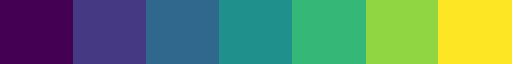

In [ ]:
import matplotlib as mpl
colors = mpl.pyplot.get_cmap(name='viridis', lut=7)
colors

In [ ]:
colors_dict = {'Red':'#f44336', 'Pink':'#e81e63', 'Purple':'#9c27b0',
               'Deep Purple':'#673ab7', 'Indigo':'#3f51b5', 'Blue':'#2196f3',
               'Light Blue':'#03a9f4', 'Cyan':'#00bcd4', 'Teal':'#009688',
               'Green':'#4caf50', 'Light Green':'#8bc34a', 'Lime':'#cddc39',
               'Yellow':'#ffeb3b', 'Amber':'#ffc107', 'Orange':'#ff9800',
               'Deep Orange':'#ff5722', 'Brown':'#795548',
               'Gray':'#9e9e9e', 'Blue Gray':'#607d8b'}

colors = list(colors_dict.values())

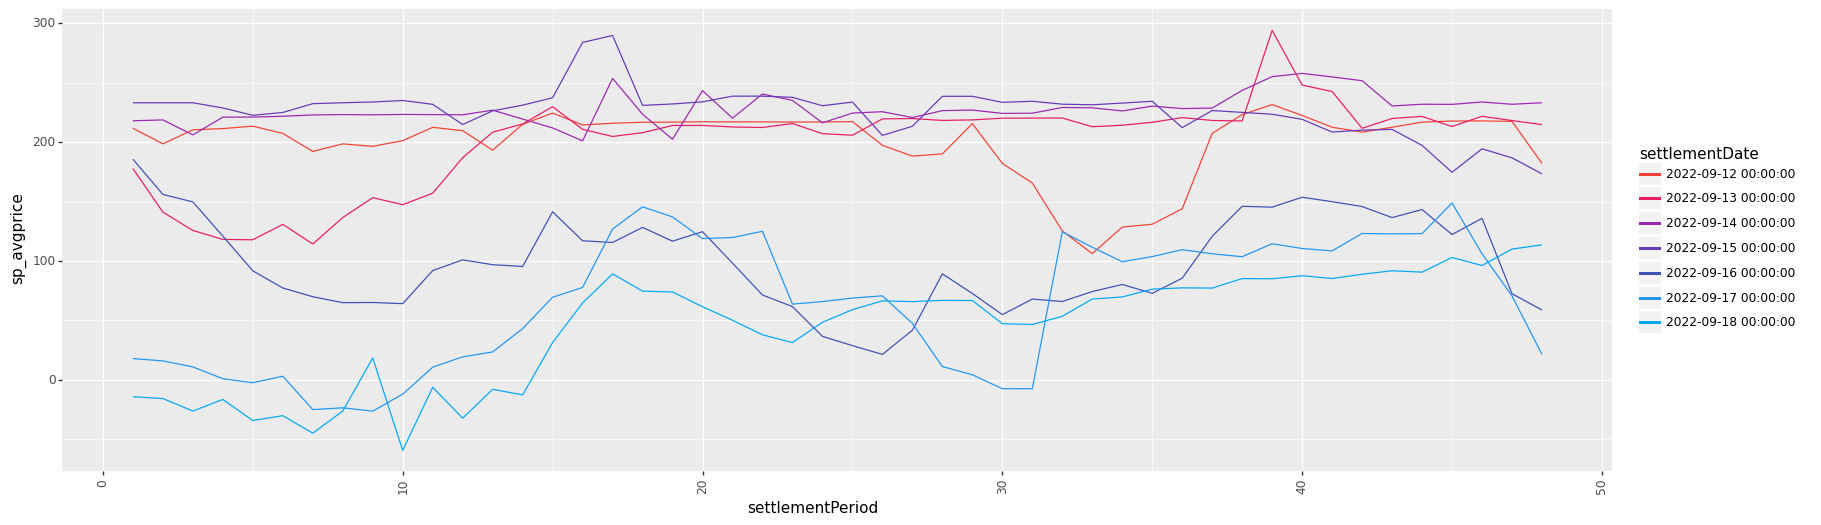

<ggplot: (8760475612136)>

In [ ]:
(ggplot(df_bid_240)
+ aes(x='settlementPeriod', y='sp_avgprice', group='settlementDate', color='settlementDate')
+ geom_line()
+ theme(axis_text_x=element_text(rotation=90),figure_size=(20, 6))
+ scale_color_manual(values=colors)
#+ theme_bw()
#+ scale_color_discrete(l=.4, palette="blues")
)

###- Creating lag variables (per sp)

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data PREV. SP LAG (Price & Volume).csv'

In [ ]:
df_out = pd.read_csv(file_path)
df_out

In [ ]:
# "DATE" COLUMN
df_out['settlementDate'] = pd.to_datetime(df_out['settlementDate'])

In [ ]:
data_df = pd.pivot_table(df_out, index=['recordtype','settlementDate','settlementPeriod'],
                         aggfunc={'sp_pavgprice':np.mean,'sp_meanvolume':np.mean,'sp_totalvolume':np.mean}).reset_index()

data_df.insert(loc=3, column='sp_pavgprice', value=data_df.pop('sp_pavgprice'))

In [ ]:
data_df

In [ ]:
data_df2 = data_df.copy()

for x in range(3,61):

  var1_x = 'sp' + str(x) + '_pavgprice'
  var2_x = 'sp' + str(x) + '_meanvolume'
  var3_x = 'sp' + str(x) + '_totalvolume'

  data_df2[var1_x] = data_df['sp_pavgprice'].shift(periods=x)
  data_df2[var2_x] = data_df['sp_meanvolume'].shift(periods=x)
  data_df2[var3_x] = data_df['sp_totalvolume'].shift(periods=x)



In [ ]:
# "DATE" COLUMN
data_df2['settlementDate'] = pd.to_datetime(data_df2['settlementDate'])

In [ ]:
data_df2.head(15)

###- Creating lag variables (per sp & GSP)

##### SP & GSP data (price and volume)

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG (Price & Volume).csv'

In [ ]:
df_outGSP = pd.read_csv(file_path)
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206997      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48  South Eastern England   
1206999      OFFER     2023-06-30                48         Southern Wales   
1207000      OFFER     2023-06-30                48         Southern Wales   
1207001      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600    -57.486447     -31.571222   
1               -17.13          -3.000    -57.486447     -31.571222   
2               -67.13          -7.500    -57.486447     -31.571222   
3               -71.42         -53.500    -57.486447     -31.571222   
4               -70.00         -34.500    -57.486447     -31.571222   
...                ...             ...           ...            ...   
1206997         131.00         110.000    123.457143     175.000000   
1206998         120.00         240.000    123.457143     175.000000   
1206999         165.00         109.500    162.500000     109.500000   
1207000         160.00         109.500    162.500000     109.500000   
1207001         125.00         150.167    125.000000     150.167000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1206997         350.000  
1206998         350.000  
1206999         219.000  
1207000         219.000  
1207001         150.167  

[1207002 rows x 9 columns]

In [ ]:
# "DATE" COLUMN
df_outGSP['settlementDate'] = pd.to_datetime(df_outGSP['settlementDate'])

In [ ]:
data_df = pd.pivot_table(df_outGSP, index=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'],
                         aggfunc={'sp_pavgprice':np.mean,'sp_meanvolume':np.mean,'sp_totalvolume':np.mean}).reset_index()

data_df.insert(loc=4, column='sp_pavgprice', value=data_df.pop('sp_pavgprice'))

In [ ]:
# "DATE" COLUMN
data_df['settlementDate'] = pd.to_datetime(data_df['settlementDate'])

In [ ]:
data_df

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Southern Scotland   
2             BID     2020-12-20                 1              Yorkshire   
3             BID     2020-12-20                 2      Northern Scotland   
4             BID     2020-12-20                 2      Southern Scotland   
...           ...            ...               ...                    ...   
477916      OFFER     2023-06-30                48                 London   
477917      OFFER     2023-06-30                48  North Western England   
477918      OFFER     2023-06-30                48  South Eastern England   
477919      OFFER     2023-06-30                48         Southern Wales   
477920      OFFER     2023-06-30                48              Yorkshire   

        sp_pavgprice  sp_meanvolume  sp_totalvolume  
0         -57.486447     -31.571222        -568.282  
1         -67.311191     -53.308333        -159.925  
2         -50.842071     -56.544000        -113.088  
3         -58.781264     -32.938158        -625.825  
4         -67.285684     -47.761000        -143.283  
...              ...            ...             ...  
477916    114.000000     120.000000         120.000  
477917    138.400000      88.000000          88.000  
477918    123.457143     175.000000         350.000  
477919    162.500000     109.500000         219.000  
477920    125.000000     150.167000         150.167  

[477921 rows x 7 columns]

In [ ]:
data_df['BMU GSP Group Name'].value_counts()

Yorkshire                        66374
Merseyside and Northern Wales    51381
East Midlands                    51062
South Eastern England            51003
Southern England                 43055
Northern Scotland                42103
South Western England            36859
North Western England            34579
Southern Wales                   30016
Eastern England                  29114
Southern Scotland                14526
London                           12848
West Midlands                    10446
North Eastern England             4555
Name: BMU GSP Group Name, dtype: int64

In [ ]:
data_df[(data_df['settlementDate']=='2021-10-20')&(data_df['BMU GSP Group Name']=='Yorkshire')].head(39)

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
76721         BID     2021-10-20                 2          Yorkshire   
76723         BID     2021-10-20                 3          Yorkshire   
76725         BID     2021-10-20                 4          Yorkshire   
76728         BID     2021-10-20                 5          Yorkshire   
76750         BID     2021-10-20                14          Yorkshire   
76758         BID     2021-10-20                15          Yorkshire   
76765         BID     2021-10-20                16          Yorkshire   
76767         BID     2021-10-20                17          Yorkshire   
76780         BID     2021-10-20                21          Yorkshire   
76790         BID     2021-10-20                22          Yorkshire   
76800         BID     2021-10-20                23          Yorkshire   
76810         BID     2021-10-20                24          Yorkshire   
76816         BID     2021-10-20                25          Yorkshire   
76823         BID     2021-10-20                26          Yorkshire   
76828         BID     2021-10-20                27          Yorkshire   
76841         BID     2021-10-20                30          Yorkshire   
76846         BID     2021-10-20                31          Yorkshire   
76853         BID     2021-10-20                32          Yorkshire   
76856         BID     2021-10-20                33          Yorkshire   
76917         BID     2021-10-20                44          Yorkshire   
76926         BID     2021-10-20                45          Yorkshire   
76935         BID     2021-10-20                46          Yorkshire   
76945         BID     2021-10-20                47          Yorkshire   
76955         BID     2021-10-20                48          Yorkshire   
331826      OFFER     2021-10-20                 1          Yorkshire   
331833      OFFER     2021-10-20                 2          Yorkshire   
331840      OFFER     2021-10-20                 3          Yorkshire   
331847      OFFER     2021-10-20                 4          Yorkshire   
331854      OFFER     2021-10-20                 5          Yorkshire   
331861      OFFER     2021-10-20                 6          Yorkshire   
331869      OFFER     2021-10-20                 7          Yorkshire   
331877      OFFER     2021-10-20                 8          Yorkshire   
331885      OFFER     2021-10-20                 9          Yorkshire   
331892      OFFER     2021-10-20                10          Yorkshire   
331900      OFFER     2021-10-20                11          Yorkshire   
331910      OFFER     2021-10-20                12          Yorkshire   
331920      OFFER     2021-10-20                13          Yorkshire   
331930      OFFER     2021-10-20                14          Yorkshire   
331989      OFFER     2021-10-20                27          Yorkshire   

        sp_pavgprice  sp_meanvolume  sp_totalvolume  
76721     -55.565468     -27.677333         -83.032  
76723     -60.000000      -2.718000          -2.718  
76725      44.000000       0.000000           0.000  
76728      44.000000      -0.001000          -0.001  
76750      75.496296      -0.810000          -1.620  
76758      71.665006     -64.469000        -128.938  
76765     105.200000     -59.674000         -59.674  
76767     105.200000      -0.258000          -0.258  
76780     113.064188      -3.904000         -15.616  
76790     111.000887     -16.780000         -67.120  
76800     110.557395     -39.003200        -195.016  
76810     110.947901     -51.063250        -204.253  
76816     111.000000     -76.554000        -153.108  
76823     108.544127     -46.647200        -233.236  
76828      81.000000      -8.468000         -25.404  
76841      81.000000      -8.046000          -8.046  
76846      81.000000     -58.300000         -58.300  
76853      84.378097     -56.354000        -225.416  
76856      81.000000     -30.670667         -92.012  
76917 

In [ ]:
data_df[(data_df['settlementDate']=='2021-10-20	')&(data_df['settlementPeriod']==40)].head(39)

recordtype settlementDate  settlementPeriod  \
76891         BID     2021-10-20                40   
76892         BID     2021-10-20                40   
76893         BID     2021-10-20                40   
76894         BID     2021-10-20                40   
76895         BID     2021-10-20                40   
76896         BID     2021-10-20                40   
332092      OFFER     2021-10-20                40   
332093      OFFER     2021-10-20                40   
332094      OFFER     2021-10-20                40   
332095      OFFER     2021-10-20                40   
332096      OFFER     2021-10-20                40   
332097      OFFER     2021-10-20                40   
332098      OFFER     2021-10-20                40   
332099      OFFER     2021-10-20                40   
332100      OFFER     2021-10-20                40   
332101      OFFER     2021-10-20                40   
332102      OFFER     2021-10-20                40   
332103      OFFER     2021-10-20                40   

                   BMU GSP Group Name  sp_pavgprice  sp_meanvolume  \
76891                   East Midlands    285.000000      -0.304000   
76892                 Eastern England     90.000000      -0.003000   
76893               Northern Scotland    -28.889573     -51.201733   
76894           South Eastern England    112.050000     -51.334000   
76895           South Western England    111.500000    -113.000000   
76896                   West Midlands    265.000000      -0.472000   
332092                  East Midlands    320.000000      13.768000   
332093                Eastern England    270.291208     209.712667   
332094  Merseyside and Northern Wales    284.725788     107.125000   
332095          North Western England    309.236266      17.214286   
332096              Northern Scotland    276.696985      60.733600   
332097          South Eastern England    313.950000       7.000000   
332098          South Western England    271.464448     123.200000   
332099               Southern England    315.000000      13.500000   
332100              Southern Scotland    287.000000      11.434000   
332101                 Southern Wales    290.783099      17.750000   
332102                  West Midlands    304.652875      25.736000   
332103                      Yorkshire    403.664882     106.688667   

        sp_totalvolume  
76891           -0.304  
76892           -0.003  
76893        -1536.052  
76894         -102.668  
76895         -113.000  
76896           -0.472  
332092          41.304  
332093         629.138  
332094         428.500  
332095         120.500  
332096         303.668  
332097          14.000  
332098         616.000  
332099          27.000  
332100          11.434  
332101          71.000  
332102          51.472  
332103         320.066

##### SP & GSP data (price and volume) -> All SP in all GSP

In [ ]:
start_date = dt.date(2020, 12, 20)
end_date = dt.date(2023, 6, 30)   # perhaps date.now()

delta = end_date - start_date   # returns timedelta

In [ ]:
sdates_list = [start_date + dt.timedelta(days=x) for x in range(delta.days + 1)]
print(sdates_list[0])
print(sdates_list[-1])

2020-12-20
2023-06-30


In [ ]:

df_structEXT = pd.DataFrame()
i = 0

for x in sdates_list:
  for y in range(1,49):

    df_structEXT.loc[i,'settlementDate'] = x
    df_structEXT.loc[i,'settlementPeriod'] = y

    i += 1

df_structEXT['settlementDate'] = pd.to_datetime(df_structEXT['settlementDate'])

In [ ]:
gsp_list = ['Yorkshire', 'Merseyside and Northern Wales', 'East Midlands', 'South Eastern England',
            'Southern England', 'Northern Scotland', 'South Western England', 'North Western England',
            'Southern Wales', 'Eastern England', 'Southern Scotland', 'London', 'West Midlands', 'North Eastern England']

In [ ]:
df_structRG = pd.DataFrame()
df_dict = {}

for x in ['BID','OFFER']:

  df_structR = df_structEXT.copy()
  df_structR['recordtype'] = x
  df_structR.insert(loc=0, column='recordtype', value=df_structR.pop('recordtype'))

  for y in gsp_list:

    df = df_structR.copy()
    df['BMU GSP Group Name'] = y

    df = pd.merge(df, data_df, how='left',
                  on=['recordtype','settlementDate','settlementPeriod', 'BMU GSP Group Name'], suffixes=('', ''))

    df['sp_meanvolume'] = df['sp_meanvolume'].fillna(0)
    df['sp_totalvolume'] = df['sp_totalvolume'].fillna(0)

    dict_name = x + '_' + y
    df_dict[dict_name] = df.copy()

In [ ]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name]

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0            BID     2020-12-20               1.0          Yorkshire   
1            BID     2020-12-20               2.0          Yorkshire   
2            BID     2020-12-20               3.0          Yorkshire   
3            BID     2020-12-20               4.0          Yorkshire   
4            BID     2020-12-20               5.0          Yorkshire   
...          ...            ...               ...                ...   
44299        BID     2023-06-30              44.0          Yorkshire   
44300        BID     2023-06-30              45.0          Yorkshire   
44301        BID     2023-06-30              46.0          Yorkshire   
44302        BID     2023-06-30              47.0          Yorkshire   
44303        BID     2023-06-30              48.0          Yorkshire   

       sp_pavgprice  sp_meanvolume  sp_totalvolume  
0        -50.842071      -56.54400        -113.088  
1        -38.043485       -3.10800          -6.216  
2          0.000000        0.00000           0.000  
3               NaN        0.00000           0.000  
4               NaN        0.00000           0.000  
...             ...            ...             ...  
44299     62.010000     -210.78100        -210.781  
44300     61.992682      -72.73950        -145.479  
44301      4.103535      -46.05840        -230.292  
44302     -3.207901      -58.98800        -353.928  
44303    -47.158350      -53.48125        -213.925  

[44304 rows x 7 columns]

##### SP & GSP data (price and volume) -> Correlation between GSP

In [ ]:
dfcorr_dict = {}

for x in ['BID','OFFER']:

  df = pd.DataFrame()

  for y in gsp_list:

    dict_name = x + '_' + y
    df[y] = df_dict[dict_name]['sp_pavgprice'].copy()

  r = df.corr()
  dfcorr_dict[x] = r.copy()


In [ ]:
x = 'BID'
dfcorr_dict[x]

Yorkshire  Merseyside and Northern Wales  \
Yorkshire                       1.000000                       0.773696   
Merseyside and Northern Wales   0.773696                       1.000000   
East Midlands                   0.868060                       0.746518   
South Eastern England           0.891310                       0.792274   
Southern England                0.735245                       0.746259   
Northern Scotland               0.577419                       0.637922   
South Western England           0.799429                       0.672837   
North Western England           0.777010                       0.765862   
Southern Wales                  0.815747                       0.758055   
Eastern England                 0.489210                       0.225185   
Southern Scotland               0.287669                       0.311328   
London                          0.922099                       0.809317   
West Midlands                   0.754064                       0.809377   
North Eastern England           0.926901                       0.889445   

                               East Midlands  South Eastern England  \
Yorkshire                           0.868060               0.891310   
Merseyside and Northern Wales       0.746518               0.792274   
East Midlands                       1.000000               0.927349   
South Eastern England               0.927349               1.000000   
Southern England                    0.861113               0.791801   
Northern Scotland                   0.531661               0.523794   
South Western England               0.765150               0.942817   
North Western England               0.794206               0.814186   
Southern Wales                      0.878637               0.881244   
Eastern England                     0.278221               0.228110   
Southern Scotland                   0.201650               0.624016   
London                              0.941121               0.965546   
West Midlands                       0.817075               0.846269   
North Eastern England               0.927359               0.921704   

                               Southern England  Northern Scotland  \
Yorkshire                              0.735245           0.577419   
Merseyside and Northern Wales          0.746259           0.637922   
East Midlands                          0.861113           0.531661   
South Eastern England                  0.791801           0.523794   
Southern England                       1.000000           0.570310   
Northern Scotland                      0.570310           1.000000   
South Western England                  0.762530           0.623152   
North Western England                  0.679263           0.593121   
Southern Wales                         0.839574           0.598478   
Eastern England                        0.156707           0.213602   
Southern Scotland                      0.216316           0.834695   
London                                 0.910453           0.606126   
West Midlands                          0.838396           0.673372   
North Eastern England                  0.886446           0.820083   

                               South Western England  North Western England  \
Yorkshire                                   0.799429               0.777010   
Merseyside and Northern Wales               0.672837               0.765862   
East Midlands                               0.765150               0.794206   
South Eastern England                       0.942817               0.814186   
Southern England                            0.762530               0.679263   
Northern Scotland                           0.623152               0.593121   
South Western England                       1.000000               0.682290   
North Western England                       0.682290               1.000000   
Southern Wales                              0.660405               0.799209  

In [ ]:
gspcorr_dict = {}

for x in ['BID','OFFER']:
  for y in gsp_list:

    df = dfcorr_dict[x][[y]].copy()
    df = df.sort_values(by=y, ascending=False)
    #df = df[df[y]>=0.7]

    dict_name = x + '_' + y
    gspcorr_dict[dict_name] = list(df.index.values)


In [ ]:
dict_name = 'BID_Yorkshire'
gspcorr_dict[dict_name]

['Yorkshire',
 'North Eastern England',
 'London',
 'South Eastern England',
 'East Midlands',
 'Southern Wales',
 'South Western England',
 'North Western England',
 'Merseyside and Northern Wales',
 'West Midlands',
 'Southern England',
 'Northern Scotland',
 'Eastern England',
 'Southern Scotland']

In [ ]:
dict_name = 'BID_Northern Scotland'
gspcorr_dict[dict_name]

['Northern Scotland',
 'Southern Scotland',
 'North Eastern England',
 'West Midlands',
 'Merseyside and Northern Wales',
 'South Western England',
 'London',
 'Southern Wales',
 'North Western England',
 'Yorkshire',
 'Southern England',
 'East Midlands',
 'South Eastern England',
 'Eastern England']

In [ ]:
dict_name = 'BID_Eastern England'
gspcorr_dict[dict_name]

['Eastern England',
 'North Eastern England',
 'London',
 'Yorkshire',
 'East Midlands',
 'North Western England',
 'South Eastern England',
 'Merseyside and Northern Wales',
 'Southern Wales',
 'Northern Scotland',
 'Southern Scotland',
 'West Midlands',
 'Southern England',
 'South Western England']

<Axes: >

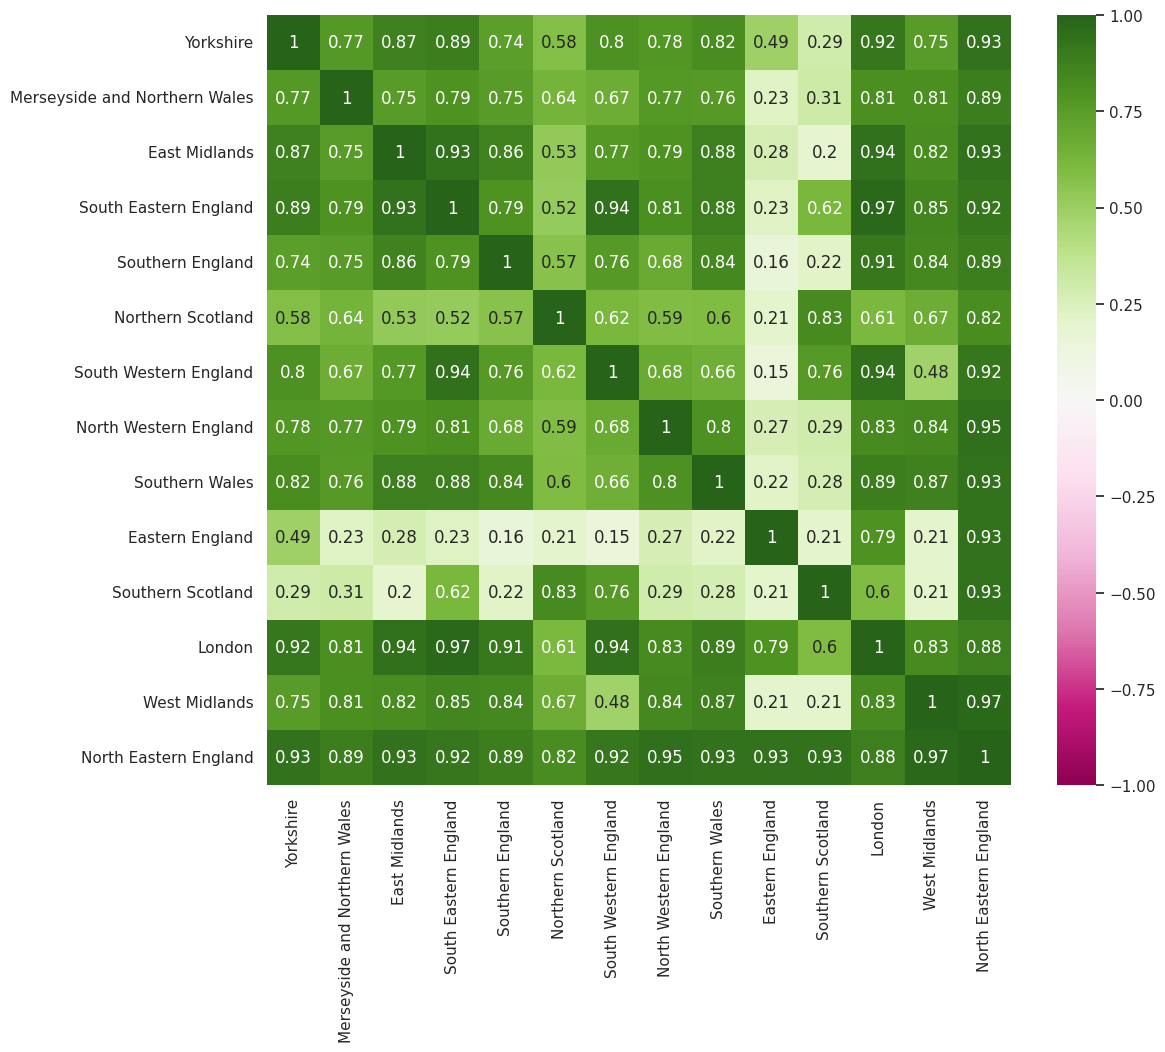

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = dfcorr_dict['BID']
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

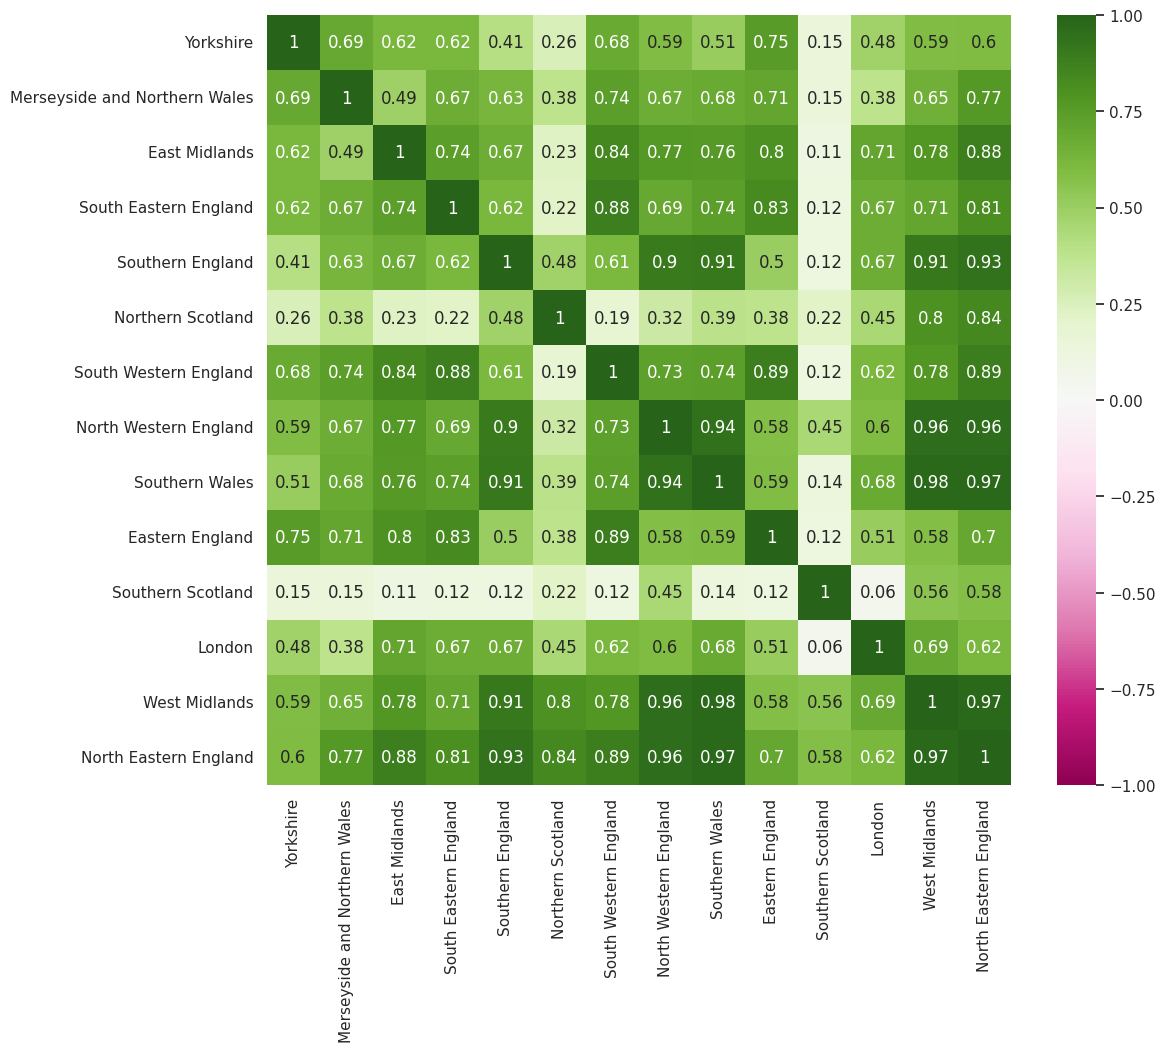

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = dfcorr_dict['OFFER']
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

##### SP & GSP data (price and volume) -> Fill NaNs with best GSP data

In [ ]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name].head()

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0        BID     2020-12-20               1.0          Yorkshire   
1        BID     2020-12-20               2.0          Yorkshire   
2        BID     2020-12-20               3.0          Yorkshire   
3        BID     2020-12-20               4.0          Yorkshire   
4        BID     2020-12-20               5.0          Yorkshire   

   sp_pavgprice  sp_meanvolume  sp_totalvolume  
0    -50.842071        -56.544        -113.088  
1    -38.043485         -3.108          -6.216  
2      0.000000          0.000           0.000  
3           NaN          0.000           0.000  
4           NaN          0.000           0.000

In [ ]:
dict_name = 'BID_Northern Scotland'
gspcorr_dict[dict_name]

['Northern Scotland',
 'Southern Scotland',
 'North Eastern England',
 'West Midlands',
 'Merseyside and Northern Wales',
 'South Western England',
 'London',
 'Southern Wales',
 'North Western England',
 'Yorkshire',
 'Southern England',
 'East Midlands',
 'South Eastern England',
 'Eastern England']

In [ ]:
for x in ['BID','OFFER']:
  for y in gsp_list:

    dict_name = x + '_' + y
    df = df_dict[dict_name].copy()
    fill_gsp = gspcorr_dict[dict_name]

    for z in fill_gsp:

      dict_fillname = x + '_' + z
      df_fill = df_dict[dict_fillname].copy()

      df['sp_pavgprice'] = df['sp_pavgprice'].fillna(df_fill['sp_pavgprice'])

    nr_nans = df[df['sp_pavgprice'].isnull()].shape[0]
    print(f'"{dict_name}" - Pending NaNs: {nr_nans}')
    df_dict[dict_name] = df

"BID_Yorkshire" - Pending NaNs: 605
"BID_Merseyside and Northern Wales" - Pending NaNs: 605
"BID_East Midlands" - Pending NaNs: 605
"BID_South Eastern England" - Pending NaNs: 605
"BID_Southern England" - Pending NaNs: 605
"BID_Northern Scotland" - Pending NaNs: 605
"BID_South Western England" - Pending NaNs: 605
"BID_North Western England" - Pending NaNs: 605
"BID_Southern Wales" - Pending NaNs: 605
"BID_Eastern England" - Pending NaNs: 605
"BID_Southern Scotland" - Pending NaNs: 605
"BID_London" - Pending NaNs: 605
"BID_West Midlands" - Pending NaNs: 605
"BID_North Eastern England" - Pending NaNs: 605
"OFFER_Yorkshire" - Pending NaNs: 1285
"OFFER_Merseyside and Northern Wales" - Pending NaNs: 1285
"OFFER_East Midlands" - Pending NaNs: 1285
"OFFER_South Eastern England" - Pending NaNs: 1285
"OFFER_Southern England" - Pending NaNs: 1285
"OFFER_Northern Scotland" - Pending NaNs: 1285
"OFFER_South Western England" - Pending NaNs: 1285
"OFFER_North Western England" - Pending NaNs: 1285
"O

In [ ]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name].head(40)

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0         BID     2020-12-20               1.0          Yorkshire   
1         BID     2020-12-20               2.0          Yorkshire   
2         BID     2020-12-20               3.0          Yorkshire   
3         BID     2020-12-20               4.0          Yorkshire   
4         BID     2020-12-20               5.0          Yorkshire   
5         BID     2020-12-20               6.0          Yorkshire   
6         BID     2020-12-20               7.0          Yorkshire   
7         BID     2020-12-20               8.0          Yorkshire   
8         BID     2020-12-20               9.0          Yorkshire   
9         BID     2020-12-20              10.0          Yorkshire   
10        BID     2020-12-20              11.0          Yorkshire   
11        BID     2020-12-20              12.0          Yorkshire   
12        BID     2020-12-20              13.0          Yorkshire   
13        BID     2020-12-20              14.0          Yorkshire   
14        BID     2020-12-20              15.0          Yorkshire   
15        BID     2020-12-20              16.0          Yorkshire   
16        BID     2020-12-20              17.0          Yorkshire   
17        BID     2020-12-20              18.0          Yorkshire   
18        BID     2020-12-20              19.0          Yorkshire   
19        BID     2020-12-20              20.0          Yorkshire   
20        BID     2020-12-20              21.0          Yorkshire   
21        BID     2020-12-20              22.0          Yorkshire   
22        BID     2020-12-20              23.0          Yorkshire   
23        BID     2020-12-20              24.0          Yorkshire   
24        BID     2020-12-20              25.0          Yorkshire   
25        BID     2020-12-20              26.0          Yorkshire   
26        BID     2020-12-20              27.0          Yorkshire   
27        BID     2020-12-20              28.0          Yorkshire   
28        BID     2020-12-20              29.0          Yorkshire   
29        BID     2020-12-20              30.0          Yorkshire   
30        BID     2020-12-20              31.0          Yorkshire   
31        BID     2020-12-20              32.0          Yorkshire   
32        BID     2020-12-20              33.0          Yorkshire   
33        BID     2020-12-20              34.0          Yorkshire   
34        BID     2020-12-20              35.0          Yorkshire   
35        BID     2020-12-20              36.0          Yorkshire   
36        BID     2020-12-20              37.0          Yorkshire   
37        BID     2020-12-20              38.0          Yorkshire   
38        BID     2020-12-20              39.0          Yorkshire   
39        BID     2020-12-20              40.0          Yorkshire   

    sp_pavgprice  sp_meanvolume  sp_totalvolume  
0     -50.842071     -56.544000        -113.088  
1     -38.043485      -3.108000          -6.216  
2       0.000000       0.000000           0.000  
3      38.000000       0.000000           0.000  
4     -63.690786       0.000000           0.000  
5       0.000000       0.000000           0.000  
6       0.000000       0.000000           0.000  
7     -64.180162       0.000000           0.000  
8     -64.146844       0.000000           0.000  
9     -63.342310       0.000000           0.000  
10     35.000000       0.000000           0.000  
11    -22.097127      -2.192667          -6.578  
12    -33.782646     -25.768667         -77.306  
13    -61.000000      -1.267000          -1.267  
14      6.120523     -24.891500         -49.783  
15     -4.369315     -59.380250        -237.521  
16     -8.170333     -60.960667        -182.882  
17      7.500000      -9.910000          -9.910  
18      0.500000      -8.708000          -8.708  
19      4.182378      -0.933500          -1.867  
20      5.807664     -12.771500         -51.086  
21     11.279283     -14.399500         -57.598  
22     13.759100     -2

In [ ]:
df_dict[dict_name].isnull().sum()

recordtype              0
settlementDate          0
settlementPeriod        0
BMU GSP Group Name      0
sp_pavgprice          605
sp_meanvolume           0
sp_totalvolume          0
dtype: int64

In [ ]:
for x in ['BID','OFFER']:
  for y in gsp_list:

    dict_name = x + '_' + y
    df = df_dict[dict_name].copy()

    nr_nans = df[df['sp_pavgprice'].isnull()].shape[0]
    print(f'"{dict_name}" - Ffill NaNs: {nr_nans}')
    df['sp_pavgprice'] = df['sp_pavgprice'].fillna(method='ffill', axis=0, limit=None)

    df_dict[dict_name] = df

"BID_Yorkshire" - Ffill NaNs: 605
"BID_Merseyside and Northern Wales" - Ffill NaNs: 605
"BID_East Midlands" - Ffill NaNs: 605
"BID_South Eastern England" - Ffill NaNs: 605
"BID_Southern England" - Ffill NaNs: 605
"BID_Northern Scotland" - Ffill NaNs: 605
"BID_South Western England" - Ffill NaNs: 605
"BID_North Western England" - Ffill NaNs: 605
"BID_Southern Wales" - Ffill NaNs: 605
"BID_Eastern England" - Ffill NaNs: 605
"BID_Southern Scotland" - Ffill NaNs: 605
"BID_London" - Ffill NaNs: 605
"BID_West Midlands" - Ffill NaNs: 605
"BID_North Eastern England" - Ffill NaNs: 605
"OFFER_Yorkshire" - Ffill NaNs: 1285
"OFFER_Merseyside and Northern Wales" - Ffill NaNs: 1285
"OFFER_East Midlands" - Ffill NaNs: 1285
"OFFER_South Eastern England" - Ffill NaNs: 1285
"OFFER_Southern England" - Ffill NaNs: 1285
"OFFER_Northern Scotland" - Ffill NaNs: 1285
"OFFER_South Western England" - Ffill NaNs: 1285
"OFFER_North Western England" - Ffill NaNs: 1285
"OFFER_Southern Wales" - Ffill NaNs: 1285
"OFF

In [ ]:
df_dict[dict_name].isnull().sum()

recordtype            0
settlementDate        0
settlementPeriod      0
BMU GSP Group Name    0
sp_pavgprice          0
sp_meanvolume         0
sp_totalvolume        0
dtype: int64

##### SP & GSP data (price and volume) -> Shift and Concat data

In [ ]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name].head()

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0        BID     2020-12-20               1.0          Yorkshire   
1        BID     2020-12-20               2.0          Yorkshire   
2        BID     2020-12-20               3.0          Yorkshire   
3        BID     2020-12-20               4.0          Yorkshire   
4        BID     2020-12-20               5.0          Yorkshire   

   sp_pavgprice  sp_meanvolume  sp_totalvolume  
0    -50.842071        -56.544        -113.088  
1    -38.043485         -3.108          -6.216  
2      0.000000          0.000           0.000  
3     38.000000          0.000           0.000  
4    -63.690786          0.000           0.000

In [ ]:
data_df2 = pd.DataFrame()

for x in ['BID','OFFER']:
  for y in gsp_list:

    dict_name = x + '_' + y
    df = df_dict[dict_name].copy()

    for z in range(3,49):

      var1_z = 'sp' + str(z) + '_pavgprice'
      var2_z = 'sp' + str(z) + '_meanvolume'
      var3_z = 'sp' + str(z) + '_totalvolume'

      df[var1_z] = df['sp_pavgprice'].shift(periods=z)
      df[var2_z] = df['sp_meanvolume'].shift(periods=z)
      df[var3_z] = df['sp_totalvolume'].shift(periods=z)

    data_df2 = pd.concat([data_df2, df])

data_df2 = data_df2.reset_index(drop=True)


<ipython-input-240-a5a7f58f32de>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-240-a5a7f58f32de>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-240-a5a7f58f32de>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-240-a5a7f58f32de>:16: PerformanceWarning: D

In [ ]:
data_df2

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20               1.0              Yorkshire   
1              BID     2020-12-20               2.0              Yorkshire   
2              BID     2020-12-20               3.0              Yorkshire   
3              BID     2020-12-20               4.0              Yorkshire   
4              BID     2020-12-20               5.0              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30              44.0  North Eastern England   
1240508      OFFER     2023-06-30              45.0  North Eastern England   
1240509      OFFER     2023-06-30              46.0  North Eastern England   
1240510      OFFER     2023-06-30              47.0  North Eastern England   
1240511      OFFER     2023-06-30              48.0  North Eastern England   

         sp_pavgprice  sp_meanvolume  sp_totalvolume  sp3_pavgprice  \
0          -50.842071        -56.544        -113.088            NaN   
1          -38.043485         -3.108          -6.216            NaN   
2            0.000000          0.000           0.000            NaN   
3           38.000000          0.000           0.000     -50.842071   
4          -63.690786          0.000           0.000     -38.043485   
...               ...            ...             ...            ...   
1240507    124.000000          0.000           0.000     118.320000   
1240508    124.000000          0.000           0.000     117.570000   
1240509    114.720000          0.800           0.800     124.000000   
1240510    162.498645          0.000           0.000     124.000000   
1240511    162.500000          0.000           0.000     124.000000   

         sp3_meanvolume  sp3_totalvolume  ...  sp45_totalvolume  \
0                   NaN              NaN  ...               NaN   
1                   NaN              NaN  ...               NaN   
2                   NaN              NaN  ...               NaN   
3               -56.544         -113.088  ...               NaN   
4                -3.108           -6.216  ...               NaN   
...                 ...              ...  ...               ...   
1240507           0.433            0.433  ...               0.0   
1240508           0.100            0.100  ...               0.0   
1240509           0.000            0.000  ...               0.0   
1240510           0.000            0.000  ...               0.0   
1240511           0.000            0.000  ...               0.0   

         sp46_pavgprice  sp46_meanvolume  sp46_totalvolume  sp47_pavgprice  \
0                   NaN              NaN               NaN             NaN   
1                   NaN              NaN               NaN             NaN   
2                   NaN              NaN               NaN             NaN   
3                   NaN              NaN               NaN             NaN   
4                   NaN              NaN               NaN             NaN   
...                 ...              ...               ...             ...   
1240507      135.900000              0.0               0.0      135.900000   
1240508      165.000000              0.0               0.0      135.900000   
1240509      165.000000              0.0               0.0      165.000000   
1240510      161.973687              0.0               0.0      165.000000   
1240511      165.000000              0.0               0.0      161.973687   

         sp47_meanvolume  sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  \
0                    NaN               NaN             NaN              NaN   
1                    NaN               NaN             NaN              NaN   
2                    NaN               NaN             NaN              NaN   
3                    NaN               NaN             NaN              NaN   
4                    NaN               NaN             NaN              NaN   
..

In [ ]:
data_df2[(data_df2['settlementDate']=='2023-06-01')&(data_df2['settlementPeriod']==15)]

recordtype settlementDate  settlementPeriod  \
42878          BID     2023-06-01              15.0   
87182          BID     2023-06-01              15.0   
131486         BID     2023-06-01              15.0   
175790         BID     2023-06-01              15.0   
220094         BID     2023-06-01              15.0   
264398         BID     2023-06-01              15.0   
308702         BID     2023-06-01              15.0   
353006         BID     2023-06-01              15.0   
397310         BID     2023-06-01              15.0   
441614         BID     2023-06-01              15.0   
485918         BID     2023-06-01              15.0   
530222         BID     2023-06-01              15.0   
574526         BID     2023-06-01              15.0   
618830         BID     2023-06-01              15.0   
663134       OFFER     2023-06-01              15.0   
707438       OFFER     2023-06-01              15.0   
751742       OFFER     2023-06-01              15.0   
796046       OFFER     2023-06-01              15.0   
840350       OFFER     2023-06-01              15.0   
884654       OFFER     2023-06-01              15.0   
928958       OFFER     2023-06-01              15.0   
973262       OFFER     2023-06-01              15.0   
1017566      OFFER     2023-06-01              15.0   
1061870      OFFER     2023-06-01              15.0   
1106174      OFFER     2023-06-01              15.0   
1150478      OFFER     2023-06-01              15.0   
1194782      OFFER     2023-06-01              15.0   
1239086      OFFER     2023-06-01              15.0   

                    BMU GSP Group Name  sp_pavgprice  sp_meanvolume  \
42878                        Yorkshire     31.458069     -66.756000   
87182    Merseyside and Northern Wales     32.150000       0.000000   
131486                   East Midlands     29.054426     -62.524333   
175790           South Eastern England     31.990766     -18.925000   
220094                Southern England     20.000000     -48.266000   
264398               Northern Scotland     35.000000      -3.667000   
308702           South Western England     31.600000      -5.383000   
353006           North Western England     32.150000       0.000000   
397310                  Southern Wales     31.969877     -29.051000   
441614                 Eastern England     32.150000       0.000000   
485918               Southern Scotland     35.000000       0.000000   
530222                          London     32.150000     -78.833000   
574526                   West Midlands     31.969877       0.000000   
618830           North Eastern England     31.969877       0.000000   
663134                       Yorkshire     80.230690      14.478333   
707438   Merseyside and Northern Wales    125.856000      23.437500   
751742                   East Midlands     99.000000      11.075000   
796046           South Eastern England    107.000000       0.000000   
840350                Southern England    100.000000      12.111000   
884654               Northern Scotland    149.500000      33.832000   
928958           South Western England    107.000000       0.000000   
973262           North Western England    124.000000      88.000000   
1017566                 Southern Wales    124.000000       0.000000   
1061870                Eastern England    107.000000     145.000000   
1106174              Southern Scotland    124.000000       0.000000   
1150478                         London     99.000000       0.000000   
1194782                  West Midlands    124.000000       0.000000   
1239086          North Eastern England    124.000000       0.000000   

         sp_totalvolume  sp3_pavgprice  sp3_meanvolume  sp3_totalvolume  ...  \
42878          -400.536      31.702555         -33.656         -134.624  ...   
87182             0.000      31.550000           0.000            0.000  ...   
131486         -187.573      31.589639         -26.044          -52.088  ...   
175790          -37.850      31.

In [ ]:
df_aux2 = pd.pivot_table(data_df2.iloc[:,0:7], index=['recordtype','settlementDate','settlementPeriod'], aggfunc={'sp_pavgprice': np.mean, 'sp_meanvolume': np.mean, 'sp_totalvolume': 'sum'})
df_aux2 = df_aux2.sort_values(by=['recordtype', 'settlementDate', 'settlementPeriod'])
df_aux2 = df_aux2.reset_index(drop=False)

In [ ]:
df_aux2[(df_aux2['settlementDate']=='2023-06-01')].head(48)

recordtype settlementDate  settlementPeriod  sp_meanvolume  \
42864        BID     2023-06-01               1.0     -12.780560   
42865        BID     2023-06-01               2.0     -15.707857   
42866        BID     2023-06-01               3.0     -24.634964   
42867        BID     2023-06-01               4.0     -25.407786   
42868        BID     2023-06-01               5.0     -15.512131   
42869        BID     2023-06-01               6.0     -18.599202   
42870        BID     2023-06-01               7.0     -18.190857   
42871        BID     2023-06-01               8.0     -21.235667   
42872        BID     2023-06-01               9.0     -20.230345   
42873        BID     2023-06-01              10.0     -17.154583   
42874        BID     2023-06-01              11.0      -9.325845   
42875        BID     2023-06-01              12.0     -10.476429   
42876        BID     2023-06-01              13.0     -16.953798   
42877        BID     2023-06-01              14.0     -17.195457   
42878        BID     2023-06-01              15.0     -22.386095   
42879        BID     2023-06-01              16.0     -13.581179   
42880        BID     2023-06-01              17.0     -12.564714   
42881        BID     2023-06-01              18.0     -14.850929   
42882        BID     2023-06-01              19.0      -9.801571   
42883        BID     2023-06-01              20.0     -14.798964   
42884        BID     2023-06-01              21.0     -13.424714   
42885        BID     2023-06-01              22.0     -13.585524   
42886        BID     2023-06-01              23.0      -6.663964   
42887        BID     2023-06-01              24.0     -10.195705   
42888        BID     2023-06-01              25.0      -4.461500   
42889        BID     2023-06-01              26.0      -1.981286   
42890        BID     2023-06-01              27.0      -2.092386   
42891        BID     2023-06-01              28.0      -8.573261   
42892        BID     2023-06-01              29.0      -8.748190   
42893        BID     2023-06-01              30.0      -6.190833   
42894        BID     2023-06-01              31.0      -3.937679   
42895        BID     2023-06-01              32.0     -10.630643   
42896        BID     2023-06-01              33.0      -0.830310   
42897        BID     2023-06-01              34.0      -4.171743   
42898        BID     2023-06-01              35.0      -3.283161   
42899        BID     2023-06-01              36.0      -0.977714   
42900        BID     2023-06-01              37.0      -4.025071   
42901        BID     2023-06-01              38.0      -5.170000   
42902        BID     2023-06-01              39.0     -18.116857   
42903        BID     2023-06-01              40.0     -10.698759   
42904        BID     2023-06-01              41.0      -8.121595   
42905        BID     2023-06-01              42.0     -12.991845   
42906        BID     2023-06-01              43.0     -10.893095   
42907        BID     2023-06-01              44.0     -14.321704   
42908        BID     2023-06-01              45.0      -9.260179   
42909        BID     2023-06-01              46.0     -14.670673   
42910        BID     2023-06-01              47.0      -7.086219   
42911        BID     2023-06-01              48.0     -13.931929   

       sp_pavgprice  sp_totalvolume  
42864     28.288078        -277.693  
42865     29.666905        -390.040  
42866     29.558984        -697.278  
42867     29.954706        -718.918  
42868     31.557800        -455.468  
42869     31.584955        -535.081  
42870     31.586229        -568.784  
42871     31.558810        -611.164  
42872     31.535963        -492.946  
42873     32.360800        -454.915  
42874     36.691418        -343.784  
42875     31.559123        -296.702  
42876     31.877402        -637.658  
42877     38.316251        -628.143  
42878     31.329492        -820.210  
42879     31.246012        -262.623  
42880     29.351838        

## ALLBOAS & RESEARCH DATA & PREV. SP DATA (per SP)

### - Preparing dataset

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research).csv'

In [ ]:
df_model = pd.read_csv(file_path)

In [ ]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [ ]:
df_model[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201404 entries, 0 to 1201403
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1201404 non-null  object        
 1   settlementDate    1201404 non-null  datetime64[ns]
 2   settlementPeriod  1201404 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.5+ MB


In [ ]:
data_df2[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240512 entries, 0 to 1240511
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1240512 non-null  object        
 1   settlementDate    1240512 non-null  datetime64[ns]
 2   settlementPeriod  1240512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.4+ MB


In [ ]:
df_model2 = pd.merge(df_model, data_df2.drop(columns=['sp_pavgprice','sp_meanvolume','sp_totalvolume'], axis=1),
                     on=['recordtype','settlementDate','settlementPeriod'], suffixes=('', ''))
df_model2

In [ ]:
df_model2.info()

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 60SP).csv'

In [ ]:
#df_model2.to_csv(file_path, index=False)

In [ ]:
df_model2.corr()

In [ ]:
num_vars = list(df_model2.select_dtypes(include=["number"]).columns)
num_vars.remove('acceptedprice')
len(num_vars)

In [ ]:
list1 = num_vars[0:31]
list1.append('acceptedprice')

list2 = num_vars[31:61]
list2.append('acceptedprice')

list3 = num_vars[61:]
list3.append('acceptedprice')

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list1].corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list2].corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list3].corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)
cat_vars.append('acceptedprice')
cat_vars.extend(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17'])

In [ ]:
import statsmodels.stats.outliers_influence as sso

def vif_analysis(data_df, drop_cols):

    i = 0
    print(f'STEP {i}')

    Z = data_df.drop(drop_cols, axis=1)
    Z['Intercept'] = 1

    vif = pd.DataFrame()
    vif['variables'] = Z.columns
    vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])
    vars_del = []

    print('-'*30)
    print(vif)
    print('\n')


    while len(vif_risk) > 0:

        i += 1
        print(f'STEP {i}')

        vars_del.append(vif_risk[0])
        Z = Z.drop(vif_risk[0], axis=1)

        vif = pd.DataFrame()
        vif['variables'] = Z.columns
        vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
        vif = vif.sort_values(by='VIF', ascending=False)

        vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])

        print('-'*30)
        print(vif)
        print('\n')

    return vif, vars_del

In [ ]:
vif, vars_del = vif_analysis(data_df=df_model2, drop_cols=cat_vars)

STEP 0


KeyboardInterrupt: ignored

### - Identify outliers indexes (data per SP)

In [ ]:
df_out

In [ ]:
df_outliers = df_out.copy()

In [ ]:
df_outliers['diff_price_avgprice'] = abs(df_outliers['acceptedprice'] - df_outliers['sp_pavgprice'])

In [ ]:
df_outliers

recordtype settlementDate  settlementPeriod  acceptedprice  \
0              BID     2020-12-20                 1         -71.36   
1              BID     2020-12-20                 1         -17.13   
2              BID     2020-12-20                 1         -67.13   
3              BID     2020-12-20                 1         -71.42   
4              BID     2020-12-20                 1         -70.00   
...            ...            ...               ...            ...   
1206997      OFFER     2023-06-30                48         140.00   
1206998      OFFER     2023-06-30                48         165.00   
1206999      OFFER     2023-06-30                48         160.00   
1207000      OFFER     2023-06-30                48         175.00   
1207001      OFFER     2023-06-30                48         120.00   

         acceptedvolume  sp_pavgprice  sp_meanvolume  sp_totalvolume  \
0                  -6.6    -58.460924     -36.578043        -841.295   
1                  -3.0    -58.460924     -36.578043        -841.295   
2                  -7.5    -58.460924     -36.578043        -841.295   
3                 -53.5    -58.460924     -36.578043        -841.295   
4                 -34.5    -58.460924     -36.578043        -841.295   
...                 ...           ...            ...             ...   
1206997           187.5    134.457470     136.560636        1502.167   
1206998           109.5    134.457470     136.560636        1502.167   
1206999           109.5    134.457470     136.560636        1502.167   
1207000           115.0    134.457470     136.560636        1502.167   
1207001           167.5    134.457470     136.560636        1502.167   

         diff_price_avgprice  
0                  12.899076  
1                  41.330924  
2                   8.669076  
3                  12.959076  
4                  11.539076  
...                      ...  
1206997             5.542530  
1206998            30.542530  
1206999            25.542530  
1207000            40.542530  
1207001            14.457470  

[1207002 rows x 9 columns]

In [ ]:
df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod  acceptedprice  \
321529         BID     2021-09-10                17   -9999.000000   
370879         BID     2021-10-20                38   -9999.000000   
415151         BID     2021-11-13                35   -9999.000000   
417446         BID     2021-11-15                35    1719.840000   
417491         BID     2021-11-15                36    1719.840000   
454454         BID     2021-12-05                34   -9999.000000   
454464         BID     2021-12-05                34   -9999.000000   
454480         BID     2021-12-05                35   -9999.000000   
454486         BID     2021-12-05                35   -9999.000000   
726937         BID     2022-07-07                38   -9999.000000   
730533         BID     2022-07-10                37   -9999.000000   
730534         BID     2022-07-10                37   -9999.000000   
880903         BID     2022-10-31                 1   -5024.500000   
931183         BID     2022-11-29                26    9999.000000   
931184         BID     2022-11-29                26    9999.000000   
931220         BID     2022-11-29                27    9999.000000   
931223         BID     2022-11-29                27    9999.000000   
931264         BID     2022-11-29                28    9999.000000   
931267         BID     2022-11-29                28    9999.000000   
940322         BID     2022-12-08                20   -3203.253333   
1186373        BID     2023-06-11                44    4521.550000   
1186374        BID     2023-06-11                44      86.720000   
1186375        BID     2023-06-11                44    4446.560000   
1186376        BID     2023-06-11                44    4376.560000   
1186377        BID     2023-06-11                44    4376.560000   
1186378        BID     2023-06-11                44      39.500000   
1186444        BID     2023-06-11                46    4521.550000   

         acceptedvolume  sp_pavgprice  sp_meanvolume  sp_totalvolume  \
321529           -0.002     77.484512     -56.383800        -563.838   
370879           -0.003     -5.442883     -45.844722       -1650.410   
415151           -0.003     62.839615     -60.928556        -548.357   
417446           -2.250     95.070140     -75.075158       -2852.856   
417491          -11.000     93.578880     -70.359317       -2884.732   
454454           -2.800     96.386894     -37.039650        -740.793   
454464           -1.400     96.386894     -37.039650        -740.793   
454480           -4.134     -8.634614     -22.468471        -381.964   
454486           -2.066     -8.634614     -22.468471        -381.964   
726937           -0.003     56.328167     -98.353087       -2262.121   
730533           -0.003    129.021045     -34.169143        -478.368   
730534           -0.003    129.021045     -34.169143        -478.368   
880903           -2.227    -16.461054     -72.329275       -2893.171   
931183           -6.400    387.600379     -19.036680        -475.917   
931184           -4.700    387.600379     -19.036680        -475.917   
931220          -48.000    963.284395     -30.904421       -1174.368   
931223          -47.000    963.284395     -30.904421       -1174.368   
931264          -48.000   1027.180323     -31.123971       -1089.339   
931267          -47.000   1027.180323     -31.123971       -1089.339   
940322           -0.703    157.572912     -90.610909        -996.720   
1186373          -1.258   1737.814208      -2.106833         -12.641   
1186374          -0.425   1737.814208      -2.106833         -12.641   
1186375          -1.258   1737.814208      -2.106833         -12.641   
1186376          -0.900   1737.814208      -2.106833         -12.641   
1186377          -1.467   1737.814208      -2.106833         -12.641   
1186378          -7.333   1737.814208      -2.106833         -12.641   
1186444          -3.334    303.831949      -6.552778         -58.975   

         diff_price_avgprice  

In [ ]:
outBid_indexes = list(df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outBid_indexes[:5]

[321529, 370879, 415151, 417446, 417491]

In [ ]:
df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod  acceptedprice  \
2570         OFFER     2020-12-22                 4        8000.00   
19593        OFFER     2021-01-06                26        3000.00   
19643        OFFER     2021-01-06                27        3000.00   
19682        OFFER     2021-01-06                28        3000.00   
19713        OFFER     2021-01-06                29        3000.00   
...            ...            ...               ...            ...   
1144578      OFFER     2023-05-04                14        9999.00   
1144743      OFFER     2023-05-04                16        9999.00   
1144885      OFFER     2023-05-04                18        9999.00   
1145106      OFFER     2023-05-04                22        9999.00   
1180995      OFFER     2023-06-06                30       -5491.18   

         acceptedvolume  sp_pavgprice  sp_meanvolume  sp_totalvolume  \
2570              0.958     84.859942      50.419286         352.935   
19593             0.003    132.873357      43.488680        1087.217   
19643             6.208    155.754327      45.208684         858.965   
19682            18.208    210.354709      80.450889         724.058   
19713            30.208    433.469810     130.778333         784.670   
...                 ...           ...            ...             ...   
1144578           0.294    137.112647     110.397000        1103.970   
1144743           2.551    150.976052     107.328500        1287.942   
1144885           2.551    146.300298      84.798077        1102.375   
1145106           0.194    127.837051     103.985100        1039.851   
1180995           1.542     14.617669       3.045613          94.414   

         diff_price_avgprice  
2570             7915.140058  
19593            2867.126643  
19643            2844.245673  
19682            2789.645291  
19713            2566.530190  
...                      ...  
1144578          9861.887353  
1144743          9848.023948  
1144885          9852.699702  
1145106          9871.162949  
1180995          5505.797669  

[1510 rows x 9 columns]

In [ ]:
outOff_indexes = list(df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outOff_indexes[:5]

[2570, 19593, 19643, 19682, 19713]

In [ ]:
data={'outBid_indexes':outBid_indexes, 'outOff_indexes':outOff_indexes}

In [ ]:
df_outBid = pd.DataFrame()
df_outBid['outBid_indexes'] = outBid_indexes

df_outOff = pd.DataFrame()
df_outOff['outOff_indexes'] = outOff_indexes

In [ ]:
file_path1 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP (BID).csv'
file_path2 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP (OFFER).csv'

In [ ]:
df_outBid.to_csv(file_path1, index=False)
df_outOff.to_csv(file_path2, index=False)

In [ ]:
df_outliers[(df_outliers['diff_price_avgprice']>999)&(df_outliers['diff_price_avgprice']<1100)]

recordtype settlementDate  settlementPeriod  acceptedprice  \
19870        OFFER     2021-01-06                34     216.666667   
19874        OFFER     2021-01-06                34     170.000000   
19878        OFFER     2021-01-06                34     189.000000   
19879        OFFER     2021-01-06                34     180.000000   
20016        OFFER     2021-01-06                38     145.000000   
...            ...            ...               ...            ...   
1006385      OFFER     2023-01-25                34    1500.000000   
1006626      OFFER     2023-01-25                38    1500.000000   
1006629      OFFER     2023-01-25                38    1500.000000   
1006630      OFFER     2023-01-25                38    1500.000000   
1064762      OFFER     2023-03-07                35    1950.000000   

         acceptedvolume  sp_pavgprice  sp_meanvolume  sp_totalvolume  \
19870            13.832   1251.955538      38.980381         818.588   
19874             5.834   1251.955538      38.980381         818.588   
19878             0.092   1251.955538      38.980381         818.588   
19879             1.500   1251.955538      38.980381         818.588   
20016           152.000   1151.691205      56.169429         393.186   
...                 ...           ...            ...             ...   
1006385           1.250    431.669041      91.757636        3028.002   
1006626           0.584    446.569868      83.991514        3107.686   
1006629           2.084    446.569868      83.991514        3107.686   
1006630           2.084    446.569868      83.991514        3107.686   
1064762         295.000    928.029592     175.883400         879.417   

         diff_price_avgprice  
19870            1035.288872  
19874            1081.955538  
19878            1062.955538  
19879            1071.955538  
20016            1006.691205  
...                      ...  
1006385          1068.330959  
1006626          1053.430132  
1006629          1053.430132  
1006630          1053.430132  
1064762          1021.970408  

[178 rows x 9 columns]

## ALLBOAS & RESEARCH DATA & PREV. SP DATA (per SP & GSP)

### - Preparing dataset

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research).csv'

In [ ]:
df_model = pd.read_csv(file_path)

In [ ]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [ ]:
df_model[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201404 entries, 0 to 1201403
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1201404 non-null  object        
 1   settlementDate    1201404 non-null  datetime64[ns]
 2   settlementPeriod  1201404 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.5+ MB


In [ ]:
data_df2[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240512 entries, 0 to 1240511
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1240512 non-null  object        
 1   settlementDate    1240512 non-null  datetime64[ns]
 2   settlementPeriod  1240512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.4+ MB


In [ ]:
df_model2 = pd.merge(df_model, data_df2.drop(columns=['sp_pavgprice','sp_meanvolume','sp_totalvolume'], axis=1), how='left',
                     on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('', ''))
df_model2

recordtype settlementDate  settlementPeriod       BMU ID  \
0              BID     2020-12-20                 1    E_BRDUW-1   
1              BID     2020-12-20                 1     E_FASN-3   
2              BID     2020-12-20                 1  M_CAS-GAR01   
3              BID     2020-12-20                 1    T_BHLAW-1   
4              BID     2020-12-20                 1    T_CGTHW-1   
...            ...            ...               ...          ...   
1201399      OFFER     2023-06-30                48     T_LBAR-1   
1201400      OFFER     2023-06-30                48    T_PEMB-11   
1201401      OFFER     2023-06-30                48    T_PEMB-41   
1201402      OFFER     2023-06-30                48     T_RATS-3   
1201403      OFFER     2023-06-30                48     T_SPLN-1   

         acceptedprice  acceptedvolume BMU Type BMU Fuel Type  \
0               -71.36            -6.6        E          WIND   
1               -17.13            -3.0        E        NPSHYD   
2               -67.13            -7.5        M        NPSHYD   
3               -71.42           -53.5        T          WIND   
4               -70.00           -34.5        T          WIND   
...                ...             ...      ...           ...   
1201399         140.00           187.5        T          CCGT   
1201400         165.00           109.5        T          CCGT   
1201401         160.00           109.5        T          CCGT   
1201402         175.00           115.0        T          COAL   
1201403         120.00           167.5        T          CCGT   

        BMU GSP Group Name    LOC LAT  ...  sp45_totalvolume  sp46_pavgprice  \
0        Northern Scotland  56.277929  ...               NaN             NaN   
1        Northern Scotland  57.326105  ...               NaN             NaN   
2        Northern Scotland  57.063215  ...               NaN             NaN   
3        Northern Scotland  57.217764  ...               NaN             NaN   
4        Northern Scotland  57.186735  ...               NaN             NaN   
...                    ...        ...  ...               ...             ...   
1201399    Eastern England  52.203604  ...               0.0           160.0   
1201400     Southern Wales  51.683003  ...               0.0           165.0   
1201401     Southern Wales  51.683003  ...               0.0           165.0   
1201402      East Midlands  52.865393  ...             115.0           165.0   
1201403      East Midlands  52.805849  ...             115.0           165.0   

         sp46_meanvolume sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  \
0                    NaN              NaN             NaN              NaN   
1                    NaN              NaN             NaN              NaN   
2                    NaN              NaN             NaN              NaN   
3                    NaN              NaN             NaN              NaN   
4                    NaN              NaN             NaN              NaN   
...                  ...              ...             ...              ...   
1201399              0.0              0.0      160.000000           0.0000   
1201400              0.0              0.0      161.973687           0.0000   
1201401              0.0              0.0      161.973687           0.0000   
1201402            115.0            115.0      161.973687          61.5835   
1201403            115.0            115.0      161.973687          61.5835   

         sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0                     NaN             NaN              NaN               NaN  
1                     NaN             NaN              NaN               NaN  
2                     NaN             NaN              NaN               NaN  
3                     NaN             NaN              NaN               NaN  
4                     NaN             NaN              NaN               NaN  
...                   ...             

In [ ]:
df_model2 = df_model2[df_model2['settlementDate']>='2021-01-01']
df_model2.reset_index(drop=True)
df_model2

recordtype settlementDate  settlementPeriod     BMU ID  acceptedprice  \
14245          BID     2021-01-01                 1   E_GYAR-1           37.0   
14246          BID     2021-01-01                 1   E_SHOS-1           35.0   
14247          BID     2021-01-01                 1   T_CDCL-1           40.0   
14248          BID     2021-01-01                 1   T_MRWD-1           37.1   
14249          BID     2021-01-01                 1  T_PEMB-11           37.0   
...            ...            ...               ...        ...            ...   
1201399      OFFER     2023-06-30                48   T_LBAR-1          140.0   
1201400      OFFER     2023-06-30                48  T_PEMB-11          165.0   
1201401      OFFER     2023-06-30                48  T_PEMB-41          160.0   
1201402      OFFER     2023-06-30                48   T_RATS-3          175.0   
1201403      OFFER     2023-06-30                48   T_SPLN-1          120.0   

         acceptedvolume BMU Type BMU Fuel Type     BMU GSP Group Name  \
14245           -18.366        E          CCGT        Eastern England   
14246            -0.666        E          CCGT  South Eastern England   
14247           -11.084        T          CCGT          East Midlands   
14248          -174.768        T          CCGT       Southern England   
14249           -33.634        T          CCGT         Southern Wales   
...                 ...      ...           ...                    ...   
1201399         187.500        T          CCGT        Eastern England   
1201400         109.500        T          CCGT         Southern Wales   
1201401         109.500        T          CCGT         Southern Wales   
1201402         115.000        T          COAL          East Midlands   
1201403         167.500        T          CCGT          East Midlands   

           LOC LAT  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
14245    52.583834  ...             0.000        7.379666           0.0000   
14246    50.829511  ...          -181.027       35.944820         -16.8968   
14247    53.307421  ...             0.000       20.000000           0.0000   
14248    50.898831  ...           -51.167       38.250000         -83.5000   
14249    51.683003  ...             0.000       35.944820           0.0000   
...            ...  ...               ...             ...              ...   
1201399  52.203604  ...             0.000      160.000000           0.0000   
1201400  51.683003  ...             0.000      165.000000           0.0000   
1201401  51.683003  ...             0.000      165.000000           0.0000   
1201402  52.865393  ...           115.000      165.000000         115.0000   
1201403  52.805849  ...           115.000      165.000000         115.0000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
14245              0.000        8.159455           0.0000             0.000   
14246            -84.484        8.159455           0.0000             0.000   
14247              0.000        8.159455           0.0000             0.000   
14248            -83.500       38.250000          -7.8340            -7.834   
14249              0.000        8.159455           0.0000             0.000   
...                  ...             ...              ...               ...   
1201399            0.000      160.000000           0.0000             0.000   
1201400            0.000      161.973687           0.0000             0.000   
1201401            0.000      161.973687           0.0000             0.000   
1201402          115.000      161.973687          61.5835           123.167   
1201403          115.000      161.973687          61.5835           123.167   

         sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
14245          7.616887            0.000             0.000  
14246         36.221377           -6.563           -26.252  
14247         36.221377            0.000             0.000  
14248         38.210000     

In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 14245 to 1201403
Columns: 211 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(194), int64(3), object(13)
memory usage: 1.9+ GB


In [ ]:
df_model2.iloc[:,50:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 14245 to 1201403
Data columns (total 50 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Month_SIN                      1187159 non-null  float64
 1   Month_COS                      1187159 non-null  float64
 2   Day_SIN                        1187159 non-null  float64
 3   Day_COS                        1187159 non-null  float64
 4   settPeriod_SIN                 1187159 non-null  float64
 5   settPeriod_COS                 1187159 non-null  float64
 6   marketIndexPrice               1187159 non-null  float64
 7   marketIndexVolume              1187159 non-null  float64
 8   activeFlag                     1187159 non-null  float64
 9   DANF_Demand                    1187159 non-null  float64
 10  DAID_spnDemand                 1187159 non-null  float64
 11  DAIG_spnGeneration             1187159 non-null  float64
 12  DATF_Deman

In [ ]:
df_model2.isnull().sum()

recordtype          0
settlementDate      0
settlementPeriod    0
BMU ID              0
acceptedprice       0
                   ..
sp47_meanvolume     0
sp47_totalvolume    0
sp48_pavgprice      0
sp48_meanvolume     0
sp48_totalvolume    0
Length: 211, dtype: int64

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP).csv'

In [ ]:
#df_model2.to_csv(file_path, index=False)

In [ ]:
num_vars = list(df_model2.select_dtypes(include=["number"]).columns)
num_vars.remove('acceptedprice')
len(num_vars)

196

In [ ]:
list1 = num_vars[0:32]
list1.append('acceptedprice')

list2 = num_vars[32:64]
list2.append('acceptedprice')

list3 = num_vars[64:96]
list3.append('acceptedprice')

list4 = num_vars[96:128]
list4.append('acceptedprice')

list5 = num_vars[128:160]
list5.append('acceptedprice')

list6 = num_vars[160:]
list6.append('acceptedprice')

<Axes: >

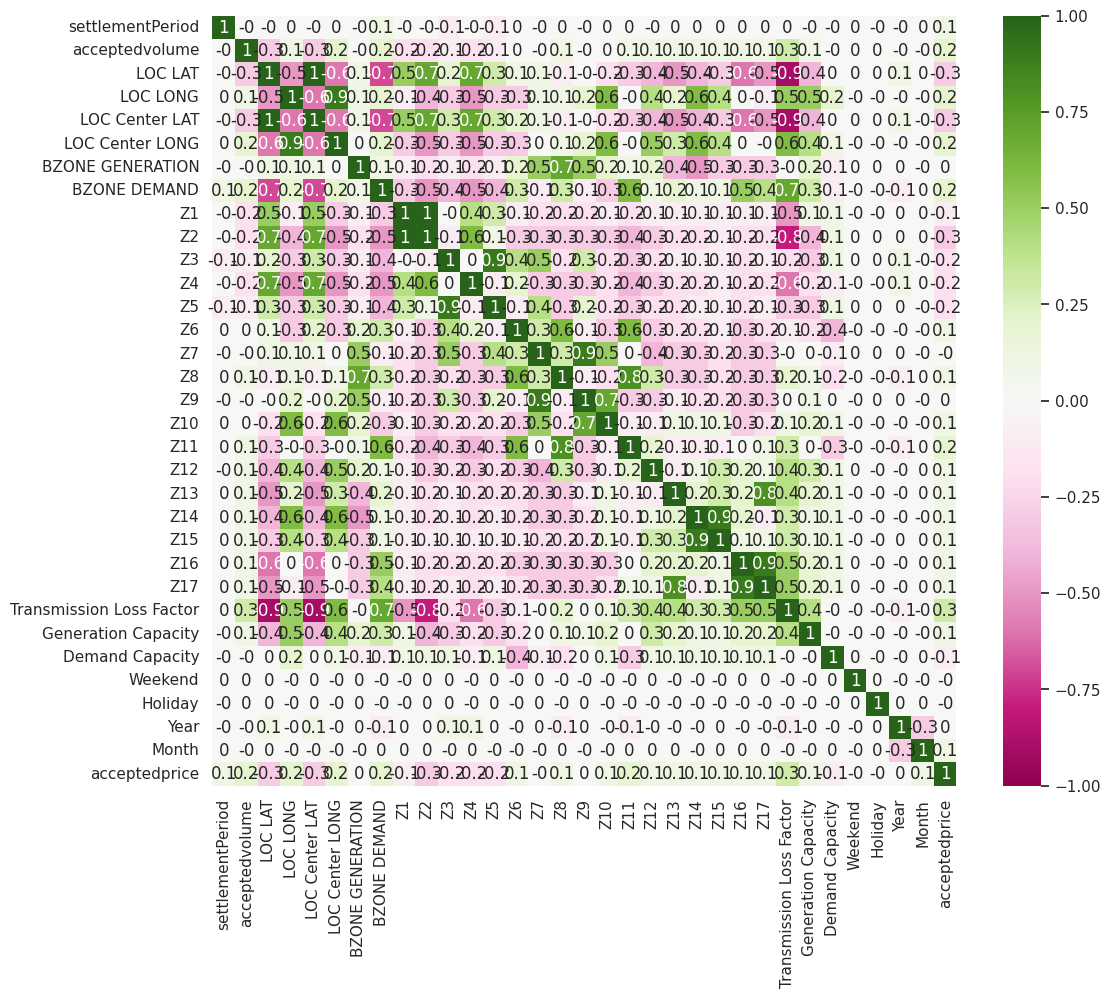

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list1].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

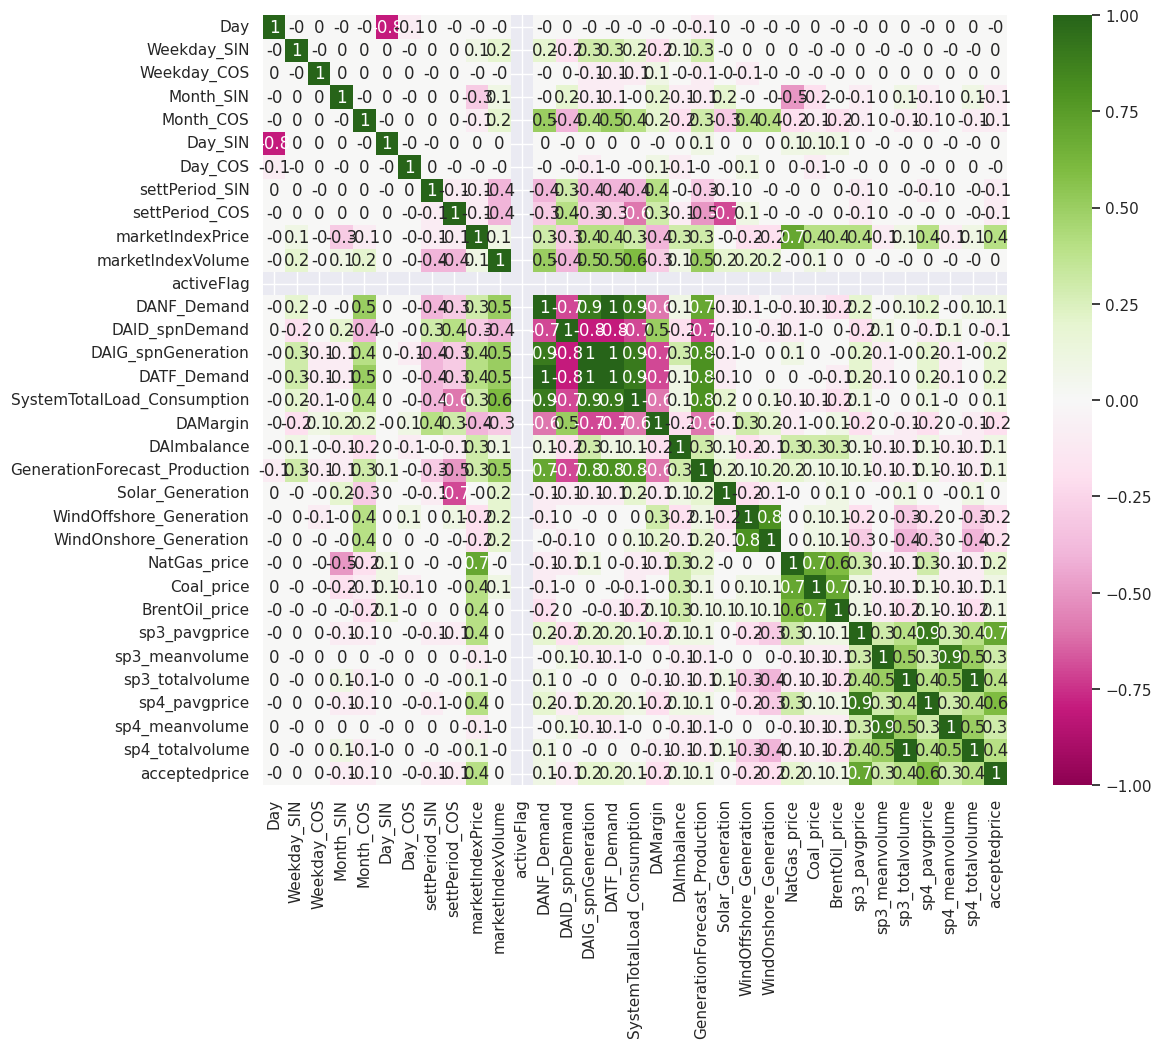

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list2].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

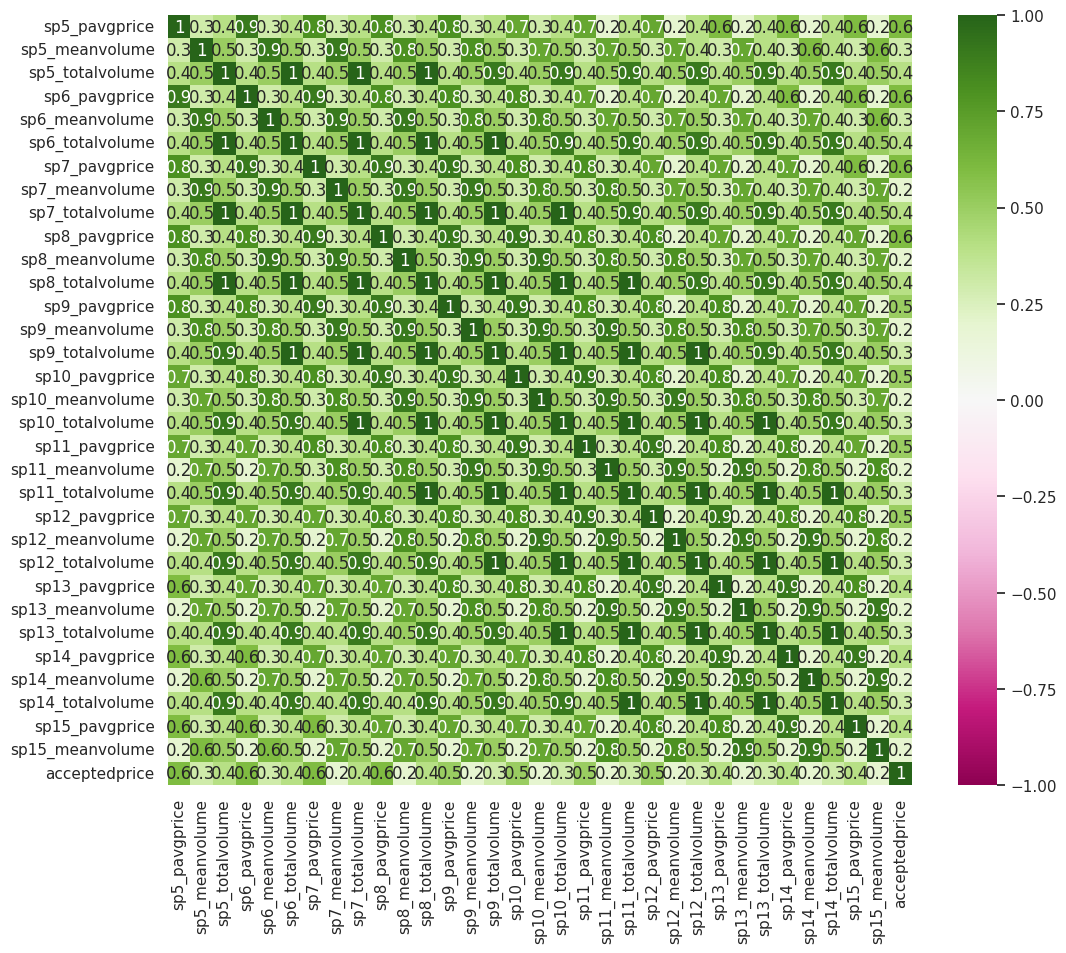

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list3].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

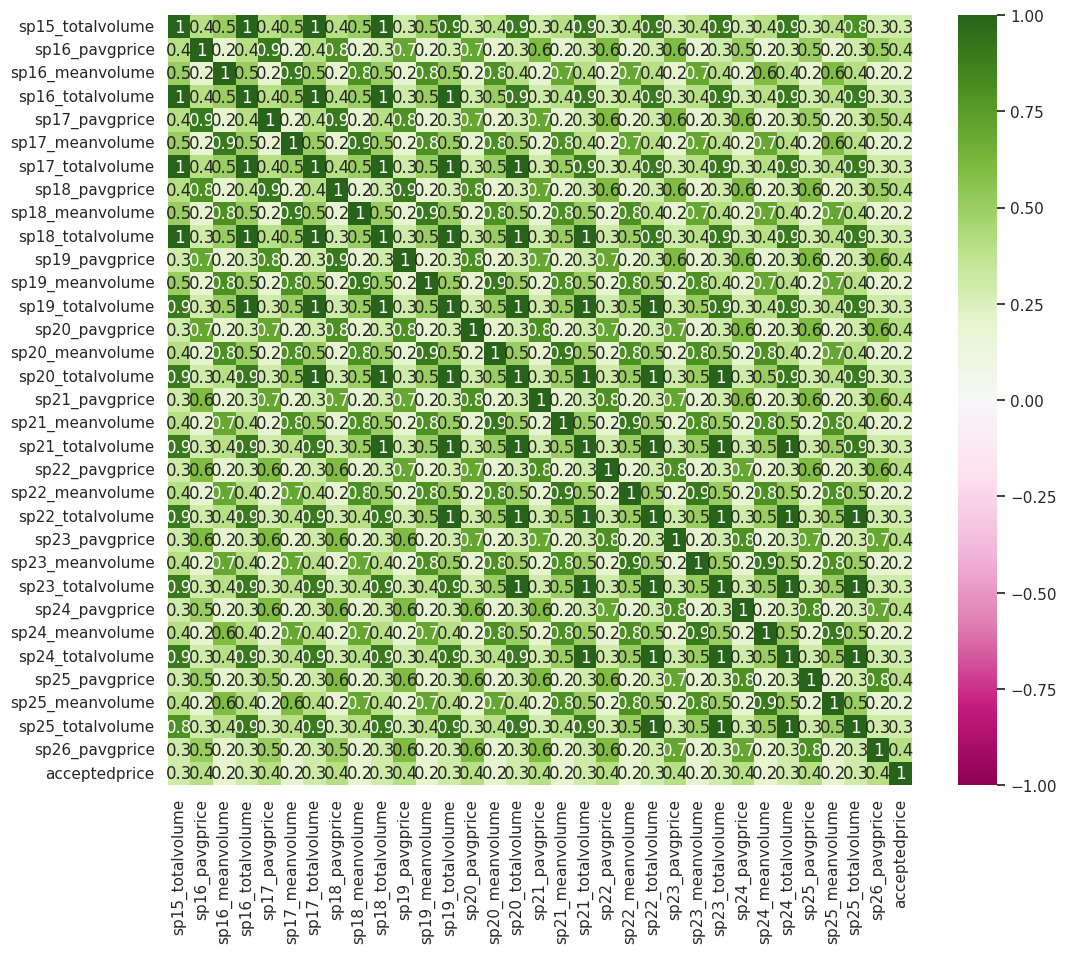

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list4].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

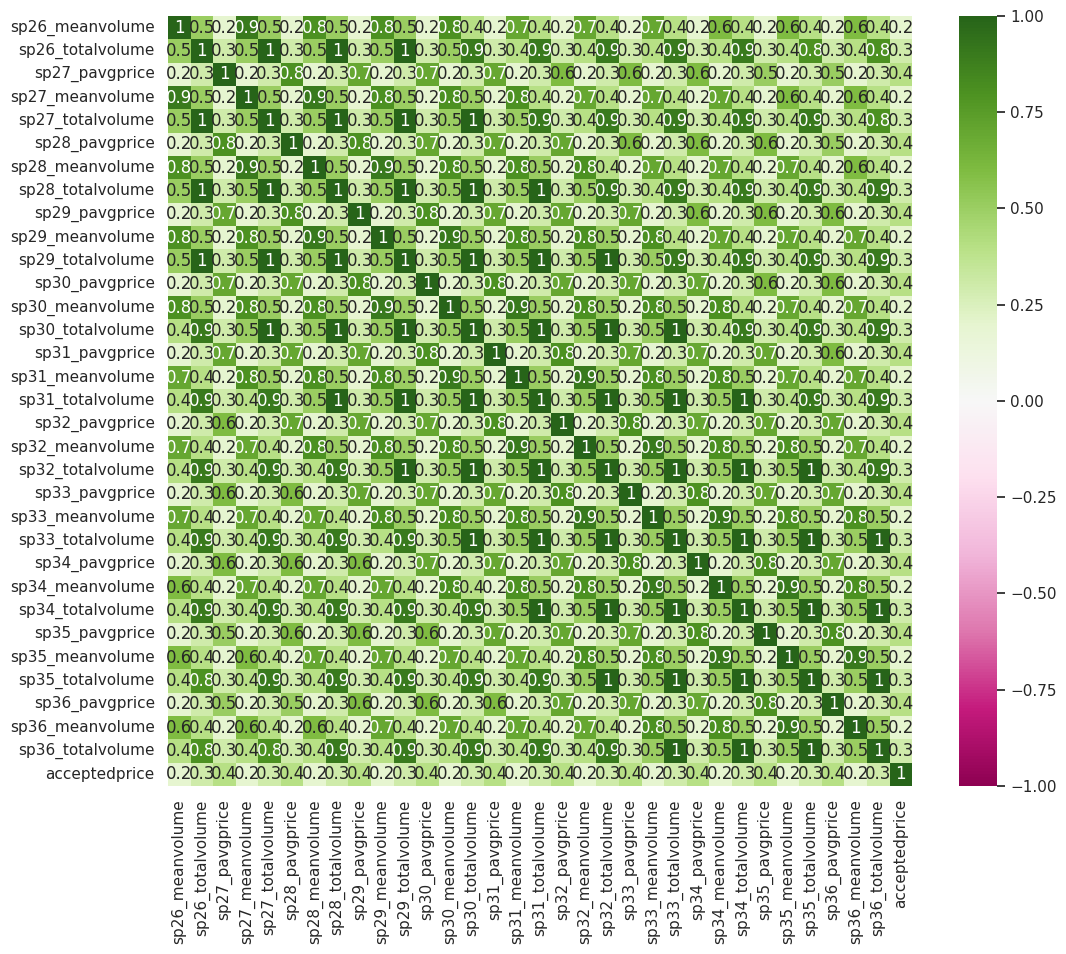

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list5].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

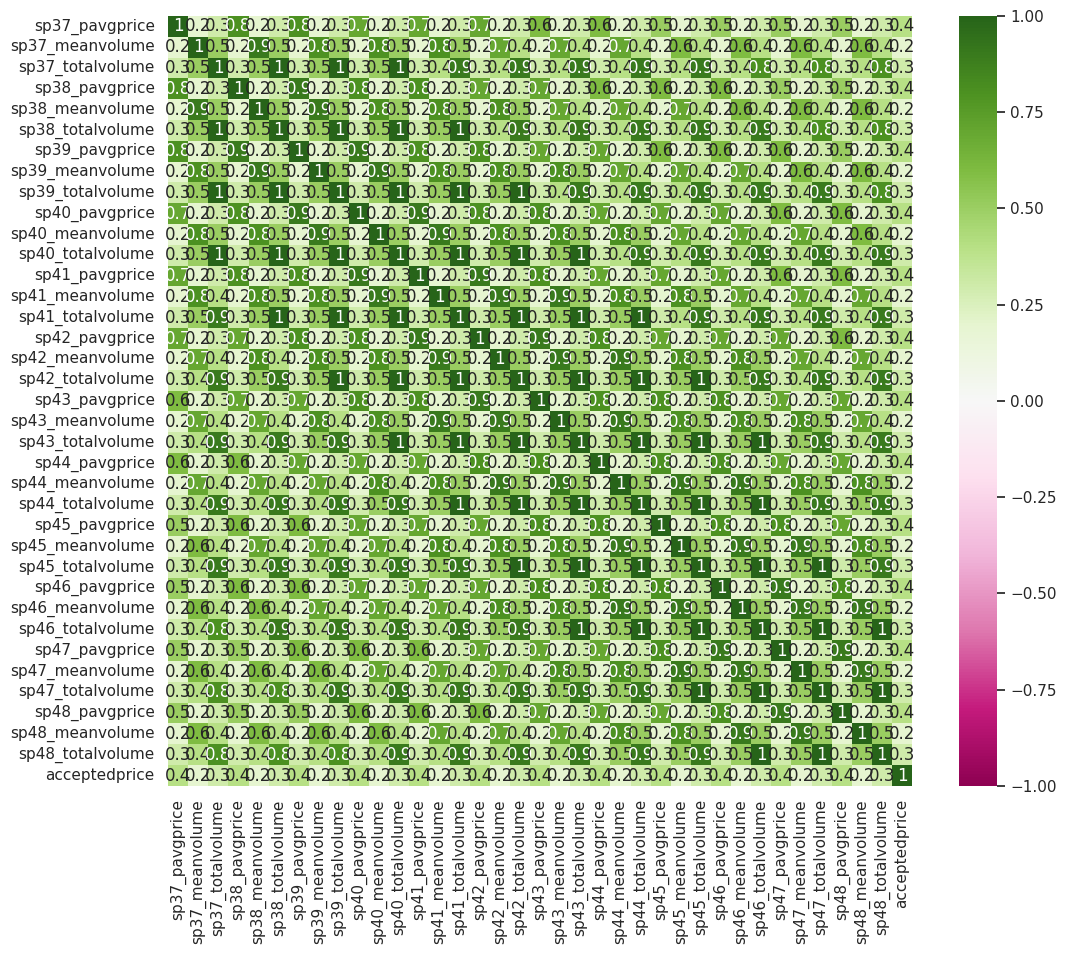

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list6].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)
cat_vars.append('acceptedprice')
cat_vars.extend(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17'])

In [ ]:
drop_cols = [x for x in list(df_model2.columns) if x.startswith('sp')==True]
drop_cols[:5]

['sp3_pavgprice',
 'sp3_meanvolume',
 'sp3_totalvolume',
 'sp4_pavgprice',
 'sp4_meanvolume']

In [ ]:
drop_cols.extend(cat_vars)
drop_cols[-5:]

['Z13', 'Z14', 'Z15', 'Z16', 'Z17']

In [ ]:
import statsmodels.stats.outliers_influence as sso

def vif_analysis(data_df, drop_cols):

    i = 0
    print(f'STEP {i}')

    Z = data_df.drop(drop_cols, axis=1)
    Z['Intercept'] = 1

    vif = pd.DataFrame()
    vif['variables'] = Z.columns
    vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])
    vars_del = []

    print('-'*30)
    print(vif)
    print('\n')


    while len(vif_risk) > 0:

        i += 1
        print(f'STEP {i}')

        vars_del.append(vif_risk[0])
        Z = Z.drop(vif_risk[0], axis=1)

        vif = pd.DataFrame()
        vif['variables'] = Z.columns
        vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
        vif = vif.sort_values(by='VIF', ascending=False)

        vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])

        print('-'*30)
        print(vif)
        print('\n')

    return vif, vars_del

In [ ]:
vif, vars_del = vif_analysis(data_df=df_model2, drop_cols=drop_cols)

STEP 0
------------------------------
                        variables           VIF
40                      Intercept  2.076030e+07
28             DAIG_spnGeneration  3.883052e+05
29                    DATF_Demand  3.582190e+05
32                    DAImbalance  1.401586e+04
26                    DANF_Demand  9.253439e+01
30    SystemTotalLoad_Consumption  6.576987e+01
6                  LOC Center LAT  3.261596e+01
4                         LOC LAT  2.704790e+01
7                 LOC Center LONG  1.167900e+01
5                        LOC LONG  1.137404e+01
10       Transmission Loss Factor  1.135328e+01
34               Solar_Generation  8.249325e+00
31                       DAMargin  7.937507e+00
21                      Month_COS  7.087840e+00
33  GenerationForecast_Production  6.650683e+00
25                 settPeriod_COS  6.241150e+00
37                   NatGas_price  5.682534e+00
36         WindOnshore_Generation  4.341284e+00
24                 settPeriod_SIN  3.784992e+00
20

In [ ]:
vars_del

['DAIG_spnGeneration',
 'DANF_Demand',
 'DATF_Demand',
 'LOC Center LAT',
 'LOC LAT',
 'SystemTotalLoad_Consumption',
 'LOC Center LONG',
 'GenerationForecast_Production',
 'NatGas_price']

In [ ]:
vif

variables           VIF
31                 Intercept  1.728948e+07
22            settPeriod_COS  3.981157e+00
24                  DAMargin  3.559027e+00
26          Solar_Generation  3.417967e+00
27   WindOffshore_Generation  3.372793e+00
28    WindOnshore_Generation  3.314904e+00
13                     Month  3.279621e+00
21            settPeriod_SIN  3.199030e+00
17                 Month_SIN  3.174400e+00
18                 Month_COS  3.126087e+00
10                   Weekend  3.087089e+00
30            BrentOil_price  3.029949e+00
29                Coal_price  2.897002e+00
23            DAID_spnDemand  2.844573e+00
15               Weekday_SIN  2.807665e+00
7   Transmission Loss Factor  2.801318e+00
0           settlementPeriod  2.746137e+00
14                       Day  2.713622e+00
19                   Day_SIN  2.698679e+00
12                      Year  2.341240e+00
3          marketIndexVolume  2.042313e+00
6               BZONE DEMAND  2.031268e+00
2           marketIndexPrice  1.921950e+00
4                   LOC LONG  1.812896e+00
8        Generation Capacity  1.443543e+00
25               DAImbalance  1.368026e+00
11                   Holiday  1.143475e+00
5           BZONE GENERATION  1.136510e+00
16               Weekday_COS  1.125784e+00
1             acceptedvolume  1.117295e+00
9            Demand Capacity  1.115311e+00
20                   Day_COS  1.081206e+00

### - Identify outliers indexes (data per SP & GSP)

In [ ]:
data_df2.columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_pavgprice', 'sp_meanvolume', 'sp_totalvolume',
       'sp3_pavgprice', 'sp3_meanvolume', 'sp3_totalvolume',
       ...
       'sp45_totalvolume', 'sp46_pavgprice', 'sp46_meanvolume',
       'sp46_totalvolume', 'sp47_pavgprice', 'sp47_meanvolume',
       'sp47_totalvolume', 'sp48_pavgprice', 'sp48_meanvolume',
       'sp48_totalvolume'],
      dtype='object', length=145)

In [ ]:
data_df2.iloc[:,0:7]

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20               1.0              Yorkshire   
1              BID     2020-12-20               2.0              Yorkshire   
2              BID     2020-12-20               3.0              Yorkshire   
3              BID     2020-12-20               4.0              Yorkshire   
4              BID     2020-12-20               5.0              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30              44.0  North Eastern England   
1240508      OFFER     2023-06-30              45.0  North Eastern England   
1240509      OFFER     2023-06-30              46.0  North Eastern England   
1240510      OFFER     2023-06-30              47.0  North Eastern England   
1240511      OFFER     2023-06-30              48.0  North Eastern England   

         sp_pavgprice  sp_meanvolume  sp_totalvolume  
0          -50.842071        -56.544        -113.088  
1          -38.043485         -3.108          -6.216  
2            0.000000          0.000           0.000  
3           38.000000          0.000           0.000  
4          -63.690786          0.000           0.000  
...               ...            ...             ...  
1240507    124.000000          0.000           0.000  
1240508    124.000000          0.000           0.000  
1240509    114.720000          0.800           0.800  
1240510    162.498645          0.000           0.000  
1240511    162.500000          0.000           0.000  

[1240512 rows x 7 columns]

In [ ]:
df_model_vars = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name', 'acceptedprice', 'acceptedvolume']

In [ ]:
data_df2_vars = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name','sp_pavgprice','sp_meanvolume','sp_totalvolume']

In [ ]:
df_out = pd.merge(df_model.loc[:,df_model_vars], data_df2.loc[:,data_df2_vars],
                  on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('', ''))
df_out

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0              BID     2020-12-20                 1  Northern Scotland   
1              BID     2020-12-20                 1  Northern Scotland   
2              BID     2020-12-20                 1  Northern Scotland   
3              BID     2020-12-20                 1  Northern Scotland   
4              BID     2020-12-20                 1  Northern Scotland   
...            ...            ...               ...                ...   
1201399      OFFER     2023-06-30                48             London   
1201400      OFFER     2023-06-30                48          Yorkshire   
1201401      OFFER     2023-06-30                48    Eastern England   
1201402      OFFER     2023-06-30                48     Southern Wales   
1201403      OFFER     2023-06-30                48     Southern Wales   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600    -57.486447     -31.571222   
1               -17.13          -3.000    -57.486447     -31.571222   
2               -67.13          -7.500    -57.486447     -31.571222   
3               -71.42         -53.500    -57.486447     -31.571222   
4               -70.00         -34.500    -57.486447     -31.571222   
...                ...             ...           ...            ...   
1201399         114.00         120.000    114.000000     120.000000   
1201400         125.00         150.167    125.000000     150.167000   
1201401         140.00         187.500    140.000000     187.500000   
1201402         165.00         109.500    162.500000     109.500000   
1201403         160.00         109.500    162.500000     109.500000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1201399         120.000  
1201400         150.167  
1201401         187.500  
1201402         219.000  
1201403         219.000  

[1201404 rows x 9 columns]

In [ ]:
df_outliers = df_out.copy()

In [ ]:
df_outliers['diff_price_avgprice'] = abs(df_outliers['acceptedprice'] - df_outliers['sp_pavgprice'])

In [ ]:
df_outliers

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0              BID     2020-12-20                 1  Northern Scotland   
1              BID     2020-12-20                 1  Northern Scotland   
2              BID     2020-12-20                 1  Northern Scotland   
3              BID     2020-12-20                 1  Northern Scotland   
4              BID     2020-12-20                 1  Northern Scotland   
...            ...            ...               ...                ...   
1201399      OFFER     2023-06-30                48             London   
1201400      OFFER     2023-06-30                48          Yorkshire   
1201401      OFFER     2023-06-30                48    Eastern England   
1201402      OFFER     2023-06-30                48     Southern Wales   
1201403      OFFER     2023-06-30                48     Southern Wales   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600    -57.486447     -31.571222   
1               -17.13          -3.000    -57.486447     -31.571222   
2               -67.13          -7.500    -57.486447     -31.571222   
3               -71.42         -53.500    -57.486447     -31.571222   
4               -70.00         -34.500    -57.486447     -31.571222   
...                ...             ...           ...            ...   
1201399         114.00         120.000    114.000000     120.000000   
1201400         125.00         150.167    125.000000     150.167000   
1201401         140.00         187.500    140.000000     187.500000   
1201402         165.00         109.500    162.500000     109.500000   
1201403         160.00         109.500    162.500000     109.500000   

         sp_totalvolume  diff_price_avgprice  
0              -568.282            13.873553  
1              -568.282            40.356447  
2              -568.282             9.643553  
3              -568.282            13.933553  
4              -568.282            12.513553  
...                 ...                  ...  
1201399         120.000             0.000000  
1201400         150.167             0.000000  
1201401         187.500             0.000000  
1201402         219.000             2.500000  
1201403         219.000             2.500000  

[1201404 rows x 10 columns]

In [ ]:
df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
369976         BID     2021-10-20                38        Eastern England   
369977         BID     2021-10-20                38        Eastern England   
416547         BID     2021-11-15                35      Northern Scotland   
416592         BID     2021-11-15                36      Northern Scotland   
453537         BID     2021-12-05                34  South Western England   
453557         BID     2021-12-05                35  South Western England   
453558         BID     2021-12-05                35  South Western England   
453559         BID     2021-12-05                35  South Western England   
878157         BID     2022-10-31                 1              Yorkshire   
928302         BID     2022-11-29                26              Yorkshire   
928338         BID     2022-11-29                27        Eastern England   
928339         BID     2022-11-29                27        Eastern England   
928346         BID     2022-11-29                27              Yorkshire   
928347         BID     2022-11-29                27              Yorkshire   
928348         BID     2022-11-29                27              Yorkshire   
928349         BID     2022-11-29                27              Yorkshire   
928350         BID     2022-11-29                27              Yorkshire   
928382         BID     2022-11-29                28        Eastern England   
928383         BID     2022-11-29                28        Eastern England   
928391         BID     2022-11-29                28              Yorkshire   
928392         BID     2022-11-29                28              Yorkshire   
928393         BID     2022-11-29                28              Yorkshire   
928394         BID     2022-11-29                28              Yorkshire   
928395         BID     2022-11-29                28              Yorkshire   
1180777        BID     2023-06-11                44              Yorkshire   
1180847        BID     2023-06-11                46       Southern England   
1180848        BID     2023-06-11                46       Southern England   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
369976        -9999.00          -0.003  -4954.500000      -0.003000   
369977           90.00          -0.003  -4954.500000      -0.003000   
416547         1719.84          -2.250     56.237065     -72.000947   
416592         1719.84         -11.000     36.819765     -66.709900   
453537        -9999.00          -1.400   -727.547217      -5.294667   
453557          186.00          -1.934  -4171.446007      -1.611333   
453558          160.00          -0.834  -4171.446007      -1.611333   
453559        -9999.00          -2.066  -4171.446007      -1.611333   
878157        -5024.50          -2.227   -390.099388      -8.825667   
928302         9999.00          -4.700    451.401159     -26.695667   
928338         9999.00         -48.000   8601.959786     -27.975000   
928339          167.00          -7.950   8601.959786     -27.975000   
928346         9999.00         -47.000   1437.054068     -72.991600   
928347          190.00         -99.910   1437.054068     -72.991600   
928348          163.70         -79.732   1437.054068     -72.991600   
928349          162.50         -65.166   1437.054068     -72.991600   
928350          162.50         -73.150   1437.054068     -72.991600   
928382         9999.00         -48.000   8446.578947     -28.500000   
928383          167.00          -9.000   8446.578947     -28.500000   
928391         9999.00         -47.000   1825.627502     -55.955200   
928392          190.00        -102.376   1825.627502     -55.955200   
928393          163.70         -77.600   1825.627502     -55.955200   
928394          164.00         -28.316   1825.627502     -55.955200   
928395          164.00         -24.484   1825.627502     -55.955200   
1180777        4446.56          -1.258    684.83

In [ ]:
outBid_indexes = list(df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outBid_indexes[:5]

[369976, 369977, 416547, 416592, 453537]

In [ ]:
df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
19540        OFFER     2021-01-06                26          Yorkshire   
19590        OFFER     2021-01-06                27          Yorkshire   
19635        OFFER     2021-01-06                28          Yorkshire   
19666        OFFER     2021-01-06                29          Yorkshire   
19698        OFFER     2021-01-06                30          Yorkshire   
...            ...            ...               ...                ...   
1139288      OFFER     2023-05-04                18  Northern Scotland   
1139289      OFFER     2023-05-04                18  Northern Scotland   
1175401      OFFER     2023-06-06                30   Southern England   
1175402      OFFER     2023-06-06                30   Southern England   
1175403      OFFER     2023-06-06                30   Southern England   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
19540          3000.00           0.003    123.447200      73.930833   
19590          3000.00           6.208    173.252356      94.289250   
19635          3000.00          18.208    280.486678     113.524667   
19666          3000.00          30.208    421.215449     146.596000   
19698           125.00          41.816   1569.206417      42.012000   
...                ...             ...           ...            ...   
1139288        9999.00           2.551   1694.734503       7.525500   
1139289           0.00          12.500   1694.734503       7.525500   
1175401         117.90           1.050  -2407.754762       1.141667   
1175402       -5491.18           1.542  -2407.754762       1.141667   
1175403         116.50           0.833  -2407.754762       1.141667   

         sp_totalvolume  diff_price_avgprice  
19540           443.585          2876.552800  
19590           377.157          2826.747644  
19635           340.574          2719.513322  
19666           293.192          2578.784551  
19698            84.024          1444.206417  
...                 ...                  ...  
1139288          15.051          8304.265497  
1139289          15.051          1694.734503  
1175401           3.425          2525.654762  
1175402           3.425          3083.425238  
1175403           3.425          2524.254762  

[573 rows x 10 columns]

In [ ]:
outOff_indexes = list(df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outOff_indexes[:5]

[19540, 19590, 19635, 19666, 19698]

In [ ]:
data={'outBid_indexes':outBid_indexes, 'outOff_indexes':outOff_indexes}

In [ ]:
df_outBid = pd.DataFrame()
df_outBid['outBid_indexes'] = outBid_indexes

df_outOff = pd.DataFrame()
df_outOff['outOff_indexes'] = outOff_indexes

In [ ]:
file_path1 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP & GSP (BID).csv'
file_path2 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP & GSP (OFFER).csv'

In [ ]:
#df_outBid.to_csv(file_path1, index=False)
#df_outOff.to_csv(file_path2, index=False)

In [ ]:
df_outliers[(df_outliers['diff_price_avgprice']>999)&(df_outliers['diff_price_avgprice']<1100)]

recordtype settlementDate  settlementPeriod  \
20638        OFFER     2021-01-07                28   
20666        OFFER     2021-01-07                29   
25953        OFFER     2021-01-12                34   
25986        OFFER     2021-01-12                35   
26048        OFFER     2021-01-12                37   
26088        OFFER     2021-01-12                38   
26126        OFFER     2021-01-12                39   
26856        OFFER     2021-01-13                32   
26942        OFFER     2021-01-13                35   
48162        OFFER     2021-02-01                34   
114018       OFFER     2021-03-15                32   
114113       OFFER     2021-03-15                35   
316424       OFFER     2021-09-06                 8   
316426       OFFER     2021-09-06                 8   
317113       OFFER     2021-09-06                34   
318130       OFFER     2021-09-07                33   
318131       OFFER     2021-09-07                33   
318163       OFFER     2021-09-07                34   
318164       OFFER     2021-09-07                34   
318415       OFFER     2021-09-07                42   
416487       OFFER     2021-11-15                33   
416488       OFFER     2021-11-15                33   
416489       OFFER     2021-11-15                33   
434866       OFFER     2021-11-24                38   
434870       OFFER     2021-11-24                38   
434927       OFFER     2021-11-24                39   
435096       OFFER     2021-11-24                42   
443975       OFFER     2021-11-29                21   
443976       OFFER     2021-11-29                21   
443977       OFFER     2021-11-29                21   
444315       OFFER     2021-11-29                28   
450418       OFFER     2021-12-03                27   
450475       OFFER     2021-12-03                28   
450507       OFFER     2021-12-03                29   
450578       OFFER     2021-12-03                31   
470656       OFFER     2021-12-16                28   
523980       OFFER     2022-01-25                30   
844453       OFFER     2022-10-07                35   
844454       OFFER     2022-10-07                35   
844456       OFFER     2022-10-07                35   
844457       OFFER     2022-10-07                35   
844458       OFFER     2022-10-07                35   
844459       OFFER     2022-10-07                35   
917864       OFFER     2022-11-22                32   
942026       OFFER     2022-12-12                30   
942238       OFFER     2022-12-12                37   
1060098      OFFER     2023-03-07                38   

                    BMU GSP Group Name  acceptedprice  acceptedvolume  \
20638                        Yorkshire         1500.0           1.000   
20666                        Yorkshire         1600.0          30.000   
25953                        Yorkshire           51.0          11.200   
25986                        Yorkshire           51.0           3.200   
26048                        Yorkshire           30.0           3.500   
26088                        Yorkshire           30.0           8.438   
26126                        Yorkshire           30.0           9.112   
26856                        Yorkshire         4000.0          95.926   
26942                        Yorkshire         2700.0          36.784   
48162            South Western England         1700.0         250.000   
114018                       Yorkshire          500.0         197.000   
114113                       Yorkshire         4000.0         283.666   
316424           South Eastern England          130.0          72.188   
316426           South Eastern England          131.0          48.000   
317113                       Yorkshire         4000.0         110.000   
318130                   East Midlands         2950.0         230.000   
318131                   East Midlands         2950.0         230.000   
318163                   East Midlands         3400.0

In [ ]:
df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['settlementDate']=='2021-01-12')&(df_outliers['settlementPeriod']==37)]

recordtype settlementDate  settlementPeriod  \
26045      OFFER     2021-01-12                37   
26046      OFFER     2021-01-12                37   
26047      OFFER     2021-01-12                37   
26048      OFFER     2021-01-12                37   
26049      OFFER     2021-01-12                37   
26050      OFFER     2021-01-12                37   

                  BMU GSP Group Name  acceptedprice  acceptedvolume  \
26045  Merseyside and Northern Wales          995.0         230.000   
26046          South Western England          725.0          83.334   
26047                 Southern Wales           50.0           0.000   
26048                      Yorkshire           30.0           3.500   
26049                      Yorkshire         1000.0         197.000   
26050                      Yorkshire         1200.0         185.000   

       sp_pavgprice  sp_meanvolume  sp_totalvolume  diff_price_avgprice  
26045    995.000000        230.000         230.000             0.000000  
26046    725.000000         83.334          83.334             0.000000  
26047     50.000000          0.000           0.000             0.000000  
26048   1087.172503        128.500         385.500          1057.172503  
26049   1087.172503        128.500         385.500            87.172503  
26050   1087.172503        128.500         385.500           112.827497

In [ ]:
df_outliers[(df_outliers['acceptedprice']!=0)&(df_outliers['sp_pavgprice']==0)].groupby(by=['settlementDate','settlementPeriod']).count().tail(60)

Empty DataFrame
Columns: [recordtype, BMU GSP Group Name, acceptedprice, acceptedvolume, sp_pavgprice, sp_meanvolume, sp_totalvolume, diff_price_avgprice]
Index: []

In [ ]:
df_outliers[(df_outliers['settlementDate']=='2023-06-28')&(df_outliers['settlementPeriod']==30)]

recordtype settlementDate  settlementPeriod  \
1198527        BID     2023-06-28                30   
1198528        BID     2023-06-28                30   
1198529        BID     2023-06-28                30   
1198530        BID     2023-06-28                30   
1198531        BID     2023-06-28                30   
1198532        BID     2023-06-28                30   
1198533        BID     2023-06-28                30   
1198534        BID     2023-06-28                30   
1198535        BID     2023-06-28                30   
1198536      OFFER     2023-06-28                30   
1198537      OFFER     2023-06-28                30   
1198538      OFFER     2023-06-28                30   
1198539      OFFER     2023-06-28                30   
1198540      OFFER     2023-06-28                30   
1198541      OFFER     2023-06-28                30   
1198542      OFFER     2023-06-28                30   

                    BMU GSP Group Name  acceptedprice  acceptedvolume  \
1198527               Southern England          72.00          -0.083   
1198528               Southern England          62.00          -0.500   
1198529                         London          55.20         -16.236   
1198530              Northern Scotland           1.00          -0.833   
1198531          South Eastern England          55.20         -16.750   
1198532                      Yorkshire          55.01         -16.941   
1198533                      Yorkshire          55.00          -9.532   
1198534                      Yorkshire          55.00         -19.467   
1198535                      Yorkshire          55.00         -15.542   
1198536  Merseyside and Northern Wales         198.50          49.000   
1198537  Merseyside and Northern Wales         119.00           3.022   
1198538  Merseyside and Northern Wales         119.00           1.055   
1198539  Merseyside and Northern Wales         119.00           1.112   
1198540  Merseyside and Northern Wales         119.00           1.153   
1198541                      Yorkshire         103.00           0.000   
1198542                  East Midlands         129.75         115.000   

         sp_pavgprice  sp_meanvolume  sp_totalvolume  diff_price_avgprice  
1198527     63.423671        -0.2915          -0.583             8.576329  
1198528     63.423671        -0.2915          -0.583             1.423671  
1198529     55.200000       -16.2360         -16.236             0.000000  
1198530      1.000000        -0.8330          -0.833             0.000000  
1198531     55.200000       -16.7500         -16.750             0.000000  
1198532     55.002755       -15.3705         -61.482             0.007245  
1198533     55.002755       -15.3705         -61.482             0.002755  
1198534     55.002755       -15.3705         -61.482             0.002755  
1198535     55.002755       -15.3705         -61.482             0.002755  
1198536    189.389578        11.0684          55.342             9.110422  
1198537    189.389578        11.0684          55.342            70.389578  
1198538    189.389578        11.0684          55.342            70.389578  
1198539    189.389578        11.0684          55.342            70.389578  
1198540    189.389578        11.0684          55.342            70.389578  
1198541    103.000000         0.0000           0.000             0.000000  
1198542    129.750000       115.0000         115.000             0.000000

## ALLBOAS & RESEARCH DATA & PREV. SP DATA & MARKET INDEX
## (avg. price forecasting per SP & GSP)

### - Loading dataset

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP).csv'

In [ ]:
df_model = pd.read_csv(file_path)

In [ ]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187159 entries, 0 to 1187158
Columns: 211 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(194), int64(3), object(13)
memory usage: 1.9+ GB


In [ ]:
data_df2[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240512 entries, 0 to 1240511
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1240512 non-null  object        
 1   settlementDate    1240512 non-null  datetime64[ns]
 2   settlementPeriod  1240512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.4+ MB


In [ ]:
sel_cols = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name','sp_pavgprice']

In [ ]:
df_model2 = pd.merge(df_model, data_df2[sel_cols], how='left',
                     on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('',''))

In [ ]:
df_model2

recordtype settlementDate  settlementPeriod     BMU ID  acceptedprice  \
0              BID     2021-01-01                 1   E_GYAR-1           37.0   
1              BID     2021-01-01                 1   E_SHOS-1           35.0   
2              BID     2021-01-01                 1   T_CDCL-1           40.0   
3              BID     2021-01-01                 1   T_MRWD-1           37.1   
4              BID     2021-01-01                 1  T_PEMB-11           37.0   
...            ...            ...               ...        ...            ...   
1187154      OFFER     2023-06-30                48   T_LBAR-1          140.0   
1187155      OFFER     2023-06-30                48  T_PEMB-11          165.0   
1187156      OFFER     2023-06-30                48  T_PEMB-41          160.0   
1187157      OFFER     2023-06-30                48   T_RATS-3          175.0   
1187158      OFFER     2023-06-30                48   T_SPLN-1          120.0   

         acceptedvolume BMU Type BMU Fuel Type     BMU GSP Group Name  \
0               -18.366        E          CCGT        Eastern England   
1                -0.666        E          CCGT  South Eastern England   
2               -11.084        T          CCGT          East Midlands   
3              -174.768        T          CCGT       Southern England   
4               -33.634        T          CCGT         Southern Wales   
...                 ...      ...           ...                    ...   
1187154         187.500        T          CCGT        Eastern England   
1187155         109.500        T          CCGT         Southern Wales   
1187156         109.500        T          CCGT         Southern Wales   
1187157         115.000        T          COAL          East Midlands   
1187158         167.500        T          CCGT          East Midlands   

           LOC LAT  ...  sp46_pavgprice  sp46_meanvolume  sp46_totalvolume  \
0        52.583834  ...        7.379666           0.0000             0.000   
1        50.829511  ...       35.944820         -16.8968           -84.484   
2        53.307421  ...       20.000000           0.0000             0.000   
3        50.898831  ...       38.250000         -83.5000           -83.500   
4        51.683003  ...       35.944820           0.0000             0.000   
...            ...  ...             ...              ...               ...   
1187154  52.203604  ...      160.000000           0.0000             0.000   
1187155  51.683003  ...      165.000000           0.0000             0.000   
1187156  51.683003  ...      165.000000           0.0000             0.000   
1187157  52.865393  ...      165.000000         115.0000           115.000   
1187158  52.805849  ...      165.000000         115.0000           115.000   

        sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  sp48_pavgprice  \
0             8.159455           0.0000             0.000        7.616887   
1             8.159455           0.0000             0.000       36.221377   
2             8.159455           0.0000             0.000       36.221377   
3            38.250000          -7.8340            -7.834       38.210000   
4             8.159455           0.0000             0.000       36.221377   
...                ...              ...               ...             ...   
1187154     160.000000           0.0000             0.000      160.000000   
1187155     161.973687           0.0000             0.000      165.000000   
1187156     161.973687           0.0000             0.000      165.000000   
1187157     161.973687          61.5835           123.167      165.000000   
1187158     161.973687          61.5835           123.167      165.000000   

         sp48_meanvolume  sp48_totalvolume  sp_pavgprice  
0                  0.000             0.000     37.000000  
1                 -6.563           -26.252     35.000000  
2                  0.000             0.000     40.000000  
3                -18.844           -18.844     37.100000  
4

In [ ]:
df_model2.columns

Index(['recordtype', 'settlementDate', 'settlementPeriod', 'BMU ID',
       'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
       'BMU GSP Group Name', 'LOC LAT',
       ...
       'sp46_pavgprice', 'sp46_meanvolume', 'sp46_totalvolume',
       'sp47_pavgprice', 'sp47_meanvolume', 'sp47_totalvolume',
       'sp48_pavgprice', 'sp48_meanvolume', 'sp48_totalvolume',
       'sp_pavgprice'],
      dtype='object', length=212)

### - Remove unnecessary columns:


    ['BMU ID', 'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
    'LOC LAT', 'LOC LONG',
    
    'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
    'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
    'Z13', 'Z14', 'Z15', 'Z16', 'Z17',
    
    'BMU Party ID', 'Trading Unit', 'PC Flag', 'PC Status', 'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity', 'Exempt Export Flag',
    'Base TU Flag', 'FPN Flag']

In [ ]:
drop_cols = ['BMU ID', 'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
             'LOC LAT', 'LOC LONG', 'BMU Party ID', 'Trading Unit', 'PC Flag', 'PC Status',
             'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity',
             'Exempt Export Flag', 'Base TU Flag', 'FPN Flag']

In [ ]:
df_model2 = df_model2.drop(columns=drop_cols, axis=1)

In [ ]:
df_model2.iloc[:,0:55].columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'LOC Center LAT', 'LOC Center LONG', 'BZONE',
       'BZONE GENERATION', 'BZONE DEMAND', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6',
       'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16',
       'Z17', 'Weekend', 'Holiday', 'Year', 'Month', 'Day', 'Weekday_SIN',
       'Weekday_COS', 'Month_SIN', 'Month_COS', 'Day_SIN', 'Day_COS',
       'settPeriod_SIN', 'settPeriod_COS', 'marketIndexPrice',
       'marketIndexVolume', 'activeFlag', 'DANF_Demand', 'DAID_spnDemand',
       'DAIG_spnGeneration', 'DATF_Demand', 'SystemTotalLoad_Consumption',
       'DAMargin', 'DAImbalance', 'GenerationForecast_Production',
       'Solar_Generation', 'WindOffshore_Generation', 'WindOnshore_Generation',
       'NatGas_price', 'Coal_price'],
      dtype='object')

In [ ]:
df_model2.insert(4, 'sp_pavgprice', df_model2.pop('sp_pavgprice'))

In [ ]:
df_model2.iloc[:,0:60].columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT',
       'LOC Center LONG', 'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
       'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Weekend', 'Holiday', 'Year',
       'Month', 'Day', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN', 'Month_COS',
       'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'activeFlag', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance',
       'GenerationForecast_Production', 'Solar_Generation',
       'WindOffshore_Generation', 'WindOnshore_Generation', 'NatGas_price',
       'Coal_price', 'BrentOil_price', 'sp3_pavgprice', 'sp3_meanvolume',
       'sp3_totalvolume'],
      dtype='object')

In [ ]:
df_model2

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2021-01-01                 1        Eastern England   
1              BID     2021-01-01                 1  South Eastern England   
2              BID     2021-01-01                 1          East Midlands   
3              BID     2021-01-01                 1       Southern England   
4              BID     2021-01-01                 1         Southern Wales   
...            ...            ...               ...                    ...   
1187154      OFFER     2023-06-30                48        Eastern England   
1187155      OFFER     2023-06-30                48         Southern Wales   
1187156      OFFER     2023-06-30                48         Southern Wales   
1187157      OFFER     2023-06-30                48          East Midlands   
1187158      OFFER     2023-06-30                48          East Midlands   

         sp_pavgprice  LOC Center LAT  LOC Center LONG BZONE  \
0           37.000000       52.226649         0.519993   Z12   
1           35.000000       51.148006         0.327832   Z16   
2           40.000000       52.800048        -0.927751   Z10   
3           37.100000       51.210988        -1.493502   Z16   
4           37.000000       51.905787        -3.779421   Z13   
...               ...             ...              ...   ...   
1187154    140.000000       52.226649         0.519993   Z12   
1187155    162.500000       51.905787        -3.779421   Z13   
1187156    162.500000       51.905787        -3.779421   Z13   
1187157    134.967742       52.800048        -0.927751   Z11   
1187158    134.967742       52.800048        -0.927751   Z10   

         BZONE GENERATION  BZONE DEMAND  ...  sp45_totalvolume  \
0                    7500          4000  ...             0.000   
1                   14000         17500  ...          -181.027   
2                   20000          9000  ...             0.000   
3                   14000         17500  ...           -51.167   
4                   14000         17500  ...             0.000   
...                   ...           ...  ...               ...   
1187154              7500          4000  ...             0.000   
1187155             14000         17500  ...             0.000   
1187156             14000         17500  ...             0.000   
1187157             17500         19000  ...           115.000   
1187158             20000          9000  ...           115.000   

         sp46_pavgprice  sp46_meanvolume  sp46_totalvolume  sp47_pavgprice  \
0              7.379666           0.0000             0.000        8.159455   
1             35.944820         -16.8968           -84.484        8.159455   
2             20.000000           0.0000             0.000        8.159455   
3             38.250000         -83.5000           -83.500       38.250000   
4             35.944820           0.0000             0.000        8.159455   
...                 ...              ...               ...             ...   
1187154      160.000000           0.0000             0.000      160.000000   
1187155      165.000000           0.0000             0.000      161.973687   
1187156      165.000000           0.0000             0.000      161.973687   
1187157      165.000000         115.0000           115.000      161.973687   
1187158      165.000000         115.0000           115.000      161.973687   

         sp47_meanvolume  sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  \
0                 0.0000             0.000        7.616887            0.000   
1                 0.0000             0.000       36.221377           -6.563   
2                 0.0000             0.000       36.221377            0.000   
3                -7.8340            -7.834       38.210000          -18.844   
4                 0.0000             0.000       36.221377            0.000   
...                  ...               ...             ...              ...   
1187154           0

### - Reviewing "BZONES" per GSP:

In [ ]:
gsp_list = list(df_model2['BMU GSP Group Name'].unique())

In [ ]:
drop_bzone = {}

for x in gsp_list:
  df_aux = df_model2[df_model2['BMU GSP Group Name']==x].copy()
  bzone_list = list(df_aux['BZONE'].unique())
  df_bzone = df_aux['BZONE'].value_counts().reset_index()

  if len(bzone_list)>1:
    drop_bzone[x] = list(df_bzone['index'])[1:]

  print('_'*30)
  print(f'{x} -> {bzone_list}')
  print(df_aux['BZONE'].value_counts())


______________________________
Eastern England -> ['Z12', 'Z14', 'Z15']
Z12    42850
Z14     5016
Z15      212
Name: BZONE, dtype: int64
______________________________
South Eastern England -> ['Z16', 'Z15', 'Z14']
Z15    68991
Z16    16345
Z14      475
Name: BZONE, dtype: int64
______________________________
East Midlands -> ['Z10', 'Z11', 'Z12', 'Z8']
Z10    63788
Z11    24147
Z12     9847
Z8       803
Name: BZONE, dtype: int64
______________________________
Southern England -> ['Z16', 'Z13', 'Z6', 'Z17']
Z16    30702
Z13    27093
Z6      2913
Z17     1673
Name: BZONE, dtype: int64
______________________________
Southern Wales -> ['Z13']
Z13    60124
Name: BZONE, dtype: int64
______________________________
Yorkshire -> ['Z8', 'Z10']
Z8     135486
Z10     41416
Name: BZONE, dtype: int64
______________________________
North Western England -> ['Z9', 'Z7', 'Z8']
Z9    70201
Z7     8496
Z8     1050
Name: BZONE, dtype: int64
______________________________
South Western England -> ['Z13', 

In [ ]:
drop_bzone

{'Eastern England': ['Z14', 'Z15'],
 'South Eastern England': ['Z16', 'Z14'],
 'East Midlands': ['Z11', 'Z12', 'Z8'],
 'Southern England': ['Z13', 'Z6', 'Z17'],
 'Yorkshire': ['Z10'],
 'North Western England': ['Z7', 'Z8'],
 'South Western England': ['Z13', 'Z14'],
 'Northern Scotland': ['Z4', 'Z5', 'Z9', 'Z2', 'Z3'],
 'Merseyside and Northern Wales': ['Z13'],
 'West Midlands': ['Z13'],
 'Southern Scotland': ['Z3'],
 'North Eastern England': ['Z8']}

In [ ]:
df_model2.shape

(1187159, 195)

In [ ]:
'''
for x in drop_bzone.keys():
  for y in drop_bzone[x]:

      drop_indexes = list(df_model[(df_model['BMU GSP Group Name']==x)&(df_model['BZONE']==y)].index.values)
      df_model = df_model.drop(index=drop_indexes, axis=0)
      print(f'{df_model.shape} -> -{len(drop_indexes)}')

df_model = df_model.reset_index(drop=True)
'''

"\nfor x in drop_bzone.keys():\n  for y in drop_bzone[x]:\n\n      drop_indexes = list(df_model[(df_model['BMU GSP Group Name']==x)&(df_model['BZONE']==y)].index.values)\n      df_model = df_model.drop(index=drop_indexes, axis=0)\n      print(f'{df_model.shape} -> -{len(drop_indexes)}')\n\ndf_model = df_model.reset_index(drop=True)\n"

In [ ]:
df_model2.columns[:50]

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT',
       'LOC Center LONG', 'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
       'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Weekend', 'Holiday', 'Year',
       'Month', 'Day', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN', 'Month_COS',
       'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'activeFlag', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance'],
      dtype='object')

In [ ]:
drop_cols = ['BZONE', 'BZONE GENERATION', 'BZONE DEMAND',
             'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9',
             'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17']

In [ ]:
df_model2 = df_model2.drop(columns=drop_cols, axis=1)

In [ ]:
df_model2.shape

(1187159, 175)

In [ ]:
df_model2 = df_model2.drop_duplicates()
df_model2 = df_model2.sort_values(by=['BMU GSP Group Name','settlementDate','settlementPeriod', 'recordtype'])
df_model2 = df_model2.reset_index(drop=True)
df_model2

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0             BID     2021-01-01                 1      East Midlands   
1           OFFER     2021-01-01                 1      East Midlands   
2           OFFER     2021-01-01                 2      East Midlands   
3           OFFER     2021-01-01                 3      East Midlands   
4           OFFER     2021-01-01                 4      East Midlands   
...           ...            ...               ...                ...   
468986        BID     2023-06-30                46          Yorkshire   
468987      OFFER     2023-06-30                46          Yorkshire   
468988        BID     2023-06-30                47          Yorkshire   
468989        BID     2023-06-30                48          Yorkshire   
468990      OFFER     2023-06-30                48          Yorkshire   

        sp_pavgprice  LOC Center LAT  LOC Center LONG  Weekend  Holiday  \
0          40.000000       52.800048        -0.927751      0.0      1.0   
1          71.900000       52.800048        -0.927751      0.0      1.0   
2          71.900000       52.800048        -0.927751      0.0      1.0   
3          71.900000       52.800048        -0.927751      0.0      1.0   
4          71.900000       52.800048        -0.927751      0.0      1.0   
...              ...             ...              ...      ...      ...   
468986      4.103535       53.670497        -1.071275      0.0      0.0   
468987    169.000000       53.670497        -1.071275      0.0      0.0   
468988     -3.207901       53.670497        -1.071275      0.0      0.0   
468989    -47.158350       53.670497        -1.071275      0.0      0.0   
468990    125.000000       53.670497        -1.071275      0.0      0.0   

          Year  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
0       2021.0  ...             0.000       20.000000         0.000000   
1       2021.0  ...           127.128       67.750000       146.866000   
2       2021.0  ...           242.097       67.865337        63.564000   
3       2021.0  ...           244.800       67.963757       121.048500   
4       2021.0  ...           241.979       67.912071       122.400000   
...        ...  ...               ...             ...              ...   
468986  2023.0  ...           -87.485       62.177127       -33.735667   
468987  2023.0  ...             0.900      160.000000         0.000000   
468988  2023.0  ...           -20.235       63.000000       -87.485000   
468989  2023.0  ...             0.000       63.000000       -20.235000   
468990  2023.0  ...             0.000      160.000000         0.000000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
0                  0.000        8.159455         0.000000             0.000   
1                146.866       67.989355       124.465000           248.930   
2                127.128       67.750000       146.866000           146.866   
3                242.097       67.865337        63.564000           127.128   
4                244.800       67.963757       121.048500           242.097   
...                  ...             ...              ...               ...   
468986          -101.207       62.443450       -50.716000          -202.864   
468987             0.000      169.000000         0.171000             0.171   
468988           -87.485       62.177127       -33.735667          -101.207   
468989           -20.235       63.000000       -87.485000           -87.485   
468990             0.000      119.000000         0.900000             0.900   

        sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0            36.221377         0.000000             0.000  
1            69.149419        77.458000           154.916  
2            67.989355       124.465000           248.930  
3            67.750000       146.866000           146.866  
4            67.865337        63.564000           127.128  
...                ...         

In [ ]:
df_model2.shape

(468991, 175)

In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468991 entries, 0 to 468990
Columns: 175 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(171), int64(1), object(2)
memory usage: 626.2+ MB


### - Data analysis:

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP (pavg. price per SP+GSP)).csv'

In [ ]:
#df_model2.to_csv(file_path, index=False)

In [ ]:
df_model2 = pd.read_csv(file_path)

In [ ]:
# "DATE" COLUMN
df_model2['settlementDate'] = pd.to_datetime(df_model2['settlementDate'])

In [ ]:
df_model2

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0             BID     2021-01-01                 1      East Midlands   
1           OFFER     2021-01-01                 1      East Midlands   
2           OFFER     2021-01-01                 2      East Midlands   
3           OFFER     2021-01-01                 3      East Midlands   
4           OFFER     2021-01-01                 4      East Midlands   
...           ...            ...               ...                ...   
468986        BID     2023-06-30                46          Yorkshire   
468987      OFFER     2023-06-30                46          Yorkshire   
468988        BID     2023-06-30                47          Yorkshire   
468989        BID     2023-06-30                48          Yorkshire   
468990      OFFER     2023-06-30                48          Yorkshire   

        sp_pavgprice  LOC Center LAT  LOC Center LONG  Weekend  Holiday  \
0          40.000000       52.800048        -0.927751      0.0      1.0   
1          71.900000       52.800048        -0.927751      0.0      1.0   
2          71.900000       52.800048        -0.927751      0.0      1.0   
3          71.900000       52.800048        -0.927751      0.0      1.0   
4          71.900000       52.800048        -0.927751      0.0      1.0   
...              ...             ...              ...      ...      ...   
468986      4.103535       53.670497        -1.071275      0.0      0.0   
468987    169.000000       53.670497        -1.071275      0.0      0.0   
468988     -3.207901       53.670497        -1.071275      0.0      0.0   
468989    -47.158350       53.670497        -1.071275      0.0      0.0   
468990    125.000000       53.670497        -1.071275      0.0      0.0   

          Year  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
0       2021.0  ...             0.000       20.000000         0.000000   
1       2021.0  ...           127.128       67.750000       146.866000   
2       2021.0  ...           242.097       67.865337        63.564000   
3       2021.0  ...           244.800       67.963757       121.048500   
4       2021.0  ...           241.979       67.912071       122.400000   
...        ...  ...               ...             ...              ...   
468986  2023.0  ...           -87.485       62.177127       -33.735667   
468987  2023.0  ...             0.900      160.000000         0.000000   
468988  2023.0  ...           -20.235       63.000000       -87.485000   
468989  2023.0  ...             0.000       63.000000       -20.235000   
468990  2023.0  ...             0.000      160.000000         0.000000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
0                  0.000        8.159455         0.000000             0.000   
1                146.866       67.989355       124.465000           248.930   
2                127.128       67.750000       146.866000           146.866   
3                242.097       67.865337        63.564000           127.128   
4                244.800       67.963757       121.048500           242.097   
...                  ...             ...              ...               ...   
468986          -101.207       62.443450       -50.716000          -202.864   
468987             0.000      169.000000         0.171000             0.171   
468988           -87.485       62.177127       -33.735667          -101.207   
468989           -20.235       63.000000       -87.485000           -87.485   
468990             0.000      119.000000         0.900000             0.900   

        sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0            36.221377         0.000000             0.000  
1            69.149419        77.458000           154.916  
2            67.989355       124.465000           248.930  
3            67.750000       146.866000           146.866  
4            67.865337        63.564000           127.128  
...                ...         

In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468991 entries, 0 to 468990
Columns: 175 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(171), int64(1), object(2)
memory usage: 626.2+ MB


In [ ]:
df_model2.isnull().sum()

recordtype            0
settlementDate        0
settlementPeriod      0
BMU GSP Group Name    0
sp_pavgprice          0
                     ..
sp47_meanvolume       0
sp47_totalvolume      0
sp48_pavgprice        0
sp48_meanvolume       0
sp48_totalvolume      0
Length: 175, dtype: int64

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)

In [ ]:
num_vars = list(df_model2.select_dtypes(include=["number"]).columns)
num_vars.remove('sp_pavgprice')
len(num_vars)

171

In [ ]:
list1 = num_vars[0:34]
print(len(list1))
list1.append('sp_pavgprice')

list2 = num_vars[34:68]
print(len(list2))
list2.append('sp_pavgprice')

list3 = num_vars[68:102]
print(len(list3))
list3.append('sp_pavgprice')

list4 = num_vars[102:136]
print(len(list4))
list4.append('sp_pavgprice')

list5 = num_vars[136:]
print(len(list5))
list5.append('sp_pavgprice')

34
34
34
34
35


<Axes: >

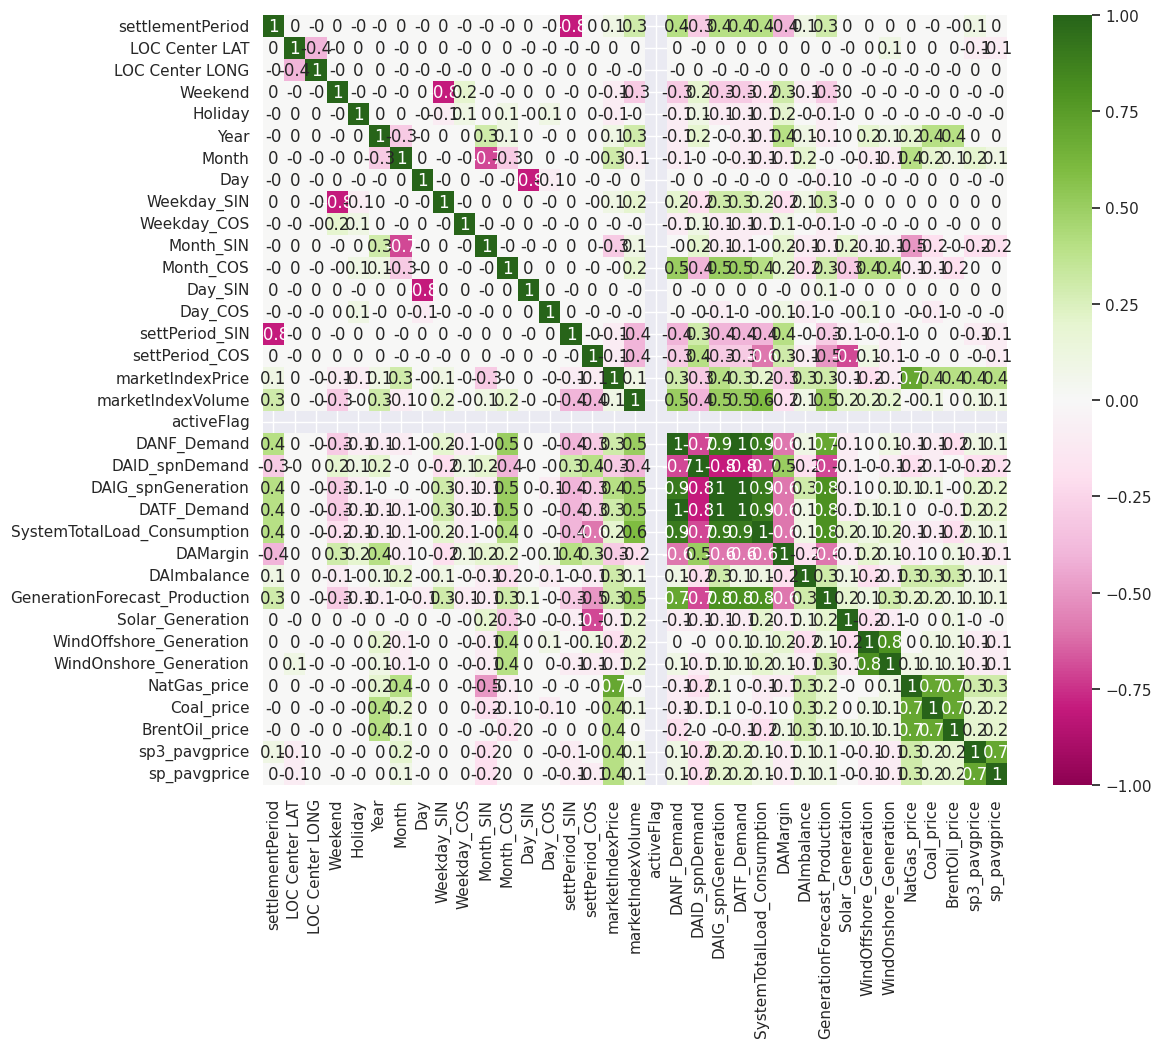

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list1].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

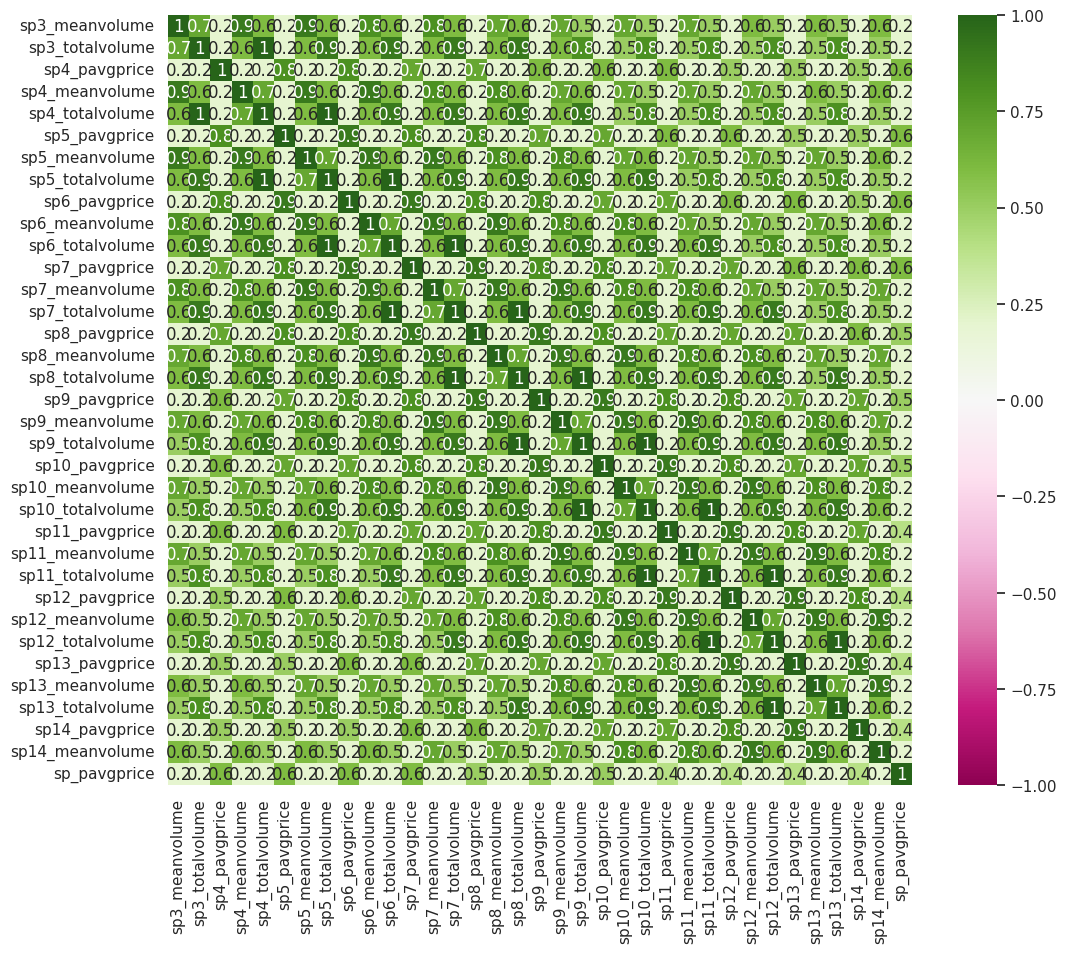

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list2].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

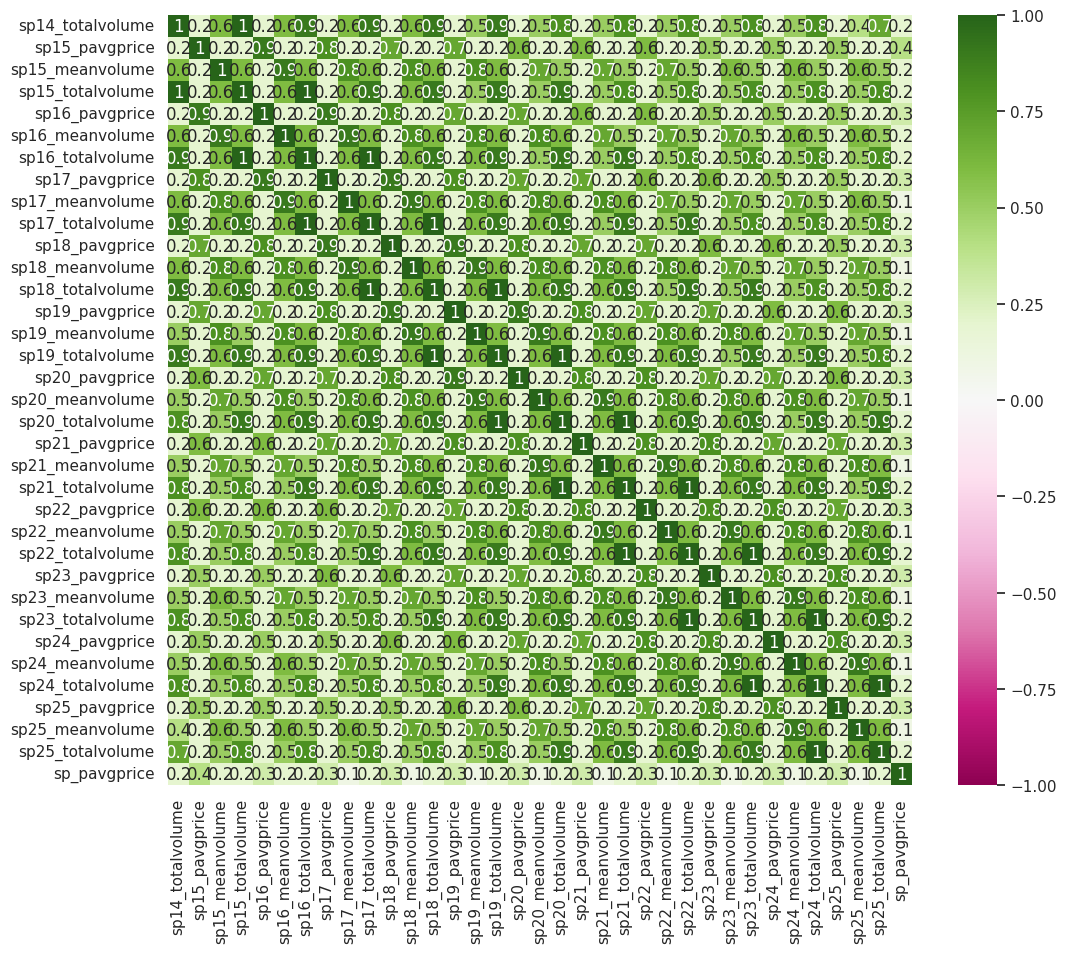

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list3].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

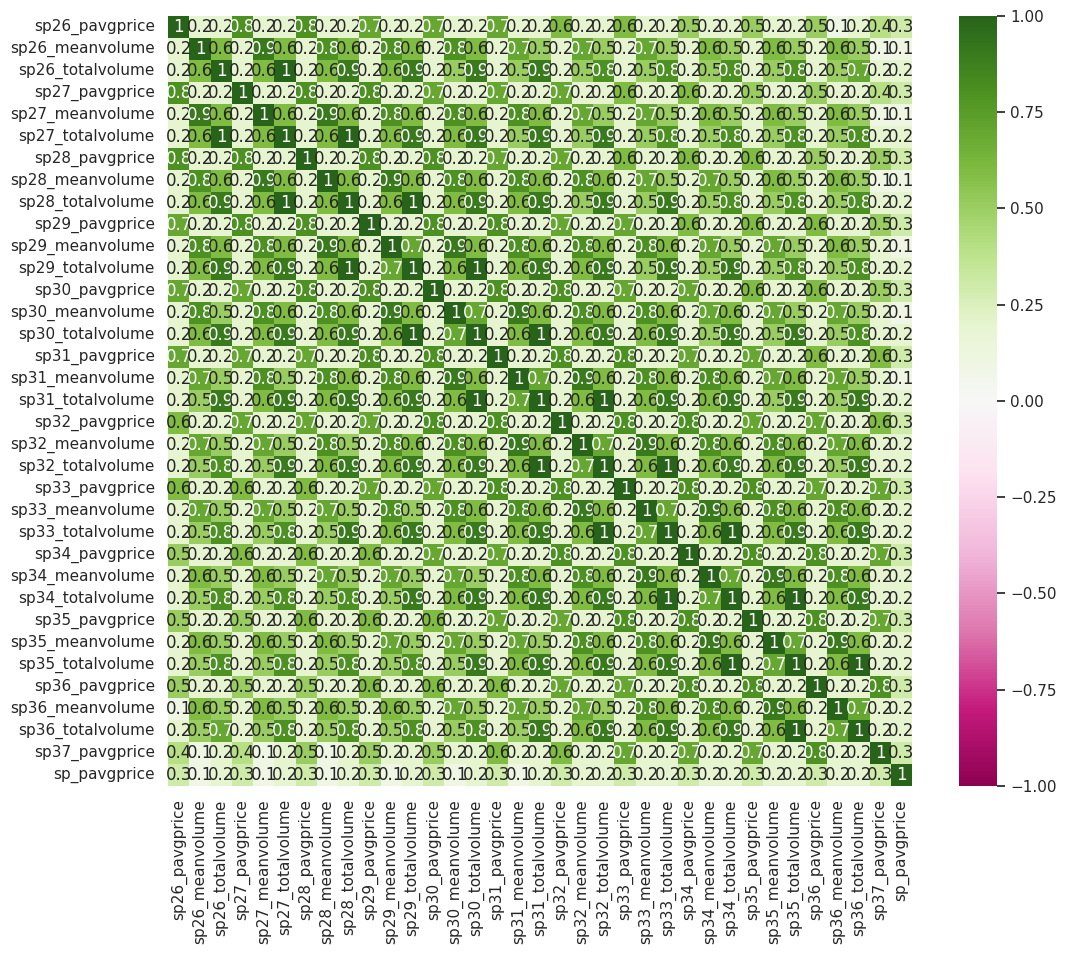

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list4].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

<Axes: >

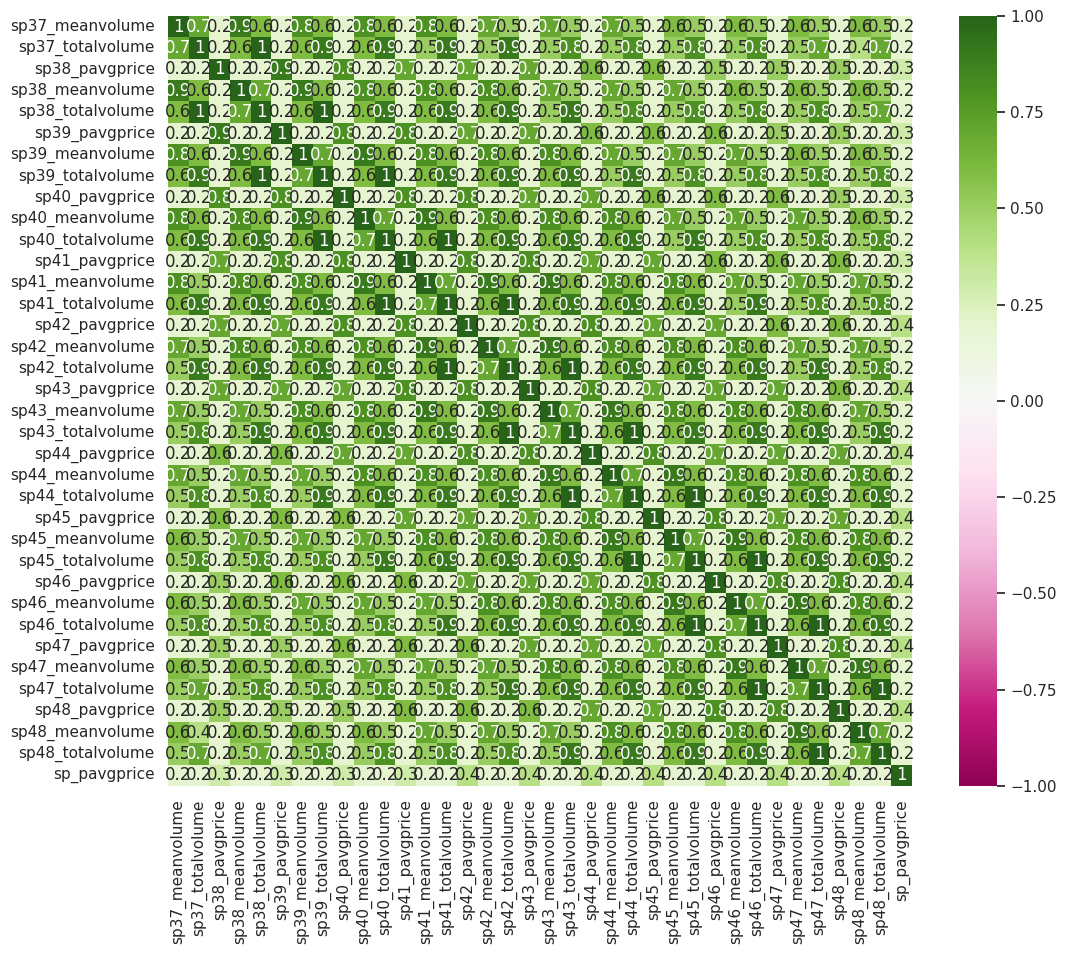

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model2.loc[:,list5].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)
cat_vars.append('sp_pavgprice')

In [ ]:
drop_cols = [x for x in list(df_model2.columns) if x.startswith('sp')==True]
drop_cols[:5]

['sp_pavgprice',
 'sp3_pavgprice',
 'sp3_meanvolume',
 'sp3_totalvolume',
 'sp4_pavgprice']

In [ ]:
drop_cols.extend(cat_vars)
drop_cols[-5:]

['sp48_totalvolume',
 'recordtype',
 'settlementDate',
 'BMU GSP Group Name',
 'sp_pavgprice']

In [ ]:
import statsmodels.stats.outliers_influence as sso

def vif_analysis(data_df, drop_cols):

    i = 0
    print(f'STEP {i}')

    Z = data_df.drop(drop_cols, axis=1)
    Z['Intercept'] = 1

    vif = pd.DataFrame()
    vif['variables'] = Z.columns
    vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])
    vars_del = []

    print('-'*30)
    print(vif)
    print('\n')


    while len(vif_risk) > 0:

        i += 1
        print(f'STEP {i}')

        vars_del.append(vif_risk[0])
        Z = Z.drop(vif_risk[0], axis=1)

        vif = pd.DataFrame()
        vif['variables'] = Z.columns
        vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
        vif = vif.sort_values(by='VIF', ascending=False)

        vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])

        print('-'*30)
        print(vif)
        print('\n')

    return vif, vars_del

In [ ]:
vif, vars_del = vif_analysis(data_df=df_model2, drop_cols=drop_cols)

STEP 0
------------------------------
                        variables           VIF
32                      Intercept  1.969176e+07
20             DAIG_spnGeneration  2.879134e+05
21                    DATF_Demand  2.661021e+05
24                    DAImbalance  9.958695e+03
18                    DANF_Demand  9.337790e+01
22    SystemTotalLoad_Consumption  6.849076e+01
26               Solar_Generation  8.842538e+00
23                       DAMargin  7.696905e+00
13                      Month_COS  7.157772e+00
25  GenerationForecast_Production  7.008456e+00
17                 settPeriod_COS  6.511501e+00
29                   NatGas_price  5.934740e+00
16                 settPeriod_SIN  3.719714e+00
28         WindOnshore_Generation  3.675084e+00
30                     Coal_price  3.584292e+00
19                 DAID_spnDemand  3.540577e+00
12                      Month_SIN  3.497758e+00
8                           Month  3.403777e+00
31                 BrentOil_price  3.360474e+00
27

In [ ]:
vars_del

['DAIG_spnGeneration',
 'DANF_Demand',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'GenerationForecast_Production',
 'NatGas_price']

In [ ]:
vif

variables           VIF
26                Intercept  1.673675e+07
17           settPeriod_COS  4.172172e+00
21         Solar_Generation  3.534923e+00
19                 DAMargin  3.516218e+00
16           settPeriod_SIN  3.130817e+00
13                Month_COS  3.121895e+00
8                     Month  3.116705e+00
22  WindOffshore_Generation  3.099178e+00
5                   Weekend  3.087207e+00
25           BrentOil_price  3.046606e+00
12                Month_SIN  3.024170e+00
24               Coal_price  2.980419e+00
18           DAID_spnDemand  2.953706e+00
10              Weekday_SIN  2.807474e+00
23   WindOnshore_Generation  2.796079e+00
0          settlementPeriod  2.687306e+00
9                       Day  2.674258e+00
14                  Day_SIN  2.641289e+00
7                      Year  2.350718e+00
2         marketIndexVolume  2.119031e+00
1          marketIndexPrice  1.943578e+00
20              DAImbalance  1.358520e+00
3            LOC Center LAT  1.213515e+00
4           LOC Center LONG  1.210742e+00
6                   Holiday  1.131548e+00
11              Weekday_COS  1.124344e+00
15                  Day_COS  1.085798e+00

In [ ]:
Z = df_model2.drop(drop_cols, axis=1).copy()

In [ ]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471666 entries, 0 to 471665
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   settlementPeriod               471666 non-null  int64  
 1   marketIndexPrice               468991 non-null  float64
 2   marketIndexVolume              468991 non-null  float64
 3   LOC Center LAT                 471666 non-null  float64
 4   LOC Center LONG                471666 non-null  float64
 5   Weekend                        471666 non-null  float64
 6   Holiday                        471666 non-null  float64
 7   Year                           471666 non-null  float64
 8   Month                          471666 non-null  float64
 9   Day                            471666 non-null  float64
 10  Weekday_SIN                    471666 non-null  float64
 11  Weekday_COS                    471666 non-null  float64
 12  Month_SIN                     

In [ ]:
sns.pairplot(Z, height=2)
plt.show()

## SP_AVGPRICE+

#### Loading dataset

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE (Price & Volume).csv'

In [ ]:
#df_outGSP.to_csv(file_path, index=False)

In [ ]:
df_outGSP = pd.read_csv(file_path)
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206997      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48  South Eastern England   
1206999      OFFER     2023-06-30                48         Southern Wales   
1207000      OFFER     2023-06-30                48         Southern Wales   
1207001      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600   18.0    -57.486447     -31.571222   
1               -17.13          -3.000   18.0    -57.486447     -31.571222   
2               -67.13          -7.500   18.0    -57.486447     -31.571222   
3               -71.42         -53.500   18.0    -57.486447     -31.571222   
4               -70.00         -34.500   18.0    -57.486447     -31.571222   
...                ...             ...    ...           ...            ...   
1206997         131.00         110.000    2.0    123.457143     175.000000   
1206998         120.00         240.000    2.0    123.457143     175.000000   
1206999         165.00         109.500    2.0    162.500000     109.500000   
1207000         160.00         109.500    2.0    162.500000     109.500000   
1207001         125.00         150.167    1.0    125.000000     150.167000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1206997         350.000  
1206998         350.000  
1206999         219.000  
1207000         219.000  
1207001         150.167  

[1207002 rows x 10 columns]

In [ ]:
zero_indxs = list(df_outGSP[(df_outGSP['acceptedprice']!=0)&(df_outGSP['sp_pavgprice']==0)].index.values)

In [ ]:
df_outGSP[(df_outGSP['sp_nr']==0)]

Empty DataFrame
Columns: [recordtype, settlementDate, settlementPeriod, BMU GSP Group Name, acceptedprice, acceptedvolume, sp_nr, sp_pavgprice, sp_meanvolume, sp_totalvolume]
Index: []

In [ ]:
df_outGSP[(df_outGSP['acceptedprice']!=0)&(df_outGSP['sp_pavgprice']==0)&(df_outGSP['sp_nr']==2)]

recordtype settlementDate  settlementPeriod  \
726            BID     2020-12-20                37   
6544           BID     2020-12-29                48   
6945           BID     2020-12-30                39   
8250           BID     2021-01-02                26   
12821          BID     2021-01-11                19   
...            ...            ...               ...   
936204       OFFER     2022-10-06                35   
936844       OFFER     2022-10-07                33   
965949       OFFER     2022-12-16                16   
982447         BID     2023-01-11                30   
1068469        BID     2023-04-11                43   

                    BMU GSP Group Name  acceptedprice  acceptedvolume  sp_nr  \
726      Merseyside and Northern Wales          25.00             0.0    2.0   
6544             South Eastern England          28.50             0.0    2.0   
6945                         Yorkshire          40.11             0.0    2.0   
8250                         Yorkshire          84.99             0.0    2.0   
12821                        Yorkshire           0.50             0.0    2.0   
...                                ...            ...             ...    ...   
936204               Southern Scotland         -10.00             0.0    2.0   
936844               Northern Scotland          30.00             0.0    2.0   
965949                       Yorkshire         400.00             0.0    2.0   
982447                       Yorkshire          18.00             0.0    2.0   
1068469  Merseyside and Northern Wales         103.10             0.0    2.0   

         sp_pavgprice  sp_meanvolume  sp_totalvolume  
726               0.0       -11.2500         -22.500  
6544              0.0        -0.0055          -0.011  
6945              0.0       -14.7500         -29.500  
8250              0.0       -29.4910         -58.982  
12821             0.0       -35.0000         -70.000  
...               ...            ...             ...  
936204            0.0         1.6670           3.334  
936844            0.0         8.3470          16.694  
965949            0.0         0.3000           0.600  
982447            0.0        -6.4130         -12.826  
1068469           0.0        -0.6250          -1.250  

[67 rows x 10 columns]

In [ ]:
df_outGSP[(df_outGSP['settlementDate']=='2020-12-20')&(df_outGSP['settlementPeriod']==37)]

recordtype settlementDate  settlementPeriod  \
724           BID     2020-12-20                37   
725           BID     2020-12-20                37   
726           BID     2020-12-20                37   
727           BID     2020-12-20                37   
728           BID     2020-12-20                37   
729           BID     2020-12-20                37   
730           BID     2020-12-20                37   
731           BID     2020-12-20                37   
732           BID     2020-12-20                37   
733           BID     2020-12-20                37   
734           BID     2020-12-20                37   
735           BID     2020-12-20                37   
736           BID     2020-12-20                37   
737           BID     2020-12-20                37   
738           BID     2020-12-20                37   
739           BID     2020-12-20                37   
740           BID     2020-12-20                37   
741           BID     2020-12-20                37   
742           BID     2020-12-20                37   
743           BID     2020-12-20                37   
744           BID     2020-12-20                37   
745           BID     2020-12-20                37   
746           BID     2020-12-20                37   
130280      OFFER     2020-12-20                37   
130281      OFFER     2020-12-20                37   
130282      OFFER     2020-12-20                37   
130283      OFFER     2020-12-20                37   
130284      OFFER     2020-12-20                37   
130285      OFFER     2020-12-20                37   
130286      OFFER     2020-12-20                37   
130287      OFFER     2020-12-20                37   
130288      OFFER     2020-12-20                37   
130289      OFFER     2020-12-20                37   

                   BMU GSP Group Name  acceptedprice  acceptedvolume  sp_nr  \
724                     East Midlands          25.10          -6.000    1.0   
725     Merseyside and Northern Wales           0.00         -22.500    2.0   
726     Merseyside and Northern Wales          25.00           0.000    2.0   
727                 Northern Scotland         -17.13          -3.000   14.0   
728                 Northern Scotland         -67.13          -5.317   14.0   
729                 Northern Scotland         -67.13          -2.133   14.0   
730                 Northern Scotland         -67.13          -3.300   14.0   
731                 Northern Scotland         -67.13          -3.375   14.0   
732                 Northern Scotland         -55.72         -37.500   14.0   
733                 Northern Scotland         -55.72         -31.750   14.0   
734                 Northern Scotland         -17.13          -2.000   14.0   
735                 Northern Scotland         -17.13          -2.000   14.0   
736                 Northern Scotland         -17.13          -2.000   14.0   
737                 Northern Scotland           0.55         -75.000   14.0   
738                 Northern Scotland           0.50         -75.000   14.0   
739                 Northern Scotland         -67.13         -20.000   14.0   
740                 Northern Scotland         -60.03         -20.517   14.0   
741                  Southern England          23.80          -8.333    1.0   
742                         Yorkshire          40.11          -0.026    5.0   
743                         Yorkshire           5.95         -30.900    5.0   
744                         Yorkshire           5.90         -31.084    5.0   
745                         Yorkshire           6.00         -45.000    5.0   
746                         Yorkshire          25.05          -0.154    5.0   
130280                Eastern England          74.98          10.533    2.0   
130281                Eastern England         145.00          32.000    2.0   
130282  Merseyside and Northern Wales          71.50         150.001    1.0   
130283          North Eastern England

In [ ]:
sel_cols = ['acceptedprice', 'acceptedvolume',	'sp_nr',	'sp_pavgprice',	'sp_meanvolume',	'sp_totalvolume']

In [ ]:
df_bid = df_outGSP[(df_outGSP['recordtype']=='BID')][sel_cols]

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_bid.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.pairplot(df_bid, height=1.5)
plt.show()

In [ ]:
df_offer = df_outGSP[(df_outGSP['recordtype']=='OFFER')][sel_cols]

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_offer.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.pairplot(df_offer, height=1.5)
plt.show()

In [ ]:
for x in zero_indxs:
  df_outGSP.loc[x,'sp_pavgprice'] = df_outGSP.loc[x,'acceptedprice']

In [ ]:
df_outGSP[(df_outGSP['acceptedprice']!=0)&(df_outGSP['sp_pavgprice']==0)]

Empty DataFrame
Columns: [recordtype, settlementDate, settlementPeriod, BMU GSP Group Name, acceptedprice, acceptedvolume, sp_nr, sp_pavgprice, sp_meanvolume, sp_totalvolume]
Index: []

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE (Price & Volume).csv'

In [ ]:
#df_outGSP.to_csv(file_path, index=False)

In [ ]:
df_outGSP = pd.read_csv(file_path)
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206997      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48  South Eastern England   
1206999      OFFER     2023-06-30                48         Southern Wales   
1207000      OFFER     2023-06-30                48         Southern Wales   
1207001      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600   18.0    -57.486447     -31.571222   
1               -17.13          -3.000   18.0    -57.486447     -31.571222   
2               -67.13          -7.500   18.0    -57.486447     -31.571222   
3               -71.42         -53.500   18.0    -57.486447     -31.571222   
4               -70.00         -34.500   18.0    -57.486447     -31.571222   
...                ...             ...    ...           ...            ...   
1206997         131.00         110.000    2.0    123.457143     175.000000   
1206998         120.00         240.000    2.0    123.457143     175.000000   
1206999         165.00         109.500    2.0    162.500000     109.500000   
1207000         160.00         109.500    2.0    162.500000     109.500000   
1207001         125.00         150.167    1.0    125.000000     150.167000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1206997         350.000  
1206998         350.000  
1206999         219.000  
1207000         219.000  
1207001         150.167  

[1207002 rows x 10 columns]

#### SP & GSP data (price and volume)

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Data PREV. SP+GSP LAG COMPLETE (Price & Volume).csv'

In [ ]:
df_outGSP = pd.read_csv(file_path)
df_outGSP

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1      Northern Scotland   
1              BID     2020-12-20                 1      Northern Scotland   
2              BID     2020-12-20                 1      Northern Scotland   
3              BID     2020-12-20                 1      Northern Scotland   
4              BID     2020-12-20                 1      Northern Scotland   
...            ...            ...               ...                    ...   
1206997      OFFER     2023-06-30                48  South Eastern England   
1206998      OFFER     2023-06-30                48  South Eastern England   
1206999      OFFER     2023-06-30                48         Southern Wales   
1207000      OFFER     2023-06-30                48         Southern Wales   
1207001      OFFER     2023-06-30                48              Yorkshire   

         acceptedprice  acceptedvolume  sp_nr  sp_pavgprice  sp_meanvolume  \
0               -71.36          -6.600   18.0    -57.486447     -31.571222   
1               -17.13          -3.000   18.0    -57.486447     -31.571222   
2               -67.13          -7.500   18.0    -57.486447     -31.571222   
3               -71.42         -53.500   18.0    -57.486447     -31.571222   
4               -70.00         -34.500   18.0    -57.486447     -31.571222   
...                ...             ...    ...           ...            ...   
1206997         131.00         110.000    2.0    123.457143     175.000000   
1206998         120.00         240.000    2.0    123.457143     175.000000   
1206999         165.00         109.500    2.0    162.500000     109.500000   
1207000         160.00         109.500    2.0    162.500000     109.500000   
1207001         125.00         150.167    1.0    125.000000     150.167000   

         sp_totalvolume  
0              -568.282  
1              -568.282  
2              -568.282  
3              -568.282  
4              -568.282  
...                 ...  
1206997         350.000  
1206998         350.000  
1206999         219.000  
1207000         219.000  
1207001         150.167  

[1207002 rows x 10 columns]

In [ ]:
# "DATE" COLUMN
df_outGSP['settlementDate'] = pd.to_datetime(df_outGSP['settlementDate'])

In [ ]:
data_df = pd.pivot_table(df_outGSP, index=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'],
                         aggfunc={'sp_nr':np.mean,'sp_pavgprice':np.mean,'sp_meanvolume':np.mean,'sp_totalvolume':np.mean}).reset_index()

data_df.insert(loc=4, column='sp_nr', value=data_df.pop('sp_nr'))
data_df.insert(loc=5, column='sp_pavgprice', value=data_df.pop('sp_pavgprice'))

In [ ]:
# "DATE" COLUMN
data_df['settlementDate'] = pd.to_datetime(data_df['settlementDate'])

In [ ]:
data_df

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1      Northern Scotland   
1             BID     2020-12-20                 1      Southern Scotland   
2             BID     2020-12-20                 1              Yorkshire   
3             BID     2020-12-20                 2      Northern Scotland   
4             BID     2020-12-20                 2      Southern Scotland   
...           ...            ...               ...                    ...   
477916      OFFER     2023-06-30                48                 London   
477917      OFFER     2023-06-30                48  North Western England   
477918      OFFER     2023-06-30                48  South Eastern England   
477919      OFFER     2023-06-30                48         Southern Wales   
477920      OFFER     2023-06-30                48              Yorkshire   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  
0        18.0    -57.486447     -31.571222        -568.282  
1         3.0    -67.311191     -53.308333        -159.925  
2         2.0    -50.842071     -56.544000        -113.088  
3        19.0    -58.781264     -32.938158        -625.825  
4         3.0    -67.285684     -47.761000        -143.283  
...       ...           ...            ...             ...  
477916    1.0    114.000000     120.000000         120.000  
477917    1.0    138.400000      88.000000          88.000  
477918    2.0    123.457143     175.000000         350.000  
477919    2.0    162.500000     109.500000         219.000  
477920    1.0    125.000000     150.167000         150.167  

[477921 rows x 8 columns]

In [ ]:
data_df['BMU GSP Group Name'].value_counts()

Yorkshire                        66374
Merseyside and Northern Wales    51381
East Midlands                    51062
South Eastern England            51003
Southern England                 43055
Northern Scotland                42103
South Western England            36859
North Western England            34579
Southern Wales                   30016
Eastern England                  29114
Southern Scotland                14526
London                           12848
West Midlands                    10446
North Eastern England             4555
Name: BMU GSP Group Name, dtype: int64

In [ ]:
data_df[(data_df['settlementDate']=='2021-10-20')&(data_df['BMU GSP Group Name']=='Yorkshire')].head(39)

recordtype settlementDate  settlementPeriod BMU GSP Group Name  sp_nr  \
76721         BID     2021-10-20                 2          Yorkshire    3.0   
76723         BID     2021-10-20                 3          Yorkshire    1.0   
76725         BID     2021-10-20                 4          Yorkshire    1.0   
76728         BID     2021-10-20                 5          Yorkshire    1.0   
76750         BID     2021-10-20                14          Yorkshire    2.0   
76758         BID     2021-10-20                15          Yorkshire    2.0   
76765         BID     2021-10-20                16          Yorkshire    1.0   
76767         BID     2021-10-20                17          Yorkshire    1.0   
76780         BID     2021-10-20                21          Yorkshire    4.0   
76790         BID     2021-10-20                22          Yorkshire    4.0   
76800         BID     2021-10-20                23          Yorkshire    5.0   
76810         BID     2021-10-20                24          Yorkshire    4.0   
76816         BID     2021-10-20                25          Yorkshire    2.0   
76823         BID     2021-10-20                26          Yorkshire    5.0   
76828         BID     2021-10-20                27          Yorkshire    3.0   
76841         BID     2021-10-20                30          Yorkshire    1.0   
76846         BID     2021-10-20                31          Yorkshire    1.0   
76853         BID     2021-10-20                32          Yorkshire    4.0   
76856         BID     2021-10-20                33          Yorkshire    3.0   
76917         BID     2021-10-20                44          Yorkshire    3.0   
76926         BID     2021-10-20                45          Yorkshire    3.0   
76935         BID     2021-10-20                46          Yorkshire    2.0   
76945         BID     2021-10-20                47          Yorkshire    7.0   
76955         BID     2021-10-20                48          Yorkshire    6.0   
331826      OFFER     2021-10-20                 1          Yorkshire    3.0   
331833      OFFER     2021-10-20                 2          Yorkshire    3.0   
331840      OFFER     2021-10-20                 3          Yorkshire    4.0   
331847      OFFER     2021-10-20                 4          Yorkshire    4.0   
331854      OFFER     2021-10-20                 5          Yorkshire    4.0   
331861      OFFER     2021-10-20                 6          Yorkshire    4.0   
331869      OFFER     2021-10-20                 7          Yorkshire    5.0   
331877      OFFER     2021-10-20                 8          Yorkshire    4.0   
331885      OFFER     2021-10-20                 9          Yorkshire    4.0   
331892      OFFER     2021-10-20                10          Yorkshire    5.0   
331900      OFFER     2021-10-20                11          Yorkshire    2.0   
331910      OFFER     2021-10-20                12          Yorkshire    3.0   
331920      OFFER     2021-10-20                13          Yorkshire    3.0   
331930      OFFER     2021-10-20                14          Yorkshire    2.0   
331989      OFFER     2021-10-20                27          Yorkshire    3.0   

        sp_pavgprice  sp_meanvolume  sp_totalvolume  
76721     -55.565468     -27.677333         -83.032  
76723     -60.000000      -2.718000          -2.718  
76725      44.000000       0.000000           0.000  
76728      44.000000      -0.001000          -0.001  
76750      75.496296      -0.810000          -1.620  
76758      71.665006     -64.469000        -128.938  
76765     105.200000     -59.674000         -59.674  
76767     105.200000      -0.258000          -0.258  
76780     113.064188      -3.904000         -15.616  
76790     111.000887     -16.780000         -67.120  
76800     110.557395     -39.003200        -195.016  
76810     110.947901     -51.063250        -204.253  
76816     111.000000     -76.554000        -153.108  
76823     108.544127     -46.647200        -233.23

In [ ]:
data_df[(data_df['settlementDate']=='2021-10-20	')&(data_df['settlementPeriod']==40)].head(39)

recordtype settlementDate  settlementPeriod  \
76891         BID     2021-10-20                40   
76892         BID     2021-10-20                40   
76893         BID     2021-10-20                40   
76894         BID     2021-10-20                40   
76895         BID     2021-10-20                40   
76896         BID     2021-10-20                40   
332092      OFFER     2021-10-20                40   
332093      OFFER     2021-10-20                40   
332094      OFFER     2021-10-20                40   
332095      OFFER     2021-10-20                40   
332096      OFFER     2021-10-20                40   
332097      OFFER     2021-10-20                40   
332098      OFFER     2021-10-20                40   
332099      OFFER     2021-10-20                40   
332100      OFFER     2021-10-20                40   
332101      OFFER     2021-10-20                40   
332102      OFFER     2021-10-20                40   
332103      OFFER     2021-10-20                40   

                   BMU GSP Group Name  sp_nr  sp_pavgprice  sp_meanvolume  \
76891                   East Midlands    1.0    285.000000      -0.304000   
76892                 Eastern England    1.0     90.000000      -0.003000   
76893               Northern Scotland   30.0    -28.889573     -51.201733   
76894           South Eastern England    2.0    112.050000     -51.334000   
76895           South Western England    1.0    111.500000    -113.000000   
76896                   West Midlands    1.0    265.000000      -0.472000   
332092                  East Midlands    3.0    320.000000      13.768000   
332093                Eastern England    3.0    270.291208     209.712667   
332094  Merseyside and Northern Wales    4.0    284.725788     107.125000   
332095          North Western England    7.0    309.236266      17.214286   
332096              Northern Scotland    5.0    276.696985      60.733600   
332097          South Eastern England    2.0    313.950000       7.000000   
332098          South Western England    5.0    271.464448     123.200000   
332099               Southern England    2.0    315.000000      13.500000   
332100              Southern Scotland    1.0    287.000000      11.434000   
332101                 Southern Wales    4.0    290.783099      17.750000   
332102                  West Midlands    2.0    304.652875      25.736000   
332103                      Yorkshire    3.0    403.664882     106.688667   

        sp_totalvolume  
76891           -0.304  
76892           -0.003  
76893        -1536.052  
76894         -102.668  
76895         -113.000  
76896           -0.472  
332092          41.304  
332093         629.138  
332094         428.500  
332095         120.500  
332096         303.668  
332097          14.000  
332098         616.000  
332099          27.000  
332100          11.434  
332101          71.000  
332102          51.472  
332103         320.066

#### SP & GSP data (price and volume) -> All SP in all GSP

In [ ]:
start_date = dt.date(2020, 12, 20)
end_date = dt.date(2023, 6, 30)   # perhaps date.now()

delta = end_date - start_date   # returns timedelta

In [ ]:
sdates_list = [start_date + dt.timedelta(days=x) for x in range(delta.days + 1)]
print(sdates_list[0])
print(sdates_list[-1])

2020-12-20
2023-06-30


In [ ]:

df_structEXT = pd.DataFrame()
i = 0

for x in sdates_list:
  for y in range(1,49):

    df_structEXT.loc[i,'settlementDate'] = x
    df_structEXT.loc[i,'settlementPeriod'] = y

    i += 1

df_structEXT['settlementDate'] = pd.to_datetime(df_structEXT['settlementDate'])

In [ ]:
gsp_list = ['Yorkshire', 'Merseyside and Northern Wales', 'East Midlands', 'South Eastern England',
            'Southern England', 'Northern Scotland', 'South Western England', 'North Western England',
            'Southern Wales', 'Eastern England', 'Southern Scotland', 'London', 'West Midlands', 'North Eastern England']

In [ ]:
df_structRG = pd.DataFrame()
df_dict = {}

for x in ['BID','OFFER']:

  df_structR = df_structEXT.copy()
  df_structR['recordtype'] = x
  df_structR.insert(loc=0, column='recordtype', value=df_structR.pop('recordtype'))

  for y in gsp_list:

    df = df_structR.copy()
    df['BMU GSP Group Name'] = y

    df = pd.merge(df, data_df, how='left',
                  on=['recordtype','settlementDate','settlementPeriod', 'BMU GSP Group Name'], suffixes=('', ''))

    df['sp_meanvolume'] = df['sp_meanvolume'].fillna(0)
    df['sp_totalvolume'] = df['sp_totalvolume'].fillna(0)

    dict_name = x + '_' + y
    df_dict[dict_name] = df.copy()

In [ ]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name]

recordtype settlementDate  settlementPeriod BMU GSP Group Name  sp_nr  \
0            BID     2020-12-20               1.0          Yorkshire    2.0   
1            BID     2020-12-20               2.0          Yorkshire    2.0   
2            BID     2020-12-20               3.0          Yorkshire    1.0   
3            BID     2020-12-20               4.0          Yorkshire    NaN   
4            BID     2020-12-20               5.0          Yorkshire    NaN   
...          ...            ...               ...                ...    ...   
44299        BID     2023-06-30              44.0          Yorkshire    1.0   
44300        BID     2023-06-30              45.0          Yorkshire    2.0   
44301        BID     2023-06-30              46.0          Yorkshire    5.0   
44302        BID     2023-06-30              47.0          Yorkshire    6.0   
44303        BID     2023-06-30              48.0          Yorkshire    4.0   

       sp_pavgprice  sp_meanvolume  sp_totalvolume  
0        -50.842071      -56.54400        -113.088  
1        -38.043485       -3.10800          -6.216  
2          0.000000        0.00000           0.000  
3               NaN        0.00000           0.000  
4               NaN        0.00000           0.000  
...             ...            ...             ...  
44299     62.010000     -210.78100        -210.781  
44300     61.992682      -72.73950        -145.479  
44301      4.103535      -46.05840        -230.292  
44302     -3.207901      -58.98800        -353.928  
44303    -47.158350      -53.48125        -213.925  

[44304 rows x 8 columns]

#### SP & GSP data (price and volume) -> BIDS/OFFERS Datasets

In [ ]:
gsp_list = ['Yorkshire', 'Merseyside and Northern Wales', 'East Midlands', 'South Eastern England',
            'Southern England', 'Northern Scotland', 'South Western England', 'North Western England',
            'Southern Wales', 'Eastern England', 'Southern Scotland', 'London', 'West Midlands', 'North Eastern England']

In [ ]:
x = 'BID'

df_bid = pd.DataFrame()
i = 0

for y in gsp_list:

  dict_name = x + '_' + y
  df_aux = df_dict[dict_name].copy()

  if i==0:
    df_bid = df_aux.copy()
  else:
    df_bid = pd.concat([df_bid, df_aux])

  i += 1

In [ ]:
x = 'OFFER'

df_offer = pd.DataFrame()
i = 0

for y in gsp_list:

  dict_name = x + '_' + y
  df_aux = df_dict[dict_name].copy()

  if i==0:
    df_offer = df_aux.copy()
  else:
    df_offer = pd.concat([df_offer, df_aux])

  i += 1

In [ ]:
df_bid.shape

(620256, 8)

In [ ]:
df_bid.isnull().sum()/620256

recordtype            0.000000
settlementDate        0.000000
settlementPeriod      0.000000
BMU GSP Group Name    0.000000
sp_nr                 0.610327
sp_pavgprice          0.610327
sp_meanvolume         0.000000
sp_totalvolume        0.000000
dtype: float64

In [ ]:
df_bid.isnull().sum()/df_bid.shape[0]

recordtype            0.000000
settlementDate        0.000000
settlementPeriod      0.000000
BMU GSP Group Name    0.000000
sp_nr                 0.610327
sp_pavgprice          0.610327
sp_meanvolume         0.000000
sp_totalvolume        0.000000
dtype: float64

In [ ]:
df_offer.shape

(620256, 8)

In [ ]:
df_offer.isnull().sum()

recordtype                 0
settlementDate             0
settlementPeriod           0
BMU GSP Group Name         0
sp_nr                 384032
sp_pavgprice          384032
sp_meanvolume              0
sp_totalvolume             0
dtype: int64

In [ ]:
df_offer.isnull().sum()/df_offer.shape[0]

recordtype            0.000000
settlementDate        0.000000
settlementPeriod      0.000000
BMU GSP Group Name    0.000000
sp_nr                 0.619151
sp_pavgprice          0.619151
sp_meanvolume         0.000000
sp_totalvolume        0.000000
dtype: float64

#### SP & GSP data (price and volume) -> Additional data

In [ ]:
'''
'LOC Center LAT'
'LOC Center LONG'
'''

"\n'LOC Center LAT'\n'LOC Center LONG'\n"

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/BM Units (historical info)/bmusid_21_23 (COMPLETE).xlsx'

In [ ]:
df_add1 = pd.read_excel(file_path)

In [ ]:
df_add1 = df_add1[['BMU GSP Group Name', 'LOC Center LAT', 'LOC Center LONG']].drop_duplicates()

In [ ]:
sel_cols = ['BMU GSP Group Name',	'LOC Center LAT',	'LOC Center LONG']

In [ ]:
df_bid = pd.merge(df_bid, df_add1[sel_cols], how='left',
                  on=['BMU GSP Group Name'], suffixes=('',''))

In [ ]:
df_bid.shape

(620256, 10)

In [ ]:
df_offer = pd.merge(df_offer, df_add1[sel_cols], how='left',
                    on=['BMU GSP Group Name'], suffixes=('',''))

In [ ]:
df_offer.shape

(620256, 10)

In [ ]:
'''
'Weekend','Holiday'
'Year','Month''Day',
'Weekday_SIN','Weekday_COS'
'Month_SIN','Month_COS'
'Day_SIN','Day_COS'
'settPeriod_SIN','settPeriod_COS'
'DANF_Demand'
'DAID_spnDemand'
'DAIG_spnGeneration'
'DATF_Demand'
'SystemTotalLoad_Consumption'
'DAMargin'
'DAImbalance'
'GenerationForecast_Production'
'Solar_Generation'
'WindOffshore_Generation'
'WindOnshore_Generation'
'NatGas_price','Coal_price','BrentOil_price'
'''

"\n'Weekend','Holiday'\n'Year','Month''Day',\n'Weekday_SIN','Weekday_COS'\n'Month_SIN','Month_COS'\n'Day_SIN','Day_COS'\n'settPeriod_SIN','settPeriod_COS'\n'DANF_Demand'\n'DAID_spnDemand'\n'DAIG_spnGeneration'\n'DATF_Demand'\n'SystemTotalLoad_Consumption'\n'DAMargin'\n'DAImbalance'\n'GenerationForecast_Production'\n'Solar_Generation'\n'WindOffshore_Generation'\n'WindOnshore_Generation'\n'NatGas_price','Coal_price','BrentOil_price'\n"

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/Research Data.csv'

In [ ]:
df_add2 = pd.read_csv(file_path)

In [ ]:
# "DATE" COLUMN
df_add2['settlementDate'] = pd.to_datetime(df_add2['settlementDate'])

In [ ]:
df_add2

settlementDate  settlementPeriod Weekday  Year  Month  Day  Weekend  \
0         2020-12-20                 1  Sunday  2020     12   20      1.0   
1         2020-12-20                 2  Sunday  2020     12   20      1.0   
2         2020-12-20                 3  Sunday  2020     12   20      1.0   
3         2020-12-20                 4  Sunday  2020     12   20      1.0   
4         2020-12-20                 5  Sunday  2020     12   20      1.0   
...              ...               ...     ...   ...    ...  ...      ...   
44299     2023-06-30                44  Friday  2023      6   30      0.0   
44300     2023-06-30                45  Friday  2023      6   30      0.0   
44301     2023-06-30                46  Friday  2023      6   30      0.0   
44302     2023-06-30                47  Friday  2023      6   30      0.0   
44303     2023-06-30                48  Friday  2023      6   30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  SystemTotalLoad_Consumption  \
0          0.0    -0.781831     0.623490  ...                      25732.0   
1          0.0    -0.781831     0.623490  ...                      25545.0   
2          0.0    -0.781831     0.623490  ...                      24831.0   
3          0.0    -0.781831     0.623490  ...                      24006.0   
4          0.0    -0.781831     0.623490  ...                      23500.0   
...        ...          ...          ...  ...                          ...   
44299      0.0    -0.433884    -0.900969  ...                      26127.0   
44300      0.0    -0.433884    -0.900969  ...                      25102.0   
44301      0.0    -0.433884    -0.900969  ...                      23707.0   
44302      0.0    -0.433884    -0.900969  ...                      22499.0   
44303      0.0    -0.433884    -0.900969  ...                      21496.0   

       DAMargin  DAImbalance  GenerationForecast_Production  Solar_Generation  \
0       27928.0       -101.0                       25650.22               0.0   
1       27965.0        -16.0                       25229.70               0.0   
2       28570.0        334.0                       24697.00               0.0   
3       28927.0        464.0                       24499.00               0.0   
4       29006.0        468.0                       24337.00               0.0   
...         ...          ...                            ...               ...   
44299   21172.0       1284.0                       27783.00               0.0   
44300   21041.0        662.0                       27868.00               0.0   
44301   22087.0        485.0                       27445.00               0.0   
44302   22968.0       -594.0                       24550.00               0.0   
44303   23784.0      -1162.0                       22529.00               0.0   

       WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                     9020.590                7365.717        15.885   
1                     9020.590                7365.717        15.885   
2                     8871.388                7352.576        15.885   
3                     8871.388                7352.576        15.885   
4                     8670.041                7312.832        15.885   
...                        ...                     ...           ...   
44299                 8815.046                4170.762        35.180   
44300                 9051.941                4506.462        35.180   
44301                 9051.941                4506.462        35.180   
44302                 9152.405                4949.377        35.180   
44303                 9152.405                4949.377        35.180   

       Coal_price  BrentOil_price  
0            80.0           52.26  
1            80.0           52.26  
2            80.0           52.26  
3            80.0           52.26  
4            80.0           52.26  
...           ...             ...  
44299       127.9           74.34  
44300       127.9 

In [ ]:
df_add2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44304 entries, 0 to 44303
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   settlementDate                 44304 non-null  datetime64[ns]
 1   settlementPeriod               44304 non-null  int64         
 2   Weekday                        44304 non-null  object        
 3   Year                           44304 non-null  int64         
 4   Month                          44304 non-null  int64         
 5   Day                            44304 non-null  int64         
 6   Weekend                        44304 non-null  float64       
 7   Holiday                        44304 non-null  float64       
 8   Weekday_SIN                    44304 non-null  float64       
 9   Weekday_COS                    44304 non-null  float64       
 10  Month_SIN                      44304 non-null  float64       
 11  Month_COS      

In [ ]:
df_bid = pd.merge(df_bid, df_add2, how='left',
                  on=['settlementDate','settlementPeriod'], suffixes=('',''))

In [ ]:
df_bid.shape

(620256, 40)

In [ ]:
df_offer = pd.merge(df_offer, df_add2, how='left',
                    on=['settlementDate','settlementPeriod'], suffixes=('',''))

In [ ]:
df_offer.shape

(620256, 40)

In [ ]:
'''
NaNs
'''

'\nNaNs\n'

In [ ]:
df_bid

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20               1.0              Yorkshire   
1             BID     2020-12-20               2.0              Yorkshire   
2             BID     2020-12-20               3.0              Yorkshire   
3             BID     2020-12-20               4.0              Yorkshire   
4             BID     2020-12-20               5.0              Yorkshire   
...           ...            ...               ...                    ...   
620251        BID     2023-06-30              44.0  North Eastern England   
620252        BID     2023-06-30              45.0  North Eastern England   
620253        BID     2023-06-30              46.0  North Eastern England   
620254        BID     2023-06-30              47.0  North Eastern England   
620255        BID     2023-06-30              48.0  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         2.0    -50.842071        -56.544        -113.088       53.670497   
1         2.0    -38.043485         -3.108          -6.216       53.670497   
2         1.0      0.000000          0.000           0.000       53.670497   
3         NaN           NaN          0.000           0.000       53.670497   
4         NaN           NaN          0.000           0.000       53.670497   
...       ...           ...            ...             ...             ...   
620251    NaN           NaN          0.000           0.000       54.665485   
620252    NaN           NaN          0.000           0.000       54.665485   
620253    NaN           NaN          0.000           0.000       54.665485   
620254    NaN           NaN          0.000           0.000       54.665485   
620255    NaN           NaN          0.000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0             -1.071275  ...                     25732.0   27928.0   
1             -1.071275  ...                     25545.0   27965.0   
2             -1.071275  ...                     24831.0   28570.0   
3             -1.071275  ...                     24006.0   28927.0   
4             -1.071275  ...                     23500.0   29006.0   
...                 ...  ...                         ...       ...   
620251        -1.737734  ...                     26127.0   21172.0   
620252        -1.737734  ...                     25102.0   21041.0   
620253        -1.737734  ...                     23707.0   22087.0   
620254        -1.737734  ...                     22499.0   22968.0   
620255        -1.737734  ...                     21496.0   23784.0   

        DAImbalance  GenerationForecast_Production  Solar_Generation  \
0            -101.0                       25650.22               0.0   
1             -16.0                       25229.70               0.0   
2             334.0                       24697.00               0.0   
3             464.0                       24499.00               0.0   
4             468.0                       24337.00               0.0   
...             ...                            ...               ...   
620251       1284.0                       27783.00               0.0   
620252        662.0                       27868.00               0.0   
620253        485.0                       27445.00               0.0   
620254       -594.0                       24550.00               0.0   
620255      -1162.0                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
.

In [ ]:
df_bid[df_bid['Weekend'].isnull()]

Empty DataFrame
Columns: [recordtype, settlementDate, settlementPeriod, BMU GSP Group Name, sp_nr, sp_pavgprice, sp_meanvolume, sp_totalvolume, LOC Center LAT, LOC Center LONG, Weekday, Year, Month, Day, Weekend, Holiday, Weekday_SIN, Weekday_COS, Month_SIN, Month_COS, Day_SIN, Day_COS, settPeriod_SIN, settPeriod_COS, marketIndexPrice, marketIndexVolume, DANF_Demand, DAID_spnDemand, DAIG_spnGeneration, DATF_Demand, SystemTotalLoad_Consumption, DAMargin, DAImbalance, GenerationForecast_Production, Solar_Generation, WindOffshore_Generation, WindOnshore_Generation, NatGas_price, Coal_price, BrentOil_price]
Index: []

[0 rows x 40 columns]

In [ ]:
df_bid.isnull().sum()

recordtype                            0
settlementDate                        0
settlementPeriod                      0
BMU GSP Group Name                    0
sp_nr                            378559
sp_pavgprice                     378559
sp_meanvolume                         0
sp_totalvolume                        0
LOC Center LAT                        0
LOC Center LONG                       0
Weekday                               0
Year                                  0
Month                                 0
Day                                   0
Weekend                               0
Holiday                               0
Weekday_SIN                           0
Weekday_COS                           0
Month_SIN                             0
Month_COS                             0
Day_SIN                               0
Day_COS                               0
settPeriod_SIN                        0
settPeriod_COS                        0
marketIndexPrice                      0


In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_bid.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name          dtypes     nan  perc_nan  not_nan  \
0                      recordtype          object       0      0.00   620256   
1                  settlementDate  datetime64[ns]       0      0.00   620256   
2                settlementPeriod         float64       0      0.00   620256   
3              BMU GSP Group Name          object       0      0.00   620256   
4                           sp_nr         float64  378559     61.03   241697   
5                    sp_pavgprice         float64  378559     61.03   241697   
6                   sp_meanvolume         float64       0      0.00   620256   
7                  sp_totalvolume         float64       0      0.00   620256   
8                  LOC Center LAT         float64       0      0.00   620256   
9                 LOC Center LONG         float64       0      0.00   620256   
10                        Weekday          object       0      0.00   620256   
11                           Year           int64       0      0.00   620256   
12                          Month           int64       0      0.00   620256   
13                            Day           int64       0      0.00   620256   
14                        Weekend         float64       0      0.00   620256   
15                        Holiday         float64       0      0.00   620256   
16                    Weekday_SIN         float64       0      0.00   620256   
17                    Weekday_COS         float64       0      0.00   620256   
18                      Month_SIN         float64       0      0.00   620256   
19                      Month_COS         float64       0      0.00   620256   
20                        Day_SIN         float64       0      0.00   620256   
21                        Day_COS         float64       0      0.00   620256   
22                 settPeriod_SIN         float64       0      0.00   620256   
23                 settPeriod_COS         float64       0      0.00   620256   
24               marketIndexPrice         float64       0      0.00   620256   
25              marketIndexVolume         float64       0      0.00   620256   
26                    DANF_Demand         float64       0      0.00   620256   
27                 DAID_spnDemand         float64       0      0.00   620256   
28             DAIG_spnGeneration         float64       0      0.00   620256   
29                    DATF_Demand         float64       0      0.00   620256   
30    SystemTotalLoad_Consumption         float64       0      0.00   620256   
31                       DAMargin         float64       0      0.00   620256   
32                    DAImbalance         float64       0      0.00   620256   
33  GenerationForecast_Production         float64       0      0.00   620256   
34               Solar_Generation         float64       0      0.00   620256   
35        WindOffshore_Generation         float64       0      0.00   620256   
36         WindOnshore_Generation         float64       0      0.00   620256   
37                   NatGas_price         float64       0      0.00   620256   
38                     Coal_price         float64       0      0.00   620256   
39                 BrentOil_price         float64       0      0.00   620256   

    perc_not_nan  unique_values neg_values  
0         100.00              1         NA  
1         100.00            923         NA  
2         100.00             48          0  
3         100.00             14         NA  
4          38.97             66          0  
5          38.97         107053      24605  
6         100.00         126489     238553  
7         100.00         116544     238553  
8         100.00             14          0  
9         100.00             14     531648  
10        100.00              7         NA  
11        100.00              4         NA  
12        100.00             12         NA  
13        100.00             31         NA  
14        100.00              2          0  
15        100.00        

In [ ]:
r = df_bid.iloc[:,:22].copy()

sns.set(rc={'figure.figsize':(12,10)})
r = r.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
r = df_bid.iloc[:,22:].copy()
r['sp_pavgprice'] = df_bid['sp_pavgprice']

sns.set(rc={'figure.figsize':(12,10)})
r = r.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
#sns.pairplot(df_bid, height=1.5)
#plt.show()

In [ ]:
df_offer

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0           OFFER     2020-12-20               1.0              Yorkshire   
1           OFFER     2020-12-20               2.0              Yorkshire   
2           OFFER     2020-12-20               3.0              Yorkshire   
3           OFFER     2020-12-20               4.0              Yorkshire   
4           OFFER     2020-12-20               5.0              Yorkshire   
...           ...            ...               ...                    ...   
620251      OFFER     2023-06-30              44.0  North Eastern England   
620252      OFFER     2023-06-30              45.0  North Eastern England   
620253      OFFER     2023-06-30              46.0  North Eastern England   
620254      OFFER     2023-06-30              47.0  North Eastern England   
620255      OFFER     2023-06-30              48.0  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         3.0     69.430071     112.979000         338.937       53.670497   
1         3.0     68.775382     126.923000         380.769       53.670497   
2         3.0     69.356197     122.900000         368.700       53.670497   
3         3.0     69.844159     107.708333         323.125       53.670497   
4         3.0     69.976119     117.424667         352.274       53.670497   
...       ...           ...            ...             ...             ...   
620251    NaN           NaN       0.000000           0.000       54.665485   
620252    NaN           NaN       0.000000           0.000       54.665485   
620253    1.0    114.720000       0.800000           0.800       54.665485   
620254    NaN           NaN       0.000000           0.000       54.665485   
620255    NaN           NaN       0.000000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0             -1.071275  ...                     25732.0   27928.0   
1             -1.071275  ...                     25545.0   27965.0   
2             -1.071275  ...                     24831.0   28570.0   
3             -1.071275  ...                     24006.0   28927.0   
4             -1.071275  ...                     23500.0   29006.0   
...                 ...  ...                         ...       ...   
620251        -1.737734  ...                     26127.0   21172.0   
620252        -1.737734  ...                     25102.0   21041.0   
620253        -1.737734  ...                     23707.0   22087.0   
620254        -1.737734  ...                     22499.0   22968.0   
620255        -1.737734  ...                     21496.0   23784.0   

        DAImbalance  GenerationForecast_Production  Solar_Generation  \
0            -101.0                       25650.22               0.0   
1             -16.0                       25229.70               0.0   
2             334.0                       24697.00               0.0   
3             464.0                       24499.00               0.0   
4             468.0                       24337.00               0.0   
...             ...                            ...               ...   
620251       1284.0                       27783.00               0.0   
620252        662.0                       27868.00               0.0   
620253        485.0                       27445.00               0.0   
620254       -594.0                       24550.00               0.0   
620255      -1162.0                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
.

In [ ]:
df_offer.isnull().sum()

recordtype                            0
settlementDate                        0
settlementPeriod                      0
BMU GSP Group Name                    0
sp_nr                            384032
sp_pavgprice                     384032
sp_meanvolume                         0
sp_totalvolume                        0
LOC Center LAT                        0
LOC Center LONG                       0
Weekday                               0
Year                                  0
Month                                 0
Day                                   0
Weekend                               0
Holiday                               0
Weekday_SIN                           0
Weekday_COS                           0
Month_SIN                             0
Month_COS                             0
Day_SIN                               0
Day_COS                               0
settPeriod_SIN                        0
settPeriod_COS                        0
marketIndexPrice                      0


In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_offer.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name          dtypes     nan  perc_nan  not_nan  \
0                      recordtype          object       0      0.00   620256   
1                  settlementDate  datetime64[ns]       0      0.00   620256   
2                settlementPeriod         float64       0      0.00   620256   
3              BMU GSP Group Name          object       0      0.00   620256   
4                           sp_nr         float64  384032     61.92   236224   
5                    sp_pavgprice         float64  384032     61.92   236224   
6                   sp_meanvolume         float64       0      0.00   620256   
7                  sp_totalvolume         float64       0      0.00   620256   
8                  LOC Center LAT         float64       0      0.00   620256   
9                 LOC Center LONG         float64       0      0.00   620256   
10                        Weekday          object       0      0.00   620256   
11                           Year           int64       0      0.00   620256   
12                          Month           int64       0      0.00   620256   
13                            Day           int64       0      0.00   620256   
14                        Weekend         float64       0      0.00   620256   
15                        Holiday         float64       0      0.00   620256   
16                    Weekday_SIN         float64       0      0.00   620256   
17                    Weekday_COS         float64       0      0.00   620256   
18                      Month_SIN         float64       0      0.00   620256   
19                      Month_COS         float64       0      0.00   620256   
20                        Day_SIN         float64       0      0.00   620256   
21                        Day_COS         float64       0      0.00   620256   
22                 settPeriod_SIN         float64       0      0.00   620256   
23                 settPeriod_COS         float64       0      0.00   620256   
24               marketIndexPrice         float64       0      0.00   620256   
25              marketIndexVolume         float64       0      0.00   620256   
26                    DANF_Demand         float64       0      0.00   620256   
27                 DAID_spnDemand         float64       0      0.00   620256   
28             DAIG_spnGeneration         float64       0      0.00   620256   
29                    DATF_Demand         float64       0      0.00   620256   
30    SystemTotalLoad_Consumption         float64       0      0.00   620256   
31                       DAMargin         float64       0      0.00   620256   
32                    DAImbalance         float64       0      0.00   620256   
33  GenerationForecast_Production         float64       0      0.00   620256   
34               Solar_Generation         float64       0      0.00   620256   
35        WindOffshore_Generation         float64       0      0.00   620256   
36         WindOnshore_Generation         float64       0      0.00   620256   
37                   NatGas_price         float64       0      0.00   620256   
38                     Coal_price         float64       0      0.00   620256   
39                 BrentOil_price         float64       0      0.00   620256   

    perc_not_nan  unique_values neg_values  
0         100.00              1         NA  
1         100.00            923         NA  
2         100.00             48          0  
3         100.00             14         NA  
4          38.08             20          0  
5          38.08          96688        667  
6         100.00          96192          0  
7         100.00          86459          0  
8         100.00             14          0  
9         100.00             14     531648  
10        100.00              7         NA  
11        100.00              4         NA  
12        100.00             12         NA  
13        100.00             31         NA  
14        100.00              2          0  
15        100.00        

In [ ]:
r = df_offer.iloc[:,:22].copy()

sns.set(rc={'figure.figsize':(12,10)})
r = r.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
r = df_offer.iloc[:,22:].copy()
r['sp_pavgprice'] = df_offer['sp_pavgprice']

sns.set(rc={'figure.figsize':(12,10)})
r = r.corr()
sns.heatmap(r.round(2), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
#sns.pairplot(df_offer, height=1.5)
#plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/Elexon API/Final Data/Complete Dataframe SP_PAVGPRICE+ (BID).csv'

In [ ]:
#df_bid.to_csv(file_path, index=False)

In [ ]:
df_bid = pd.read_csv(file_path)

In [ ]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/Elexon API/Final Data/Complete Dataframe SP_PAVGPRICE+ (OFFER).csv'

In [ ]:
#df_offer.to_csv(file_path, index=False)

In [ ]:
df_offer = pd.read_csv(file_path)

#### BID - Imputation (Miss Forest)

In [ ]:
file_path = 'C:/Users/FAL/Downloads/Complete Dataframe SP_PAVGPRICE+ (BID).csv'

In [ ]:
df_bid = pd.read_csv(file_path)

In [ ]:
ext_cols = ['recordtype', 'sp_nr', 'sp_meanvolume', 'sp_totalvolume']

df_bid_ext = df_bid[ext_cols].copy()
df_bid_ext.head()

recordtype  sp_nr  sp_meanvolume  sp_totalvolume
0        BID    2.0        -56.544        -113.088
1        BID    2.0         -3.108          -6.216
2        BID    1.0          0.000           0.000
3        BID    NaN          0.000           0.000
4        BID    NaN          0.000           0.000

In [ ]:
df_bid = df_bid.drop(columns=ext_cols, axis=1)

In [ ]:
df_bid

settlementDate  settlementPeriod     BMU GSP Group Name  sp_pavgprice  \
0          2020-12-20               1.0              Yorkshire    -50.842071   
1          2020-12-20               2.0              Yorkshire    -38.043485   
2          2020-12-20               3.0              Yorkshire      0.000000   
3          2020-12-20               4.0              Yorkshire           NaN   
4          2020-12-20               5.0              Yorkshire           NaN   
...               ...               ...                    ...           ...   
620251     2023-06-30              44.0  North Eastern England           NaN   
620252     2023-06-30              45.0  North Eastern England           NaN   
620253     2023-06-30              46.0  North Eastern England           NaN   
620254     2023-06-30              47.0  North Eastern England           NaN   
620255     2023-06-30              48.0  North Eastern England           NaN   

        LOC Center LAT  LOC Center LONG Weekday  Year  Month  Day  ...  \
0            53.670497        -1.071275  Sunday  2020     12   20  ...   
1            53.670497        -1.071275  Sunday  2020     12   20  ...   
2            53.670497        -1.071275  Sunday  2020     12   20  ...   
3            53.670497        -1.071275  Sunday  2020     12   20  ...   
4            53.670497        -1.071275  Sunday  2020     12   20  ...   
...                ...              ...     ...   ...    ...  ...  ...   
620251       54.665485        -1.737734  Friday  2023      6   30  ...   
620252       54.665485        -1.737734  Friday  2023      6   30  ...   
620253       54.665485        -1.737734  Friday  2023      6   30  ...   
620254       54.665485        -1.737734  Friday  2023      6   30  ...   
620255       54.665485        -1.737734  Friday  2023      6   30  ...   

        SystemTotalLoad_Consumption  DAMargin  DAImbalance  \
0                           25732.0   27928.0       -101.0   
1                           25545.0   27965.0        -16.0   
2                           24831.0   28570.0        334.0   
3                           24006.0   28927.0        464.0   
4                           23500.0   29006.0        468.0   
...                             ...       ...          ...   
620251                      26127.0   21172.0       1284.0   
620252                      25102.0   21041.0        662.0   
620253                      23707.0   22087.0        485.0   
620254                      22499.0   22968.0       -594.0   
620255                      21496.0   23784.0      -1162.0   

        GenerationForecast_Production  Solar_Generation  \
0                            25650.22               0.0   
1                            25229.70               0.0   
2                            24697.00               0.0   
3                            24499.00               0.0   
4                            24337.00               0.0   
...                               ...               ...   
620251                       27783.00               0.0   
620252                       27868.00               0.0   
620253                       27445.00               0.0   
620254                       24550.00               0.0   
620255                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                     ...           ...   
620251                 8815.046                4170.762        35.180   
620252                 9051.941                4506.462        35.180   
620253                 9051.941               

In [ ]:
df_bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620256 entries, 0 to 620255
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   settlementDate                 620256 non-null  object 
 1   settlementPeriod               620256 non-null  float64
 2   BMU GSP Group Name             620256 non-null  object 
 3   sp_pavgprice                   241697 non-null  float64
 4   LOC Center LAT                 620256 non-null  float64
 5   LOC Center LONG                620256 non-null  float64
 6   Weekday                        620256 non-null  object 
 7   Year                           620256 non-null  int64  
 8   Month                          620256 non-null  int64  
 9   Day                            620256 non-null  int64  
 10  Weekend                        620256 non-null  float64
 11  Holiday                        620256 non-null  float64
 12  Weekday_SIN                   

In [ ]:
# DATE COLUMN
df_bid['settlementDate'] = pd.to_datetime(df_offer['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_bid['settlementDate'].unique())
order.sort()
#print(order)
data = df_bid['settlementDate']
df_bid['settlementDate'] = pd.Categorical(data, order, ordered=True)


# CATEGORICAL ORDINAL

# Column "settlementPeriod"
order = list(df_bid['settlementPeriod'].astype('int').unique())
order.sort()
print(order)
data = df_bid['settlementPeriod']
df_bid['settlementPeriod'] = pd.Categorical(data, order, ordered=True)

# Column "Weekday"
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(order)
data = df_bid['Weekday']
df_bid['Weekday'] = pd.Categorical(data, order, ordered=True)

# Column "Year"
order = list(df_bid['Year'].astype('int').unique())
order.sort()
print(order)
data = df_bid['Year']
df_bid['Year'] = pd.Categorical(data, order, ordered=True)

# Column "Month"
order = list(df_bid['Month'].astype('int').unique())
order.sort()
print(order)
data = df_bid['Month']
df_bid['Month'] = pd.Categorical(data, order, ordered=True)

# Column "Day"
order = list(df_bid['Day'].astype('int').unique())
order.sort()
print(order)
data = df_bid['Day']
df_bid['Day'] = pd.Categorical(data, order, ordered=True)


# CATEGORICAL NOMINAL

# Column "settlementPeriod"
data = df_bid['BMU GSP Group Name']
df_bid['BMU GSP Group Name'] = pd.Categorical(data, ordered=False)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[2020, 2021, 2022, 2023]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
df_bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620256 entries, 0 to 620255
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   settlementDate                 620256 non-null  category
 1   settlementPeriod               620256 non-null  category
 2   BMU GSP Group Name             620256 non-null  category
 3   sp_pavgprice                   241697 non-null  float64 
 4   LOC Center LAT                 620256 non-null  float64 
 5   LOC Center LONG                620256 non-null  float64 
 6   Weekday                        620256 non-null  category
 7   Year                           620256 non-null  category
 8   Month                          620256 non-null  category
 9   Day                            620256 non-null  category
 10  Weekend                        620256 non-null  float64 
 11  Holiday                        620256 non-null  float64 
 12  Weekday_SIN     

In [ ]:
######################################################################################################
drop_cols = ['BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT', 'LOC Center LONG']

df_dates = df_bid.copy()
df_dates = df_dates.drop(columns=drop_cols, axis=1)
df_dates = df_dates.drop_duplicates()
df_dates

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0         2020-12-20                1  Sunday  2020    12  20      1.0   
1         2020-12-20                2  Sunday  2020    12  20      1.0   
2         2020-12-20                3  Sunday  2020    12  20      1.0   
3         2020-12-20                4  Sunday  2020    12  20      1.0   
4         2020-12-20                5  Sunday  2020    12  20      1.0   
...              ...              ...     ...   ...   ...  ..      ...   
44299     2023-06-30               44  Friday  2023     6  30      0.0   
44300     2023-06-30               45  Friday  2023     6  30      0.0   
44301     2023-06-30               46  Friday  2023     6  30      0.0   
44302     2023-06-30               47  Friday  2023     6  30      0.0   
44303     2023-06-30               48  Friday  2023     6  30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  SystemTotalLoad_Consumption  \
0          0.0    -0.781831     0.623490  ...                      25732.0   
1          0.0    -0.781831     0.623490  ...                      25545.0   
2          0.0    -0.781831     0.623490  ...                      24831.0   
3          0.0    -0.781831     0.623490  ...                      24006.0   
4          0.0    -0.781831     0.623490  ...                      23500.0   
...        ...          ...          ...  ...                          ...   
44299      0.0    -0.433884    -0.900969  ...                      26127.0   
44300      0.0    -0.433884    -0.900969  ...                      25102.0   
44301      0.0    -0.433884    -0.900969  ...                      23707.0   
44302      0.0    -0.433884    -0.900969  ...                      22499.0   
44303      0.0    -0.433884    -0.900969  ...                      21496.0   

       DAMargin  DAImbalance  GenerationForecast_Production  Solar_Generation  \
0       27928.0       -101.0                       25650.22               0.0   
1       27965.0        -16.0                       25229.70               0.0   
2       28570.0        334.0                       24697.00               0.0   
3       28927.0        464.0                       24499.00               0.0   
4       29006.0        468.0                       24337.00               0.0   
...         ...          ...                            ...               ...   
44299   21172.0       1284.0                       27783.00               0.0   
44300   21041.0        662.0                       27868.00               0.0   
44301   22087.0        485.0                       27445.00               0.0   
44302   22968.0       -594.0                       24550.00               0.0   
44303   23784.0      -1162.0                       22529.00               0.0   

       WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                     9020.590                7365.717        15.885   
1                     9020.590                7365.717        15.885   
2                     8871.388                7352.576        15.885   
3                     8871.388                7352.576        15.885   
4                     8670.041                7312.832        15.885   
...                        ...                     ...           ...   
44299                 8815.046                4170.762        35.180   
44300                 9051.941                4506.462        35.180   
44301                 9051.941                4506.462        35.180   
44302                 9152.405                4949.377        35.180   
44303                 9152.405                4949.377        35.180   

       Coal_price  BrentOil_price  
0            80.0           52.26  
1            80.0           52.26  
2            80.0           52.26  
3            80.0           52.26  
4            80.0           52.26  
...           ...             ...  
44299       127.9           74.34  
44300       127.9           74.34  
44301       127.9 

In [ ]:
df_loc = df_bid[['BMU GSP Group Name','LOC Center LAT','LOC Center LONG']].copy()
df_loc = df_loc.drop_duplicates()
df_loc = df_loc.reset_index(drop=True)
df_loc

BMU GSP Group Name  LOC Center LAT  LOC Center LONG
0                       Yorkshire       53.670497        -1.071275
1   Merseyside and Northern Wales       52.980114        -3.369249
2                   East Midlands       52.800048        -0.927751
3           South Eastern England       51.148006         0.327832
4                Southern England       51.210988        -1.493502
5               Northern Scotland       57.229009        -4.078819
6           South Western England       50.735186        -3.909674
7           North Western England       54.127464        -2.769975
8                  Southern Wales       51.905787        -3.779421
9                 Eastern England       52.226649         0.519993
10              Southern Scotland       55.469264        -3.736325
11                         London       51.511085        -0.036839
12                  West Midlands       52.279695        -1.976216
13          North Eastern England       54.665485        -1.737734

In [ ]:
gsp_groups = list(df_bid['BMU GSP Group Name'].unique())
gsp_groups

['Yorkshire',
 'Merseyside and Northern Wales',
 'East Midlands',
 'South Eastern England',
 'Southern England',
 'Northern Scotland',
 'South Western England',
 'North Western England',
 'Southern Wales',
 'Eastern England',
 'Southern Scotland',
 'London',
 'West Midlands',
 'North Eastern England']

In [ ]:

df_in = df_bid.copy()

df_data = df_dates.copy()
sel_cols = ['settlementDate', 'settlementPeriod', 'sp_pavgprice']

for x in gsp_groups:

    df_aux = df_in[df_in['BMU GSP Group Name']==x][sel_cols]

    new_name = str(x) + '_sp_pavgprice'
    df_aux = df_aux.rename(columns={'sp_pavgprice':new_name})

    df_data = pd.merge(df_data, df_aux, how='left',
                       on=['settlementDate','settlementPeriod'], suffixes=('',''))


In [ ]:
df_data

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0         2020-12-20                1  Sunday  2020    12  20      1.0   
1         2020-12-20                2  Sunday  2020    12  20      1.0   
2         2020-12-20                3  Sunday  2020    12  20      1.0   
3         2020-12-20                4  Sunday  2020    12  20      1.0   
4         2020-12-20                5  Sunday  2020    12  20      1.0   
...              ...              ...     ...   ...   ...  ..      ...   
44299     2023-06-30               44  Friday  2023     6  30      0.0   
44300     2023-06-30               45  Friday  2023     6  30      0.0   
44301     2023-06-30               46  Friday  2023     6  30      0.0   
44302     2023-06-30               47  Friday  2023     6  30      0.0   
44303     2023-06-30               48  Friday  2023     6  30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  Southern England_sp_pavgprice  \
0          0.0    -0.781831     0.623490  ...                            NaN   
1          0.0    -0.781831     0.623490  ...                            NaN   
2          0.0    -0.781831     0.623490  ...                            NaN   
3          0.0    -0.781831     0.623490  ...                            NaN   
4          0.0    -0.781831     0.623490  ...                            NaN   
...        ...          ...          ...  ...                            ...   
44299      0.0    -0.433884    -0.900969  ...                            NaN   
44300      0.0    -0.433884    -0.900969  ...                            NaN   
44301      0.0    -0.433884    -0.900969  ...                            NaN   
44302      0.0    -0.433884    -0.900969  ...                      59.999547   
44303      0.0    -0.433884    -0.900969  ...                      59.998965   

       Northern Scotland_sp_pavgprice  South Western England_sp_pavgprice  \
0                          -57.486447                                 NaN   
1                          -58.781264                                 NaN   
2                          -59.333962                                35.0   
3                          -62.721236                                 NaN   
4                          -63.690786                                 NaN   
...                               ...                                 ...   
44299                       70.000000                                 NaN   
44300                       66.086957                                 NaN   
44301                       50.227389                                 NaN   
44302                      -21.452932                                 NaN   
44303                       -4.306013                                25.0   

       North Western England_sp_pavgprice  Southern Wales_sp_pavgprice  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                               30.000000                          NaN   
4                                     NaN                          NaN   
...                                   ...                          ...   
44299                           50.722889                    59.775483   
44300                           50.596044                    59.533531   
44301                           50.443407                    61.177476   
44302                           51.273815                   -13.424368   
44303                           29.310000                   -76.000000   

       Eastern England_sp_pavgprice  Southern Scotland_sp_pavgprice  \
0                               NaN                      -67.311191   
1                               NaN                      -67.285684   
2                               NaN                      -66.966592   
3                               NaN                      -

In [ ]:
# MISSING VALUES (BY COLUMNS)

#df_data = df_offer.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes    nan  perc_nan  \
0                               settlementDate  category      0      0.00   
1                             settlementPeriod  category      0      0.00   
2                                      Weekday  category      0      0.00   
3                                         Year  category      0      0.00   
4                                        Month  category      0      0.00   
5                                          Day  category      0      0.00   
6                                      Weekend   float64      0      0.00   
7                                      Holiday   float64      0      0.00   
8                                  Weekday_SIN   float64      0      0.00   
9                                  Weekday_COS   float64      0      0.00   
10                                   Month_SIN   float64      0      0.00   
11                                   Month_COS   float64      0      0.00   
12                                     Day_SIN   float64      0      0.00   
13                                     Day_COS   float64      0      0.00   
14                              settPeriod_SIN   float64      0      0.00   
15                              settPeriod_COS   float64      0      0.00   
16                            marketIndexPrice   float64      0      0.00   
17                           marketIndexVolume   float64      0      0.00   
18                                 DANF_Demand   float64      0      0.00   
19                              DAID_spnDemand   float64      0      0.00   
20                          DAIG_spnGeneration   float64      0      0.00   
21                                 DATF_Demand   float64      0      0.00   
22                 SystemTotalLoad_Consumption   float64      0      0.00   
23                                    DAMargin   float64      0      0.00   
24                                 DAImbalance   float64      0      0.00   
25               GenerationForecast_Production   float64      0      0.00   
26                            Solar_Generation   float64      0      0.00   
27                     WindOffshore_Generation   float64      0      0.00   
28                      WindOnshore_Generation   float64      0      0.00   
29                                NatGas_price   float64      0      0.00   
30                                  Coal_price   float64      0      0.00   
31                              BrentOil_price   float64      0      0.00   
32                      Yorkshire_sp_pavgprice   float64   8227     18.57   
33  Merseyside and Northern Wales_sp_pavgprice   float64  22946     51.79   
34                  East Midlands_sp_pavgprice   float64  18537     41.84   
35          South Eastern England_sp_pavgprice   float64  18349     41.42   
36               Southern England_sp_pavgprice   float64  19907     44.93   
37              Northern Scotland_sp_pavgprice   float64  18841     42.53   
38          South Western England_sp_pavgprice   float64  27703     62.53   
39          North Western England_sp_pavgprice   float64  27934     63.05   
40                 Southern Wales_sp_pavgprice   float64  28286     63.85   
41                Eastern England_sp_pavgprice   float64  33053     74.61   
42              Southern Scotland_sp_pavgprice   float64  34944     78.87   
43                         London_sp_pavgprice   float64  35401     79.90   
44                  West Midlands_sp_pavgprice   float64  40898     92.31   
45          North Eastern England_sp_pavgprice   float64  43533     98.26   

    not_nan  perc_not_nan  unique_values neg_values  
0     44304        100.00            923         NA  
1     44304        100.00             48         NA  
2     44304        100.00              7         NA  
3     44304        100.00              4         NA  
4     44304        100.00             12         NA  
5     44304        100.00             31         NA  
6     44304        100.00              2

In [ ]:
cat_vars = list(df_data.select_dtypes(exclude=["number"]).columns)
cat_vars

['settlementDate', 'settlementPeriod', 'Weekday', 'Year', 'Month', 'Day']

In [ ]:
num_vars = list(df_data.select_dtypes(include=["number"]).columns)
num_vars

['Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_sp_pavgprice',
 'Merseyside and Northern Wales_sp_pavgprice',
 'East Midlands_sp_pavgprice',
 'South Eastern England_sp_pavgprice',
 'Southern England_sp_pavgprice',
 'Northern Scotland_sp_pavgprice',
 'South Western England_sp_pavgprice',
 'North Western England_sp_pavgprice',
 'Southern Wales_sp_pavgprice',
 'Eastern England_sp_pavgprice',
 'Southern Scotland_sp_pavgprice',
 'London_sp_pavgprice',
 'West Midlands_sp_pavgprice',
 'North Eastern England_sp_pavgprice']

In [ ]:
df_data.columns

Index(['settlementDate', 'settlementPeriod', 'Weekday', 'Year', 'Month', 'Day',
       'Weekend', 'Holiday', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN',
       'Month_COS', 'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance',
       'GenerationForecast_Production', 'Solar_Generation',
       'WindOffshore_Generation', 'WindOnshore_Generation', 'NatGas_price',
       'Coal_price', 'BrentOil_price', 'Yorkshire_sp_pavgprice',
       'Merseyside and Northern Wales_sp_pavgprice',
       'East Midlands_sp_pavgprice', 'South Eastern England_sp_pavgprice',
       'Southern England_sp_pavgprice', 'Northern Scotland_sp_pavgprice',
       'South Western England_sp_pavgprice',
       'North Western England_sp_pavgprice', 'Southern Wales_sp_pavgprice',
       'Eastern England_sp_pavgprice', 'Southern Scotlan

In [ ]:
cat_cols = df_data[cat_vars]
cat_cols = cat_cols.drop(columns=['settlementDate'], axis=1)
cat_cols.head()

settlementPeriod Weekday  Year Month Day
0                1  Sunday  2020    12  20
1                2  Sunday  2020    12  20
2                3  Sunday  2020    12  20
3                4  Sunday  2020    12  20
4                5  Sunday  2020    12  20

In [ ]:
num_cols = df_data[num_vars]
num_cols.head()

Weekend  Holiday  Weekday_SIN  Weekday_COS  Month_SIN  Month_COS   Day_SIN  \
0      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
1      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
2      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
3      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
4      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   

    Day_COS  settPeriod_SIN  settPeriod_COS  ...  \
0 -0.758758        0.000000        1.000000  ...   
1 -0.758758        0.130526        0.991445  ...   
2 -0.758758        0.258819        0.965926  ...   
3 -0.758758        0.382683        0.923880  ...   
4 -0.758758        0.500000        0.866025  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                            NaN                      -57.486447   
1                            NaN                      -58.781264   
2                            NaN                      -59.333962   
3                            NaN                      -62.721236   
4                            NaN                      -63.690786   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                35.0                                 NaN   
3                                 NaN                                30.0   
4                                 NaN                                 NaN   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                      -67.311191                  NaN   
1                      -67.285684                  NaN   
2                      -66.966592                  NaN   
3                      -66.964871                  NaN   
4                      -66.950254                  NaN   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                         NaN                                 NaN  
1                         NaN                                 NaN  
2                         NaN                                 NaN  
3                         NaN                                 NaN  
4                         NaN                                 NaN  

[5 rows x 40 columns]

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(cat_cols)

OneHotEncoder(sparse=False)

In [ ]:
cat_cols_values = ohe.transform(cat_cols)

In [ ]:
cat_cols_enc = pd.DataFrame(cat_cols_values)
cat_cols_enc

0    1    2    3    4    5    6    7    8    9    ...  92   93   94   \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
44299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44302  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44303  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       95   96   97   98   99   100  101  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
44299  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44300  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44301  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44302  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44303  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[44304 rows x 102 columns]

In [ ]:
df_data_enc = cat_cols_enc.join(num_cols)
df_data_enc.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                            NaN                      -57.486447   
1                            NaN                      -58.781264   
2                            NaN                      -59.333962   
3                            NaN                      -62.721236   
4                            NaN                      -63.690786   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                35.0                                 NaN   
3                                 NaN                                30.0   
4                                 NaN                                 NaN   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                      -67.311191                  NaN   
1                      -67.285684                  NaN   
2                      -66.966592                  NaN   
3                      -66.964871                  NaN   
4                      -66.950254                  NaN   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                         NaN                                 NaN  
1                         NaN                                 NaN  
2                         NaN                                 NaN  
3                         NaN                                 NaN  
4                         NaN                                 NaN  

[5 rows x 142 columns]

In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [ ]:
#Miss Forest
imputer = MissForest(random_state=0)

In [ ]:
# Make an instance and perform the imputation
#df_01_02_imp = imputer.fit_transform(X=df_01_02)
df_data_imp = imputer.fit_transform(X=df_data_enc)

C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 0


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 1


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 2


In [ ]:
df_data_imp

array([[  1.        ,   0.        ,   0.        , ...,  35.3464    ,
          8.30285078, -38.75848594],
       [  0.        ,   1.        ,   0.        , ...,  34.80953333,
         -3.10397152, -48.00528568],
       [  0.        ,   0.        ,   1.        , ...,  35.3061    ,
         11.70739713, -36.69464137],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   5.05      ,
         38.54762005,  54.047211  ],
       [  0.        ,   0.        ,   0.        , ...,  48.241625  ,
         43.84610835,  46.4655854 ],
       [  0.        ,   0.        ,   0.        , ...,  43.3423    ,
         28.78450825,  28.28042667]])

In [ ]:
df_data_imp = pd.DataFrame(df_data_imp, columns=df_data_enc.columns)
df_data_imp.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                      31.787114                      -57.486447   
1                      32.926164                      -58.781264   
2                      33.965023                      -59.333962   
3                      30.613238                      -62.721236   
4                      31.335495                      -63.690786   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                           35.649739                           20.994737   
1                           23.289168                           -0.821847   
2                           35.000000                           25.934889   
3                           34.672378                           30.000000   
4                           34.446831                           16.198926   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                    32.992130                     32.532879   
1                    28.174479                     26.149139   
2                    30.429545                     27.939614   
3                    35.782412                     31.285712   
4                    29.143890                     27.692146   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                      -67.311191            35.346400   
1                      -67.285684            34.809533   
2                      -66.966592            35.306100   
3                      -66.964871            39.582652   
4                      -66.950254            35.640700   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                    8.302851                          -38.758486  
1                   -3.103972                          -48.005286  
2                   11.707397                          -36.694641  
3                    8.385196                          -35.440540  
4                    8.387075                          -41.870885  

[5 rows x 142 columns]

In [ ]:
list(df_data_imp.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 'Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_s

In [ ]:
sel_cols = [x for x in list(df_data_imp.columns) if type(x)!=int]
sel_cols

['Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_sp_pavgprice',
 'Merseyside and Northern Wales_sp_pavgprice',
 'East Midlands_sp_pavgprice',
 'South Eastern England_sp_pavgprice',
 'Southern England_sp_pavgprice',
 'Northern Scotland_sp_pavgprice',
 'South Western England_sp_pavgprice',
 'North Western England_sp_pavgprice',
 'Southern Wales_sp_pavgprice',
 'Eastern England_sp_pavgprice',
 'Southern Scotland_sp_pavgprice',
 'London_sp_pavgprice',
 'West Midlands_sp_pavgprice',
 'North Eastern England_sp_pavgprice']

In [ ]:
df_data_imp = df_data_imp[sel_cols]

In [ ]:
df_data_imp = cat_cols.join(df_data_imp)
df_data_imp = df_data[['settlementDate']].join(df_data_imp)
df_data_imp.head()

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  Holiday  \
0     2020-12-20                1  Sunday  2020    12  20      1.0      0.0   
1     2020-12-20                2  Sunday  2020    12  20      1.0      0.0   
2     2020-12-20                3  Sunday  2020    12  20      1.0      0.0   
3     2020-12-20                4  Sunday  2020    12  20      1.0      0.0   
4     2020-12-20                5  Sunday  2020    12  20      1.0      0.0   

   Weekday_SIN  Weekday_COS  ...  Southern England_sp_pavgprice  \
0    -0.781831      0.62349  ...                      31.787114   
1    -0.781831      0.62349  ...                      32.926164   
2    -0.781831      0.62349  ...                      33.965023   
3    -0.781831      0.62349  ...                      30.613238   
4    -0.781831      0.62349  ...                      31.335495   

   Northern Scotland_sp_pavgprice  South Western England_sp_pavgprice  \
0                      -57.486447                           35.649739   
1                      -58.781264                           23.289168   
2                      -59.333962                           35.000000   
3                      -62.721236                           34.672378   
4                      -63.690786                           34.446831   

   North Western England_sp_pavgprice  Southern Wales_sp_pavgprice  \
0                           20.994737                    32.992130   
1                           -0.821847                    28.174479   
2                           25.934889                    30.429545   
3                           30.000000                    35.782412   
4                           16.198926                    29.143890   

   Eastern England_sp_pavgprice  Southern Scotland_sp_pavgprice  \
0                     32.532879                      -67.311191   
1                     26.149139                      -67.285684   
2                     27.939614                      -66.966592   
3                     31.285712                      -66.964871   
4                     27.692146                      -66.950254   

   London_sp_pavgprice  West Midlands_sp_pavgprice  \
0            35.346400                    8.302851   
1            34.809533                   -3.103972   
2            35.306100                   11.707397   
3            39.582652                    8.385196   
4            35.640700                    8.387075   

   North Eastern England_sp_pavgprice  
0                          -38.758486  
1                          -48.005286  
2                          -36.694641  
3                          -35.440540  
4                          -41.870885  

[5 rows x 46 columns]

In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_data_imp.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes  nan  perc_nan  \
0                               settlementDate  category    0       0.0   
1                             settlementPeriod  category    0       0.0   
2                                      Weekday  category    0       0.0   
3                                         Year  category    0       0.0   
4                                        Month  category    0       0.0   
5                                          Day  category    0       0.0   
6                                      Weekend   float64    0       0.0   
7                                      Holiday   float64    0       0.0   
8                                  Weekday_SIN   float64    0       0.0   
9                                  Weekday_COS   float64    0       0.0   
10                                   Month_SIN   float64    0       0.0   
11                                   Month_COS   float64    0       0.0   
12                                     Day_SIN   float64    0       0.0   
13                                     Day_COS   float64    0       0.0   
14                              settPeriod_SIN   float64    0       0.0   
15                              settPeriod_COS   float64    0       0.0   
16                            marketIndexPrice   float64    0       0.0   
17                           marketIndexVolume   float64    0       0.0   
18                                 DANF_Demand   float64    0       0.0   
19                              DAID_spnDemand   float64    0       0.0   
20                          DAIG_spnGeneration   float64    0       0.0   
21                                 DATF_Demand   float64    0       0.0   
22                 SystemTotalLoad_Consumption   float64    0       0.0   
23                                    DAMargin   float64    0       0.0   
24                                 DAImbalance   float64    0       0.0   
25               GenerationForecast_Production   float64    0       0.0   
26                            Solar_Generation   float64    0       0.0   
27                     WindOffshore_Generation   float64    0       0.0   
28                      WindOnshore_Generation   float64    0       0.0   
29                                NatGas_price   float64    0       0.0   
30                                  Coal_price   float64    0       0.0   
31                              BrentOil_price   float64    0       0.0   
32                      Yorkshire_sp_pavgprice   float64    0       0.0   
33  Merseyside and Northern Wales_sp_pavgprice   float64    0       0.0   
34                  East Midlands_sp_pavgprice   float64    0       0.0   
35          South Eastern England_sp_pavgprice   float64    0       0.0   
36               Southern England_sp_pavgprice   float64    0       0.0   
37              Northern Scotland_sp_pavgprice   float64    0       0.0   
38          South Western England_sp_pavgprice   float64    0       0.0   
39          North Western England_sp_pavgprice   float64    0       0.0   
40                 Southern Wales_sp_pavgprice   float64    0       0.0   
41                Eastern England_sp_pavgprice   float64    0       0.0   
42              Southern Scotland_sp_pavgprice   float64    0       0.0   
43                         London_sp_pavgprice   float64    0       0.0   
44                  West Midlands_sp_pavgprice   float64    0       0.0   
45          North Eastern England_sp_pavgprice   float64    0       0.0   

    not_nan  perc_not_nan  unique_values neg_values  
0     44304         100.0            923         NA  
1     44304         100.0             48         NA  
2     44304         100.0              7         NA  
3     44304         100.0              4         NA  
4     44304         100.0             12         NA  
5     44304         100.0             31         NA  
6     44304         100.0              2          0  
7     44304         100.0              2          0  
8     44304         100.0 

In [ ]:
df_cols = list(df_data_imp.columns)
df_cols = list(filter(lambda i: i not in sp_pavgprice_cols, df_cols))
df_cols

['settlementDate',
 'settlementPeriod',
 'Weekday',
 'Year',
 'Month',
 'Day',
 'Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price']

In [ ]:
df_loc

BMU GSP Group Name  LOC Center LAT  LOC Center LONG
0                       Yorkshire       53.670497        -1.071275
1   Merseyside and Northern Wales       52.980114        -3.369249
2                   East Midlands       52.800048        -0.927751
3           South Eastern England       51.148006         0.327832
4                Southern England       51.210988        -1.493502
5               Northern Scotland       57.229009        -4.078819
6           South Western England       50.735186        -3.909674
7           North Western England       54.127464        -2.769975
8                  Southern Wales       51.905787        -3.779421
9                 Eastern England       52.226649         0.519993
10              Southern Scotland       55.469264        -3.736325
11                         London       51.511085        -0.036839
12                  West Midlands       52.279695        -1.976216
13          North Eastern England       54.665485        -1.737734

In [ ]:

df_in = df_data_imp.copy()

i = 0

for x in gsp_groups:

    new_name = str(x) + '_sp_pavgprice'
    index = gsp_groups.index(x)

    df_aux = df_in[df_cols].copy()
    df_aux = pd.concat([df_aux, df_in[new_name]], axis=1)
    df_aux = df_aux.rename(columns={new_name:'sp_pavgprice'})

    df_aux['BMU GSP Group Name'] = df_loc[df_loc['BMU GSP Group Name']==x]['BMU GSP Group Name'][index]
    df_aux['LOC Center LAT'] = df_loc[df_loc['BMU GSP Group Name']==x]['LOC Center LAT'][index]
    df_aux['LOC Center LONG'] = df_loc[df_loc['BMU GSP Group Name']==x]['LOC Center LONG'][index]

    if i==0:
        df_data_imp = df_aux.copy()
    else:
        df_data_imp = pd.concat([df_data_imp, df_aux], axis=0)

    i += 1

df_data_imp = df_data_imp.reset_index(drop=True)


In [ ]:
df_data_imp

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0          2020-12-20                1  Sunday  2020    12  20      1.0   
1          2020-12-20                2  Sunday  2020    12  20      1.0   
2          2020-12-20                3  Sunday  2020    12  20      1.0   
3          2020-12-20                4  Sunday  2020    12  20      1.0   
4          2020-12-20                5  Sunday  2020    12  20      1.0   
...               ...              ...     ...   ...   ...  ..      ...   
620251     2023-06-30               44  Friday  2023     6  30      0.0   
620252     2023-06-30               45  Friday  2023     6  30      0.0   
620253     2023-06-30               46  Friday  2023     6  30      0.0   
620254     2023-06-30               47  Friday  2023     6  30      0.0   
620255     2023-06-30               48  Friday  2023     6  30      0.0   

        Holiday  Weekday_SIN  Weekday_COS  ...  Solar_Generation  \
0           0.0    -0.781831     0.623490  ...               0.0   
1           0.0    -0.781831     0.623490  ...               0.0   
2           0.0    -0.781831     0.623490  ...               0.0   
3           0.0    -0.781831     0.623490  ...               0.0   
4           0.0    -0.781831     0.623490  ...               0.0   
...         ...          ...          ...  ...               ...   
620251      0.0    -0.433884    -0.900969  ...               0.0   
620252      0.0    -0.433884    -0.900969  ...               0.0   
620253      0.0    -0.433884    -0.900969  ...               0.0   
620254      0.0    -0.433884    -0.900969  ...               0.0   
620255      0.0    -0.433884    -0.900969  ...               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                     ...           ...   
620251                 8815.046                4170.762        35.180   
620252                 9051.941                4506.462        35.180   
620253                 9051.941                4506.462        35.180   
620254                 9152.405                4949.377        35.180   
620255                 9152.405                4949.377        35.180   

        Coal_price  BrentOil_price  sp_pavgprice     BMU GSP Group Name  \
0             80.0           52.26    -50.842071              Yorkshire   
1             80.0           52.26    -38.043485              Yorkshire   
2             80.0           52.26      0.000000              Yorkshire   
3             80.0           52.26    -11.762169              Yorkshire   
4             80.0           52.26    -11.475364              Yorkshire   
...            ...             ...           ...                    ...   
620251       127.9           74.34     62.954879  North Eastern England   
620252       127.9           74.34     62.281197  North Eastern England   
620253       127.9           74.34     54.047211  North Eastern England   
620254       127.9           74.34     46.465585  North Eastern England   
620255       127.9           74.34     28.280427  North Eastern England   

        LOC Center LAT  LOC Center LONG  
0            53.670497        -1.071275  
1            53.670497        -1.071275  
2            53.670497        -1.071275  
3            53.670497        -1.071275  
4            53.670497        -1.071275  
...                ...              ...  
620251       54.665485        -1.737734  
620252       54.665485        -1.737734  
620253       54.665485        -1.737734  
620254       54.665485        -1.737734  
620255       54.665485        -1.737734  

[62025

In [ ]:
df_data_imp['BMU GSP Group Name'].value_counts()

Yorkshire                        44304
Merseyside and Northern Wales    44304
East Midlands                    44304
South Eastern England            44304
Southern England                 44304
Northern Scotland                44304
South Western England            44304
North Western England            44304
Southern Wales                   44304
Eastern England                  44304
Southern Scotland                44304
London                           44304
West Midlands                    44304
North Eastern England            44304
Name: BMU GSP Group Name, dtype: int64

In [ ]:
df_data_imp[df_data_imp['BMU GSP Group Name'].isnull()]

Empty DataFrame
Columns: [settlementDate, settlementPeriod, Weekday, Year, Month, Day, Weekend, Holiday, Weekday_SIN, Weekday_COS, Month_SIN, Month_COS, Day_SIN, Day_COS, settPeriod_SIN, settPeriod_COS, marketIndexPrice, marketIndexVolume, DANF_Demand, DAID_spnDemand, DAIG_spnGeneration, DATF_Demand, SystemTotalLoad_Consumption, DAMargin, DAImbalance, GenerationForecast_Production, Solar_Generation, WindOffshore_Generation, WindOnshore_Generation, NatGas_price, Coal_price, BrentOil_price, sp_pavgprice, BMU GSP Group Name, LOC Center LAT, LOC Center LONG]
Index: []

[0 rows x 36 columns]

In [ ]:
df_data_imp.shape

(620256, 36)

In [ ]:
df_bid_ext.shape

(620256, 4)

In [ ]:
df_data_imp = pd.concat([df_data_imp,df_bid_ext], axis=1)

df_data_imp['sp_nr'] = df_data_imp['sp_nr'].fillna(0)

df_data_imp.insert(0, 'recordtype', df_data_imp.pop('recordtype'))
df_data_imp.insert(3, 'BMU GSP Group Name', df_data_imp.pop('BMU GSP Group Name'))
df_data_imp.insert(4, 'sp_nr', df_data_imp.pop('sp_nr'))
df_data_imp.insert(5, 'sp_pavgprice', df_data_imp.pop('sp_pavgprice'))
df_data_imp.insert(6, 'sp_meanvolume', df_data_imp.pop('sp_meanvolume'))
df_data_imp.insert(7, 'sp_totalvolume', df_data_imp.pop('sp_totalvolume'))
df_data_imp.insert(8, 'LOC Center LAT', df_data_imp.pop('LOC Center LAT'))
df_data_imp.insert(9, 'LOC Center LONG', df_data_imp.pop('LOC Center LONG'))

df_data_imp

recordtype settlementDate settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                1              Yorkshire   
1             BID     2020-12-20                2              Yorkshire   
2             BID     2020-12-20                3              Yorkshire   
3             BID     2020-12-20                4              Yorkshire   
4             BID     2020-12-20                5              Yorkshire   
...           ...            ...              ...                    ...   
620251        BID     2023-06-30               44  North Eastern England   
620252        BID     2023-06-30               45  North Eastern England   
620253        BID     2023-06-30               46  North Eastern England   
620254        BID     2023-06-30               47  North Eastern England   
620255        BID     2023-06-30               48  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         2.0    -50.842071        -56.544        -113.088       53.670497   
1         2.0    -38.043485         -3.108          -6.216       53.670497   
2         1.0      0.000000          0.000           0.000       53.670497   
3         0.0    -11.762169          0.000           0.000       53.670497   
4         0.0    -11.475364          0.000           0.000       53.670497   
...       ...           ...            ...             ...             ...   
620251    0.0     62.954879          0.000           0.000       54.665485   
620252    0.0     62.281197          0.000           0.000       54.665485   
620253    0.0     54.047211          0.000           0.000       54.665485   
620254    0.0     46.465585          0.000           0.000       54.665485   
620255    0.0     28.280427          0.000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption DAMargin DAImbalance  \
0             -1.071275  ...                     25732.0  27928.0      -101.0   
1             -1.071275  ...                     25545.0  27965.0       -16.0   
2             -1.071275  ...                     24831.0  28570.0       334.0   
3             -1.071275  ...                     24006.0  28927.0       464.0   
4             -1.071275  ...                     23500.0  29006.0       468.0   
...                 ...  ...                         ...      ...         ...   
620251        -1.737734  ...                     26127.0  21172.0      1284.0   
620252        -1.737734  ...                     25102.0  21041.0       662.0   
620253        -1.737734  ...                     23707.0  22087.0       485.0   
620254        -1.737734  ...                     22499.0  22968.0      -594.0   
620255        -1.737734  ...                     21496.0  23784.0     -1162.0   

       GenerationForecast_Production  Solar_Generation  \
0                           25650.22               0.0   
1                           25229.70               0.0   
2                           24697.00               0.0   
3                           24499.00               0.0   
4                           24337.00               0.0   
...                              ...               ...   
620251                      27783.00               0.0   
620252                      27868.00               0.0   
620253                      27445.00               0.0   
620254                      24550.00               0.0   
620255                      22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                  

In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_data_imp.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes  nan  perc_nan  not_nan  \
0                      recordtype    object    0       0.0   620256   
1                  settlementDate  category    0       0.0   620256   
2                settlementPeriod  category    0       0.0   620256   
3              BMU GSP Group Name    object    0       0.0   620256   
4                           sp_nr   float64    0       0.0   620256   
5                    sp_pavgprice   float64    0       0.0   620256   
6                   sp_meanvolume   float64    0       0.0   620256   
7                  sp_totalvolume   float64    0       0.0   620256   
8                  LOC Center LAT   float64    0       0.0   620256   
9                 LOC Center LONG   float64    0       0.0   620256   
10                        Weekday  category    0       0.0   620256   
11                           Year  category    0       0.0   620256   
12                          Month  category    0       0.0   620256   
13                            Day  category    0       0.0   620256   
14                        Weekend   float64    0       0.0   620256   
15                        Holiday   float64    0       0.0   620256   
16                    Weekday_SIN   float64    0       0.0   620256   
17                    Weekday_COS   float64    0       0.0   620256   
18                      Month_SIN   float64    0       0.0   620256   
19                      Month_COS   float64    0       0.0   620256   
20                        Day_SIN   float64    0       0.0   620256   
21                        Day_COS   float64    0       0.0   620256   
22                 settPeriod_SIN   float64    0       0.0   620256   
23                 settPeriod_COS   float64    0       0.0   620256   
24               marketIndexPrice   float64    0       0.0   620256   
25              marketIndexVolume   float64    0       0.0   620256   
26                    DANF_Demand   float64    0       0.0   620256   
27                 DAID_spnDemand   float64    0       0.0   620256   
28             DAIG_spnGeneration   float64    0       0.0   620256   
29                    DATF_Demand   float64    0       0.0   620256   
30    SystemTotalLoad_Consumption   float64    0       0.0   620256   
31                       DAMargin   float64    0       0.0   620256   
32                    DAImbalance   float64    0       0.0   620256   
33  GenerationForecast_Production   float64    0       0.0   620256   
34               Solar_Generation   float64    0       0.0   620256   
35        WindOffshore_Generation   float64    0       0.0   620256   
36         WindOnshore_Generation   float64    0       0.0   620256   
37                   NatGas_price   float64    0       0.0   620256   
38                     Coal_price   float64    0       0.0   620256   
39                 BrentOil_price   float64    0       0.0   620256   

    perc_not_nan  unique_values neg_values  
0          100.0              1         NA  
1          100.0            923         NA  
2          100.0             48         NA  
3          100.0             14         NA  
4          100.0             66          0  
5          100.0         485359      50756  
6          100.0         126246     238553  
7          100.0         115725     238553  
8          100.0             14          0  
9          100.0             14     531648  
10         100.0              7         NA  
11         100.0              4         NA  
12         100.0             12         NA  
13         100.0             31         NA  
14         100.0              2          0  
15         100.0              2          0  
16         100.0              7     265440  
17         100.0              7     354144  
18         100.0             12     213696  
19         100.0             12     288288  
20         100.0             81     299712  
21         100.0             74     315168  
22         100.0             45     297206  
23         100.0             46  

In [ ]:
file_path = "C:/Users/FAL/Downloads/Complete Dataframe SP_PAVGPRICE+ (BID - IMPUTED).csv"

In [ ]:
df_data_imp.to_csv(file_path, index=False)

#### OFFER - Imputation (Miss Forest)

In [ ]:
file_path = 'C:/Users/FAL/Downloads/Complete Dataframe SP_PAVGPRICE+ (OFFER).csv'

In [ ]:
df_offer = pd.read_csv(file_path)

In [ ]:
ext_cols = ['recordtype', 'sp_nr', 'sp_meanvolume', 'sp_totalvolume']

df_offer_ext = df_offer[ext_cols].copy()
df_offer_ext.head()

recordtype  sp_nr  sp_meanvolume  sp_totalvolume
0      OFFER    3.0     112.979000         338.937
1      OFFER    3.0     126.923000         380.769
2      OFFER    3.0     122.900000         368.700
3      OFFER    3.0     107.708333         323.125
4      OFFER    3.0     117.424667         352.274

In [ ]:
df_offer = df_offer.drop(columns=ext_cols, axis=1)

In [ ]:
df_offer

settlementDate  settlementPeriod     BMU GSP Group Name  sp_pavgprice  \
0          2020-12-20               1.0              Yorkshire     69.430071   
1          2020-12-20               2.0              Yorkshire     68.775382   
2          2020-12-20               3.0              Yorkshire     69.356197   
3          2020-12-20               4.0              Yorkshire     69.844159   
4          2020-12-20               5.0              Yorkshire     69.976119   
...               ...               ...                    ...           ...   
620251     2023-06-30              44.0  North Eastern England           NaN   
620252     2023-06-30              45.0  North Eastern England           NaN   
620253     2023-06-30              46.0  North Eastern England    114.720000   
620254     2023-06-30              47.0  North Eastern England           NaN   
620255     2023-06-30              48.0  North Eastern England           NaN   

        LOC Center LAT  LOC Center LONG Weekday  Year  Month  Day  ...  \
0            53.670497        -1.071275  Sunday  2020     12   20  ...   
1            53.670497        -1.071275  Sunday  2020     12   20  ...   
2            53.670497        -1.071275  Sunday  2020     12   20  ...   
3            53.670497        -1.071275  Sunday  2020     12   20  ...   
4            53.670497        -1.071275  Sunday  2020     12   20  ...   
...                ...              ...     ...   ...    ...  ...  ...   
620251       54.665485        -1.737734  Friday  2023      6   30  ...   
620252       54.665485        -1.737734  Friday  2023      6   30  ...   
620253       54.665485        -1.737734  Friday  2023      6   30  ...   
620254       54.665485        -1.737734  Friday  2023      6   30  ...   
620255       54.665485        -1.737734  Friday  2023      6   30  ...   

        SystemTotalLoad_Consumption  DAMargin  DAImbalance  \
0                           25732.0   27928.0       -101.0   
1                           25545.0   27965.0        -16.0   
2                           24831.0   28570.0        334.0   
3                           24006.0   28927.0        464.0   
4                           23500.0   29006.0        468.0   
...                             ...       ...          ...   
620251                      26127.0   21172.0       1284.0   
620252                      25102.0   21041.0        662.0   
620253                      23707.0   22087.0        485.0   
620254                      22499.0   22968.0       -594.0   
620255                      21496.0   23784.0      -1162.0   

        GenerationForecast_Production  Solar_Generation  \
0                            25650.22               0.0   
1                            25229.70               0.0   
2                            24697.00               0.0   
3                            24499.00               0.0   
4                            24337.00               0.0   
...                               ...               ...   
620251                       27783.00               0.0   
620252                       27868.00               0.0   
620253                       27445.00               0.0   
620254                       24550.00               0.0   
620255                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                     ...           ...   
620251                 8815.046                4170.762        35.180   
620252                 9051.941                4506.462        35.180   
620253                 9051.941               

In [ ]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620256 entries, 0 to 620255
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   settlementDate                 620256 non-null  object 
 1   settlementPeriod               620256 non-null  float64
 2   BMU GSP Group Name             620256 non-null  object 
 3   sp_pavgprice                   236224 non-null  float64
 4   LOC Center LAT                 620256 non-null  float64
 5   LOC Center LONG                620256 non-null  float64
 6   Weekday                        620256 non-null  object 
 7   Year                           620256 non-null  int64  
 8   Month                          620256 non-null  int64  
 9   Day                            620256 non-null  int64  
 10  Weekend                        620256 non-null  float64
 11  Holiday                        620256 non-null  float64
 12  Weekday_SIN                   

In [ ]:
# DATE COLUMN
df_offer['settlementDate'] = pd.to_datetime(df_offer['settlementDate'])

# Transforming date to CATEGORICAL ORDINAL
order = list(df_offer['settlementDate'].unique())
order.sort()
#print(order)
data = df_offer['settlementDate']
df_offer['settlementDate'] = pd.Categorical(data, order, ordered=True)


# CATEGORICAL ORDINAL

# Column "settlementPeriod"
order = list(df_offer['settlementPeriod'].astype('int').unique())
order.sort()
print(order)
data = df_offer['settlementPeriod']
df_offer['settlementPeriod'] = pd.Categorical(data, order, ordered=True)

# Column "Weekday"
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(order)
data = df_offer['Weekday']
df_offer['Weekday'] = pd.Categorical(data, order, ordered=True)

# Column "Year"
order = list(df_offer['Year'].astype('int').unique())
order.sort()
print(order)
data = df_offer['Year']
df_offer['Year'] = pd.Categorical(data, order, ordered=True)

# Column "Month"
order = list(df_offer['Month'].astype('int').unique())
order.sort()
print(order)
data = df_offer['Month']
df_offer['Month'] = pd.Categorical(data, order, ordered=True)

# Column "Day"
order = list(df_offer['Day'].astype('int').unique())
order.sort()
print(order)
data = df_offer['Day']
df_offer['Day'] = pd.Categorical(data, order, ordered=True)


# CATEGORICAL NOMINAL

# Column "settlementPeriod"
data = df_offer['BMU GSP Group Name']
df_offer['BMU GSP Group Name'] = pd.Categorical(data, ordered=False)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[2020, 2021, 2022, 2023]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620256 entries, 0 to 620255
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   settlementDate                 620256 non-null  category
 1   settlementPeriod               620256 non-null  category
 2   BMU GSP Group Name             620256 non-null  category
 3   sp_pavgprice                   236224 non-null  float64 
 4   LOC Center LAT                 620256 non-null  float64 
 5   LOC Center LONG                620256 non-null  float64 
 6   Weekday                        620256 non-null  category
 7   Year                           620256 non-null  category
 8   Month                          620256 non-null  category
 9   Day                            620256 non-null  category
 10  Weekend                        620256 non-null  float64 
 11  Holiday                        620256 non-null  float64 
 12  Weekday_SIN     

In [ ]:
######################################################################################################
drop_cols = ['BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT', 'LOC Center LONG']

df_dates = df_offer.copy()
df_dates = df_dates.drop(columns=drop_cols, axis=1)
df_dates = df_dates.drop_duplicates()
df_dates

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0         2020-12-20                1  Sunday  2020    12  20      1.0   
1         2020-12-20                2  Sunday  2020    12  20      1.0   
2         2020-12-20                3  Sunday  2020    12  20      1.0   
3         2020-12-20                4  Sunday  2020    12  20      1.0   
4         2020-12-20                5  Sunday  2020    12  20      1.0   
...              ...              ...     ...   ...   ...  ..      ...   
44299     2023-06-30               44  Friday  2023     6  30      0.0   
44300     2023-06-30               45  Friday  2023     6  30      0.0   
44301     2023-06-30               46  Friday  2023     6  30      0.0   
44302     2023-06-30               47  Friday  2023     6  30      0.0   
44303     2023-06-30               48  Friday  2023     6  30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  SystemTotalLoad_Consumption  \
0          0.0    -0.781831     0.623490  ...                      25732.0   
1          0.0    -0.781831     0.623490  ...                      25545.0   
2          0.0    -0.781831     0.623490  ...                      24831.0   
3          0.0    -0.781831     0.623490  ...                      24006.0   
4          0.0    -0.781831     0.623490  ...                      23500.0   
...        ...          ...          ...  ...                          ...   
44299      0.0    -0.433884    -0.900969  ...                      26127.0   
44300      0.0    -0.433884    -0.900969  ...                      25102.0   
44301      0.0    -0.433884    -0.900969  ...                      23707.0   
44302      0.0    -0.433884    -0.900969  ...                      22499.0   
44303      0.0    -0.433884    -0.900969  ...                      21496.0   

       DAMargin  DAImbalance  GenerationForecast_Production  Solar_Generation  \
0       27928.0       -101.0                       25650.22               0.0   
1       27965.0        -16.0                       25229.70               0.0   
2       28570.0        334.0                       24697.00               0.0   
3       28927.0        464.0                       24499.00               0.0   
4       29006.0        468.0                       24337.00               0.0   
...         ...          ...                            ...               ...   
44299   21172.0       1284.0                       27783.00               0.0   
44300   21041.0        662.0                       27868.00               0.0   
44301   22087.0        485.0                       27445.00               0.0   
44302   22968.0       -594.0                       24550.00               0.0   
44303   23784.0      -1162.0                       22529.00               0.0   

       WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                     9020.590                7365.717        15.885   
1                     9020.590                7365.717        15.885   
2                     8871.388                7352.576        15.885   
3                     8871.388                7352.576        15.885   
4                     8670.041                7312.832        15.885   
...                        ...                     ...           ...   
44299                 8815.046                4170.762        35.180   
44300                 9051.941                4506.462        35.180   
44301                 9051.941                4506.462        35.180   
44302                 9152.405                4949.377        35.180   
44303                 9152.405                4949.377        35.180   

       Coal_price  BrentOil_price  
0            80.0           52.26  
1            80.0           52.26  
2            80.0           52.26  
3            80.0           52.26  
4            80.0           52.26  
...           ...             ...  
44299       127.9           74.34  
44300       127.9           74.34  
44301       127.9 

In [ ]:
df_loc = df_offer[['BMU GSP Group Name','LOC Center LAT','LOC Center LONG']].copy()
df_loc = df_loc.drop_duplicates()
df_loc = df_loc.reset_index(drop=True)
df_loc

BMU GSP Group Name  LOC Center LAT  LOC Center LONG
0                       Yorkshire       53.670497        -1.071275
1   Merseyside and Northern Wales       52.980114        -3.369249
2                   East Midlands       52.800048        -0.927751
3           South Eastern England       51.148006         0.327832
4                Southern England       51.210988        -1.493502
5               Northern Scotland       57.229009        -4.078819
6           South Western England       50.735186        -3.909674
7           North Western England       54.127464        -2.769975
8                  Southern Wales       51.905787        -3.779421
9                 Eastern England       52.226649         0.519993
10              Southern Scotland       55.469264        -3.736325
11                         London       51.511085        -0.036839
12                  West Midlands       52.279695        -1.976216
13          North Eastern England       54.665485        -1.737734

In [ ]:
gsp_groups = list(df_offer['BMU GSP Group Name'].unique())
gsp_groups

['Yorkshire',
 'Merseyside and Northern Wales',
 'East Midlands',
 'South Eastern England',
 'Southern England',
 'Northern Scotland',
 'South Western England',
 'North Western England',
 'Southern Wales',
 'Eastern England',
 'Southern Scotland',
 'London',
 'West Midlands',
 'North Eastern England']

In [ ]:

df_in = df_offer.copy()

df_data = df_dates.copy()
sel_cols = ['settlementDate', 'settlementPeriod', 'sp_pavgprice']

for x in gsp_groups:

    df_aux = df_in[df_in['BMU GSP Group Name']==x][sel_cols]

    new_name = str(x) + '_sp_pavgprice'
    df_aux = df_aux.rename(columns={'sp_pavgprice':new_name})

    df_data = pd.merge(df_data, df_aux, how='left',
                       on=['settlementDate','settlementPeriod'], suffixes=('',''))


In [ ]:
df_data

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0         2020-12-20                1  Sunday  2020    12  20      1.0   
1         2020-12-20                2  Sunday  2020    12  20      1.0   
2         2020-12-20                3  Sunday  2020    12  20      1.0   
3         2020-12-20                4  Sunday  2020    12  20      1.0   
4         2020-12-20                5  Sunday  2020    12  20      1.0   
...              ...              ...     ...   ...   ...  ..      ...   
44299     2023-06-30               44  Friday  2023     6  30      0.0   
44300     2023-06-30               45  Friday  2023     6  30      0.0   
44301     2023-06-30               46  Friday  2023     6  30      0.0   
44302     2023-06-30               47  Friday  2023     6  30      0.0   
44303     2023-06-30               48  Friday  2023     6  30      0.0   

       Holiday  Weekday_SIN  Weekday_COS  ...  Southern England_sp_pavgprice  \
0          0.0    -0.781831     0.623490  ...                           69.0   
1          0.0    -0.781831     0.623490  ...                           69.0   
2          0.0    -0.781831     0.623490  ...                           69.0   
3          0.0    -0.781831     0.623490  ...                           69.0   
4          0.0    -0.781831     0.623490  ...                           69.0   
...        ...          ...          ...  ...                            ...   
44299      0.0    -0.433884    -0.900969  ...                            NaN   
44300      0.0    -0.433884    -0.900969  ...                            NaN   
44301      0.0    -0.433884    -0.900969  ...                            NaN   
44302      0.0    -0.433884    -0.900969  ...                            NaN   
44303      0.0    -0.433884    -0.900969  ...                            NaN   

       Northern Scotland_sp_pavgprice  South Western England_sp_pavgprice  \
0                                 NaN                               64.00   
1                                 NaN                               63.95   
2                                 NaN                               63.95   
3                                 NaN                               63.95   
4                                 NaN                               63.95   
...                               ...                                 ...   
44299                          130.00                                 NaN   
44300                          130.00                                 NaN   
44301                           99.35                                 NaN   
44302                             NaN                                 NaN   
44303                             NaN                                 NaN   

       North Western England_sp_pavgprice  Southern Wales_sp_pavgprice  \
0                                    66.0                          NaN   
1                                    67.0                          NaN   
2                                    67.0                          NaN   
3                                    67.0                          NaN   
4                                    67.0                          NaN   
...                                   ...                          ...   
44299                                 NaN                          NaN   
44300                                 NaN                          NaN   
44301                               120.0                          NaN   
44302                               138.4                   162.498645   
44303                               138.4                   162.500000   

       Eastern England_sp_pavgprice  Southern Scotland_sp_pavgprice  \
0                         66.000000                             NaN   
1                         66.000000                             NaN   
2                         66.000000                             NaN   
3                         66.000000                       

In [ ]:
# MISSING VALUES (BY COLUMNS)

#df_data = df_offer.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes    nan  perc_nan  \
0                               settlementDate  category      0      0.00   
1                             settlementPeriod  category      0      0.00   
2                                      Weekday  category      0      0.00   
3                                         Year  category      0      0.00   
4                                        Month  category      0      0.00   
5                                          Day  category      0      0.00   
6                                      Weekend   float64      0      0.00   
7                                      Holiday   float64      0      0.00   
8                                  Weekday_SIN   float64      0      0.00   
9                                  Weekday_COS   float64      0      0.00   
10                                   Month_SIN   float64      0      0.00   
11                                   Month_COS   float64      0      0.00   
12                                     Day_SIN   float64      0      0.00   
13                                     Day_COS   float64      0      0.00   
14                              settPeriod_SIN   float64      0      0.00   
15                              settPeriod_COS   float64      0      0.00   
16                            marketIndexPrice   float64      0      0.00   
17                           marketIndexVolume   float64      0      0.00   
18                                 DANF_Demand   float64      0      0.00   
19                              DAID_spnDemand   float64      0      0.00   
20                          DAIG_spnGeneration   float64      0      0.00   
21                                 DATF_Demand   float64      0      0.00   
22                 SystemTotalLoad_Consumption   float64      0      0.00   
23                                    DAMargin   float64      0      0.00   
24                                 DAImbalance   float64      0      0.00   
25               GenerationForecast_Production   float64      0      0.00   
26                            Solar_Generation   float64      0      0.00   
27                     WindOffshore_Generation   float64      0      0.00   
28                      WindOnshore_Generation   float64      0      0.00   
29                                NatGas_price   float64      0      0.00   
30                                  Coal_price   float64      0      0.00   
31                              BrentOil_price   float64      0      0.00   
32                      Yorkshire_sp_pavgprice   float64  14007     31.62   
33  Merseyside and Northern Wales_sp_pavgprice   float64  14281     32.23   
34                  East Midlands_sp_pavgprice   float64  19009     42.91   
35          South Eastern England_sp_pavgprice   float64  19256     43.46   
36               Southern England_sp_pavgprice   float64  25646     57.89   
37              Northern Scotland_sp_pavgprice   float64  27664     62.44   
38          South Western England_sp_pavgprice   float64  24046     54.28   
39          North Western England_sp_pavgprice   float64  26095     58.90   
40                 Southern Wales_sp_pavgprice   float64  30306     68.40   
41                Eastern England_sp_pavgprice   float64  26441     59.68   
42              Southern Scotland_sp_pavgprice   float64  39138     88.34   
43                         London_sp_pavgprice   float64  40359     91.10   
44                  West Midlands_sp_pavgprice   float64  37264     84.11   
45          North Eastern England_sp_pavgprice   float64  40520     91.46   

    not_nan  perc_not_nan  unique_values neg_values  
0     44304        100.00            923         NA  
1     44304        100.00             48         NA  
2     44304        100.00              7         NA  
3     44304        100.00              4         NA  
4     44304        100.00             12         NA  
5     44304        100.00             31         NA  
6     44304        100.00              2

In [ ]:
cat_vars = list(df_data.select_dtypes(exclude=["number"]).columns)
cat_vars

['settlementDate', 'settlementPeriod', 'Weekday', 'Year', 'Month', 'Day']

In [ ]:
num_vars = list(df_data.select_dtypes(include=["number"]).columns)
num_vars

['Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_sp_pavgprice',
 'Merseyside and Northern Wales_sp_pavgprice',
 'East Midlands_sp_pavgprice',
 'South Eastern England_sp_pavgprice',
 'Southern England_sp_pavgprice',
 'Northern Scotland_sp_pavgprice',
 'South Western England_sp_pavgprice',
 'North Western England_sp_pavgprice',
 'Southern Wales_sp_pavgprice',
 'Eastern England_sp_pavgprice',
 'Southern Scotland_sp_pavgprice',
 'London_sp_pavgprice',
 'West Midlands_sp_pavgprice',
 'North Eastern England_sp_pavgprice']

In [ ]:
df_data.columns

Index(['settlementDate', 'settlementPeriod', 'Weekday', 'Year', 'Month', 'Day',
       'Weekend', 'Holiday', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN',
       'Month_COS', 'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance',
       'GenerationForecast_Production', 'Solar_Generation',
       'WindOffshore_Generation', 'WindOnshore_Generation', 'NatGas_price',
       'Coal_price', 'BrentOil_price', 'Yorkshire_sp_pavgprice',
       'Merseyside and Northern Wales_sp_pavgprice',
       'East Midlands_sp_pavgprice', 'South Eastern England_sp_pavgprice',
       'Southern England_sp_pavgprice', 'Northern Scotland_sp_pavgprice',
       'South Western England_sp_pavgprice',
       'North Western England_sp_pavgprice', 'Southern Wales_sp_pavgprice',
       'Eastern England_sp_pavgprice', 'Southern Scotlan

In [ ]:
cat_cols = df_data[cat_vars]
cat_cols = cat_cols.drop(columns=['settlementDate'], axis=1)
cat_cols.head()

settlementPeriod Weekday  Year Month Day
0                1  Sunday  2020    12  20
1                2  Sunday  2020    12  20
2                3  Sunday  2020    12  20
3                4  Sunday  2020    12  20
4                5  Sunday  2020    12  20

In [ ]:
num_cols = df_data[num_vars]
num_cols.head()

Weekend  Holiday  Weekday_SIN  Weekday_COS  Month_SIN  Month_COS   Day_SIN  \
0      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
1      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
2      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
3      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   
4      1.0      0.0    -0.781831      0.62349       -0.5   0.866025 -0.651372   

    Day_COS  settPeriod_SIN  settPeriod_COS  ...  \
0 -0.758758        0.000000        1.000000  ...   
1 -0.758758        0.130526        0.991445  ...   
2 -0.758758        0.258819        0.965926  ...   
3 -0.758758        0.382683        0.923880  ...   
4 -0.758758        0.500000        0.866025  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                           69.0                             NaN   
1                           69.0                             NaN   
2                           69.0                             NaN   
3                           69.0                             NaN   
4                           69.0                             NaN   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                               64.00                                66.0   
1                               63.95                                67.0   
2                               63.95                                67.0   
3                               63.95                                67.0   
4                               63.95                                67.0   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                          NaN                          66.0   
1                          NaN                          66.0   
2                          NaN                          66.0   
3                          NaN                          66.0   
4                          NaN                          66.0   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                             NaN                  NaN   
1                             NaN                  NaN   
2                             NaN                  NaN   
3                             NaN                  NaN   
4                             NaN                  NaN   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                         NaN                                 NaN  
1                         NaN                                 NaN  
2                         NaN                                 NaN  
3                         NaN                                 NaN  
4                         NaN                                 NaN  

[5 rows x 40 columns]

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(cat_cols)

OneHotEncoder(sparse=False)

In [ ]:
cat_cols_values = ohe.transform(cat_cols)

In [ ]:
cat_cols_enc = pd.DataFrame(cat_cols_values)
cat_cols_enc

0    1    2    3    4    5    6    7    8    9    ...  92   93   94   \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
44299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44300  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44301  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44302  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44303  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       95   96   97   98   99   100  101  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
44299  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44300  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44301  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44302  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
44303  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[44304 rows x 102 columns]

In [ ]:
df_data_enc = cat_cols_enc.join(num_cols)
df_data_enc.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                           69.0                             NaN   
1                           69.0                             NaN   
2                           69.0                             NaN   
3                           69.0                             NaN   
4                           69.0                             NaN   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                               64.00                                66.0   
1                               63.95                                67.0   
2                               63.95                                67.0   
3                               63.95                                67.0   
4                               63.95                                67.0   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                          NaN                          66.0   
1                          NaN                          66.0   
2                          NaN                          66.0   
3                          NaN                          66.0   
4                          NaN                          66.0   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                             NaN                  NaN   
1                             NaN                  NaN   
2                             NaN                  NaN   
3                             NaN                  NaN   
4                             NaN                  NaN   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                         NaN                                 NaN  
1                         NaN                                 NaN  
2                         NaN                                 NaN  
3                         NaN                                 NaN  
4                         NaN                                 NaN  

[5 rows x 142 columns]

In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [ ]:
#Miss Forest
imputer = MissForest(random_state=0)

In [ ]:
# Make an instance and perform the imputation
#df_01_02_imp = imputer.fit_transform(X=df_01_02)
df_data_imp = imputer.fit_transform(X=df_data_enc)

C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 0


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 1


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 2


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 3


C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
C:\MEDS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

Iteration: 4


In [ ]:
df_data_imp

array([[  1.        ,   0.        ,   0.        , ..., 192.0366    ,
         72.11525383,  73.3784    ],
       [  0.        ,   1.        ,   0.        , ..., 191.3666    ,
         72.66081891,  72.7886    ],
       [  0.        ,   0.        ,   1.        , ..., 191.1761    ,
         72.56151431,  72.7506    ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 107.975     ,
        115.35      , 114.72      ],
       [  0.        ,   0.        ,   0.        , ..., 114.        ,
        129.3364778 , 134.68373618],
       [  0.        ,   0.        ,   0.        , ..., 114.        ,
        141.19635606, 142.44245057]])

In [ ]:
df_data_imp = pd.DataFrame(df_data_imp, columns=df_data_enc.columns)
df_data_imp.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   

   Southern England_sp_pavgprice  Northern Scotland_sp_pavgprice  \
0                           69.0                       48.649010   
1                           69.0                       44.766229   
2                           69.0                       65.706663   
3                           69.0                       57.884223   
4                           69.0                       61.048363   

   South Western England_sp_pavgprice  North Western England_sp_pavgprice  \
0                               64.00                                66.0   
1                               63.95                                67.0   
2                               63.95                                67.0   
3                               63.95                                67.0   
4                               63.95                                67.0   

   Southern Wales_sp_pavgprice  Eastern England_sp_pavgprice  \
0                    73.538928                          66.0   
1                    75.394649                          66.0   
2                    73.855293                          66.0   
3                    72.712127                          66.0   
4                    72.250224                          66.0   

   Southern Scotland_sp_pavgprice  London_sp_pavgprice  \
0                       26.896122             192.0366   
1                       19.860762             191.3666   
2                       35.526020             191.1761   
3                       30.150188             191.3401   
4                       33.385312             191.3401   

   West Midlands_sp_pavgprice  North Eastern England_sp_pavgprice  
0                   72.115254                             73.3784  
1                   72.660819                             72.7886  
2                   72.561514                             72.7506  
3                   72.380902                             72.7634  
4                   71.230992                             72.6889  

[5 rows x 142 columns]

In [ ]:
list(df_data_imp.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 'Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_s

In [ ]:
sel_cols = [x for x in list(df_data_imp.columns) if type(x)!=int]
sel_cols

['Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'Yorkshire_sp_pavgprice',
 'Merseyside and Northern Wales_sp_pavgprice',
 'East Midlands_sp_pavgprice',
 'South Eastern England_sp_pavgprice',
 'Southern England_sp_pavgprice',
 'Northern Scotland_sp_pavgprice',
 'South Western England_sp_pavgprice',
 'North Western England_sp_pavgprice',
 'Southern Wales_sp_pavgprice',
 'Eastern England_sp_pavgprice',
 'Southern Scotland_sp_pavgprice',
 'London_sp_pavgprice',
 'West Midlands_sp_pavgprice',
 'North Eastern England_sp_pavgprice']

In [ ]:
df_data_imp = df_data_imp[sel_cols]

In [ ]:
df_data_imp = cat_cols.join(df_data_imp)
df_data_imp = df_data[['settlementDate']].join(df_data_imp)
df_data_imp.head()

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  Holiday  \
0     2020-12-20                1  Sunday  2020    12  20      1.0      0.0   
1     2020-12-20                2  Sunday  2020    12  20      1.0      0.0   
2     2020-12-20                3  Sunday  2020    12  20      1.0      0.0   
3     2020-12-20                4  Sunday  2020    12  20      1.0      0.0   
4     2020-12-20                5  Sunday  2020    12  20      1.0      0.0   

   Weekday_SIN  Weekday_COS  ...  Southern England_sp_pavgprice  \
0    -0.781831      0.62349  ...                           69.0   
1    -0.781831      0.62349  ...                           69.0   
2    -0.781831      0.62349  ...                           69.0   
3    -0.781831      0.62349  ...                           69.0   
4    -0.781831      0.62349  ...                           69.0   

   Northern Scotland_sp_pavgprice  South Western England_sp_pavgprice  \
0                       48.649010                               64.00   
1                       44.766229                               63.95   
2                       65.706663                               63.95   
3                       57.884223                               63.95   
4                       61.048363                               63.95   

   North Western England_sp_pavgprice  Southern Wales_sp_pavgprice  \
0                                66.0                    73.538928   
1                                67.0                    75.394649   
2                                67.0                    73.855293   
3                                67.0                    72.712127   
4                                67.0                    72.250224   

   Eastern England_sp_pavgprice  Southern Scotland_sp_pavgprice  \
0                          66.0                       26.896122   
1                          66.0                       19.860762   
2                          66.0                       35.526020   
3                          66.0                       30.150188   
4                          66.0                       33.385312   

   London_sp_pavgprice  West Midlands_sp_pavgprice  \
0             192.0366                   72.115254   
1             191.3666                   72.660819   
2             191.1761                   72.561514   
3             191.3401                   72.380902   
4             191.3401                   71.230992   

   North Eastern England_sp_pavgprice  
0                             73.3784  
1                             72.7886  
2                             72.7506  
3                             72.7634  
4                             72.6889  

[5 rows x 46 columns]

In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_data_imp.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes  nan  perc_nan  \
0                               settlementDate  category    0       0.0   
1                             settlementPeriod  category    0       0.0   
2                                      Weekday  category    0       0.0   
3                                         Year  category    0       0.0   
4                                        Month  category    0       0.0   
5                                          Day  category    0       0.0   
6                                      Weekend   float64    0       0.0   
7                                      Holiday   float64    0       0.0   
8                                  Weekday_SIN   float64    0       0.0   
9                                  Weekday_COS   float64    0       0.0   
10                                   Month_SIN   float64    0       0.0   
11                                   Month_COS   float64    0       0.0   
12                                     Day_SIN   float64    0       0.0   
13                                     Day_COS   float64    0       0.0   
14                              settPeriod_SIN   float64    0       0.0   
15                              settPeriod_COS   float64    0       0.0   
16                            marketIndexPrice   float64    0       0.0   
17                           marketIndexVolume   float64    0       0.0   
18                                 DANF_Demand   float64    0       0.0   
19                              DAID_spnDemand   float64    0       0.0   
20                          DAIG_spnGeneration   float64    0       0.0   
21                                 DATF_Demand   float64    0       0.0   
22                 SystemTotalLoad_Consumption   float64    0       0.0   
23                                    DAMargin   float64    0       0.0   
24                                 DAImbalance   float64    0       0.0   
25               GenerationForecast_Production   float64    0       0.0   
26                            Solar_Generation   float64    0       0.0   
27                     WindOffshore_Generation   float64    0       0.0   
28                      WindOnshore_Generation   float64    0       0.0   
29                                NatGas_price   float64    0       0.0   
30                                  Coal_price   float64    0       0.0   
31                              BrentOil_price   float64    0       0.0   
32                      Yorkshire_sp_pavgprice   float64    0       0.0   
33  Merseyside and Northern Wales_sp_pavgprice   float64    0       0.0   
34                  East Midlands_sp_pavgprice   float64    0       0.0   
35          South Eastern England_sp_pavgprice   float64    0       0.0   
36               Southern England_sp_pavgprice   float64    0       0.0   
37              Northern Scotland_sp_pavgprice   float64    0       0.0   
38          South Western England_sp_pavgprice   float64    0       0.0   
39          North Western England_sp_pavgprice   float64    0       0.0   
40                 Southern Wales_sp_pavgprice   float64    0       0.0   
41                Eastern England_sp_pavgprice   float64    0       0.0   
42              Southern Scotland_sp_pavgprice   float64    0       0.0   
43                         London_sp_pavgprice   float64    0       0.0   
44                  West Midlands_sp_pavgprice   float64    0       0.0   
45          North Eastern England_sp_pavgprice   float64    0       0.0   

    not_nan  perc_not_nan  unique_values neg_values  
0     44304         100.0            923         NA  
1     44304         100.0             48         NA  
2     44304         100.0              7         NA  
3     44304         100.0              4         NA  
4     44304         100.0             12         NA  
5     44304         100.0             31         NA  
6     44304         100.0              2          0  
7     44304         100.0              2          0  
8     44304         100.0 

In [ ]:
df_cols = list(df_data_imp.columns)
df_cols = list(filter(lambda i: i not in sp_pavgprice_cols, df_cols))
df_cols

['settlementDate',
 'settlementPeriod',
 'Weekday',
 'Year',
 'Month',
 'Day',
 'Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price']

In [ ]:
df_loc

BMU GSP Group Name  LOC Center LAT  LOC Center LONG
0                       Yorkshire       53.670497        -1.071275
1   Merseyside and Northern Wales       52.980114        -3.369249
2                   East Midlands       52.800048        -0.927751
3           South Eastern England       51.148006         0.327832
4                Southern England       51.210988        -1.493502
5               Northern Scotland       57.229009        -4.078819
6           South Western England       50.735186        -3.909674
7           North Western England       54.127464        -2.769975
8                  Southern Wales       51.905787        -3.779421
9                 Eastern England       52.226649         0.519993
10              Southern Scotland       55.469264        -3.736325
11                         London       51.511085        -0.036839
12                  West Midlands       52.279695        -1.976216
13          North Eastern England       54.665485        -1.737734

In [ ]:

df_in = df_data_imp.copy()

i = 0

for x in gsp_groups:

    new_name = str(x) + '_sp_pavgprice'
    index = gsp_groups.index(x)

    df_aux = df_in[df_cols].copy()
    df_aux = pd.concat([df_aux, df_in[new_name]], axis=1)
    df_aux = df_aux.rename(columns={new_name:'sp_pavgprice'})

    df_aux['BMU GSP Group Name'] = df_loc[df_loc['BMU GSP Group Name']==x]['BMU GSP Group Name'][index]
    df_aux['LOC Center LAT'] = df_loc[df_loc['BMU GSP Group Name']==x]['LOC Center LAT'][index]
    df_aux['LOC Center LONG'] = df_loc[df_loc['BMU GSP Group Name']==x]['LOC Center LONG'][index]

    if i==0:
        df_data_imp = df_aux.copy()
    else:
        df_data_imp = pd.concat([df_data_imp, df_aux], axis=0)

    i += 1

df_data_imp = df_data_imp.reset_index(drop=True)


In [ ]:
df_data_imp

settlementDate settlementPeriod Weekday  Year Month Day  Weekend  \
0          2020-12-20                1  Sunday  2020    12  20      1.0   
1          2020-12-20                2  Sunday  2020    12  20      1.0   
2          2020-12-20                3  Sunday  2020    12  20      1.0   
3          2020-12-20                4  Sunday  2020    12  20      1.0   
4          2020-12-20                5  Sunday  2020    12  20      1.0   
...               ...              ...     ...   ...   ...  ..      ...   
620251     2023-06-30               44  Friday  2023     6  30      0.0   
620252     2023-06-30               45  Friday  2023     6  30      0.0   
620253     2023-06-30               46  Friday  2023     6  30      0.0   
620254     2023-06-30               47  Friday  2023     6  30      0.0   
620255     2023-06-30               48  Friday  2023     6  30      0.0   

        Holiday  Weekday_SIN  Weekday_COS  ...  Solar_Generation  \
0           0.0    -0.781831     0.623490  ...               0.0   
1           0.0    -0.781831     0.623490  ...               0.0   
2           0.0    -0.781831     0.623490  ...               0.0   
3           0.0    -0.781831     0.623490  ...               0.0   
4           0.0    -0.781831     0.623490  ...               0.0   
...         ...          ...          ...  ...               ...   
620251      0.0    -0.433884    -0.900969  ...               0.0   
620252      0.0    -0.433884    -0.900969  ...               0.0   
620253      0.0    -0.433884    -0.900969  ...               0.0   
620254      0.0    -0.433884    -0.900969  ...               0.0   
620255      0.0    -0.433884    -0.900969  ...               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                     ...           ...   
620251                 8815.046                4170.762        35.180   
620252                 9051.941                4506.462        35.180   
620253                 9051.941                4506.462        35.180   
620254                 9152.405                4949.377        35.180   
620255                 9152.405                4949.377        35.180   

        Coal_price  BrentOil_price  sp_pavgprice     BMU GSP Group Name  \
0             80.0           52.26     69.430071              Yorkshire   
1             80.0           52.26     68.775382              Yorkshire   
2             80.0           52.26     69.356197              Yorkshire   
3             80.0           52.26     69.844159              Yorkshire   
4             80.0           52.26     69.976119              Yorkshire   
...            ...             ...           ...                    ...   
620251       127.9           74.34    121.474909  North Eastern England   
620252       127.9           74.34    119.511351  North Eastern England   
620253       127.9           74.34    114.720000  North Eastern England   
620254       127.9           74.34    134.683736  North Eastern England   
620255       127.9           74.34    142.442451  North Eastern England   

        LOC Center LAT  LOC Center LONG  
0            53.670497        -1.071275  
1            53.670497        -1.071275  
2            53.670497        -1.071275  
3            53.670497        -1.071275  
4            53.670497        -1.071275  
...                ...              ...  
620251       54.665485        -1.737734  
620252       54.665485        -1.737734  
620253       54.665485        -1.737734  
620254       54.665485        -1.737734  
620255       54.665485        -1.737734  

[62025

In [ ]:
df_data_imp['BMU GSP Group Name'].value_counts()

Yorkshire                        44304
Merseyside and Northern Wales    44304
East Midlands                    44304
South Eastern England            44304
Southern England                 44304
Northern Scotland                44304
South Western England            44304
North Western England            44304
Southern Wales                   44304
Eastern England                  44304
Southern Scotland                44304
London                           44304
West Midlands                    44304
North Eastern England            44304
Name: BMU GSP Group Name, dtype: int64

In [ ]:
df_data_imp[df_data_imp['BMU GSP Group Name'].isnull()]

Empty DataFrame
Columns: [settlementDate, settlementPeriod, Weekday, Year, Month, Day, Weekend, Holiday, Weekday_SIN, Weekday_COS, Month_SIN, Month_COS, Day_SIN, Day_COS, settPeriod_SIN, settPeriod_COS, marketIndexPrice, marketIndexVolume, DANF_Demand, DAID_spnDemand, DAIG_spnGeneration, DATF_Demand, SystemTotalLoad_Consumption, DAMargin, DAImbalance, GenerationForecast_Production, Solar_Generation, WindOffshore_Generation, WindOnshore_Generation, NatGas_price, Coal_price, BrentOil_price, sp_pavgprice, BMU GSP Group Name, LOC Center LAT, LOC Center LONG]
Index: []

[0 rows x 36 columns]

In [ ]:
df_data_imp.shape

(620256, 36)

In [ ]:
df_offer_ext.shape

(620256, 4)

In [ ]:
df_data_imp = pd.concat([df_data_imp,df_offer_ext], axis=1)

df_data_imp['sp_nr'] = df_data_imp['sp_nr'].fillna(0)

df_data_imp.insert(0, 'recordtype', df_data_imp.pop('recordtype'))
df_data_imp.insert(3, 'BMU GSP Group Name', df_data_imp.pop('BMU GSP Group Name'))
df_data_imp.insert(4, 'sp_nr', df_data_imp.pop('sp_nr'))
df_data_imp.insert(5, 'sp_pavgprice', df_data_imp.pop('sp_pavgprice'))
df_data_imp.insert(6, 'sp_meanvolume', df_data_imp.pop('sp_meanvolume'))
df_data_imp.insert(7, 'sp_totalvolume', df_data_imp.pop('sp_totalvolume'))
df_data_imp.insert(8, 'LOC Center LAT', df_data_imp.pop('LOC Center LAT'))
df_data_imp.insert(9, 'LOC Center LONG', df_data_imp.pop('LOC Center LONG'))

df_data_imp

recordtype settlementDate settlementPeriod     BMU GSP Group Name  \
0           OFFER     2020-12-20                1              Yorkshire   
1           OFFER     2020-12-20                2              Yorkshire   
2           OFFER     2020-12-20                3              Yorkshire   
3           OFFER     2020-12-20                4              Yorkshire   
4           OFFER     2020-12-20                5              Yorkshire   
...           ...            ...              ...                    ...   
620251      OFFER     2023-06-30               44  North Eastern England   
620252      OFFER     2023-06-30               45  North Eastern England   
620253      OFFER     2023-06-30               46  North Eastern England   
620254      OFFER     2023-06-30               47  North Eastern England   
620255      OFFER     2023-06-30               48  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         3.0     69.430071     112.979000         338.937       53.670497   
1         3.0     68.775382     126.923000         380.769       53.670497   
2         3.0     69.356197     122.900000         368.700       53.670497   
3         3.0     69.844159     107.708333         323.125       53.670497   
4         3.0     69.976119     117.424667         352.274       53.670497   
...       ...           ...            ...             ...             ...   
620251    0.0    121.474909       0.000000           0.000       54.665485   
620252    0.0    119.511351       0.000000           0.000       54.665485   
620253    1.0    114.720000       0.800000           0.800       54.665485   
620254    0.0    134.683736       0.000000           0.000       54.665485   
620255    0.0    142.442451       0.000000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption DAMargin DAImbalance  \
0             -1.071275  ...                     25732.0  27928.0      -101.0   
1             -1.071275  ...                     25545.0  27965.0       -16.0   
2             -1.071275  ...                     24831.0  28570.0       334.0   
3             -1.071275  ...                     24006.0  28927.0       464.0   
4             -1.071275  ...                     23500.0  29006.0       468.0   
...                 ...  ...                         ...      ...         ...   
620251        -1.737734  ...                     26127.0  21172.0      1284.0   
620252        -1.737734  ...                     25102.0  21041.0       662.0   
620253        -1.737734  ...                     23707.0  22087.0       485.0   
620254        -1.737734  ...                     22499.0  22968.0      -594.0   
620255        -1.737734  ...                     21496.0  23784.0     -1162.0   

       GenerationForecast_Production  Solar_Generation  \
0                           25650.22               0.0   
1                           25229.70               0.0   
2                           24697.00               0.0   
3                           24499.00               0.0   
4                           24337.00               0.0   
...                              ...               ...   
620251                      27783.00               0.0   
620252                      27868.00               0.0   
620253                      27445.00               0.0   
620254                      24550.00               0.0   
620255                      22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
...                         ...                  

In [ ]:
# MISSING VALUES (BY COLUMNS)

df_data = df_data_imp.copy()
df_colsnan = pd.DataFrame()

df_colsnan['dtypes'] = df_data.apply(lambda x: x.dtypes)
df_colsnan['nan'] = df_data.isnull().sum()
df_colsnan['perc_nan'] = (df_data.isnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_nan'] = df_colsnan['perc_nan'].round(2)
df_colsnan['not_nan'] = df_data.notnull().sum()
df_colsnan['perc_not_nan'] = (df_data.notnull().sum() / df_data.shape[0]) * 100
df_colsnan['perc_not_nan'] = df_colsnan['perc_not_nan'].round(2)
df_colsnan['unique_values'] = df_data.apply(lambda x: len(x.unique()) )
df_colsnan['neg_values'] = df_data.apply(lambda x: x.lt(0).sum() if x.dtypes == 'float64' else 'NA')
df_colsnan.reset_index(inplace=True)
df_colsnan.rename(columns={'index':'col_name'}, inplace=True)

df_colsnan

col_name    dtypes  nan  perc_nan  not_nan  \
0                      recordtype    object    0       0.0   620256   
1                  settlementDate  category    0       0.0   620256   
2                settlementPeriod  category    0       0.0   620256   
3              BMU GSP Group Name    object    0       0.0   620256   
4                           sp_nr   float64    0       0.0   620256   
5                    sp_pavgprice   float64    0       0.0   620256   
6                   sp_meanvolume   float64    0       0.0   620256   
7                  sp_totalvolume   float64    0       0.0   620256   
8                  LOC Center LAT   float64    0       0.0   620256   
9                 LOC Center LONG   float64    0       0.0   620256   
10                        Weekday  category    0       0.0   620256   
11                           Year  category    0       0.0   620256   
12                          Month  category    0       0.0   620256   
13                            Day  category    0       0.0   620256   
14                        Weekend   float64    0       0.0   620256   
15                        Holiday   float64    0       0.0   620256   
16                    Weekday_SIN   float64    0       0.0   620256   
17                    Weekday_COS   float64    0       0.0   620256   
18                      Month_SIN   float64    0       0.0   620256   
19                      Month_COS   float64    0       0.0   620256   
20                        Day_SIN   float64    0       0.0   620256   
21                        Day_COS   float64    0       0.0   620256   
22                 settPeriod_SIN   float64    0       0.0   620256   
23                 settPeriod_COS   float64    0       0.0   620256   
24               marketIndexPrice   float64    0       0.0   620256   
25              marketIndexVolume   float64    0       0.0   620256   
26                    DANF_Demand   float64    0       0.0   620256   
27                 DAID_spnDemand   float64    0       0.0   620256   
28             DAIG_spnGeneration   float64    0       0.0   620256   
29                    DATF_Demand   float64    0       0.0   620256   
30    SystemTotalLoad_Consumption   float64    0       0.0   620256   
31                       DAMargin   float64    0       0.0   620256   
32                    DAImbalance   float64    0       0.0   620256   
33  GenerationForecast_Production   float64    0       0.0   620256   
34               Solar_Generation   float64    0       0.0   620256   
35        WindOffshore_Generation   float64    0       0.0   620256   
36         WindOnshore_Generation   float64    0       0.0   620256   
37                   NatGas_price   float64    0       0.0   620256   
38                     Coal_price   float64    0       0.0   620256   
39                 BrentOil_price   float64    0       0.0   620256   

    perc_not_nan  unique_values neg_values  
0          100.0              1         NA  
1          100.0            923         NA  
2          100.0             48         NA  
3          100.0             14         NA  
4          100.0             20          0  
5          100.0         479640       1304  
6          100.0          96057          0  
7          100.0          85883          0  
8          100.0             14          0  
9          100.0             14     531648  
10         100.0              7         NA  
11         100.0              4         NA  
12         100.0             12         NA  
13         100.0             31         NA  
14         100.0              2          0  
15         100.0              2          0  
16         100.0              7     265440  
17         100.0              7     354144  
18         100.0             12     213696  
19         100.0             12     288288  
20         100.0             81     299712  
21         100.0             74     315168  
22         100.0             45     297206  
23         100.0             46  

In [ ]:
file_path = "C:/Users/FAL/Downloads/Complete Dataframe SP_PAVGPRICE+ (OFFER - IMPUTED).csv"

In [ ]:
df_data_imp.to_csv(file_path, index=False)

#### Imputed Data

In [46]:
file_path = "/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Complete Dataframe SP_PAVGPRICE+ (BID - IMPUTED).csv"

In [47]:
df_bid_imp = pd.read_csv(file_path)

In [48]:
df_bid_imp

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0             BID     2020-12-20                 1              Yorkshire   
1             BID     2020-12-20                 2              Yorkshire   
2             BID     2020-12-20                 3              Yorkshire   
3             BID     2020-12-20                 4              Yorkshire   
4             BID     2020-12-20                 5              Yorkshire   
...           ...            ...               ...                    ...   
620251        BID     2023-06-30                44  North Eastern England   
620252        BID     2023-06-30                45  North Eastern England   
620253        BID     2023-06-30                46  North Eastern England   
620254        BID     2023-06-30                47  North Eastern England   
620255        BID     2023-06-30                48  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         2.0    -50.842071        -56.544        -113.088       53.670497   
1         2.0    -38.043485         -3.108          -6.216       53.670497   
2         1.0      0.000000          0.000           0.000       53.670497   
3         0.0    -11.762169          0.000           0.000       53.670497   
4         0.0    -11.475364          0.000           0.000       53.670497   
...       ...           ...            ...             ...             ...   
620251    0.0     62.954879          0.000           0.000       54.665485   
620252    0.0     62.281197          0.000           0.000       54.665485   
620253    0.0     54.047211          0.000           0.000       54.665485   
620254    0.0     46.465585          0.000           0.000       54.665485   
620255    0.0     28.280427          0.000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0             -1.071275  ...                     25732.0   27928.0   
1             -1.071275  ...                     25545.0   27965.0   
2             -1.071275  ...                     24831.0   28570.0   
3             -1.071275  ...                     24006.0   28927.0   
4             -1.071275  ...                     23500.0   29006.0   
...                 ...  ...                         ...       ...   
620251        -1.737734  ...                     26127.0   21172.0   
620252        -1.737734  ...                     25102.0   21041.0   
620253        -1.737734  ...                     23707.0   22087.0   
620254        -1.737734  ...                     22499.0   22968.0   
620255        -1.737734  ...                     21496.0   23784.0   

        DAImbalance  GenerationForecast_Production  Solar_Generation  \
0            -101.0                       25650.22               0.0   
1             -16.0                       25229.70               0.0   
2             334.0                       24697.00               0.0   
3             464.0                       24499.00               0.0   
4             468.0                       24337.00               0.0   
...             ...                            ...               ...   
620251       1284.0                       27783.00               0.0   
620252        662.0                       27868.00               0.0   
620253        485.0                       27445.00               0.0   
620254       -594.0                       24550.00               0.0   
620255      -1162.0                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
.

In [49]:
file_path = "/content/drive/MyDrive/QEnergy/Data/Research/PAvgPrice/Partial Data/Complete Dataframe SP_PAVGPRICE+ (OFFER - IMPUTED).csv"

In [50]:
df_offer_imp = pd.read_csv(file_path)

In [51]:
df_offer_imp

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0           OFFER     2020-12-20                 1              Yorkshire   
1           OFFER     2020-12-20                 2              Yorkshire   
2           OFFER     2020-12-20                 3              Yorkshire   
3           OFFER     2020-12-20                 4              Yorkshire   
4           OFFER     2020-12-20                 5              Yorkshire   
...           ...            ...               ...                    ...   
620251      OFFER     2023-06-30                44  North Eastern England   
620252      OFFER     2023-06-30                45  North Eastern England   
620253      OFFER     2023-06-30                46  North Eastern England   
620254      OFFER     2023-06-30                47  North Eastern England   
620255      OFFER     2023-06-30                48  North Eastern England   

        sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0         3.0     69.430071     112.979000         338.937       53.670497   
1         3.0     68.775382     126.923000         380.769       53.670497   
2         3.0     69.356197     122.900000         368.700       53.670497   
3         3.0     69.844159     107.708333         323.125       53.670497   
4         3.0     69.976119     117.424667         352.274       53.670497   
...       ...           ...            ...             ...             ...   
620251    0.0    121.474909       0.000000           0.000       54.665485   
620252    0.0    119.511351       0.000000           0.000       54.665485   
620253    1.0    114.720000       0.800000           0.800       54.665485   
620254    0.0    134.683736       0.000000           0.000       54.665485   
620255    0.0    142.442451       0.000000           0.000       54.665485   

        LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0             -1.071275  ...                     25732.0   27928.0   
1             -1.071275  ...                     25545.0   27965.0   
2             -1.071275  ...                     24831.0   28570.0   
3             -1.071275  ...                     24006.0   28927.0   
4             -1.071275  ...                     23500.0   29006.0   
...                 ...  ...                         ...       ...   
620251        -1.737734  ...                     26127.0   21172.0   
620252        -1.737734  ...                     25102.0   21041.0   
620253        -1.737734  ...                     23707.0   22087.0   
620254        -1.737734  ...                     22499.0   22968.0   
620255        -1.737734  ...                     21496.0   23784.0   

        DAImbalance  GenerationForecast_Production  Solar_Generation  \
0            -101.0                       25650.22               0.0   
1             -16.0                       25229.70               0.0   
2             334.0                       24697.00               0.0   
3             464.0                       24499.00               0.0   
4             468.0                       24337.00               0.0   
...             ...                            ...               ...   
620251       1284.0                       27783.00               0.0   
620252        662.0                       27868.00               0.0   
620253        485.0                       27445.00               0.0   
620254       -594.0                       24550.00               0.0   
620255      -1162.0                       22529.00               0.0   

        WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                      9020.590                7365.717        15.885   
1                      9020.590                7365.717        15.885   
2                      8871.388                7352.576        15.885   
3                      8871.388                7352.576        15.885   
4                      8670.041                7312.832        15.885   
.

In [52]:
df_imp = pd.concat([df_bid_imp, df_offer_imp])
df_imp = df_imp.reset_index(drop=True)

In [53]:
# "DATE" COLUMN
df_imp['settlementDate'] = pd.to_datetime(df_imp['settlementDate'])

In [54]:
df_imp

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1              Yorkshire   
1              BID     2020-12-20                 2              Yorkshire   
2              BID     2020-12-20                 3              Yorkshire   
3              BID     2020-12-20                 4              Yorkshire   
4              BID     2020-12-20                 5              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30                44  North Eastern England   
1240508      OFFER     2023-06-30                45  North Eastern England   
1240509      OFFER     2023-06-30                46  North Eastern England   
1240510      OFFER     2023-06-30                47  North Eastern England   
1240511      OFFER     2023-06-30                48  North Eastern England   

         sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0          2.0    -50.842071        -56.544        -113.088       53.670497   
1          2.0    -38.043485         -3.108          -6.216       53.670497   
2          1.0      0.000000          0.000           0.000       53.670497   
3          0.0    -11.762169          0.000           0.000       53.670497   
4          0.0    -11.475364          0.000           0.000       53.670497   
...        ...           ...            ...             ...             ...   
1240507    0.0    121.474909          0.000           0.000       54.665485   
1240508    0.0    119.511351          0.000           0.000       54.665485   
1240509    1.0    114.720000          0.800           0.800       54.665485   
1240510    0.0    134.683736          0.000           0.000       54.665485   
1240511    0.0    142.442451          0.000           0.000       54.665485   

         LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0              -1.071275  ...                     25732.0   27928.0   
1              -1.071275  ...                     25545.0   27965.0   
2              -1.071275  ...                     24831.0   28570.0   
3              -1.071275  ...                     24006.0   28927.0   
4              -1.071275  ...                     23500.0   29006.0   
...                  ...  ...                         ...       ...   
1240507        -1.737734  ...                     26127.0   21172.0   
1240508        -1.737734  ...                     25102.0   21041.0   
1240509        -1.737734  ...                     23707.0   22087.0   
1240510        -1.737734  ...                     22499.0   22968.0   
1240511        -1.737734  ...                     21496.0   23784.0   

         DAImbalance  GenerationForecast_Production  Solar_Generation  \
0             -101.0                       25650.22               0.0   
1              -16.0                       25229.70               0.0   
2              334.0                       24697.00               0.0   
3              464.0                       24499.00               0.0   
4              468.0                       24337.00               0.0   
...              ...                            ...               ...   
1240507       1284.0                       27783.00               0.0   
1240508        662.0                       27868.00               0.0   
1240509        485.0                       27445.00               0.0   
1240510       -594.0                       24550.00               0.0   
1240511      -1162.0                       22529.00               0.0   

         WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                       9020.590                7365.717        15.885   
1                       9020.590                7365.717        15.885   
2                       8871.388                7352.576        15.885   
3                       8871.388                7352.576        15.885   
4                     

#### SP & GSP data (price and volume) -> All SP in all GSP

In [56]:
df_imp

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1              Yorkshire   
1              BID     2020-12-20                 2              Yorkshire   
2              BID     2020-12-20                 3              Yorkshire   
3              BID     2020-12-20                 4              Yorkshire   
4              BID     2020-12-20                 5              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30                44  North Eastern England   
1240508      OFFER     2023-06-30                45  North Eastern England   
1240509      OFFER     2023-06-30                46  North Eastern England   
1240510      OFFER     2023-06-30                47  North Eastern England   
1240511      OFFER     2023-06-30                48  North Eastern England   

         sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0          2.0    -50.842071        -56.544        -113.088       53.670497   
1          2.0    -38.043485         -3.108          -6.216       53.670497   
2          1.0      0.000000          0.000           0.000       53.670497   
3          0.0    -11.762169          0.000           0.000       53.670497   
4          0.0    -11.475364          0.000           0.000       53.670497   
...        ...           ...            ...             ...             ...   
1240507    0.0    121.474909          0.000           0.000       54.665485   
1240508    0.0    119.511351          0.000           0.000       54.665485   
1240509    1.0    114.720000          0.800           0.800       54.665485   
1240510    0.0    134.683736          0.000           0.000       54.665485   
1240511    0.0    142.442451          0.000           0.000       54.665485   

         LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0              -1.071275  ...                     25732.0   27928.0   
1              -1.071275  ...                     25545.0   27965.0   
2              -1.071275  ...                     24831.0   28570.0   
3              -1.071275  ...                     24006.0   28927.0   
4              -1.071275  ...                     23500.0   29006.0   
...                  ...  ...                         ...       ...   
1240507        -1.737734  ...                     26127.0   21172.0   
1240508        -1.737734  ...                     25102.0   21041.0   
1240509        -1.737734  ...                     23707.0   22087.0   
1240510        -1.737734  ...                     22499.0   22968.0   
1240511        -1.737734  ...                     21496.0   23784.0   

         DAImbalance  GenerationForecast_Production  Solar_Generation  \
0             -101.0                       25650.22               0.0   
1              -16.0                       25229.70               0.0   
2              334.0                       24697.00               0.0   
3              464.0                       24499.00               0.0   
4              468.0                       24337.00               0.0   
...              ...                            ...               ...   
1240507       1284.0                       27783.00               0.0   
1240508        662.0                       27868.00               0.0   
1240509        485.0                       27445.00               0.0   
1240510       -594.0                       24550.00               0.0   
1240511      -1162.0                       22529.00               0.0   

         WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                       9020.590                7365.717        15.885   
1                       9020.590                7365.717        15.885   
2                       8871.388                7352.576        15.885   
3                       8871.388                7352.576        15.885   
4                     

In [57]:
gsp_list = ['Yorkshire', 'Merseyside and Northern Wales', 'East Midlands', 'South Eastern England',
            'Southern England', 'Northern Scotland', 'South Western England', 'North Western England',
            'Southern Wales', 'Eastern England', 'Southern Scotland', 'London', 'West Midlands', 'North Eastern England']

In [58]:
df_dict = {}

for x in ['BID','OFFER']:
  for y in gsp_list:

    df = df_imp.copy()
    df = df[(df['recordtype']==x)&(df['BMU GSP Group Name']==y)]

    dict_name = x + '_' + y
    df_dict[dict_name] = df.copy()

In [59]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name]

recordtype settlementDate  settlementPeriod BMU GSP Group Name  sp_nr  \
0            BID     2020-12-20                 1          Yorkshire    2.0   
1            BID     2020-12-20                 2          Yorkshire    2.0   
2            BID     2020-12-20                 3          Yorkshire    1.0   
3            BID     2020-12-20                 4          Yorkshire    0.0   
4            BID     2020-12-20                 5          Yorkshire    0.0   
...          ...            ...               ...                ...    ...   
44299        BID     2023-06-30                44          Yorkshire    1.0   
44300        BID     2023-06-30                45          Yorkshire    2.0   
44301        BID     2023-06-30                46          Yorkshire    5.0   
44302        BID     2023-06-30                47          Yorkshire    6.0   
44303        BID     2023-06-30                48          Yorkshire    4.0   

       sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0        -50.842071      -56.54400        -113.088       53.670497   
1        -38.043485       -3.10800          -6.216       53.670497   
2          0.000000        0.00000           0.000       53.670497   
3        -11.762169        0.00000           0.000       53.670497   
4        -11.475364        0.00000           0.000       53.670497   
...             ...            ...             ...             ...   
44299     62.010000     -210.78100        -210.781       53.670497   
44300     61.992682      -72.73950        -145.479       53.670497   
44301      4.103535      -46.05840        -230.292       53.670497   
44302     -3.207901      -58.98800        -353.928       53.670497   
44303    -47.158350      -53.48125        -213.925       53.670497   

       LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  \
0            -1.071275  ...                     25732.0   27928.0   
1            -1.071275  ...                     25545.0   27965.0   
2            -1.071275  ...                     24831.0   28570.0   
3            -1.071275  ...                     24006.0   28927.0   
4            -1.071275  ...                     23500.0   29006.0   
...                ...  ...                         ...       ...   
44299        -1.071275  ...                     26127.0   21172.0   
44300        -1.071275  ...                     25102.0   21041.0   
44301        -1.071275  ...                     23707.0   22087.0   
44302        -1.071275  ...                     22499.0   22968.0   
44303        -1.071275  ...                     21496.0   23784.0   

       DAImbalance  GenerationForecast_Production  Solar_Generation  \
0           -101.0                       25650.22               0.0   
1            -16.0                       25229.70               0.0   
2            334.0                       24697.00               0.0   
3            464.0                       24499.00               0.0   
4            468.0                       24337.00               0.0   
...            ...                            ...               ...   
44299       1284.0                       27783.00               0.0   
44300        662.0                       27868.00               0.0   
44301        485.0                       27445.00               0.0   
44302       -594.0                       24550.00               0.0   
44303      -1162.0                       22529.00               0.0   

       WindOffshore_Generation  WindOnshore_Generation  NatGas_price  \
0                     9020.590                7365.717        15.885   
1                     9020.590                7365.717        15.885   
2                     8871.388                7352.576        15.885   
3                     8871.388                7352.576        15.885   
4                     8670.041                7312.832        15.885   
...                        ...                     ...           ...   
44299                 8815.046

#### SP & GSP data (price and volume) -> Shift and Concat data

In [60]:
dict_name = 'BID_Yorkshire'
df_dict[dict_name].head()

recordtype settlementDate  settlementPeriod BMU GSP Group Name  sp_nr  \
0        BID     2020-12-20                 1          Yorkshire    2.0   
1        BID     2020-12-20                 2          Yorkshire    2.0   
2        BID     2020-12-20                 3          Yorkshire    1.0   
3        BID     2020-12-20                 4          Yorkshire    0.0   
4        BID     2020-12-20                 5          Yorkshire    0.0   

   sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0    -50.842071        -56.544        -113.088       53.670497   
1    -38.043485         -3.108          -6.216       53.670497   
2      0.000000          0.000           0.000       53.670497   
3    -11.762169          0.000           0.000       53.670497   
4    -11.475364          0.000           0.000       53.670497   

   LOC Center LONG  ... SystemTotalLoad_Consumption  DAMargin  DAImbalance  \
0        -1.071275  ...                     25732.0   27928.0       -101.0   
1        -1.071275  ...                     25545.0   27965.0        -16.0   
2        -1.071275  ...                     24831.0   28570.0        334.0   
3        -1.071275  ...                     24006.0   28927.0        464.0   
4        -1.071275  ...                     23500.0   29006.0        468.0   

   GenerationForecast_Production  Solar_Generation  WindOffshore_Generation  \
0                       25650.22               0.0                 9020.590   
1                       25229.70               0.0                 9020.590   
2                       24697.00               0.0                 8871.388   
3                       24499.00               0.0                 8871.388   
4                       24337.00               0.0                 8670.041   

   WindOnshore_Generation  NatGas_price  Coal_price  BrentOil_price  
0                7365.717        15.885        80.0           52.26  
1                7365.717        15.885        80.0           52.26  
2                7352.576        15.885        80.0           52.26  
3                7352.576        15.885        80.0           52.26  
4                7312.832        15.885        80.0           52.26  

[5 rows x 40 columns]

In [61]:
data_df3 = pd.DataFrame()

for x in ['BID','OFFER']:
  for y in gsp_list:

    dict_name = x + '_' + y
    df = df_dict[dict_name].copy()

    for z in range(3,49):

      var1_z = 'sp' + str(z) + '_pavgprice'
      var2_z = 'sp' + str(z) + '_meanvolume'
      var3_z = 'sp' + str(z) + '_totalvolume'

      df[var1_z] = df['sp_pavgprice'].shift(periods=z)
      df[var2_z] = df['sp_meanvolume'].shift(periods=z)
      df[var3_z] = df['sp_totalvolume'].shift(periods=z)

    data_df3 = pd.concat([data_df3, df])

data_df3 = data_df3.reset_index(drop=True)


<ipython-input-61-f98312080a7b>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-61-f98312080a7b>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-61-f98312080a7b>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<ipython-input-61-f98312080a7b>:15: PerformanceWarning: DataF

In [62]:
data_df3

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1              Yorkshire   
1              BID     2020-12-20                 2              Yorkshire   
2              BID     2020-12-20                 3              Yorkshire   
3              BID     2020-12-20                 4              Yorkshire   
4              BID     2020-12-20                 5              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30                44  North Eastern England   
1240508      OFFER     2023-06-30                45  North Eastern England   
1240509      OFFER     2023-06-30                46  North Eastern England   
1240510      OFFER     2023-06-30                47  North Eastern England   
1240511      OFFER     2023-06-30                48  North Eastern England   

         sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  LOC Center LAT  \
0          2.0    -50.842071        -56.544        -113.088       53.670497   
1          2.0    -38.043485         -3.108          -6.216       53.670497   
2          1.0      0.000000          0.000           0.000       53.670497   
3          0.0    -11.762169          0.000           0.000       53.670497   
4          0.0    -11.475364          0.000           0.000       53.670497   
...        ...           ...            ...             ...             ...   
1240507    0.0    121.474909          0.000           0.000       54.665485   
1240508    0.0    119.511351          0.000           0.000       54.665485   
1240509    1.0    114.720000          0.800           0.800       54.665485   
1240510    0.0    134.683736          0.000           0.000       54.665485   
1240511    0.0    142.442451          0.000           0.000       54.665485   

         LOC Center LONG  ... sp45_totalvolume  sp46_pavgprice  \
0              -1.071275  ...              NaN             NaN   
1              -1.071275  ...              NaN             NaN   
2              -1.071275  ...              NaN             NaN   
3              -1.071275  ...              NaN             NaN   
4              -1.071275  ...              NaN             NaN   
...                  ...  ...              ...             ...   
1240507        -1.737734  ...              0.0      136.270984   
1240508        -1.737734  ...              0.0      150.361059   
1240509        -1.737734  ...              0.0      129.959457   
1240510        -1.737734  ...              0.0      126.768455   
1240511        -1.737734  ...              0.0      127.409088   

         sp46_meanvolume  sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  \
0                    NaN               NaN             NaN              NaN   
1                    NaN               NaN             NaN              NaN   
2                    NaN               NaN             NaN              NaN   
3                    NaN               NaN             NaN              NaN   
4                    NaN               NaN             NaN              NaN   
...                  ...               ...             ...              ...   
1240507              0.0               0.0      134.668732              0.0   
1240508              0.0               0.0      136.270984              0.0   
1240509              0.0               0.0      150.361059              0.0   
1240510              0.0               0.0      129.959457              0.0   
1240511              0.0               0.0      126.768455              0.0   

         sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0                     NaN             NaN              NaN               NaN  
1                     NaN             NaN              NaN               NaN  
2                     NaN             NaN              NaN               NaN  
3                     NaN             NaN              NaN      

In [63]:
data_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240512 entries, 0 to 1240511
Columns: 178 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(170), int64(4), object(3)
memory usage: 1.6+ GB


In [64]:
data_df3[(data_df3['settlementDate']=='2023-06-01')&(data_df3['settlementPeriod']==15)]

recordtype settlementDate  settlementPeriod  \
42878          BID     2023-06-01                15   
87182          BID     2023-06-01                15   
131486         BID     2023-06-01                15   
175790         BID     2023-06-01                15   
220094         BID     2023-06-01                15   
264398         BID     2023-06-01                15   
308702         BID     2023-06-01                15   
353006         BID     2023-06-01                15   
397310         BID     2023-06-01                15   
441614         BID     2023-06-01                15   
485918         BID     2023-06-01                15   
530222         BID     2023-06-01                15   
574526         BID     2023-06-01                15   
618830         BID     2023-06-01                15   
663134       OFFER     2023-06-01                15   
707438       OFFER     2023-06-01                15   
751742       OFFER     2023-06-01                15   
796046       OFFER     2023-06-01                15   
840350       OFFER     2023-06-01                15   
884654       OFFER     2023-06-01                15   
928958       OFFER     2023-06-01                15   
973262       OFFER     2023-06-01                15   
1017566      OFFER     2023-06-01                15   
1061870      OFFER     2023-06-01                15   
1106174      OFFER     2023-06-01                15   
1150478      OFFER     2023-06-01                15   
1194782      OFFER     2023-06-01                15   
1239086      OFFER     2023-06-01                15   

                    BMU GSP Group Name  sp_nr  sp_pavgprice  sp_meanvolume  \
42878                        Yorkshire    6.0     31.458069     -66.756000   
87182    Merseyside and Northern Wales    0.0     28.092468       0.000000   
131486                   East Midlands    3.0     29.054426     -62.524333   
175790           South Eastern England    2.0     31.990766     -18.925000   
220094                Southern England    1.0     20.000000     -48.266000   
264398               Northern Scotland    1.0     35.000000      -3.667000   
308702           South Western England    1.0     31.600000      -5.383000   
353006           North Western England    0.0     37.327956       0.000000   
397310                  Southern Wales    2.0     31.969877     -29.051000   
441614                 Eastern England    0.0     38.578282       0.000000   
485918               Southern Scotland    0.0     41.109130       0.000000   
530222                          London    1.0     32.150000     -78.833000   
574526                   West Midlands    0.0     38.924724       0.000000   
618830           North Eastern England    0.0     44.287033       0.000000   
663134                       Yorkshire    3.0     80.230690      14.478333   
707438   Merseyside and Northern Wales    2.0    125.856000      23.437500   
751742                   East Midlands    1.0     99.000000      11.075000   
796046           South Eastern England    0.0     96.383870       0.000000   
840350                Southern England    1.0    100.000000      12.111000   
884654               Northern Scotland    1.0    149.500000      33.832000   
928958           South Western England    0.0    115.458125       0.000000   
973262           North Western England    1.0    124.000000      88.000000   
1017566                 Southern Wales    0.0    105.323318       0.000000   
1061870                Eastern England    1.0    107.000000     145.000000   
1106174              Southern Scotland    0.0    127.695489       0.000000   
1150478                         London    0.0     94.883500       0.000000   
1194782                  West Midlands    0.0    115.429997       0.000000   
1239086          North Eastern England    0.0    109.816725       0.000000   

         sp_totalvolume  LOC Center LAT  LOC Center LONG  ...  \
42878          -400.536       53.670497        -1.071275  ...   
87182             0

In [65]:
df_aux2 = pd.pivot_table(data_df3.iloc[:,0:8], index=['recordtype','settlementDate','settlementPeriod'], aggfunc={'sp_pavgprice': np.mean, 'sp_meanvolume': np.mean, 'sp_totalvolume': 'sum'})
df_aux2 = df_aux2.sort_values(by=['recordtype', 'settlementDate', 'settlementPeriod'])
df_aux2 = df_aux2.reset_index(drop=False)

In [66]:
df_aux2[(df_aux2['settlementDate']=='2023-06-01')].head(48)

recordtype settlementDate  settlementPeriod  sp_meanvolume  \
42864        BID     2023-06-01                 1     -12.780560   
42865        BID     2023-06-01                 2     -15.707857   
42866        BID     2023-06-01                 3     -24.634964   
42867        BID     2023-06-01                 4     -25.407786   
42868        BID     2023-06-01                 5     -15.512131   
42869        BID     2023-06-01                 6     -18.599202   
42870        BID     2023-06-01                 7     -18.190857   
42871        BID     2023-06-01                 8     -21.235667   
42872        BID     2023-06-01                 9     -20.230345   
42873        BID     2023-06-01                10     -17.154583   
42874        BID     2023-06-01                11      -9.325845   
42875        BID     2023-06-01                12     -10.476429   
42876        BID     2023-06-01                13     -16.953798   
42877        BID     2023-06-01                14     -17.195457   
42878        BID     2023-06-01                15     -22.386095   
42879        BID     2023-06-01                16     -13.581179   
42880        BID     2023-06-01                17     -12.564714   
42881        BID     2023-06-01                18     -14.850929   
42882        BID     2023-06-01                19      -9.801571   
42883        BID     2023-06-01                20     -14.798964   
42884        BID     2023-06-01                21     -13.424714   
42885        BID     2023-06-01                22     -13.585524   
42886        BID     2023-06-01                23      -6.663964   
42887        BID     2023-06-01                24     -10.195705   
42888        BID     2023-06-01                25      -4.461500   
42889        BID     2023-06-01                26      -1.981286   
42890        BID     2023-06-01                27      -2.092386   
42891        BID     2023-06-01                28      -8.573261   
42892        BID     2023-06-01                29      -8.748190   
42893        BID     2023-06-01                30      -6.190833   
42894        BID     2023-06-01                31      -3.937679   
42895        BID     2023-06-01                32     -10.630643   
42896        BID     2023-06-01                33      -0.830310   
42897        BID     2023-06-01                34      -4.171743   
42898        BID     2023-06-01                35      -3.283161   
42899        BID     2023-06-01                36      -0.977714   
42900        BID     2023-06-01                37      -4.025071   
42901        BID     2023-06-01                38      -5.170000   
42902        BID     2023-06-01                39     -18.116857   
42903        BID     2023-06-01                40     -10.698759   
42904        BID     2023-06-01                41      -8.121595   
42905        BID     2023-06-01                42     -12.991845   
42906        BID     2023-06-01                43     -10.893095   
42907        BID     2023-06-01                44     -14.321704   
42908        BID     2023-06-01                45      -9.260179   
42909        BID     2023-06-01                46     -14.670673   
42910        BID     2023-06-01                47      -7.086219   
42911        BID     2023-06-01                48     -13.931929   

       sp_pavgprice  sp_totalvolume  
42864     32.195440        -277.693  
42865     32.497831        -390.040  
42866     30.982536        -697.278  
42867     32.159925        -718.918  
42868     33.360015        -455.468  
42869     32.898152        -535.081  
42870     33.945476        -568.784  
42871     33.067881        -611.164  
42872     33.752417        -492.946  
42873     34.050310        -454.915  
42874     37.268923        -343.784  
42875     33.203206        -296.702  
42876     33.262378        -637.658  
42877     34.927912        -628.143  
42878     33.681624        -820.210  
42879     34.010289        -262.623  
42880     34.775436        

## ALLBOAS & RESEARCH DATA & PREV. SP DATA (per SP & GSP)

### - Preparing dataset

In [72]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research).csv'

In [73]:
df_model = pd.read_csv(file_path)

In [74]:
# "DATE" COLUMN
df_model['settlementDate'] = pd.to_datetime(df_model['settlementDate'])

In [75]:
df_model[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201404 entries, 0 to 1201403
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1201404 non-null  object        
 1   settlementDate    1201404 non-null  datetime64[ns]
 2   settlementPeriod  1201404 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.5+ MB


In [76]:
data_df3[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240512 entries, 0 to 1240511
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1240512 non-null  object        
 1   settlementDate    1240512 non-null  datetime64[ns]
 2   settlementPeriod  1240512 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.4+ MB


In [77]:
df_model.columns

Index(['recordtype', 'settlementDate', 'settlementPeriod', 'BMU ID',
       'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
       'BMU GSP Group Name', 'LOC LAT', 'LOC LONG', 'LOC Center LAT',
       'LOC Center LONG', 'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
       'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'BMU Party ID', 'Trading Unit',
       'PC Flag', 'PC Status', 'Transmission Loss Factor',
       'Generation Capacity', 'Demand Capacity', 'Exempt Export Flag',
       'Base TU Flag', 'FPN Flag', 'Weekend', 'Holiday', 'Year', 'Month',
       'Day', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN', 'Month_COS',
       'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'activeFlag', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance',
       'GenerationFo

In [78]:
list(data_df3.columns)[:45]

['recordtype',
 'settlementDate',
 'settlementPeriod',
 'BMU GSP Group Name',
 'sp_nr',
 'sp_pavgprice',
 'sp_meanvolume',
 'sp_totalvolume',
 'LOC Center LAT',
 'LOC Center LONG',
 'Weekday',
 'Year',
 'Month',
 'Day',
 'Weekend',
 'Holiday',
 'Weekday_SIN',
 'Weekday_COS',
 'Month_SIN',
 'Month_COS',
 'Day_SIN',
 'Day_COS',
 'settPeriod_SIN',
 'settPeriod_COS',
 'marketIndexPrice',
 'marketIndexVolume',
 'DANF_Demand',
 'DAID_spnDemand',
 'DAIG_spnGeneration',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'DAMargin',
 'DAImbalance',
 'GenerationForecast_Production',
 'Solar_Generation',
 'WindOffshore_Generation',
 'WindOnshore_Generation',
 'NatGas_price',
 'Coal_price',
 'BrentOil_price',
 'sp3_pavgprice',
 'sp3_meanvolume',
 'sp3_totalvolume',
 'sp4_pavgprice',
 'sp4_meanvolume']

In [79]:
df3_dropcols = ['sp_nr', 'sp_pavgprice', 'sp_meanvolume', 'sp_totalvolume',
                'LOC Center LAT', 'LOC Center LONG',
                'Year', 'Month', 'Day', 'Weekend', 'Holiday',
                'Weekday_SIN', 'Weekday_COS', 'Month_SIN',
                'Month_COS', 'Day_SIN', 'Day_COS',
                'settPeriod_SIN', 'settPeriod_COS',
                'marketIndexPrice', 'marketIndexVolume',
                'DANF_Demand', 'DAID_spnDemand', 'DAIG_spnGeneration',
                'DATF_Demand', 'SystemTotalLoad_Consumption',
                'DAMargin', 'DAImbalance', 'GenerationForecast_Production',
                'Solar_Generation', 'WindOffshore_Generation',
                'WindOnshore_Generation', 'NatGas_price',
                'Coal_price', 'BrentOil_price']

In [80]:
df_model3 = pd.merge(df_model, data_df3.drop(columns=df3_dropcols, axis=1), how='left',
                     on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('', ''))
df_model3

recordtype settlementDate  settlementPeriod       BMU ID  \
0              BID     2020-12-20                 1    E_BRDUW-1   
1              BID     2020-12-20                 1     E_FASN-3   
2              BID     2020-12-20                 1  M_CAS-GAR01   
3              BID     2020-12-20                 1    T_BHLAW-1   
4              BID     2020-12-20                 1    T_CGTHW-1   
...            ...            ...               ...          ...   
1201399      OFFER     2023-06-30                48     T_LBAR-1   
1201400      OFFER     2023-06-30                48    T_PEMB-11   
1201401      OFFER     2023-06-30                48    T_PEMB-41   
1201402      OFFER     2023-06-30                48     T_RATS-3   
1201403      OFFER     2023-06-30                48     T_SPLN-1   

         acceptedprice  acceptedvolume BMU Type BMU Fuel Type  \
0               -71.36            -6.6        E          WIND   
1               -17.13            -3.0        E        NPSHYD   
2               -67.13            -7.5        M        NPSHYD   
3               -71.42           -53.5        T          WIND   
4               -70.00           -34.5        T          WIND   
...                ...             ...      ...           ...   
1201399         140.00           187.5        T          CCGT   
1201400         165.00           109.5        T          CCGT   
1201401         160.00           109.5        T          CCGT   
1201402         175.00           115.0        T          COAL   
1201403         120.00           167.5        T          CCGT   

        BMU GSP Group Name    LOC LAT  ...  sp45_totalvolume  sp46_pavgprice  \
0        Northern Scotland  56.277929  ...               NaN             NaN   
1        Northern Scotland  57.326105  ...               NaN             NaN   
2        Northern Scotland  57.063215  ...               NaN             NaN   
3        Northern Scotland  57.217764  ...               NaN             NaN   
4        Northern Scotland  57.186735  ...               NaN             NaN   
...                    ...        ...  ...               ...             ...   
1201399    Eastern England  52.203604  ...               0.0      118.286835   
1201400     Southern Wales  51.683003  ...               0.0      138.508510   
1201401     Southern Wales  51.683003  ...               0.0      138.508510   
1201402      East Midlands  52.865393  ...             115.0      165.000000   
1201403      East Midlands  52.805849  ...             115.0      165.000000   

         sp46_meanvolume sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  \
0                    NaN              NaN             NaN              NaN   
1                    NaN              NaN             NaN              NaN   
2                    NaN              NaN             NaN              NaN   
3                    NaN              NaN             NaN              NaN   
4                    NaN              NaN             NaN              NaN   
...                  ...              ...             ...              ...   
1201399              0.0              0.0      117.523142           0.0000   
1201400              0.0              0.0      139.540927           0.0000   
1201401              0.0              0.0      139.540927           0.0000   
1201402            115.0            115.0      161.973687          61.5835   
1201403            115.0            115.0      161.973687          61.5835   

         sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0                     NaN             NaN              NaN               NaN  
1                     NaN             NaN              NaN               NaN  
2                     NaN             NaN              NaN               NaN  
3                     NaN             NaN              NaN               NaN  
4                     NaN             NaN              NaN               NaN  
...                   ...             

In [81]:
df_model3 = df_model3[df_model3['settlementDate']>='2021-01-01']
df_model3.insert(43, 'Weekday', df_model3.pop('Weekday'))
df_model3.reset_index(drop=True)
df_model3

recordtype settlementDate  settlementPeriod     BMU ID  acceptedprice  \
14245          BID     2021-01-01                 1   E_GYAR-1           37.0   
14246          BID     2021-01-01                 1   E_SHOS-1           35.0   
14247          BID     2021-01-01                 1   T_CDCL-1           40.0   
14248          BID     2021-01-01                 1   T_MRWD-1           37.1   
14249          BID     2021-01-01                 1  T_PEMB-11           37.0   
...            ...            ...               ...        ...            ...   
1201399      OFFER     2023-06-30                48   T_LBAR-1          140.0   
1201400      OFFER     2023-06-30                48  T_PEMB-11          165.0   
1201401      OFFER     2023-06-30                48  T_PEMB-41          160.0   
1201402      OFFER     2023-06-30                48   T_RATS-3          175.0   
1201403      OFFER     2023-06-30                48   T_SPLN-1          120.0   

         acceptedvolume BMU Type BMU Fuel Type     BMU GSP Group Name  \
14245           -18.366        E          CCGT        Eastern England   
14246            -0.666        E          CCGT  South Eastern England   
14247           -11.084        T          CCGT          East Midlands   
14248          -174.768        T          CCGT       Southern England   
14249           -33.634        T          CCGT         Southern Wales   
...                 ...      ...           ...                    ...   
1201399         187.500        T          CCGT        Eastern England   
1201400         109.500        T          CCGT         Southern Wales   
1201401         109.500        T          CCGT         Southern Wales   
1201402         115.000        T          COAL          East Midlands   
1201403         167.500        T          CCGT          East Midlands   

           LOC LAT  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
14245    52.583834  ...             0.000       36.815893           0.0000   
14246    50.829511  ...          -181.027       35.944820         -16.8968   
14247    53.307421  ...             0.000       20.000000           0.0000   
14248    50.898831  ...           -51.167       38.250000         -83.5000   
14249    51.683003  ...             0.000       35.347653           0.0000   
...            ...  ...               ...             ...              ...   
1201399  52.203604  ...             0.000      118.286835           0.0000   
1201400  51.683003  ...             0.000      138.508510           0.0000   
1201401  51.683003  ...             0.000      138.508510           0.0000   
1201402  52.865393  ...           115.000      165.000000         115.0000   
1201403  52.805849  ...           115.000      165.000000         115.0000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
14245              0.000       37.778725           0.0000             0.000   
14246            -84.484       35.864184           0.0000             0.000   
14247              0.000       32.720822           0.0000             0.000   
14248            -83.500       38.250000          -7.8340            -7.834   
14249              0.000       36.050760           0.0000             0.000   
...                  ...             ...              ...               ...   
1201399            0.000      117.523142           0.0000             0.000   
1201400            0.000      139.540927           0.0000             0.000   
1201401            0.000      139.540927           0.0000             0.000   
1201402          115.000      161.973687          61.5835           123.167   
1201403          115.000      161.973687          61.5835           123.167   

         sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
14245         37.472122            0.000             0.000  
14246         36.221377           -6.563           -26.252  
14247         32.432810            0.000             0.000  
14248         38.210000     

In [82]:
df_model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 14245 to 1201403
Columns: 212 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(194), int64(3), object(14)
memory usage: 1.9+ GB


In [83]:
df_model3.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 14245 to 1201403
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   recordtype                1187159 non-null  object        
 1   settlementDate            1187159 non-null  datetime64[ns]
 2   settlementPeriod          1187159 non-null  int64         
 3   BMU ID                    1187159 non-null  object        
 4   acceptedprice             1187159 non-null  float64       
 5   acceptedvolume            1187159 non-null  float64       
 6   BMU Type                  1187159 non-null  object        
 7   BMU Fuel Type             1187159 non-null  object        
 8   BMU GSP Group Name        1187159 non-null  object        
 9   LOC LAT                   1187159 non-null  float64       
 10  LOC LONG                  1187159 non-null  float64       
 11  LOC Center LAT            1187159 non-null  fl

In [84]:
df_model3.iloc[:,50:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 14245 to 1201403
Data columns (total 50 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Weekday_COS                    1187159 non-null  float64
 1   Month_SIN                      1187159 non-null  float64
 2   Month_COS                      1187159 non-null  float64
 3   Day_SIN                        1187159 non-null  float64
 4   Day_COS                        1187159 non-null  float64
 5   settPeriod_SIN                 1187159 non-null  float64
 6   settPeriod_COS                 1187159 non-null  float64
 7   marketIndexPrice               1187159 non-null  float64
 8   marketIndexVolume              1187159 non-null  float64
 9   activeFlag                     1187159 non-null  float64
 10  DANF_Demand                    1187159 non-null  float64
 11  DAID_spnDemand                 1187159 non-null  float64
 12  DAIG_spnGe

In [85]:
df_model3.isnull().sum()

recordtype          0
settlementDate      0
settlementPeriod    0
BMU ID              0
acceptedprice       0
                   ..
sp47_meanvolume     0
sp47_totalvolume    0
sp48_pavgprice      0
sp48_meanvolume     0
sp48_totalvolume    0
Length: 212, dtype: int64

In [86]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP)+.csv'

In [87]:
#df_model3.to_csv(file_path, index=False)

In [98]:
num_vars = list(df_model3.select_dtypes(include=["number"]).columns)
num_vars.remove('acceptedprice')
len(num_vars)

196

In [99]:
list1 = num_vars[0:32]
list1.append('acceptedprice')

list2 = num_vars[32:64]
list2.append('acceptedprice')

list3 = num_vars[64:96]
list3.append('acceptedprice')

list4 = num_vars[96:128]
list4.append('acceptedprice')

list5 = num_vars[128:160]
list5.append('acceptedprice')

list6 = num_vars[160:]
list6.append('acceptedprice')

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list1].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list2].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list3].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list4].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list5].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model3.loc[:,list6].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)
cat_vars.append('acceptedprice')
cat_vars.extend(['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17'])

In [ ]:
drop_cols = [x for x in list(df_model2.columns) if x.startswith('sp')==True]
drop_cols[:5]

['sp3_pavgprice',
 'sp3_meanvolume',
 'sp3_totalvolume',
 'sp4_pavgprice',
 'sp4_meanvolume']

In [ ]:
drop_cols.extend(cat_vars)
drop_cols[-5:]

['Z13', 'Z14', 'Z15', 'Z16', 'Z17']

In [ ]:
import statsmodels.stats.outliers_influence as sso

def vif_analysis(data_df, drop_cols):

    i = 0
    print(f'STEP {i}')

    Z = data_df.drop(drop_cols, axis=1)
    Z['Intercept'] = 1

    vif = pd.DataFrame()
    vif['variables'] = Z.columns
    vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])
    vars_del = []

    print('-'*30)
    print(vif)
    print('\n')


    while len(vif_risk) > 0:

        i += 1
        print(f'STEP {i}')

        vars_del.append(vif_risk[0])
        Z = Z.drop(vif_risk[0], axis=1)

        vif = pd.DataFrame()
        vif['variables'] = Z.columns
        vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
        vif = vif.sort_values(by='VIF', ascending=False)

        vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])

        print('-'*30)
        print(vif)
        print('\n')

    return vif, vars_del

In [ ]:
vif, vars_del = vif_analysis(data_df=df_model2, drop_cols=drop_cols)

STEP 0
------------------------------
                        variables           VIF
40                      Intercept  2.076030e+07
28             DAIG_spnGeneration  3.883052e+05
29                    DATF_Demand  3.582190e+05
32                    DAImbalance  1.401586e+04
26                    DANF_Demand  9.253439e+01
30    SystemTotalLoad_Consumption  6.576987e+01
6                  LOC Center LAT  3.261596e+01
4                         LOC LAT  2.704790e+01
7                 LOC Center LONG  1.167900e+01
5                        LOC LONG  1.137404e+01
10       Transmission Loss Factor  1.135328e+01
34               Solar_Generation  8.249325e+00
31                       DAMargin  7.937507e+00
21                      Month_COS  7.087840e+00
33  GenerationForecast_Production  6.650683e+00
25                 settPeriod_COS  6.241150e+00
37                   NatGas_price  5.682534e+00
36         WindOnshore_Generation  4.341284e+00
24                 settPeriod_SIN  3.784992e+00
20

In [ ]:
vars_del

['DAIG_spnGeneration',
 'DANF_Demand',
 'DATF_Demand',
 'LOC Center LAT',
 'LOC LAT',
 'SystemTotalLoad_Consumption',
 'LOC Center LONG',
 'GenerationForecast_Production',
 'NatGas_price']

In [ ]:
vif

variables           VIF
31                 Intercept  1.728948e+07
22            settPeriod_COS  3.981157e+00
24                  DAMargin  3.559027e+00
26          Solar_Generation  3.417967e+00
27   WindOffshore_Generation  3.372793e+00
28    WindOnshore_Generation  3.314904e+00
13                     Month  3.279621e+00
21            settPeriod_SIN  3.199030e+00
17                 Month_SIN  3.174400e+00
18                 Month_COS  3.126087e+00
10                   Weekend  3.087089e+00
30            BrentOil_price  3.029949e+00
29                Coal_price  2.897002e+00
23            DAID_spnDemand  2.844573e+00
15               Weekday_SIN  2.807665e+00
7   Transmission Loss Factor  2.801318e+00
0           settlementPeriod  2.746137e+00
14                       Day  2.713622e+00
19                   Day_SIN  2.698679e+00
12                      Year  2.341240e+00
3          marketIndexVolume  2.042313e+00
6               BZONE DEMAND  2.031268e+00
2           marketIndexPrice  1.921950e+00
4                   LOC LONG  1.812896e+00
8        Generation Capacity  1.443543e+00
25               DAImbalance  1.368026e+00
11                   Holiday  1.143475e+00
5           BZONE GENERATION  1.136510e+00
16               Weekday_COS  1.125784e+00
1             acceptedvolume  1.117295e+00
9            Demand Capacity  1.115311e+00
20                   Day_COS  1.081206e+00

### - Identify outliers indexes (data per SP & GSP)

In [85]:
data_df3.columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_nr', 'sp_pavgprice', 'sp_meanvolume',
       'sp_totalvolume', 'LOC Center LAT', 'LOC Center LONG',
       ...
       'sp45_totalvolume', 'sp46_pavgprice', 'sp46_meanvolume',
       'sp46_totalvolume', 'sp47_pavgprice', 'sp47_meanvolume',
       'sp47_totalvolume', 'sp48_pavgprice', 'sp48_meanvolume',
       'sp48_totalvolume'],
      dtype='object', length=178)

In [86]:
data_df3.iloc[:,0:8]

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2020-12-20                 1              Yorkshire   
1              BID     2020-12-20                 2              Yorkshire   
2              BID     2020-12-20                 3              Yorkshire   
3              BID     2020-12-20                 4              Yorkshire   
4              BID     2020-12-20                 5              Yorkshire   
...            ...            ...               ...                    ...   
1240507      OFFER     2023-06-30                44  North Eastern England   
1240508      OFFER     2023-06-30                45  North Eastern England   
1240509      OFFER     2023-06-30                46  North Eastern England   
1240510      OFFER     2023-06-30                47  North Eastern England   
1240511      OFFER     2023-06-30                48  North Eastern England   

         sp_nr  sp_pavgprice  sp_meanvolume  sp_totalvolume  
0          2.0    -50.842071        -56.544        -113.088  
1          2.0    -38.043485         -3.108          -6.216  
2          1.0      0.000000          0.000           0.000  
3          0.0    -11.762169          0.000           0.000  
4          0.0    -11.475364          0.000           0.000  
...        ...           ...            ...             ...  
1240507    0.0    121.474909          0.000           0.000  
1240508    0.0    119.511351          0.000           0.000  
1240509    1.0    114.720000          0.800           0.800  
1240510    0.0    134.683736          0.000           0.000  
1240511    0.0    142.442451          0.000           0.000  

[1240512 rows x 8 columns]

In [87]:
df_model3_vars = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name', 'acceptedprice', 'acceptedvolume']

In [88]:
data_df3_vars = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name','sp_pavgprice','sp_meanvolume','sp_totalvolume']

In [89]:
df_out = pd.merge(df_model3.loc[:,df_model3_vars], data_df3.loc[:,data_df3_vars],
                  on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('', ''))
df_out

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2021-01-01                 1        Eastern England   
1              BID     2021-01-01                 1  South Eastern England   
2              BID     2021-01-01                 1          East Midlands   
3              BID     2021-01-01                 1       Southern England   
4              BID     2021-01-01                 1         Southern Wales   
...            ...            ...               ...                    ...   
1187154      OFFER     2023-06-30                48                 London   
1187155      OFFER     2023-06-30                48              Yorkshire   
1187156      OFFER     2023-06-30                48        Eastern England   
1187157      OFFER     2023-06-30                48         Southern Wales   
1187158      OFFER     2023-06-30                48         Southern Wales   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
0                 37.0         -18.366          37.0        -18.366   
1                 35.0          -0.666          35.0         -0.666   
2                 40.0         -11.084          40.0        -11.084   
3                 37.1        -174.768          37.1       -174.768   
4                 37.0         -33.634          37.0        -33.634   
...                ...             ...           ...            ...   
1187154          114.0         120.000         114.0        120.000   
1187155          125.0         150.167         125.0        150.167   
1187156          140.0         187.500         140.0        187.500   
1187157          165.0         109.500         162.5        109.500   
1187158          160.0         109.500         162.5        109.500   

         sp_totalvolume  
0               -18.366  
1                -0.666  
2               -11.084  
3              -174.768  
4               -33.634  
...                 ...  
1187154         120.000  
1187155         150.167  
1187156         187.500  
1187157         219.000  
1187158         219.000  

[1187159 rows x 9 columns]

In [90]:
df_outliers = df_out.copy()

In [91]:
df_outliers['diff_price_avgprice'] = abs(df_outliers['acceptedprice'] - df_outliers['sp_pavgprice'])

In [92]:
df_outliers

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2021-01-01                 1        Eastern England   
1              BID     2021-01-01                 1  South Eastern England   
2              BID     2021-01-01                 1          East Midlands   
3              BID     2021-01-01                 1       Southern England   
4              BID     2021-01-01                 1         Southern Wales   
...            ...            ...               ...                    ...   
1187154      OFFER     2023-06-30                48                 London   
1187155      OFFER     2023-06-30                48              Yorkshire   
1187156      OFFER     2023-06-30                48        Eastern England   
1187157      OFFER     2023-06-30                48         Southern Wales   
1187158      OFFER     2023-06-30                48         Southern Wales   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
0                 37.0         -18.366          37.0        -18.366   
1                 35.0          -0.666          35.0         -0.666   
2                 40.0         -11.084          40.0        -11.084   
3                 37.1        -174.768          37.1       -174.768   
4                 37.0         -33.634          37.0        -33.634   
...                ...             ...           ...            ...   
1187154          114.0         120.000         114.0        120.000   
1187155          125.0         150.167         125.0        150.167   
1187156          140.0         187.500         140.0        187.500   
1187157          165.0         109.500         162.5        109.500   
1187158          160.0         109.500         162.5        109.500   

         sp_totalvolume  diff_price_avgprice  
0               -18.366                  0.0  
1                -0.666                  0.0  
2               -11.084                  0.0  
3              -174.768                  0.0  
4               -33.634                  0.0  
...                 ...                  ...  
1187154         120.000                  0.0  
1187155         150.167                  0.0  
1187156         187.500                  0.0  
1187157         219.000                  2.5  
1187158         219.000                  2.5  

[1187159 rows x 10 columns]

In [93]:
df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
355731         BID     2021-10-20                38        Eastern England   
355732         BID     2021-10-20                38        Eastern England   
402302         BID     2021-11-15                35      Northern Scotland   
402347         BID     2021-11-15                36      Northern Scotland   
439292         BID     2021-12-05                34  South Western England   
439312         BID     2021-12-05                35  South Western England   
439313         BID     2021-12-05                35  South Western England   
439314         BID     2021-12-05                35  South Western England   
863912         BID     2022-10-31                 1              Yorkshire   
914057         BID     2022-11-29                26              Yorkshire   
914093         BID     2022-11-29                27        Eastern England   
914094         BID     2022-11-29                27        Eastern England   
914101         BID     2022-11-29                27              Yorkshire   
914102         BID     2022-11-29                27              Yorkshire   
914103         BID     2022-11-29                27              Yorkshire   
914104         BID     2022-11-29                27              Yorkshire   
914105         BID     2022-11-29                27              Yorkshire   
914137         BID     2022-11-29                28        Eastern England   
914138         BID     2022-11-29                28        Eastern England   
914146         BID     2022-11-29                28              Yorkshire   
914147         BID     2022-11-29                28              Yorkshire   
914148         BID     2022-11-29                28              Yorkshire   
914149         BID     2022-11-29                28              Yorkshire   
914150         BID     2022-11-29                28              Yorkshire   
1166532        BID     2023-06-11                44              Yorkshire   
1166602        BID     2023-06-11                46       Southern England   
1166603        BID     2023-06-11                46       Southern England   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
355731        -9999.00          -0.003  -4954.500000      -0.003000   
355732           90.00          -0.003  -4954.500000      -0.003000   
402302         1719.84          -2.250     56.237065     -72.000947   
402347         1719.84         -11.000     36.819765     -66.709900   
439292        -9999.00          -1.400   -727.547217      -5.294667   
439312          186.00          -1.934  -4171.446007      -1.611333   
439313          160.00          -0.834  -4171.446007      -1.611333   
439314        -9999.00          -2.066  -4171.446007      -1.611333   
863912        -5024.50          -2.227   -390.099388      -8.825667   
914057         9999.00          -4.700    451.401159     -26.695667   
914093         9999.00         -48.000   8601.959786     -27.975000   
914094          167.00          -7.950   8601.959786     -27.975000   
914101         9999.00         -47.000   1437.054068     -72.991600   
914102          190.00         -99.910   1437.054068     -72.991600   
914103          163.70         -79.732   1437.054068     -72.991600   
914104          162.50         -65.166   1437.054068     -72.991600   
914105          162.50         -73.150   1437.054068     -72.991600   
914137         9999.00         -48.000   8446.578947     -28.500000   
914138          167.00          -9.000   8446.578947     -28.500000   
914146         9999.00         -47.000   1825.627502     -55.955200   
914147          190.00        -102.376   1825.627502     -55.955200   
914148          163.70         -77.600   1825.627502     -55.955200   
914149          164.00         -28.316   1825.627502     -55.955200   
914150          164.00         -24.484   1825.627502     -55.955200   
1166532        4446.56          -1.258    684.83

In [94]:
outBid_indexes = list(df_outliers[(df_outliers['recordtype']=='BID')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outBid_indexes[:5]

[355731, 355732, 402302, 402347, 439292]

In [95]:
len(outBid_indexes)

27

In [96]:
df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)]

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
5295         OFFER     2021-01-06                26          Yorkshire   
5345         OFFER     2021-01-06                27          Yorkshire   
5390         OFFER     2021-01-06                28          Yorkshire   
5421         OFFER     2021-01-06                29          Yorkshire   
5453         OFFER     2021-01-06                30          Yorkshire   
...            ...            ...               ...                ...   
1125043      OFFER     2023-05-04                18  Northern Scotland   
1125044      OFFER     2023-05-04                18  Northern Scotland   
1161156      OFFER     2023-06-06                30   Southern England   
1161157      OFFER     2023-06-06                30   Southern England   
1161158      OFFER     2023-06-06                30   Southern England   

         acceptedprice  acceptedvolume  sp_pavgprice  sp_meanvolume  \
5295           3000.00           0.003    123.447200      73.930833   
5345           3000.00           6.208    173.252356      94.289250   
5390           3000.00          18.208    280.486678     113.524667   
5421           3000.00          30.208    421.215449     146.596000   
5453            125.00          41.816   1569.206417      42.012000   
...                ...             ...           ...            ...   
1125043        9999.00           2.551   1694.734503       7.525500   
1125044           0.00          12.500   1694.734503       7.525500   
1161156         117.90           1.050  -2407.754762       1.141667   
1161157       -5491.18           1.542  -2407.754762       1.141667   
1161158         116.50           0.833  -2407.754762       1.141667   

         sp_totalvolume  diff_price_avgprice  
5295            443.585          2876.552800  
5345            377.157          2826.747644  
5390            340.574          2719.513322  
5421            293.192          2578.784551  
5453             84.024          1444.206417  
...                 ...                  ...  
1125043          15.051          8304.265497  
1125044          15.051          1694.734503  
1161156           3.425          2525.654762  
1161157           3.425          3083.425238  
1161158           3.425          2524.254762  

[574 rows x 10 columns]

In [97]:
outOff_indexes = list(df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['diff_price_avgprice']>1000)].index.values)
outOff_indexes[:5]

[5295, 5345, 5390, 5421, 5453]

In [98]:
len(outOff_indexes)

574

In [99]:
data={'outBid_indexes':outBid_indexes, 'outOff_indexes':outOff_indexes}

In [100]:
df_outBid = pd.DataFrame()
df_outBid['outBid_indexes'] = outBid_indexes

df_outOff = pd.DataFrame()
df_outOff['outOff_indexes'] = outOff_indexes

In [101]:
file_path1 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP & GSP (BID)+.csv'
file_path2 = '/content/drive/MyDrive/QEnergy/Data/Outliers indexes SP & GSP (OFFER)+.csv'

In [102]:
#df_outBid.to_csv(file_path1, index=False)
#df_outOff.to_csv(file_path2, index=False)

In [103]:
df_outliers[(df_outliers['diff_price_avgprice']>999)&(df_outliers['diff_price_avgprice']<1100)]

recordtype settlementDate  settlementPeriod  \
6393         OFFER     2021-01-07                28   
6421         OFFER     2021-01-07                29   
11708        OFFER     2021-01-12                34   
11741        OFFER     2021-01-12                35   
11803        OFFER     2021-01-12                37   
11843        OFFER     2021-01-12                38   
11881        OFFER     2021-01-12                39   
12611        OFFER     2021-01-13                32   
12697        OFFER     2021-01-13                35   
33917        OFFER     2021-02-01                34   
99773        OFFER     2021-03-15                32   
99868        OFFER     2021-03-15                35   
302179       OFFER     2021-09-06                 8   
302181       OFFER     2021-09-06                 8   
302868       OFFER     2021-09-06                34   
303885       OFFER     2021-09-07                33   
303886       OFFER     2021-09-07                33   
303918       OFFER     2021-09-07                34   
303919       OFFER     2021-09-07                34   
304170       OFFER     2021-09-07                42   
402242       OFFER     2021-11-15                33   
402243       OFFER     2021-11-15                33   
402244       OFFER     2021-11-15                33   
420621       OFFER     2021-11-24                38   
420625       OFFER     2021-11-24                38   
420682       OFFER     2021-11-24                39   
420851       OFFER     2021-11-24                42   
429730       OFFER     2021-11-29                21   
429731       OFFER     2021-11-29                21   
429732       OFFER     2021-11-29                21   
430070       OFFER     2021-11-29                28   
436173       OFFER     2021-12-03                27   
436230       OFFER     2021-12-03                28   
436262       OFFER     2021-12-03                29   
436333       OFFER     2021-12-03                31   
456411       OFFER     2021-12-16                28   
509735       OFFER     2022-01-25                30   
830208       OFFER     2022-10-07                35   
830209       OFFER     2022-10-07                35   
830211       OFFER     2022-10-07                35   
830212       OFFER     2022-10-07                35   
830213       OFFER     2022-10-07                35   
830214       OFFER     2022-10-07                35   
903619       OFFER     2022-11-22                32   
927781       OFFER     2022-12-12                30   
927993       OFFER     2022-12-12                37   
1045853      OFFER     2023-03-07                38   

                    BMU GSP Group Name  acceptedprice  acceptedvolume  \
6393                         Yorkshire         1500.0           1.000   
6421                         Yorkshire         1600.0          30.000   
11708                        Yorkshire           51.0          11.200   
11741                        Yorkshire           51.0           3.200   
11803                        Yorkshire           30.0           3.500   
11843                        Yorkshire           30.0           8.438   
11881                        Yorkshire           30.0           9.112   
12611                        Yorkshire         4000.0          95.926   
12697                        Yorkshire         2700.0          36.784   
33917            South Western England         1700.0         250.000   
99773                        Yorkshire          500.0         197.000   
99868                        Yorkshire         4000.0         283.666   
302179           South Eastern England          130.0          72.188   
302181           South Eastern England          131.0          48.000   
302868                       Yorkshire         4000.0         110.000   
303885                   East Midlands         2950.0         230.000   
303886                   East Midlands         2950.0         230.000   
303918                   East Midlands         3400.0

In [104]:
df_outliers[(df_outliers['recordtype']=='OFFER')&(df_outliers['settlementDate']=='2021-01-12')&(df_outliers['settlementPeriod']==37)]

recordtype settlementDate  settlementPeriod  \
11800      OFFER     2021-01-12                37   
11801      OFFER     2021-01-12                37   
11802      OFFER     2021-01-12                37   
11803      OFFER     2021-01-12                37   
11804      OFFER     2021-01-12                37   
11805      OFFER     2021-01-12                37   

                  BMU GSP Group Name  acceptedprice  acceptedvolume  \
11800  Merseyside and Northern Wales          995.0         230.000   
11801          South Western England          725.0          83.334   
11802                 Southern Wales           50.0           0.000   
11803                      Yorkshire           30.0           3.500   
11804                      Yorkshire         1000.0         197.000   
11805                      Yorkshire         1200.0         185.000   

       sp_pavgprice  sp_meanvolume  sp_totalvolume  diff_price_avgprice  
11800    995.000000        230.000         230.000             0.000000  
11801    725.000000         83.334          83.334             0.000000  
11802     50.000000          0.000           0.000             0.000000  
11803   1087.172503        128.500         385.500          1057.172503  
11804   1087.172503        128.500         385.500            87.172503  
11805   1087.172503        128.500         385.500           112.827497

In [105]:
df_outliers[(df_outliers['acceptedprice']!=0)&(df_outliers['sp_pavgprice']==0)].groupby(by=['settlementDate','settlementPeriod']).count().tail(60)

recordtype  BMU GSP Group Name  \
settlementDate settlementPeriod                                   
2021-03-12     16                         1                   1   
2021-03-19     8                          1                   1   
               25                         1                   1   
               26                         1                   1   
2021-03-20     7                          1                   1   
               40                         1                   1   
2021-03-27     31                         1                   1   
               33                         1                   1   
2021-03-29     16                         1                   1   
2021-03-31     22                         1                   1   
               26                         1                   1   
2021-04-15     12                         2                   2   
2021-04-21     9                          1                   1   
2021-04-26     27                         2                   2   
2021-05-22     15                         1                   1   
2021-05-24     23                         1                   1   
2021-06-08     10                         1                   1   
2021-06-13     39                         1                   1   
               44                         2                   2   
2021-06-19     37                         1                   1   
2021-06-25     36                         1                   1   
2021-08-30     9                          1                   1   
2021-09-08     10                         1                   1   
2021-11-04     38                         1                   1   
2021-12-15     11                         1                   1   
2021-12-20     13                         1                   1   
2022-01-06     35                         1                   1   
2022-01-07     40                         1                   1   
2022-01-09     46                         1                   1   
2022-01-10     3                          1                   1   
2022-01-16     33                         1                   1   
               34                         1                   1   
2022-01-18     38                         1                   1   
2022-02-01     15                         1                   1   
2022-02-03     3                          1                   1   
2022-02-04     21                         1                   1   
2022-02-07     16                         1                   1   
2022-02-16     41                         1                   1   
2022-02-17     39                         1                   1   
2022-03-14     14                         1                   1   
2022-03-15     16                         1                   1   
2022-03-29     35                         1                   1   
2022-04-05     40                         1                   1   
2022-10-06     32                         1                   1   
               35                         1                   1   
               36                         1                   1   
2022-10-07     33                         1                   1   
2022-10-16     44                         1                   1   
2022-11-03     11                         1                   1   
2022-11-14     2                          1                   1   
2022-11-26     1                          1                   1   
2022-12-05     47                         1                   1   
2022-12-16     16                         1                   1   
2022-12-25     12                         1                   1   
2023-01-11     30                         1                   1   
2023-03-12     16                         1                   1   
2023-04-09     25                         1                   1   
               29                         1                   1   
2023-04-11   

In [106]:
df_outliers[(df_outliers['settlementDate']=='2023-06-28')&(df_outliers['settlementPeriod']==30)]

recordtype settlementDate  settlementPeriod  \
1184282        BID     2023-06-28                30   
1184283        BID     2023-06-28                30   
1184284        BID     2023-06-28                30   
1184285        BID     2023-06-28                30   
1184286        BID     2023-06-28                30   
1184287        BID     2023-06-28                30   
1184288        BID     2023-06-28                30   
1184289        BID     2023-06-28                30   
1184290        BID     2023-06-28                30   
1184291      OFFER     2023-06-28                30   
1184292      OFFER     2023-06-28                30   
1184293      OFFER     2023-06-28                30   
1184294      OFFER     2023-06-28                30   
1184295      OFFER     2023-06-28                30   
1184296      OFFER     2023-06-28                30   
1184297      OFFER     2023-06-28                30   

                    BMU GSP Group Name  acceptedprice  acceptedvolume  \
1184282               Southern England          72.00          -0.083   
1184283               Southern England          62.00          -0.500   
1184284                         London          55.20         -16.236   
1184285              Northern Scotland           1.00          -0.833   
1184286          South Eastern England          55.20         -16.750   
1184287                      Yorkshire          55.01         -16.941   
1184288                      Yorkshire          55.00          -9.532   
1184289                      Yorkshire          55.00         -19.467   
1184290                      Yorkshire          55.00         -15.542   
1184291  Merseyside and Northern Wales         198.50          49.000   
1184292  Merseyside and Northern Wales         119.00           3.022   
1184293  Merseyside and Northern Wales         119.00           1.055   
1184294  Merseyside and Northern Wales         119.00           1.112   
1184295  Merseyside and Northern Wales         119.00           1.153   
1184296                      Yorkshire         103.00           0.000   
1184297                  East Midlands         129.75         115.000   

         sp_pavgprice  sp_meanvolume  sp_totalvolume  diff_price_avgprice  
1184282     63.423671        -0.2915          -0.583             8.576329  
1184283     63.423671        -0.2915          -0.583             1.423671  
1184284     55.200000       -16.2360         -16.236             0.000000  
1184285      1.000000        -0.8330          -0.833             0.000000  
1184286     55.200000       -16.7500         -16.750             0.000000  
1184287     55.002755       -15.3705         -61.482             0.007245  
1184288     55.002755       -15.3705         -61.482             0.002755  
1184289     55.002755       -15.3705         -61.482             0.002755  
1184290     55.002755       -15.3705         -61.482             0.002755  
1184291    189.389578        11.0684          55.342             9.110422  
1184292    189.389578        11.0684          55.342            70.389578  
1184293    189.389578        11.0684          55.342            70.389578  
1184294    189.389578        11.0684          55.342            70.389578  
1184295    189.389578        11.0684          55.342            70.389578  
1184296    103.000000         0.0000           0.000             0.000000  
1184297    129.750000       115.0000         115.000             0.000000

## ALLBOAS & RESEARCH DATA & PREV. SP DATA & MARKET INDEX
## (avg. price forecasting per SP & GSP)

### - Loading dataset

In [140]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP)+.csv'

In [141]:
df_model5 = pd.read_csv(file_path)

In [142]:
# "DATE" COLUMN
df_model5['settlementDate'] = pd.to_datetime(df_model5['settlementDate'])

In [150]:
df_model5[['recordtype','settlementDate','settlementPeriod']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187159 entries, 0 to 1187158
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   recordtype        1187159 non-null  object        
 1   settlementDate    1187159 non-null  datetime64[ns]
 2   settlementPeriod  1187159 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 27.2+ MB


In [152]:
sel_cols = ['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name','sp_pavgprice']

In [153]:
df_model5 = pd.merge(df_model5, data_df3[sel_cols], how='left',
                     on=['recordtype','settlementDate','settlementPeriod','BMU GSP Group Name'], suffixes=('',''))

In [154]:
df_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187159 entries, 0 to 1187158
Columns: 196 entries, recordtype to sp_pavgprice
dtypes: datetime64[ns](1), float64(188), int64(3), object(4)
memory usage: 1.7+ GB


In [155]:
df_model5

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2021-01-01                 1        Eastern England   
1              BID     2021-01-01                 1  South Eastern England   
2              BID     2021-01-01                 1          East Midlands   
3              BID     2021-01-01                 1       Southern England   
4              BID     2021-01-01                 1         Southern Wales   
...            ...            ...               ...                    ...   
1187154      OFFER     2023-06-30                48        Eastern England   
1187155      OFFER     2023-06-30                48         Southern Wales   
1187156      OFFER     2023-06-30                48         Southern Wales   
1187157      OFFER     2023-06-30                48          East Midlands   
1187158      OFFER     2023-06-30                48          East Midlands   

         LOC Center LAT  LOC Center LONG BZONE  BZONE GENERATION  \
0             52.226649         0.519993   Z12              7500   
1             51.148006         0.327832   Z16             14000   
2             52.800048        -0.927751   Z10             20000   
3             51.210988        -1.493502   Z16             14000   
4             51.905787        -3.779421   Z13             14000   
...                 ...              ...   ...               ...   
1187154       52.226649         0.519993   Z12              7500   
1187155       51.905787        -3.779421   Z13             14000   
1187156       51.905787        -3.779421   Z13             14000   
1187157       52.800048        -0.927751   Z11             17500   
1187158       52.800048        -0.927751   Z10             20000   

         BZONE DEMAND   Z1  ...  sp46_pavgprice  sp46_meanvolume  \
0                4000  0.0  ...       36.815893           0.0000   
1               17500  0.0  ...       35.944820         -16.8968   
2                9000  0.0  ...       20.000000           0.0000   
3               17500  0.0  ...       38.250000         -83.5000   
4               17500  0.0  ...       35.347653           0.0000   
...               ...  ...  ...             ...              ...   
1187154          4000  0.0  ...      118.286835           0.0000   
1187155         17500  0.0  ...      138.508510           0.0000   
1187156         17500  0.0  ...      138.508510           0.0000   
1187157         19000  0.0  ...      165.000000         115.0000   
1187158          9000  0.0  ...      165.000000         115.0000   

         sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
0                   0.000       37.778725           0.0000             0.000   
1                 -84.484       35.864184           0.0000             0.000   
2                   0.000       32.720822           0.0000             0.000   
3                 -83.500       38.250000          -7.8340            -7.834   
4                   0.000       36.050760           0.0000             0.000   
...                   ...             ...              ...               ...   
1187154             0.000      117.523142           0.0000             0.000   
1187155             0.000      139.540927           0.0000             0.000   
1187156             0.000      139.540927           0.0000             0.000   
1187157           115.000      161.973687          61.5835           123.167   
1187158           115.000      161.973687          61.5835           123.167   

         sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  sp_pavgprice  
0             37.472122            0.000             0.000     37.000000  
1             36.221377           -6.563           -26.252     35.000000  
2             32.432810            0.000             0.000     40.000000  
3             38.210000          -18.844           -18.844     37.100000  
4             33.423520            0.000             0.000     37.000000  
...                 ...   

In [156]:
df_model5.columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'LOC Center LAT', 'LOC Center LONG', 'BZONE',
       'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       ...
       'sp46_pavgprice', 'sp46_meanvolume', 'sp46_totalvolume',
       'sp47_pavgprice', 'sp47_meanvolume', 'sp47_totalvolume',
       'sp48_pavgprice', 'sp48_meanvolume', 'sp48_totalvolume',
       'sp_pavgprice'],
      dtype='object', length=196)

### - Remove unnecessary columns:


    ['BMU ID', 'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
    'LOC LAT', 'LOC LONG',
    
    'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
    'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
    'Z13', 'Z14', 'Z15', 'Z16', 'Z17',
    
    'BMU Party ID', 'Trading Unit', 'PC Flag', 'PC Status', 'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity', 'Exempt Export Flag',
    'Base TU Flag', 'FPN Flag']

In [157]:
drop_cols = ['BMU ID', 'acceptedprice', 'acceptedvolume', 'BMU Type', 'BMU Fuel Type',
             'LOC LAT', 'LOC LONG', 'BMU Party ID', 'Trading Unit', 'PC Flag', 'PC Status',
             'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity',
             'Exempt Export Flag', 'Base TU Flag', 'FPN Flag']

In [158]:
df_model5 = df_model5.drop(columns=drop_cols, axis=1)

KeyError: ignored

In [159]:
df_model5.iloc[:,0:55].columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'LOC Center LAT', 'LOC Center LONG', 'BZONE',
       'BZONE GENERATION', 'BZONE DEMAND', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6',
       'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16',
       'Z17', 'Weekday', 'Weekend', 'Holiday', 'Year', 'Month', 'Day',
       'Weekday_SIN', 'Weekday_COS', 'Month_SIN', 'Month_COS', 'Day_SIN',
       'Day_COS', 'settPeriod_SIN', 'settPeriod_COS', 'marketIndexPrice',
       'marketIndexVolume', 'activeFlag', 'DANF_Demand', 'DAID_spnDemand',
       'DAIG_spnGeneration', 'DATF_Demand', 'SystemTotalLoad_Consumption',
       'DAMargin', 'DAImbalance', 'GenerationForecast_Production',
       'Solar_Generation', 'WindOffshore_Generation', 'WindOnshore_Generation',
       'NatGas_price'],
      dtype='object')

In [161]:
df_model5.insert(4, 'sp_pavgprice', df_model5.pop('sp_pavgprice'))

In [162]:
df_model5.iloc[:,0:60].columns

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT',
       'LOC Center LONG', 'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
       'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Weekday', 'Weekend', 'Holiday',
       'Year', 'Month', 'Day', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN',
       'Month_COS', 'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'activeFlag', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin', 'DAImbalance',
       'GenerationForecast_Production', 'Solar_Generation',
       'WindOffshore_Generation', 'WindOnshore_Generation', 'NatGas_price',
       'Coal_price', 'BrentOil_price', 'sp3_pavgprice', 'sp3_meanvolume'],
      dtype='object')

In [163]:
df_model5

recordtype settlementDate  settlementPeriod     BMU GSP Group Name  \
0              BID     2021-01-01                 1        Eastern England   
1              BID     2021-01-01                 1  South Eastern England   
2              BID     2021-01-01                 1          East Midlands   
3              BID     2021-01-01                 1       Southern England   
4              BID     2021-01-01                 1         Southern Wales   
...            ...            ...               ...                    ...   
1187154      OFFER     2023-06-30                48        Eastern England   
1187155      OFFER     2023-06-30                48         Southern Wales   
1187156      OFFER     2023-06-30                48         Southern Wales   
1187157      OFFER     2023-06-30                48          East Midlands   
1187158      OFFER     2023-06-30                48          East Midlands   

         sp_pavgprice  LOC Center LAT  LOC Center LONG BZONE  \
0           37.000000       52.226649         0.519993   Z12   
1           35.000000       51.148006         0.327832   Z16   
2           40.000000       52.800048        -0.927751   Z10   
3           37.100000       51.210988        -1.493502   Z16   
4           37.000000       51.905787        -3.779421   Z13   
...               ...             ...              ...   ...   
1187154    140.000000       52.226649         0.519993   Z12   
1187155    162.500000       51.905787        -3.779421   Z13   
1187156    162.500000       51.905787        -3.779421   Z13   
1187157    134.967742       52.800048        -0.927751   Z11   
1187158    134.967742       52.800048        -0.927751   Z10   

         BZONE GENERATION  BZONE DEMAND  ...  sp45_totalvolume  \
0                    7500          4000  ...             0.000   
1                   14000         17500  ...          -181.027   
2                   20000          9000  ...             0.000   
3                   14000         17500  ...           -51.167   
4                   14000         17500  ...             0.000   
...                   ...           ...  ...               ...   
1187154              7500          4000  ...             0.000   
1187155             14000         17500  ...             0.000   
1187156             14000         17500  ...             0.000   
1187157             17500         19000  ...           115.000   
1187158             20000          9000  ...           115.000   

         sp46_pavgprice  sp46_meanvolume  sp46_totalvolume  sp47_pavgprice  \
0             36.815893           0.0000             0.000       37.778725   
1             35.944820         -16.8968           -84.484       35.864184   
2             20.000000           0.0000             0.000       32.720822   
3             38.250000         -83.5000           -83.500       38.250000   
4             35.347653           0.0000             0.000       36.050760   
...                 ...              ...               ...             ...   
1187154      118.286835           0.0000             0.000      117.523142   
1187155      138.508510           0.0000             0.000      139.540927   
1187156      138.508510           0.0000             0.000      139.540927   
1187157      165.000000         115.0000           115.000      161.973687   
1187158      165.000000         115.0000           115.000      161.973687   

         sp47_meanvolume  sp47_totalvolume  sp48_pavgprice  sp48_meanvolume  \
0                 0.0000             0.000       37.472122            0.000   
1                 0.0000             0.000       36.221377           -6.563   
2                 0.0000             0.000       32.432810            0.000   
3                -7.8340            -7.834       38.210000          -18.844   
4                 0.0000             0.000       33.423520            0.000   
...                  ...               ...             ...              ...   
1187154           0

### - Reviewing "BZONES" per GSP:

In [165]:
gsp_list = list(df_model5['BMU GSP Group Name'].unique())

In [166]:
drop_bzone = {}

for x in gsp_list:
  df_aux = df_model5[df_model5['BMU GSP Group Name']==x].copy()
  bzone_list = list(df_aux['BZONE'].unique())
  df_bzone = df_aux['BZONE'].value_counts().reset_index()

  if len(bzone_list)>1:
    drop_bzone[x] = list(df_bzone['index'])[1:]

  print('_'*30)
  print(f'{x} -> {bzone_list}')
  print(df_aux['BZONE'].value_counts())


______________________________
Eastern England -> ['Z12', 'Z14', 'Z15']
Z12    42850
Z14     5016
Z15      212
Name: BZONE, dtype: int64
______________________________
South Eastern England -> ['Z16', 'Z15', 'Z14']
Z15    68991
Z16    16345
Z14      475
Name: BZONE, dtype: int64
______________________________
East Midlands -> ['Z10', 'Z11', 'Z12', 'Z8']
Z10    63788
Z11    24147
Z12     9847
Z8       803
Name: BZONE, dtype: int64
______________________________
Southern England -> ['Z16', 'Z13', 'Z6', 'Z17']
Z16    30702
Z13    27093
Z6      2913
Z17     1673
Name: BZONE, dtype: int64
______________________________
Southern Wales -> ['Z13']
Z13    60124
Name: BZONE, dtype: int64
______________________________
Yorkshire -> ['Z8', 'Z10']
Z8     135486
Z10     41416
Name: BZONE, dtype: int64
______________________________
North Western England -> ['Z9', 'Z7', 'Z8']
Z9    70201
Z7     8496
Z8     1050
Name: BZONE, dtype: int64
______________________________
South Western England -> ['Z13', 

In [169]:
drop_bzone

{'Eastern England': ['Z14', 'Z15'],
 'South Eastern England': ['Z16', 'Z14'],
 'East Midlands': ['Z11', 'Z12', 'Z8'],
 'Southern England': ['Z13', 'Z6', 'Z17'],
 'Yorkshire': ['Z10'],
 'North Western England': ['Z7', 'Z8'],
 'South Western England': ['Z13', 'Z14'],
 'Northern Scotland': ['Z4', 'Z5', 'Z9', 'Z2', 'Z3'],
 'Merseyside and Northern Wales': ['Z13'],
 'West Midlands': ['Z13'],
 'Southern Scotland': ['Z3'],
 'North Eastern England': ['Z8']}

In [170]:
df_model5.shape

(1187159, 196)

In [171]:
'''
for x in drop_bzone.keys():
  for y in drop_bzone[x]:

      drop_indexes = list(df_model[(df_model['BMU GSP Group Name']==x)&(df_model['BZONE']==y)].index.values)
      df_model = df_model.drop(index=drop_indexes, axis=0)
      print(f'{df_model.shape} -> -{len(drop_indexes)}')

df_model = df_model.reset_index(drop=True)
'''

"\nfor x in drop_bzone.keys():\n  for y in drop_bzone[x]:\n\n      drop_indexes = list(df_model[(df_model['BMU GSP Group Name']==x)&(df_model['BZONE']==y)].index.values)\n      df_model = df_model.drop(index=drop_indexes, axis=0)\n      print(f'{df_model.shape} -> -{len(drop_indexes)}')\n\ndf_model = df_model.reset_index(drop=True)\n"

In [172]:
df_model5.columns[:50]

Index(['recordtype', 'settlementDate', 'settlementPeriod',
       'BMU GSP Group Name', 'sp_pavgprice', 'LOC Center LAT',
       'LOC Center LONG', 'BZONE', 'BZONE GENERATION', 'BZONE DEMAND', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12',
       'Z13', 'Z14', 'Z15', 'Z16', 'Z17', 'Weekday', 'Weekend', 'Holiday',
       'Year', 'Month', 'Day', 'Weekday_SIN', 'Weekday_COS', 'Month_SIN',
       'Month_COS', 'Day_SIN', 'Day_COS', 'settPeriod_SIN', 'settPeriod_COS',
       'marketIndexPrice', 'marketIndexVolume', 'activeFlag', 'DANF_Demand',
       'DAID_spnDemand', 'DAIG_spnGeneration', 'DATF_Demand',
       'SystemTotalLoad_Consumption', 'DAMargin'],
      dtype='object')

In [173]:
drop_cols = ['BZONE', 'BZONE GENERATION', 'BZONE DEMAND',
             'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9',
             'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 'Z15', 'Z16', 'Z17']

In [174]:
df_model5 = df_model5.drop(columns=drop_cols, axis=1)

In [175]:
df_model5.shape

(1187159, 176)

In [176]:
df_model5 = df_model5.drop_duplicates()
df_model5 = df_model5.sort_values(by=['BMU GSP Group Name','settlementDate','settlementPeriod', 'recordtype'])
df_model5 = df_model5.reset_index(drop=True)
df_model5

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0             BID     2021-01-01                 1      East Midlands   
1           OFFER     2021-01-01                 1      East Midlands   
2           OFFER     2021-01-01                 2      East Midlands   
3           OFFER     2021-01-01                 3      East Midlands   
4           OFFER     2021-01-01                 4      East Midlands   
...           ...            ...               ...                ...   
468986        BID     2023-06-30                46          Yorkshire   
468987      OFFER     2023-06-30                46          Yorkshire   
468988        BID     2023-06-30                47          Yorkshire   
468989        BID     2023-06-30                48          Yorkshire   
468990      OFFER     2023-06-30                48          Yorkshire   

        sp_pavgprice  LOC Center LAT  LOC Center LONG Weekday  Weekend  \
0          40.000000       52.800048        -0.927751  Friday      0.0   
1          71.900000       52.800048        -0.927751  Friday      0.0   
2          71.900000       52.800048        -0.927751  Friday      0.0   
3          71.900000       52.800048        -0.927751  Friday      0.0   
4          71.900000       52.800048        -0.927751  Friday      0.0   
...              ...             ...              ...     ...      ...   
468986      4.103535       53.670497        -1.071275  Friday      0.0   
468987    169.000000       53.670497        -1.071275  Friday      0.0   
468988     -3.207901       53.670497        -1.071275  Friday      0.0   
468989    -47.158350       53.670497        -1.071275  Friday      0.0   
468990    125.000000       53.670497        -1.071275  Friday      0.0   

        Holiday  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
0           1.0  ...             0.000       20.000000         0.000000   
1           1.0  ...           127.128       67.750000       146.866000   
2           1.0  ...           242.097       67.865337        63.564000   
3           1.0  ...           244.800       67.963757       121.048500   
4           1.0  ...           241.979       67.912071       122.400000   
...         ...  ...               ...             ...              ...   
468986      0.0  ...           -87.485       62.177127       -33.735667   
468987      0.0  ...             0.900      135.021298         0.000000   
468988      0.0  ...           -20.235       63.000000       -87.485000   
468989      0.0  ...             0.000       63.000000       -20.235000   
468990      0.0  ...             0.000      123.518350         0.000000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
0                  0.000       32.720822         0.000000             0.000   
1                146.866       67.989355       124.465000           248.930   
2                127.128       67.750000       146.866000           146.866   
3                242.097       67.865337        63.564000           127.128   
4                244.800       67.963757       121.048500           242.097   
...                  ...             ...              ...               ...   
468986          -101.207       62.443450       -50.716000          -202.864   
468987             0.000      169.000000         0.171000             0.171   
468988           -87.485       62.177127       -33.735667          -101.207   
468989           -20.235       63.000000       -87.485000           -87.485   
468990             0.000      119.000000         0.900000             0.900   

        sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0            32.432810         0.000000             0.000  
1            69.149419        77.458000           154.916  
2            67.989355       124.465000           248.930  
3            67.750000       146.866000           146.866  
4            67.865337        63.564000           127.128  
...                ...         

In [177]:
df_model5.shape

(468991, 176)

In [178]:
df_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468991 entries, 0 to 468990
Columns: 176 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(171), int64(1), object(3)
memory usage: 629.7+ MB


### - Data analysis:

In [179]:
file_path = '/content/drive/MyDrive/QEnergy/Data/Data Model (Allboas & Research & Prev. 48SP+GSP (pavg. price per SP+GSP))+.csv'

In [180]:
df_model5.to_csv(file_path, index=False)

In [181]:
#df_model5 = pd.read_csv(file_path)

In [182]:
# "DATE" COLUMN
df_model5['settlementDate'] = pd.to_datetime(df_model5['settlementDate'])

In [183]:
df_model5

recordtype settlementDate  settlementPeriod BMU GSP Group Name  \
0             BID     2021-01-01                 1      East Midlands   
1           OFFER     2021-01-01                 1      East Midlands   
2           OFFER     2021-01-01                 2      East Midlands   
3           OFFER     2021-01-01                 3      East Midlands   
4           OFFER     2021-01-01                 4      East Midlands   
...           ...            ...               ...                ...   
468986        BID     2023-06-30                46          Yorkshire   
468987      OFFER     2023-06-30                46          Yorkshire   
468988        BID     2023-06-30                47          Yorkshire   
468989        BID     2023-06-30                48          Yorkshire   
468990      OFFER     2023-06-30                48          Yorkshire   

        sp_pavgprice  LOC Center LAT  LOC Center LONG Weekday  Weekend  \
0          40.000000       52.800048        -0.927751  Friday      0.0   
1          71.900000       52.800048        -0.927751  Friday      0.0   
2          71.900000       52.800048        -0.927751  Friday      0.0   
3          71.900000       52.800048        -0.927751  Friday      0.0   
4          71.900000       52.800048        -0.927751  Friday      0.0   
...              ...             ...              ...     ...      ...   
468986      4.103535       53.670497        -1.071275  Friday      0.0   
468987    169.000000       53.670497        -1.071275  Friday      0.0   
468988     -3.207901       53.670497        -1.071275  Friday      0.0   
468989    -47.158350       53.670497        -1.071275  Friday      0.0   
468990    125.000000       53.670497        -1.071275  Friday      0.0   

        Holiday  ...  sp45_totalvolume  sp46_pavgprice  sp46_meanvolume  \
0           1.0  ...             0.000       20.000000         0.000000   
1           1.0  ...           127.128       67.750000       146.866000   
2           1.0  ...           242.097       67.865337        63.564000   
3           1.0  ...           244.800       67.963757       121.048500   
4           1.0  ...           241.979       67.912071       122.400000   
...         ...  ...               ...             ...              ...   
468986      0.0  ...           -87.485       62.177127       -33.735667   
468987      0.0  ...             0.900      135.021298         0.000000   
468988      0.0  ...           -20.235       63.000000       -87.485000   
468989      0.0  ...             0.000       63.000000       -20.235000   
468990      0.0  ...             0.000      123.518350         0.000000   

        sp46_totalvolume  sp47_pavgprice  sp47_meanvolume  sp47_totalvolume  \
0                  0.000       32.720822         0.000000             0.000   
1                146.866       67.989355       124.465000           248.930   
2                127.128       67.750000       146.866000           146.866   
3                242.097       67.865337        63.564000           127.128   
4                244.800       67.963757       121.048500           242.097   
...                  ...             ...              ...               ...   
468986          -101.207       62.443450       -50.716000          -202.864   
468987             0.000      169.000000         0.171000             0.171   
468988           -87.485       62.177127       -33.735667          -101.207   
468989           -20.235       63.000000       -87.485000           -87.485   
468990             0.000      119.000000         0.900000             0.900   

        sp48_pavgprice  sp48_meanvolume  sp48_totalvolume  
0            32.432810         0.000000             0.000  
1            69.149419        77.458000           154.916  
2            67.989355       124.465000           248.930  
3            67.750000       146.866000           146.866  
4            67.865337        63.564000           127.128  
...                ...         

In [ ]:
df_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468991 entries, 0 to 468990
Columns: 175 entries, recordtype to sp48_totalvolume
dtypes: datetime64[ns](1), float64(171), int64(1), object(2)
memory usage: 626.2+ MB


In [ ]:
df_model5.isnull().sum()

recordtype            0
settlementDate        0
settlementPeriod      0
BMU GSP Group Name    0
sp_pavgprice          0
                     ..
sp47_meanvolume       0
sp47_totalvolume      0
sp48_pavgprice        0
sp48_meanvolume       0
sp48_totalvolume      0
Length: 175, dtype: int64

In [184]:
cat_vars = list(df_model5.select_dtypes(exclude=["number"]).columns)

In [185]:
num_vars = list(df_model5.select_dtypes(include=["number"]).columns)
num_vars.remove('sp_pavgprice')
len(num_vars)

171

In [186]:
list1 = num_vars[0:34]
print(len(list1))
list1.append('sp_pavgprice')

list2 = num_vars[34:68]
print(len(list2))
list2.append('sp_pavgprice')

list3 = num_vars[68:102]
print(len(list3))
list3.append('sp_pavgprice')

list4 = num_vars[102:136]
print(len(list4))
list4.append('sp_pavgprice')

list5 = num_vars[136:]
print(len(list5))
list5.append('sp_pavgprice')

34
34
34
34
35


In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model5.loc[:,list1].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model5.loc[:,list2].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model5.loc[:,list3].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model5.loc[:,list4].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
r = df_model5.loc[:,list5].corr()
sns.heatmap(r.round(1), vmin=-1, vmax=1, annot=True, cmap="PiYG")

In [ ]:
cat_vars = list(df_model2.select_dtypes(exclude=["number"]).columns)
cat_vars.append('sp_pavgprice')

In [ ]:
drop_cols = [x for x in list(df_model2.columns) if x.startswith('sp')==True]
drop_cols[:5]

['sp_pavgprice',
 'sp3_pavgprice',
 'sp3_meanvolume',
 'sp3_totalvolume',
 'sp4_pavgprice']

In [ ]:
drop_cols.extend(cat_vars)
drop_cols[-5:]

['sp48_totalvolume',
 'recordtype',
 'settlementDate',
 'BMU GSP Group Name',
 'sp_pavgprice']

In [ ]:
import statsmodels.stats.outliers_influence as sso

def vif_analysis(data_df, drop_cols):

    i = 0
    print(f'STEP {i}')

    Z = data_df.drop(drop_cols, axis=1)
    Z['Intercept'] = 1

    vif = pd.DataFrame()
    vif['variables'] = Z.columns
    vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)

    vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])
    vars_del = []

    print('-'*30)
    print(vif)
    print('\n')


    while len(vif_risk) > 0:

        i += 1
        print(f'STEP {i}')

        vars_del.append(vif_risk[0])
        Z = Z.drop(vif_risk[0], axis=1)

        vif = pd.DataFrame()
        vif['variables'] = Z.columns
        vif['VIF'] = [sso.variance_inflation_factor(Z.dropna().values, i) for i in range(Z.shape[1])]
        vif = vif.sort_values(by='VIF', ascending=False)

        vif_risk = list(vif[(vif['VIF']>=5)&(vif['variables']!='Intercept')]['variables'])

        print('-'*30)
        print(vif)
        print('\n')

    return vif, vars_del

In [ ]:
vif, vars_del = vif_analysis(data_df=df_model2, drop_cols=drop_cols)

STEP 0
------------------------------
                        variables           VIF
32                      Intercept  1.969176e+07
20             DAIG_spnGeneration  2.879134e+05
21                    DATF_Demand  2.661021e+05
24                    DAImbalance  9.958695e+03
18                    DANF_Demand  9.337790e+01
22    SystemTotalLoad_Consumption  6.849076e+01
26               Solar_Generation  8.842538e+00
23                       DAMargin  7.696905e+00
13                      Month_COS  7.157772e+00
25  GenerationForecast_Production  7.008456e+00
17                 settPeriod_COS  6.511501e+00
29                   NatGas_price  5.934740e+00
16                 settPeriod_SIN  3.719714e+00
28         WindOnshore_Generation  3.675084e+00
30                     Coal_price  3.584292e+00
19                 DAID_spnDemand  3.540577e+00
12                      Month_SIN  3.497758e+00
8                           Month  3.403777e+00
31                 BrentOil_price  3.360474e+00
27

In [ ]:
vars_del

['DAIG_spnGeneration',
 'DANF_Demand',
 'DATF_Demand',
 'SystemTotalLoad_Consumption',
 'GenerationForecast_Production',
 'NatGas_price']

In [ ]:
vif

variables           VIF
26                Intercept  1.673675e+07
17           settPeriod_COS  4.172172e+00
21         Solar_Generation  3.534923e+00
19                 DAMargin  3.516218e+00
16           settPeriod_SIN  3.130817e+00
13                Month_COS  3.121895e+00
8                     Month  3.116705e+00
22  WindOffshore_Generation  3.099178e+00
5                   Weekend  3.087207e+00
25           BrentOil_price  3.046606e+00
12                Month_SIN  3.024170e+00
24               Coal_price  2.980419e+00
18           DAID_spnDemand  2.953706e+00
10              Weekday_SIN  2.807474e+00
23   WindOnshore_Generation  2.796079e+00
0          settlementPeriod  2.687306e+00
9                       Day  2.674258e+00
14                  Day_SIN  2.641289e+00
7                      Year  2.350718e+00
2         marketIndexVolume  2.119031e+00
1          marketIndexPrice  1.943578e+00
20              DAImbalance  1.358520e+00
3            LOC Center LAT  1.213515e+00
4           LOC Center LONG  1.210742e+00
6                   Holiday  1.131548e+00
11              Weekday_COS  1.124344e+00
15                  Day_COS  1.085798e+00

In [ ]:
Z = df_model2.drop(drop_cols, axis=1).copy()

In [ ]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471666 entries, 0 to 471665
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   settlementPeriod               471666 non-null  int64  
 1   marketIndexPrice               468991 non-null  float64
 2   marketIndexVolume              468991 non-null  float64
 3   LOC Center LAT                 471666 non-null  float64
 4   LOC Center LONG                471666 non-null  float64
 5   Weekend                        471666 non-null  float64
 6   Holiday                        471666 non-null  float64
 7   Year                           471666 non-null  float64
 8   Month                          471666 non-null  float64
 9   Day                            471666 non-null  float64
 10  Weekday_SIN                    471666 non-null  float64
 11  Weekday_COS                    471666 non-null  float64
 12  Month_SIN                     

In [ ]:
sns.pairplot(Z, height=2)
plt.show()